In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats

In [2]:
os.chdir('C:\\Users\\Nevena\\Desktop\\ErdingEI_Problem\\VISARIS_STATISTICS')

In [3]:
data0 = pd.read_csv('AVDR01.stat', header=None, sep='|')
data1 = pd.read_csv('AVDR01_backup(0001).stat', header=None, sep='|')
data2 = pd.read_csv('AVDR01_backup(0002).stat', header=None, sep='|')
data3 = pd.read_csv('AVDR01_backup(0003).stat', header=None, sep='|')
data4 = pd.read_csv('AVDR01_backup(0004).stat', header=None, sep='|')
data5 = pd.read_csv('AVDR01_backup(0005).stat', header=None, sep='|')
data6 = pd.read_csv('AVDR01_backup(0006).stat', header=None, sep='|')

In [4]:
frames = [data0, data1, data2, data3, data4, data5, data6]
data = pd.concat(frames)
data = data.reset_index(drop=True)

In [5]:
print('Add column names')
data.columns = ['date_time1', 'date_time2', 'VALID/REJECT', 'operator', 'patient_num', 'patient_num2', 'anatomy1', 'anatomy_AP/LAT', 'kVp', 
                'mA', 'mAs','ms','AEC','13','EI','15','anatomy2','AP/LAT','right/left','19','20','21','22','IN/OUT','24','VisionU','26','27','28','29','30']
print('Column names of data')
data.columns.values

Add column names
Column names of data


array(['date_time1', 'date_time2', 'VALID/REJECT', 'operator',
       'patient_num', 'patient_num2', 'anatomy1', 'anatomy_AP/LAT', 'kVp',
       'mA', 'mAs', 'ms', 'AEC', '13', 'EI', '15', 'anatomy2', 'AP/LAT',
       'right/left', '19', '20', '21', '22', 'IN/OUT', '24', 'VisionU',
       '26', '27', '28', '29', '30'], dtype=object)

In [6]:
data

date_time1              date_time2 VALID/REJECT  \
0      2022/11/30-07:34:18.4519    30.11.2022 07:33:04         VALID    
1      2022/11/30-07:34:18.4969    30.11.2022 07:32:24         VALID    
2      2022/11/30-08:41:43.4919    30.11.2022 08:41:26         VALID    
3      2022/11/30-08:41:43.5514    30.11.2022 08:40:50         VALID    
4      2022/11/30-09:19:08.8561    30.11.2022 09:18:36         VALID    
...                          ...                     ...          ...   
13827  2022/11/29-16:21:27.7274    29.11.2022 16:20:19         VALID    
13828  2022/11/29-16:55:50.1031    29.11.2022 16:52:37         VALID    
13829  2022/11/29-16:55:50.1591    29.11.2022 16:52:06         VALID    
13830  2022/11/29-16:55:50.1839    29.11.2022 16:51:22         VALID    
13831  2022/11/29-16:55:50.2039    29.11.2022 16:50:56         VALID    

                          operator       patient_num  \
0       Operator                               54278   
1       Operator                               54278   
2       Operator                               29517   
3       Operator                               29517   
4       Operator                               37436   
...                            ...               ...   
13827   Operator                     54290             
13828   Operator                     81038             
13829   Operator                     81038             
13830   Operator                     81038             
13831   Operator                     81038             

                      patient_num2                anatomy1  \
0                                    FOOT                    
1                                    FOOT                    
2                                    KNEE                    
3                                    KNEE                    
4                                    KNEE                    
...                            ...                     ...   
13827                                SHOULDER                
13828                                TSPINE                  
13829                                TSPINE                  
13830                                CSPINE                  
13831                                CSPINE                  

                                   anatomy_AP/LAT  kVp      mA  ...   21  \
0       Fuss-LAT                                    63  200.50  ...        
1       Fuss-AP                                     63  201.50  ...        
2       Knie-LAT                                    60  206.11  ...        
3       Knie-AP                                     60  211.27  ...        
4       Knie-LAT                                    60  217.86  ...        
...                                           ...  ...     ...  ...  ...   
13827   Schulter-AP                                 63  178.80  ...        
13828   Th_Spine-LAT                                77  375.56  ...        
13829   Th_Spine-AP                                 70  341.00  ...        
13830   HWS-LAT                                     68  268.75  ...        
13831   HWS-AP                                      68  255.56  ...        

              22 IN/OUT     24     VisionU     26       27   28  \
0                  OUT           Vision U     8.1    27.88        
1                  OUT           Vision U     8.1    27.71        
2                   IN    110    Vision U    49.6   169.89        
3                   IN    110    Vision U   101.5   347.15        
4                   IN    110    Vision U    84.5   289.25        
...          ...    ...    ...         ...    ...      ...  ...   
13827               IN    110    Vision U    34.1   116.65        
13828               IN    110    Vision U   431.8  1476.84        
13829               IN    110    Vision U   621.9  2127.19        
13830               IN    110    Vision U    95.5   326.66        
13831               IN    110    Vision U   128.2   438.71        

         

In [7]:
from datetime import date 
from datetime import time
from datetime import datetime

In [8]:
data['VALID/REJECT'] = data['VALID/REJECT'].astype('category')
data['anatomy1'] = data['anatomy1'].astype('category')
data['date_time2'] =  pd.to_datetime(data['date_time2']) 
data['time'] = [d.time() for d in data['date_time2']]

In [9]:
data.dtypes

date_time1                object
date_time2        datetime64[ns]
VALID/REJECT            category
operator                  object
patient_num               object
patient_num2              object
anatomy1                category
anatomy_AP/LAT            object
kVp                        int64
mA                       float64
mAs                      float64
ms                       float64
AEC                       object
13                         int64
EI                       float64
15                         int64
anatomy2                  object
AP/LAT                    object
right/left                object
19                        object
20                         int64
21                        object
22                        object
IN/OUT                    object
24                        object
VisionU                   object
26                        object
27                        object
28                        object
29                         int64
30        

# Vizuelizacija i deskripcija kategoričkih atributa

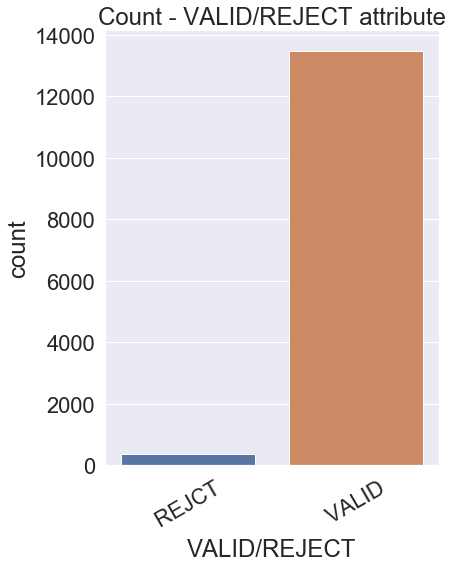

In [10]:
sns.set(font_scale=2, rc={"figure.figsize": (6, 8)})
cp = sns.countplot(x="VALID/REJECT", data=data)
plt.title('Count - VALID/REJECT attribute')
plt.setp(cp.get_xticklabels(), rotation=30) # Set a property on an artist object
plt.show()

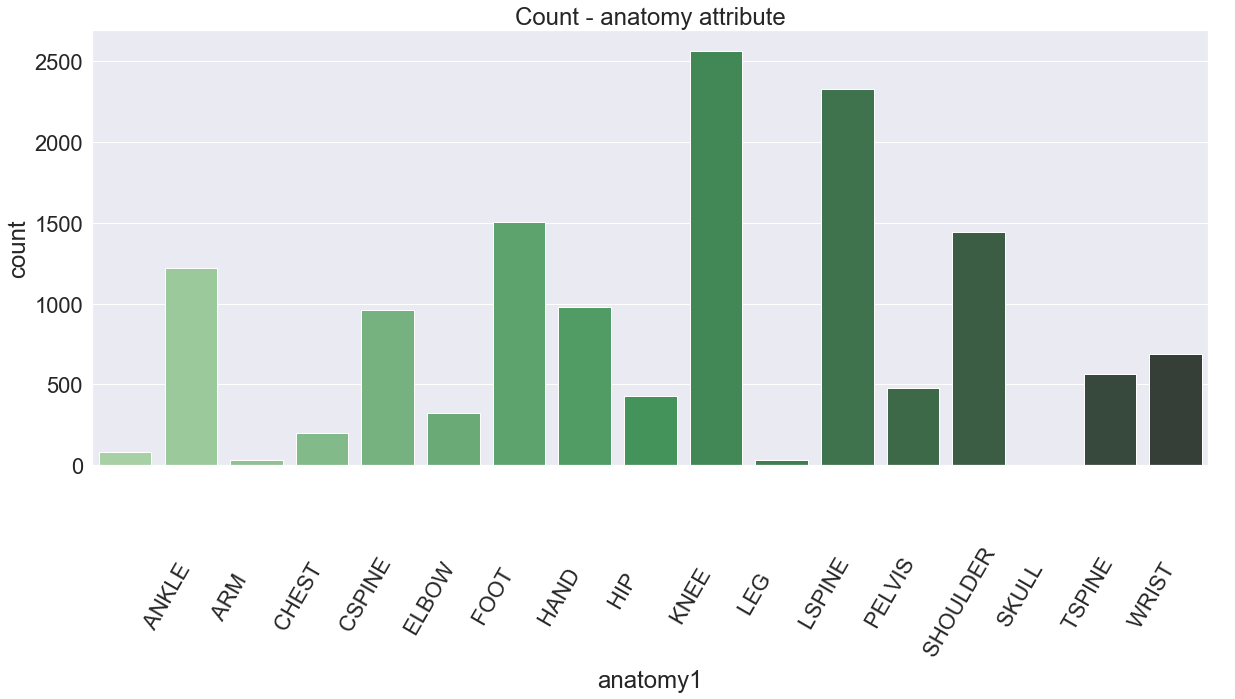

In [11]:
sns.set(font_scale=2, rc={"figure.figsize": (20, 8)})
cp = sns.countplot(x="anatomy1", data=data, palette="Greens_d")
plt.title('Count - anatomy attribute')
plt.setp(cp.get_xticklabels(), rotation=60) # Set a property on an artist object
plt.show()

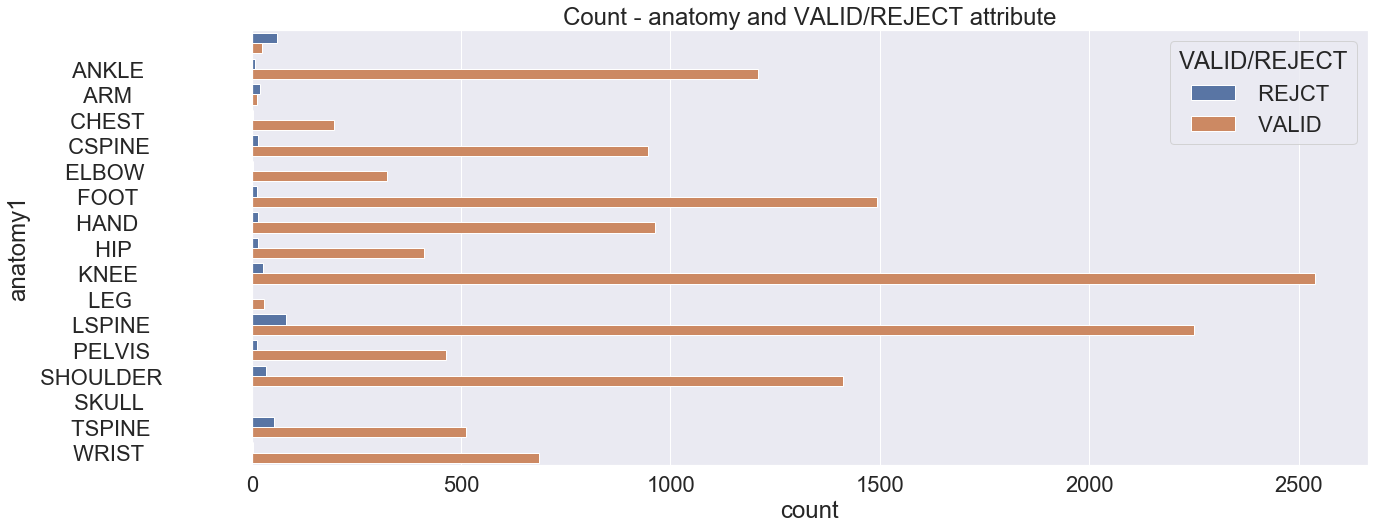

In [12]:
sns.countplot(y="anatomy1", hue="VALID/REJECT", data=data)
plt.title('Count - anatomy and VALID/REJECT attribute')
plt.show()

In [13]:
data['VALID/REJECT'].value_counts()

 VALID     13469
 REJCT       363
Name: VALID/REJECT, dtype: int64

In [14]:
data['anatomy1'].value_counts()

 KNEE                     2564
 LSPINE                   2330
 FOOT                     1504
 SHOULDER                 1446
 ANKLE                    1219
 HAND                      978
 CSPINE                    962
 WRIST                     689
 TSPINE                    565
 PELVIS                    477
 HIP                       426
 ELBOW                     326
 CHEST                     199
                            84
 ARM                        33
 LEG                        29
 SKULL                       1
Name: anatomy1, dtype: int64

# Grupisanje podataka i vizuelizacija

In [15]:
lista_po_anatomiji=data.groupby('anatomy1').agg(list)

In [16]:
lista_po_anatomiji.info

<bound method DataFrame.info of                                                                date_time1  \
anatomy1                                                                    
                        [2021/08/25-16:57:30.4340 , 2021/08/25-16:57:3...   
 ANKLE                  [2022/11/30-11:47:54.7097 , 2022/11/30-11:47:5...   
 ARM                    [2021/08/30-10:40:26.4271 , 2021/08/30-10:40:2...   
 CHEST                  [2021/08/25-17:08:03.9172 , 2021/10/05-11:21:2...   
 CSPINE                 [2022/11/30-12:08:01.6169 , 2022/11/30-12:08:0...   
 ELBOW                  [2021/09/01-09:22:32.2178 , 2021/09/01-09:22:3...   
 FOOT                   [2022/11/30-07:34:18.4519 , 2022/11/30-07:34:1...   
 HAND                   [2022/11/30-11:51:31.7278 , 2022/11/30-11:51:3...   
 HIP                    [2021/08/31-10:20:55.0349 , 2021/08/31-10:39:4...   
 KNEE                   [2022/11/30-08:41:43.4919 , 2022/11/30-08:41:4...   
 LEG                    [2021/08/30-17:40:26

In [17]:
valid_po_anatomiji=lista_po_anatomiji['VALID/REJECT']

In [18]:
valid_po_anatomiji

anatomy1
                          [ VALID ,  REJCT ,  REJCT ,  REJCT ,  REJCT , ...
 ANKLE                    [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 ARM                      [ VALID ,  VALID ,  REJCT ,  REJCT ,  REJCT , ...
 CHEST                    [ REJCT ,  VALID ,  VALID ,  VALID ,  VALID , ...
 CSPINE                   [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 ELBOW                    [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 FOOT                     [ VALID ,  VALID ,  VALID ,  VALID ,  REJCT , ...
 HAND                     [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 HIP                      [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 KNEE                     [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 LEG                      [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 LSPINE                   [ VALID ,  VALID ,  VALID ,  REJCT ,  VALID , ...
 PELVIS                   [ VALID ,  VALID ,  VALID ,  VALID ,  VALID , ...
 SH

In [19]:
val_rej=data.groupby('VALID/REJECT').agg(list)

In [20]:
kVp_val_rej = val_rej["kVp"]

In [21]:
kVp_val_rej

VALID/REJECT
 REJCT     [55, 75, 75, 75, 75, 75, 75, 70, 70, 70, 75, 8...
 VALID     [63, 63, 60, 60, 60, 60, 95, 85, 63, 63, 75, 6...
Name: kVp, dtype: object

In [22]:
for i in kVp_val_rej:
    print(np.array(i).mean())

74.62809917355372
65.12955675996733


In [23]:
data['kVp'].mean()

65.37883169462117

In [24]:
mAs_val_rej = val_rej["mAs"]

In [25]:
for i in mAs_val_rej:
    print(np.array(i).mean())

39.34201101928375
24.511726928502487


In [26]:
data['mAs'].mean()

24.90092539039912

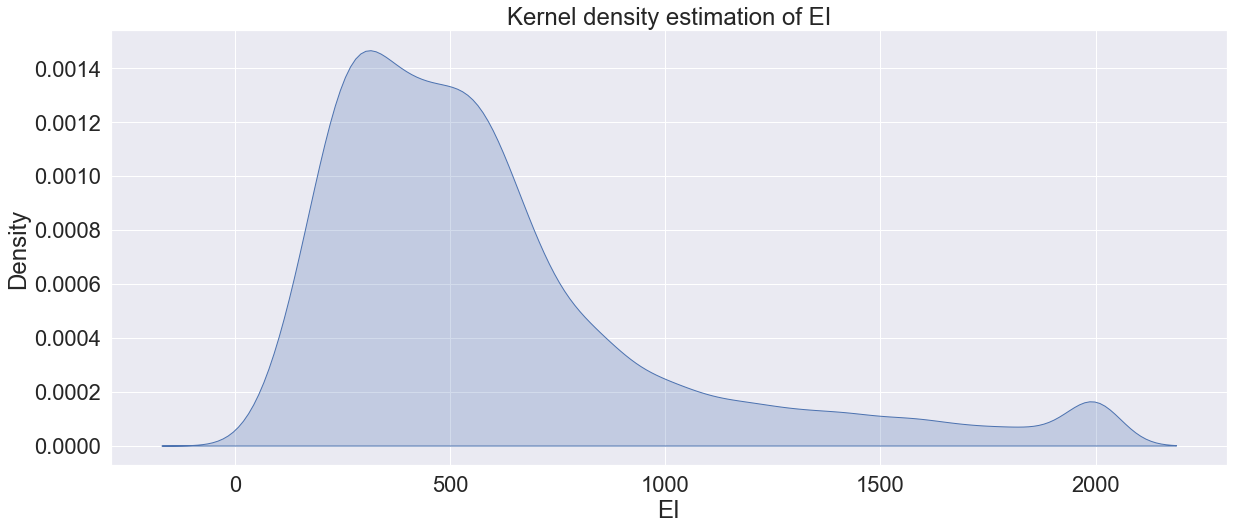

In [27]:
for col in data[["EI"]]:
    plt.title('Kernel density estimation of EI')
    sns.kdeplot(data[col], fill=True)
plt.show()

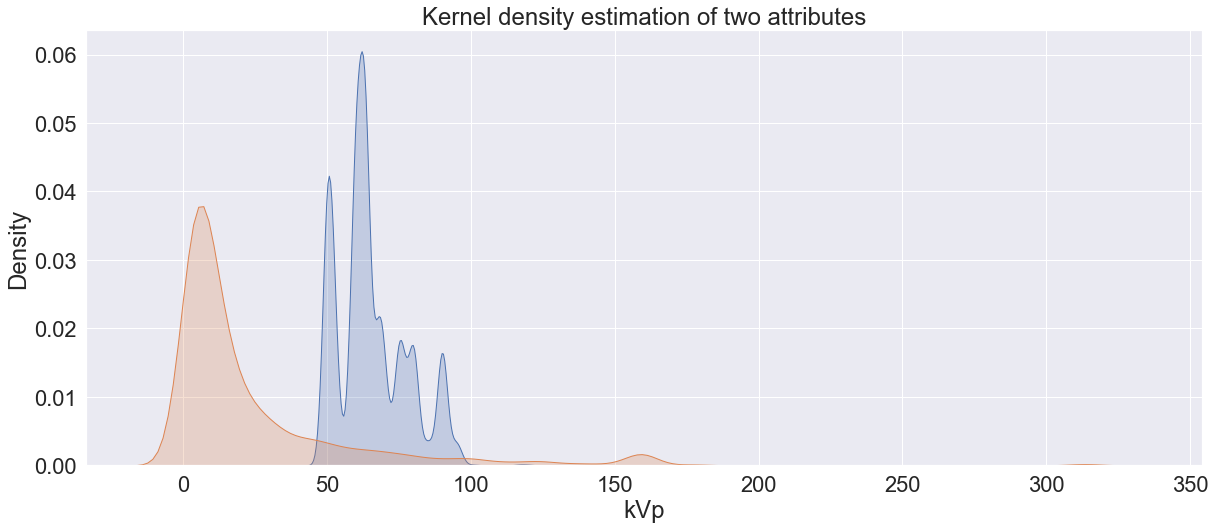

In [28]:
for col in data[['kVp','mAs']]:
    plt.title('Kernel density estimation of two attributes')
    sns.kdeplot(data[col], fill=True)
plt.show()

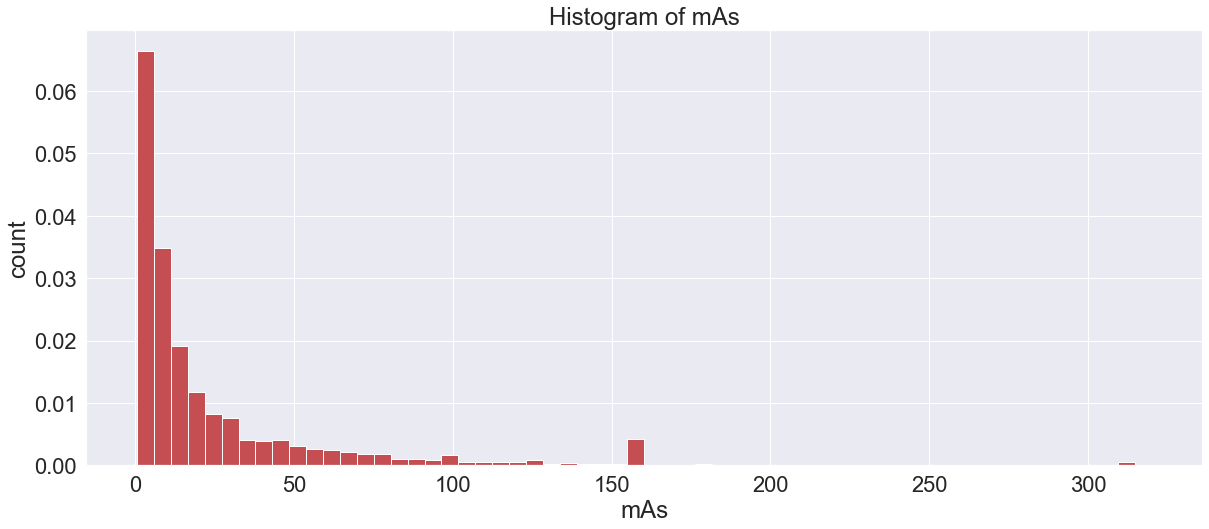

In [29]:
plt.hist(data["mAs"], 60, density=1, facecolor='r', alpha=1)   # histogram of the data, bins = 50, alpha - transparency on 0-1 scale
plt.xlabel('mAs')
plt.ylabel('count')
plt.title('Histogram of mAs')
#plt.axis([40, 320, 0, 0.005])
plt.grid(True)
plt.show()

# Provera mAs i kVp po prihvatljivom intervalu po anatomijama

In [30]:
dictionary_prihvarljivih_intervala_mAs={
    '                      ':[0,2000],
    ' ANKLE                ':[8,16],
    ' ARM                  ':[2,8],
    ' CHEST                ':[4,8],#sa neta
    ' CSPINE               ':[10,30],
    ' ELBOW                ':[6,12],
    ' FOOT                 ':[8,16],
    ' HAND                 ':[2,6],
    ' HIP                  ':[50,200],
    ' KNEE                 ':[10,30],
    ' LEG                  ':[20,50],
    ' LSPINE               ':[50,150],
    ' PELVIS               ':[50,200],
    ' SHOULDER             ':[20,50],
    ' SKULL                ':[20,50],
    ' TSPINE               ':[20,50],
    ' WRIST                ':[4,12],
}

In [31]:
dictionary_prihvarljivih_intervala_kVp={
    '                      ':[0,2000],
    ' ANKLE                ':[55,65],
    ' ARM                  ':[50,60],
    ' CHEST                ':[90,110],
    ' CSPINE               ':[60,70],
    ' ELBOW                ':[60,70],
    ' FOOT                 ':[55,65],
    ' HAND                 ':[50,60],
    ' HIP                  ':[80,90],
    ' KNEE                 ':[60,70],
    ' LEG                  ':[70,80],
    ' LSPINE               ':[80,90],
    ' PELVIS               ':[80,90],
    ' SHOULDER             ':[70,80],
    ' SKULL                ':[70,80],
    ' TSPINE               ':[70,80],
    ' WRIST                ':[55,65],
}

In [32]:
for i in range(len(lista_po_anatomiji)):
    print(lista_po_anatomiji.iloc[i].name)

                      
 ANKLE                
 ARM                  
 CHEST                
 CSPINE               
 ELBOW                
 FOOT                 
 HAND                 
 HIP                  
 KNEE                 
 LEG                  
 LSPINE               
 PELVIS               
 SHOULDER             
 SKULL                
 TSPINE               
 WRIST                


In [33]:
for i in range(len(lista_po_anatomiji)):
    v=0
    r=0
    listaVR=lista_po_anatomiji.iloc[i]["VALID/REJECT"] #data['VALID/REJECT'].value_counts()
    for j in listaVR:
        if j==" VALID ":
            v=v+1
        else:
            r=r+1
    print(lista_po_anatomiji.iloc[i].name)
    print("VALID:", v)
    print("REJECT:",r)

                      
VALID: 24
REJECT: 60
 ANKLE                
VALID: 1210
REJECT: 9
 ARM                  
VALID: 12
REJECT: 21
 CHEST                
VALID: 196
REJECT: 3
 CSPINE               
VALID: 946
REJECT: 16
 ELBOW                
VALID: 322
REJECT: 4
 FOOT                 
VALID: 1492
REJECT: 12
 HAND                 
VALID: 963
REJECT: 15
 HIP                  
VALID: 412
REJECT: 14
 KNEE                 
VALID: 2538
REJECT: 26
 LEG                  
VALID: 29
REJECT: 0
 LSPINE               
VALID: 2249
REJECT: 81
 PELVIS               
VALID: 464
REJECT: 13
 SHOULDER             
VALID: 1412
REJECT: 34
 SKULL                
VALID: 1
REJECT: 0
 TSPINE               
VALID: 512
REJECT: 53
 WRIST                
VALID: 687
REJECT: 2


In [34]:
#proveravam koliko podataka za mAs i kVp spada u range koji sam našla da je prihvatljiv za razlicite anatomije
for i in range(len(lista_po_anatomiji)):
    mAs=lista_po_anatomiji.iloc[i]["mAs"]
    kVp=lista_po_anatomiji.iloc[i]["kVp"]
    
    #v_r=lista_po_anatomiji.iloc[i][""]
    
    interval_mAs= dictionary_prihvarljivih_intervala_mAs[lista_po_anatomiji.iloc[i].name]
    interval_kVp= dictionary_prihvarljivih_intervala_kVp[lista_po_anatomiji.iloc[i].name]
    
    u_intervalu_mAs=0
    for j in mAs:
        if j > interval_mAs[0] and j < interval_mAs[1]:
            u_intervalu_mAs = u_intervalu_mAs + 1
    
    u_intervalu_kVp=0
    for k in kVp:
        if k > interval_kVp[0] and k < interval_kVp[1]:
            u_intervalu_kVp = u_intervalu_kVp + 1
    
    print(lista_po_anatomiji.iloc[i].name)
    print("Ukupno unosa mAs:",len(mAs), "U intervalu je:",u_intervalu_mAs)
    print("Ukupno unosa kVp:",len(kVp), "U intervalu je:",u_intervalu_kVp)
    
    q3m, q1m = np.percentile(mAs, [75 ,25])
    iqr_m = q3m - q1m
    
    q3k, q1k = np.percentile(kVp, [75 ,25])
    iqr_k = q3k - q1k
    
    print("[",q1m,",",q3m,"]")
    print(iqr_m)
    print("[",q1k,",",q3k,"]")
    print(iqr_k)

                      
Ukupno unosa mAs: 84 U intervalu je: 84
Ukupno unosa kVp: 84 U intervalu je: 84
[ 12.2175 , 44.7 ]
32.4825
[ 75.0 , 75.0 ]
0.0
 ANKLE                
Ukupno unosa mAs: 1219 U intervalu je: 0
Ukupno unosa kVp: 1219 U intervalu je: 0
[ 3.31 , 6.81 ]
3.4999999999999996
[ 52.0 , 52.0 ]
0.0
 ARM                  
Ukupno unosa mAs: 33 U intervalu je: 28
Ukupno unosa kVp: 33 U intervalu je: 9
[ 6.22 , 6.75 ]
0.5300000000000002
[ 53.0 , 90.0 ]
37.0
 CHEST                
Ukupno unosa mAs: 199 U intervalu je: 58
Ukupno unosa kVp: 199 U intervalu je: 0
[ 5.109999999999999 , 15.65 ]
10.540000000000001
[ 70.0 , 70.0 ]
0.0
 CSPINE               
Ukupno unosa mAs: 962 U intervalu je: 439
Ukupno unosa kVp: 962 U intervalu je: 957
[ 7.5425 , 17.7 ]
10.157499999999999
[ 68.0 , 68.0 ]
0.0
 ELBOW                
Ukupno unosa mAs: 326 U intervalu je: 2
Ukupno unosa kVp: 326 U intervalu je: 0
[ 5.18 , 5.46 ]
0.28000000000000025
[ 58.0 , 58.0 ]
0.0
 FOOT                 
Ukupno unosa 

In [35]:
#Zaključak: intervali mi ne valjaju

In [36]:
#Treba da nadjem u kom intervalu je vecina unosa
#u prevodu, treba mi interkvartilni interval

Plotting correlation plot


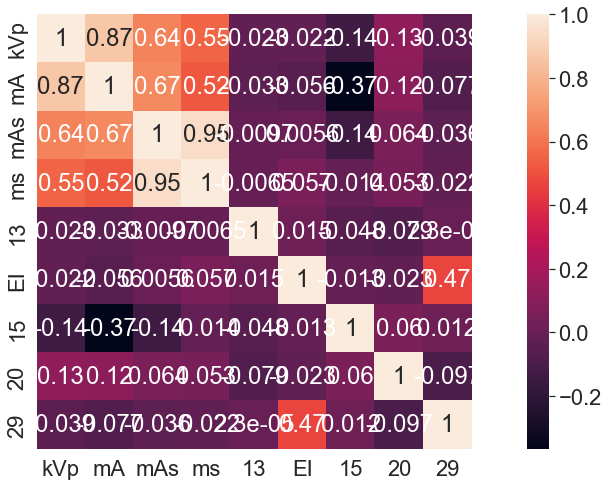

In [37]:
print('Plotting correlation plot')
sns.set_context(rc={"figure.figsize": (18, 18)})
corrmat = data[['kVp','mA', 'mAs','ms','AEC','13','EI','15','19','20','21','22','24','26','27','28','29','30']].corr()
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

# Vizuelizacija atributa podeljena na VALID/REJECT i po anatomiji

In [38]:
group_v_r =data.groupby("VALID/REJECT").agg(list)

In [39]:
group_v_r

date_time1  \
VALID/REJECT                                                      
 REJCT        [2021/08/24-09:36:29.2435 , 2021/08/25-11:05:4...   
 VALID        [2022/11/30-07:34:18.4519 , 2022/11/30-07:34:1...   

                                                     date_time2  \
VALID/REJECT                                                      
 REJCT        [2021-08-23 17:38:00, 2021-08-25 11:03:57, 202...   
 VALID        [2022-11-30 07:33:04, 2022-11-30 07:32:24, 202...   

                                                       operator  \
VALID/REJECT                                                      
 REJCT        [ Administrator             ,  Administrator  ...   
 VALID        [ Operator                  ,  Operator       ...   

                                                    patient_num  \
VALID/REJECT                                                      
 REJCT        [ EM210823173710 ,  EM210825101723 ,  EM210825...   
 VALID        [54278, 54278, 29517, 29517, 37436, 37436, 315...   

                                                   patient_num2  \
VALID/REJECT                                                      
 REJCT        [ Patient^Emergency 210823173710 ,  Patient^Em...   
 VALID        [                           ,                 ...   

                                                       anatomy1  \
VALID/REJECT                                                      
 REJCT        [ HAND                 ,  TSPINE              ...   
 VALID        [ FOOT                 ,  FOOT                ...   

                                                 anatomy_AP/LAT  \
VALID/REJECT                                                      
 REJCT        [ Hand-OBL                                 ,  ...   
 VALID        [ Fuss-LAT                                 ,  ...   

                                                            kVp  \
VALID/REJECT                                                      
 REJCT        [55, 75, 75, 75, 75, 75, 75, 70, 70, 70, 75, 8...   
 VALID        [63, 63, 60, 60, 60, 60, 95, 85, 63, 63, 75, 6...   

                                                             mA  \
VALID/REJECT                                                      
 REJCT        [240.62, 378.75, 375.0, 380.45, 345.56, 340.0,...   
 VALID        [200.5, 201.5, 206.11, 211.27, 217.86, 221.13,...   

                                                            mAs  ...  \
VALID/REJECT                                                     ...   
 REJCT        [3.85, 6.06, 3.75, 8.37, 6.22, 6.12, 4.02, 0.7...  ...   
 VALID        [4.01, 4.03, 7.42, 15.0, 12.2, 15.7, 47.3, 159...  ...   

                                                             22  \
VALID/REJECT                                                      
 REJCT        [         ,          ,          ,          ,  ...   
 VALID        [         ,          ,          ,          ,  ...   

                                                         IN/OUT  \
VALID/REJECT                                                      
 REJCT        [ OUT ,  IN ,  IN ,  IN ,  IN ,  IN ,  IN ,  I...   
 VALID        [ OUT ,  OUT ,  IN ,  IN ,  IN ,  IN ,  IN ,  ...   

                                                             24  \
VALID/REJECT                                                      
 REJCT        [ 100 ,  150 ,  150 ,  150 ,  150 ,  150 ,  11...   
 VALID        [   ,    ,  110 ,  110 ,  110 ,  110 ,  110 , ...   

                                                        VisionU  \
VALID/REJECT                                                      
 REJCT        [ UNIVERSAL ,  Vision U ,  Vision U ,  Vision ...   
 VALID        [ Vision U ,  Vision U ,  Vision U ,  Vision U...   

                                                             26  \
VALID/REJECT                                                      
 REJCT        [ 88.6 ,  0.3 ,  0.3 ,  0.3 ,  0.3 ,  0.3 ,  0...   
 VALID        [8.1, 8.1, 49.6, 101.5, 84.5, 105.7, 1473.9, 3...   

In [40]:
group_v_r["EI"]

VALID/REJECT
 REJCT     [1104.8139572143598, 327.970671653748, 207.564...
 VALID     [2000.0, 2000.0, 1011.0696792602499, 1839.7354...
Name: EI, dtype: object

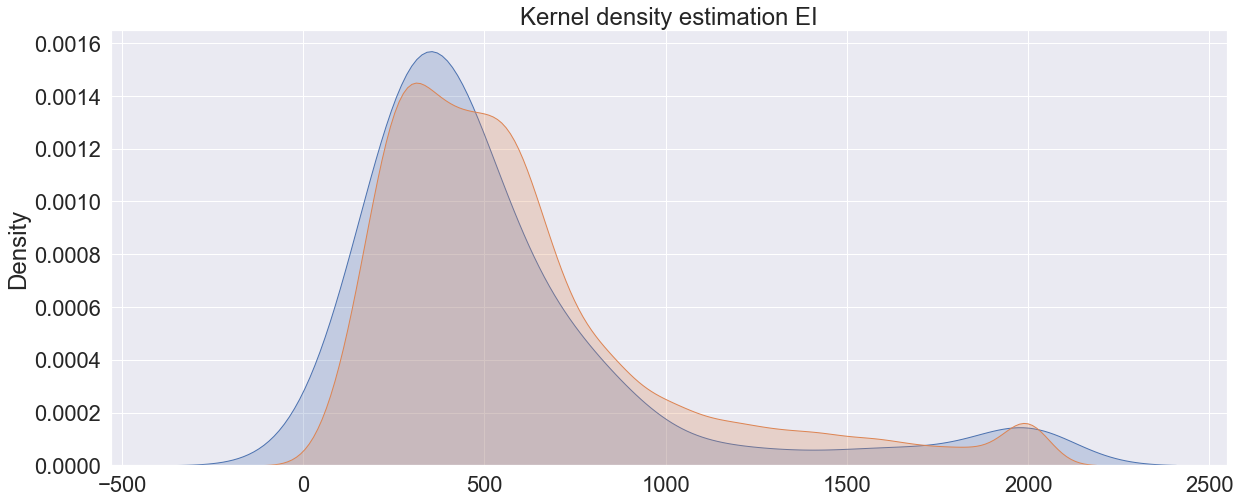

In [41]:
plt.title('Kernel density estimation EI')
sns.kdeplot(group_v_r.iloc[0]["EI"], fill=True)
sns.kdeplot(group_v_r.iloc[1]["EI"], fill=True)
plt.show()

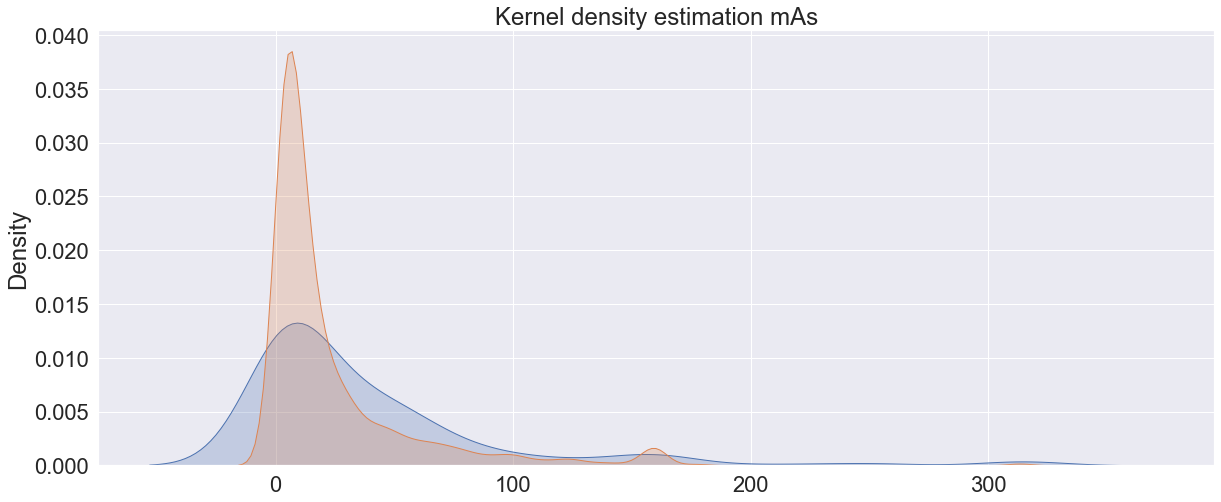

In [42]:
plt.title('Kernel density estimation mAs')
sns.kdeplot(group_v_r.iloc[0]["mAs"], fill=True)
sns.kdeplot(group_v_r.iloc[1]["mAs"], fill=True)
plt.show()

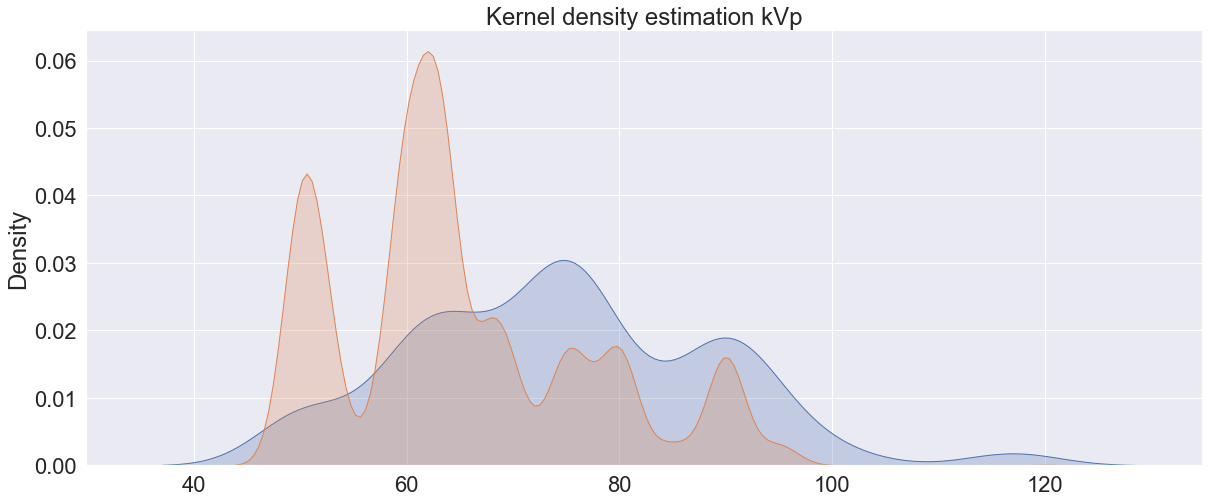

In [43]:
plt.title('Kernel density estimation kVp')
sns.kdeplot(group_v_r.iloc[0]["kVp"], fill=True)
sns.kdeplot(group_v_r.iloc[1]["kVp"], fill=True)
plt.show()

In [44]:
group_anat_v_r=data.groupby(["anatomy1", "VALID/REJECT"]).agg(list)

In [45]:
group_anat_v_r

date_time1  \
anatomy1               VALID/REJECT                                                      
                        REJCT        [2021/08/25-16:57:30.5090 , 2021/08/25-16:57:3...   
                        VALID        [2021/08/25-16:57:30.4340 , 2021/08/25-17:05:5...   
 ANKLE                  REJCT        [2021/10/04-16:46:56.6669 , 2021/10/19-15:06:5...   
                        VALID        [2022/11/30-11:47:54.7097 , 2022/11/30-11:47:5...   
 ARM                    REJCT        [2021/08/30-10:40:26.5281 , 2021/08/30-10:40:2...   
                        VALID        [2021/08/30-10:40:26.4271 , 2021/08/30-10:40:2...   
 CHEST                  REJCT        [2021/08/25-17:08:03.9172 , 2021/12/06-12:03:5...   
                        VALID        [2021/10/05-11:21:24.5398 , 2021/10/05-11:21:2...   
 CSPINE                 REJCT        [2021/09/10-11:40:55.7551 , 2021/10/15-10:29:3...   
                        VALID        [2022/11/30-12:08:01.6169 , 2022/11/30-12:08:0...   
 ELBOW                  REJCT        [2021/09/07-09:12:54.7461 , 2022/01/12-09:26:2...   
                        VALID        [2021/09/01-09:22:32.2178 , 2021/09/01-09:22:3...   
 FOOT                   REJCT        [2021/08/26-12:26:56.1670 , 2021/08/26-12:26:5...   
                        VALID        [2022/11/30-07:34:18.4519 , 2022/11/30-07:34:1...   
 HAND                   REJCT        [2021/08/24-09:36:29.2435 , 2021/08/25-17:08:0...   
                        VALID        [2022/11/30-11:51:31.7278 , 2022/11/30-11:51:3...   
 HIP                    REJCT        [2021/09/29-11:36:25.5822 , 2021/09/30-16:45:3...   
                        VALID        [2021/08/31-10:20:55.0349 , 2021/08/31-10:39:4...   
 KNEE                   REJCT        [2021/09/07-10:02:56.3662 , 2021/09/27-10:45:3...   
                        VALID        [2022/11/30-08:41:43.4919 , 2022/11/30-08:41:4...   
 LEG                    REJCT                                                      NaN   
                        VALID        [2021/08/30-17:40:26.4519 , 2021/08/30-17:40:2...   
 LSPINE                 REJCT        [2021/08/25-17:07:17.1384 , 2021/09/06-11:39:2...   
                        VALID        [2022/11/30-09:39:37.6522 , 2022/11/30-09:39:3...   
 PELVIS                 REJCT        [2021/11/04-12:37:30.6582 , 2021/11/19-11:17:4...   
                        VALID        [2022/11/30-10:09:56.8607 , 2022/11/30-10:25:2...   
 SHOULDER               REJCT        [2021/09/06-11:47:19.4318 , 2021/09/16-09:22:1...   
                        VALID        [2022/11/30-09:56:13.7526 , 2022/11/30-09:56:1...   
 SKULL                  REJCT                                                      NaN   
                        VALID                              [2021/08/24-17:16:32.5972 ]   
 TSPINE                 REJCT        [2021/08/25-11:05:45.3971 , 2021/08/25-11:05:4...   
                        VALID        [2021/08/30-16:09:33.4491 , 2021/08/30-16:09:3...   
 WRIST                  REJCT        [2022/04/08-09:45:38.5978 , 2022/06/30-09:54:3...   
                        VALID        [2021/07/27-09:14:22.3258 , 2021/07/27-09:43:2...   

                                                                            date_time2  \
anatomy1               VALID/REJECT                                                      
                        REJCT        [2021-08-25 16:50:18, 2021-08-25 16:49:50, 202...   
                        VALID        [2021-08-25 16:55:09, 2021-08-25 17:05:03, 202...   
 ANKLE                  REJCT        [2021-04-10 16:45:37, 2021-10-19 14:59:40, 202...   
                        VALID        [2022-11-30 11:47:16, 2022-11-30 11:46:38, 202...   
 ARM                    REJCT        [2021-08-30 10:11:11, 2021-08-30 10:09:58, 202...   
                        VALID        [2021-08-30 10:39:27, 2021-08-30 10:14:10, 202...   
 CHEST                  REJCT        [2021-08-25 13:46:13, 2021-06-12 12:00:32, 202...   
                        V

In [46]:
group_anat_v_r.info

<bound method DataFrame.info of                                                                             date_time1  \
anatomy1               VALID/REJECT                                                      
                        REJCT        [2021/08/25-16:57:30.5090 , 2021/08/25-16:57:3...   
                        VALID        [2021/08/25-16:57:30.4340 , 2021/08/25-17:05:5...   
 ANKLE                  REJCT        [2021/10/04-16:46:56.6669 , 2021/10/19-15:06:5...   
                        VALID        [2022/11/30-11:47:54.7097 , 2022/11/30-11:47:5...   
 ARM                    REJCT        [2021/08/30-10:40:26.5281 , 2021/08/30-10:40:2...   
                        VALID        [2021/08/30-10:40:26.4271 , 2021/08/30-10:40:2...   
 CHEST                  REJCT        [2021/08/25-17:08:03.9172 , 2021/12/06-12:03:5...   
                        VALID        [2021/10/05-11:21:24.5398 , 2021/10/05-11:21:2...   
 CSPINE                 REJCT        [2021/09/10-11:40:55.7551 , 202

In [47]:
group_anat_v_r["EI"].value_counts()

[379.911327362061, 918.791580200195, 807.910919189453, 387.89484500885004, 383.385324478149, 312.432289123535, 518.001842498779, 647.36852645874, 417.33250617981, 371.971917152405, 2000.0, 979.354858398438, 1762.1896743774398]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

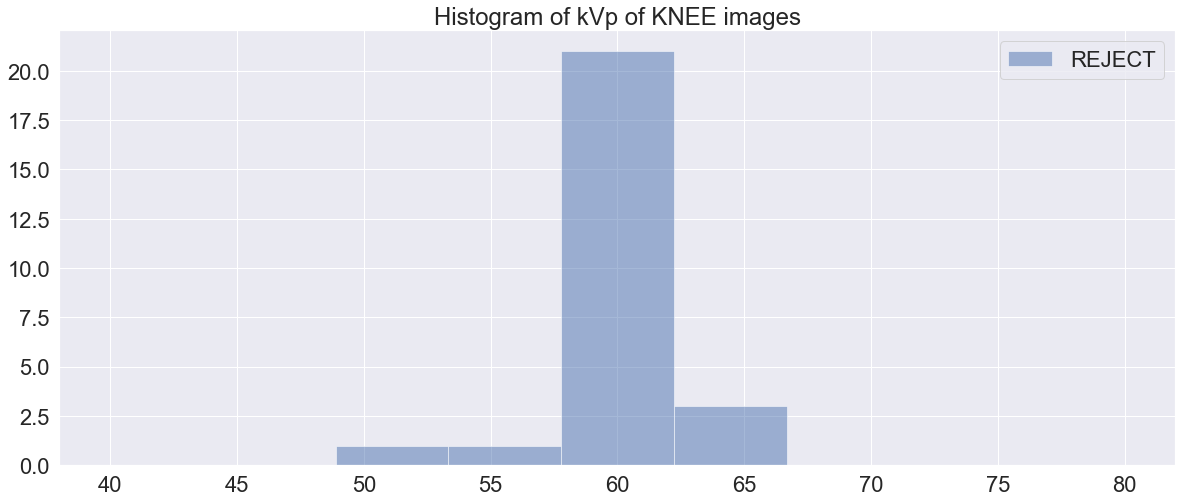

In [48]:
plt.title('Histogram of kVp of KNEE images')

bins = np.linspace(40, 80, 10)

plt.hist(group_anat_v_r.iloc[18]["kVp"], bins, alpha=0.5, label='REJECT')
#plt.hist(group_anat_v_r.iloc[19]["kVp"], bins, alpha=0.5, label='VALID')
plt.legend(loc='upper right')

plt.show()

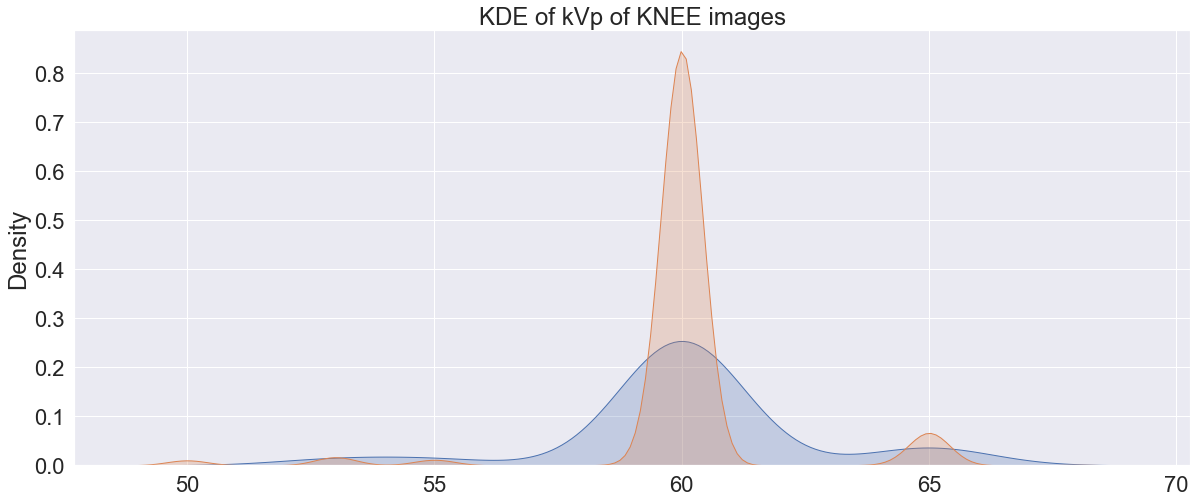

In [49]:
plt.title('KDE of kVp of KNEE images')
sns.kdeplot(group_anat_v_r.iloc[18]["kVp"], fill=True)
sns.kdeplot(group_anat_v_r.iloc[19]["kVp"], fill=True)

plt.show()

('                      ', ' REJCT ')


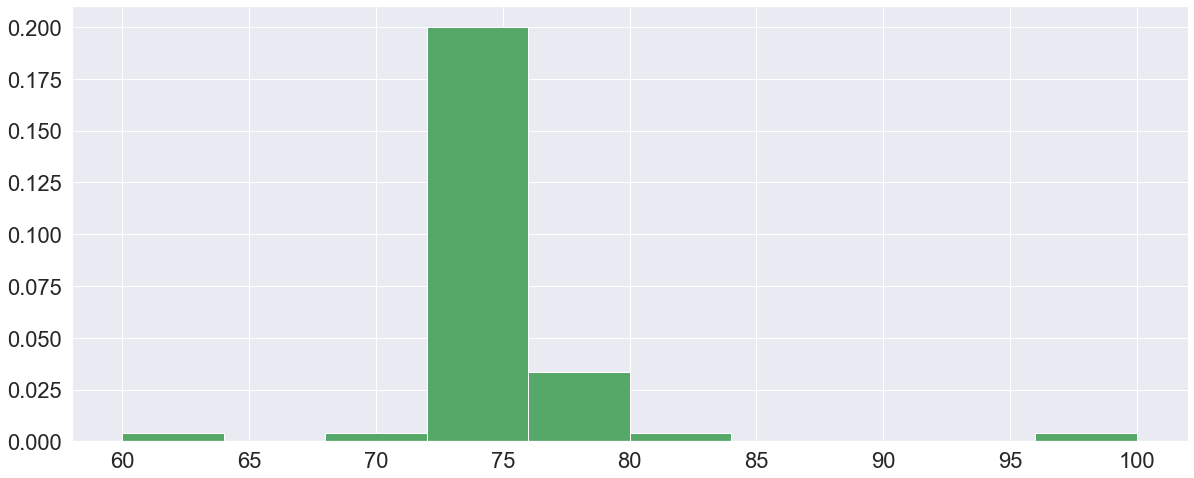

('                      ', ' VALID ')


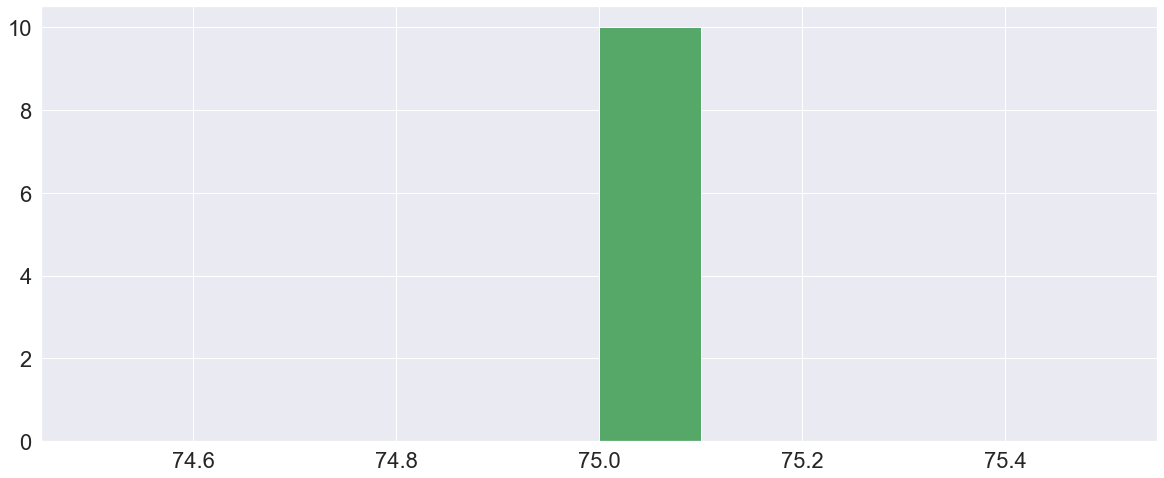

(' ANKLE                ', ' REJCT ')


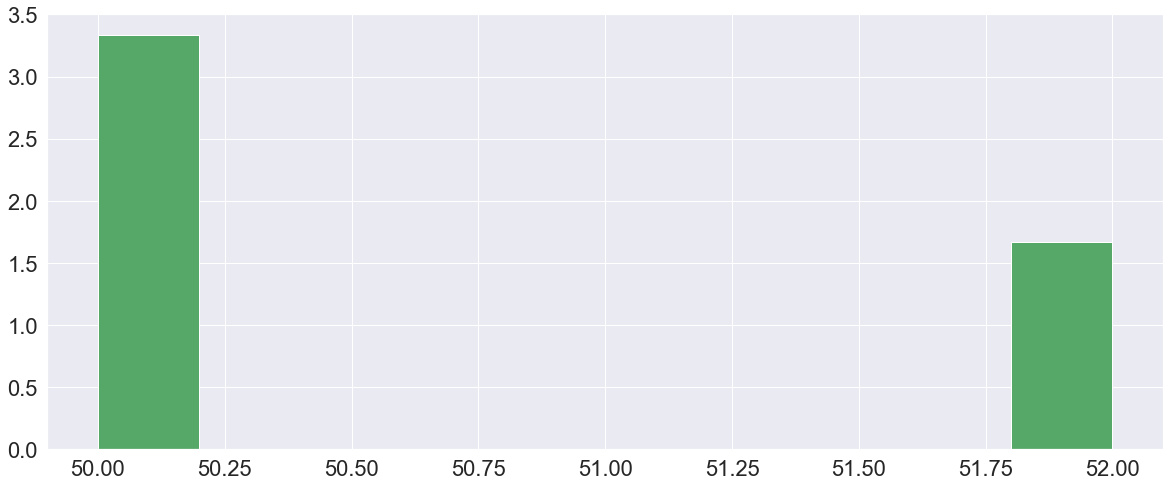

(' ANKLE                ', ' VALID ')


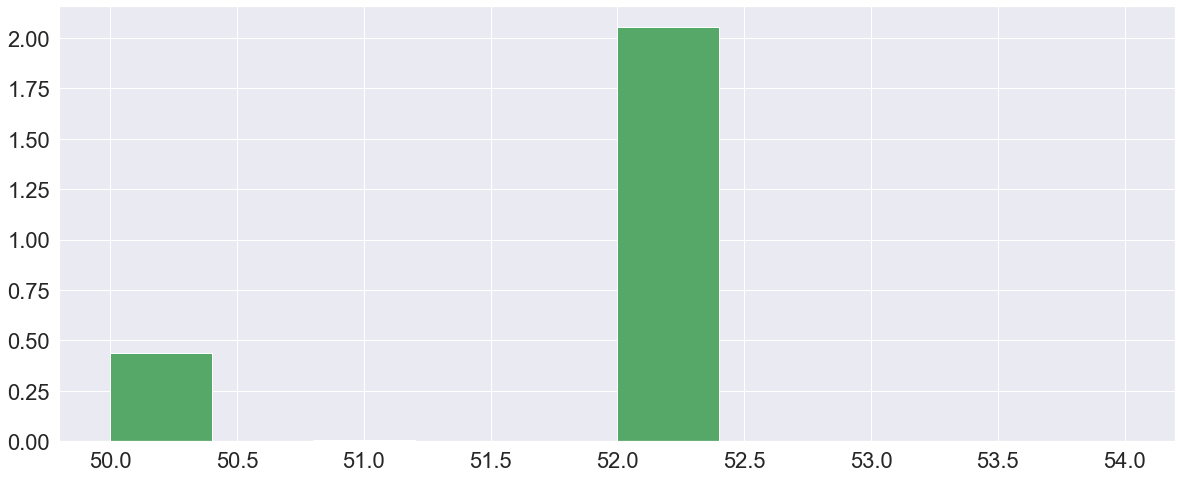

(' ARM                  ', ' REJCT ')


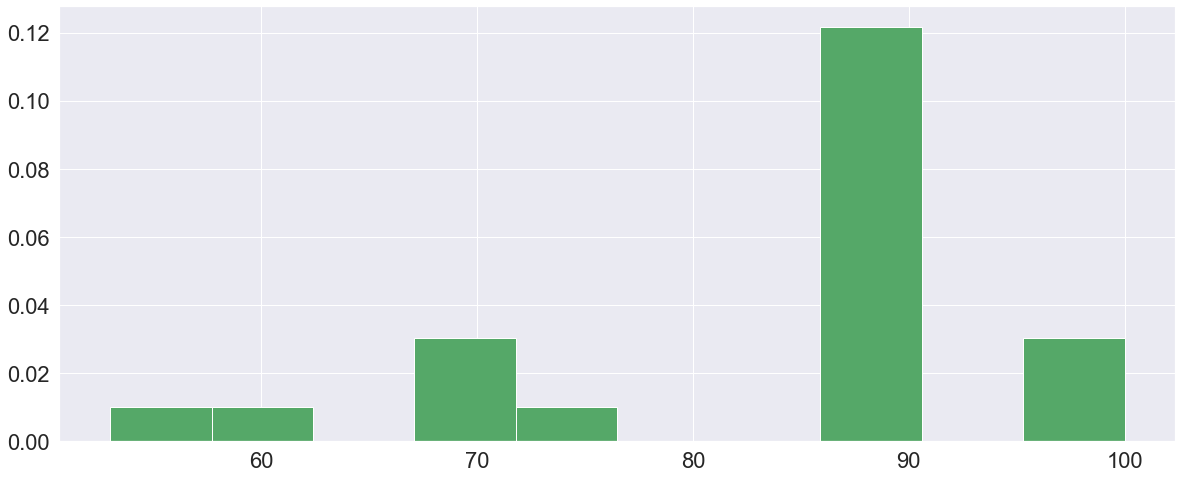

(' ARM                  ', ' VALID ')


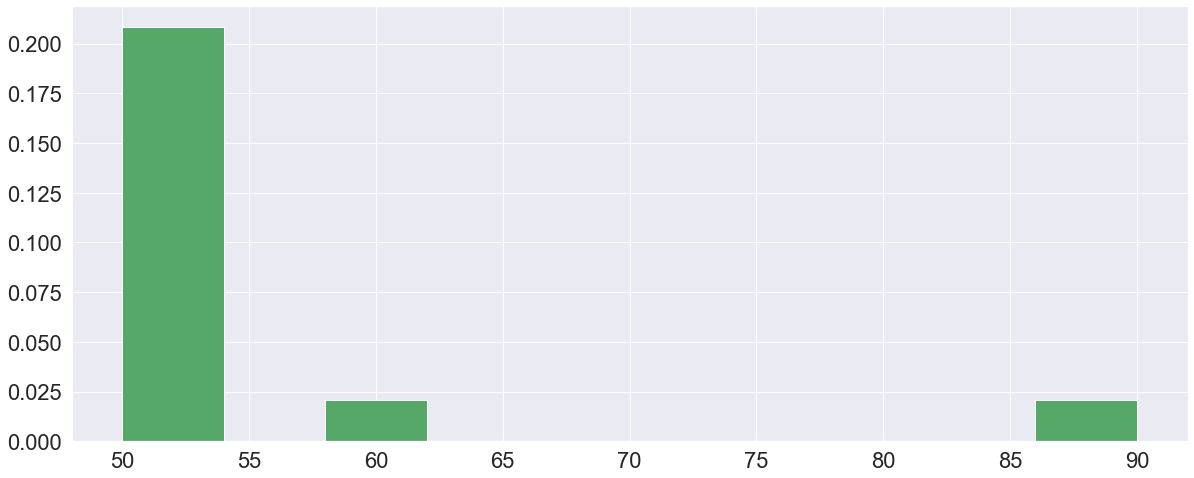

(' CHEST                ', ' REJCT ')


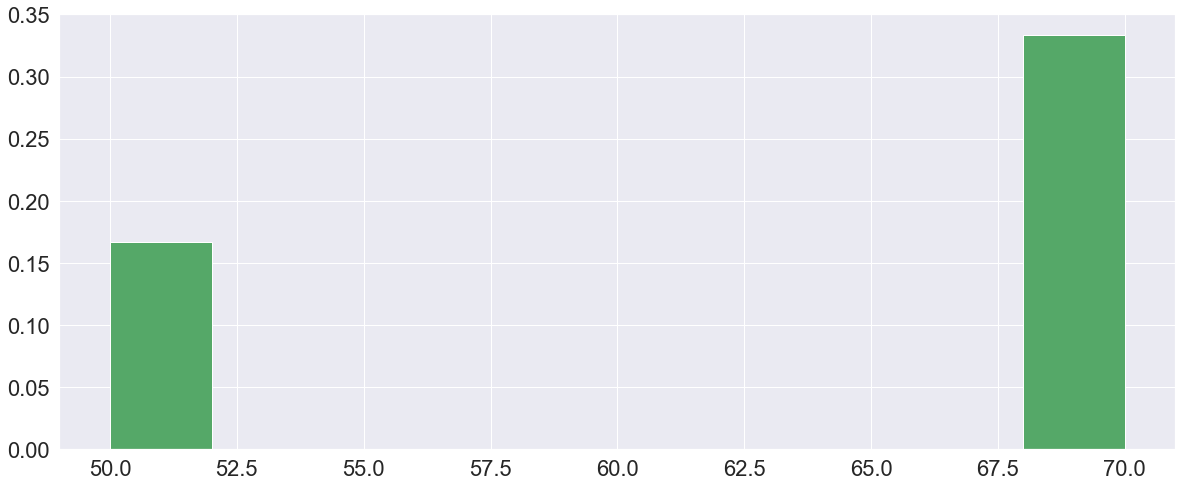

(' CHEST                ', ' VALID ')


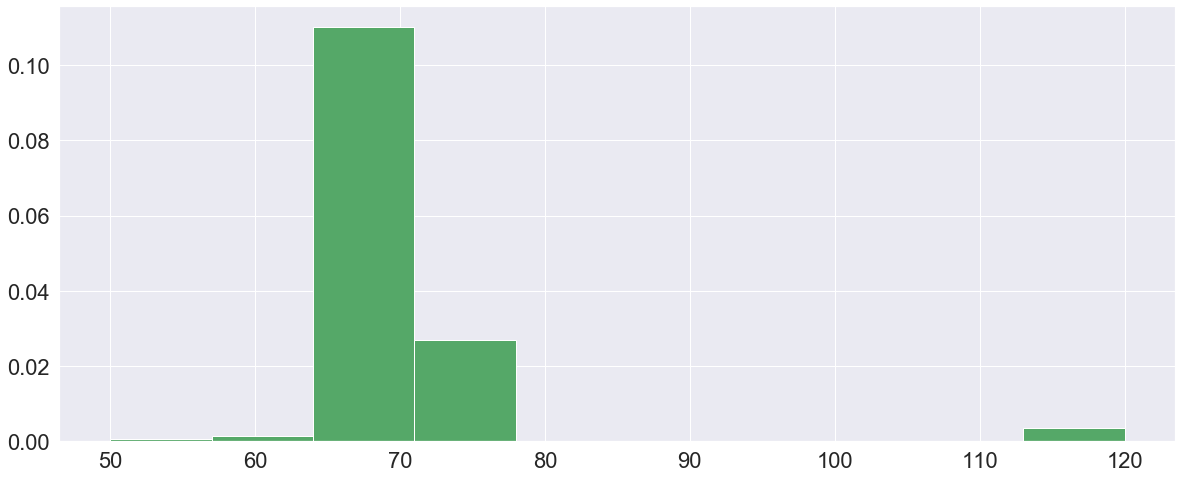

(' CSPINE               ', ' REJCT ')


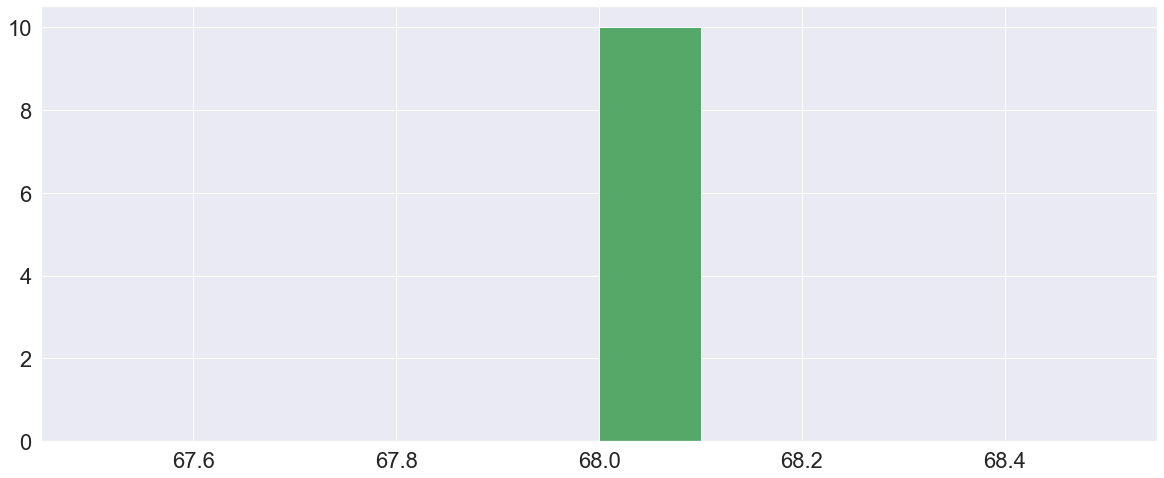

(' CSPINE               ', ' VALID ')


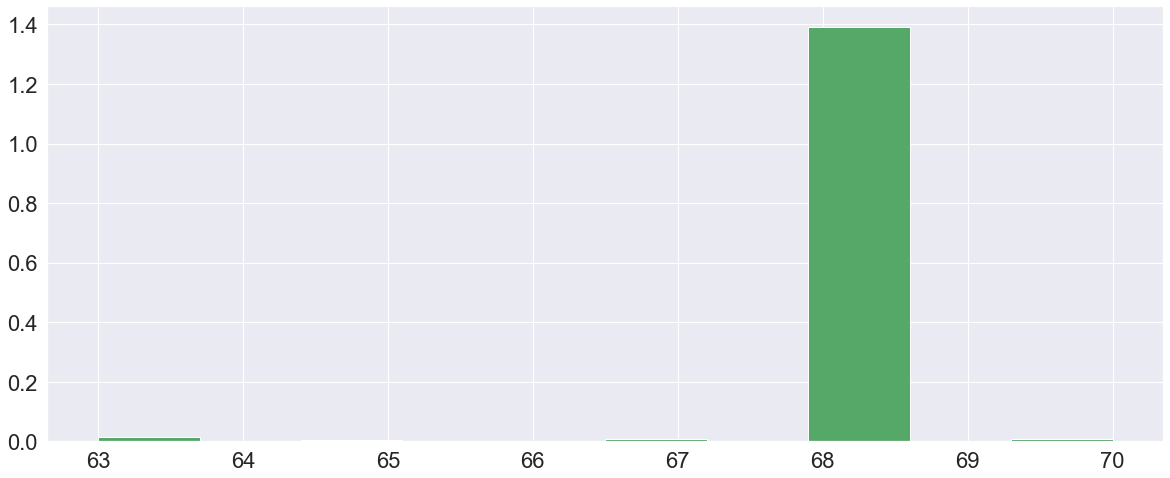

(' ELBOW                ', ' REJCT ')


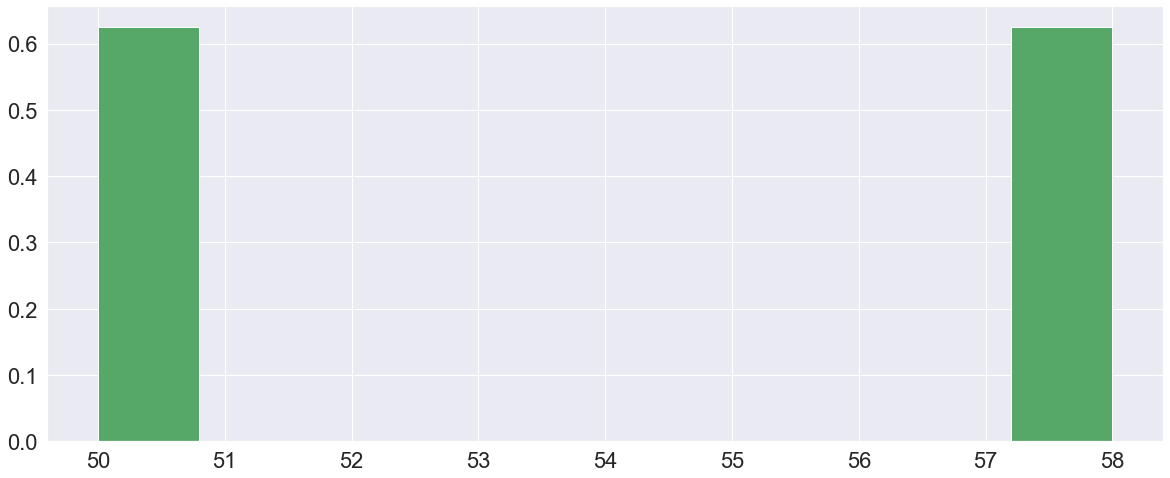

(' ELBOW                ', ' VALID ')


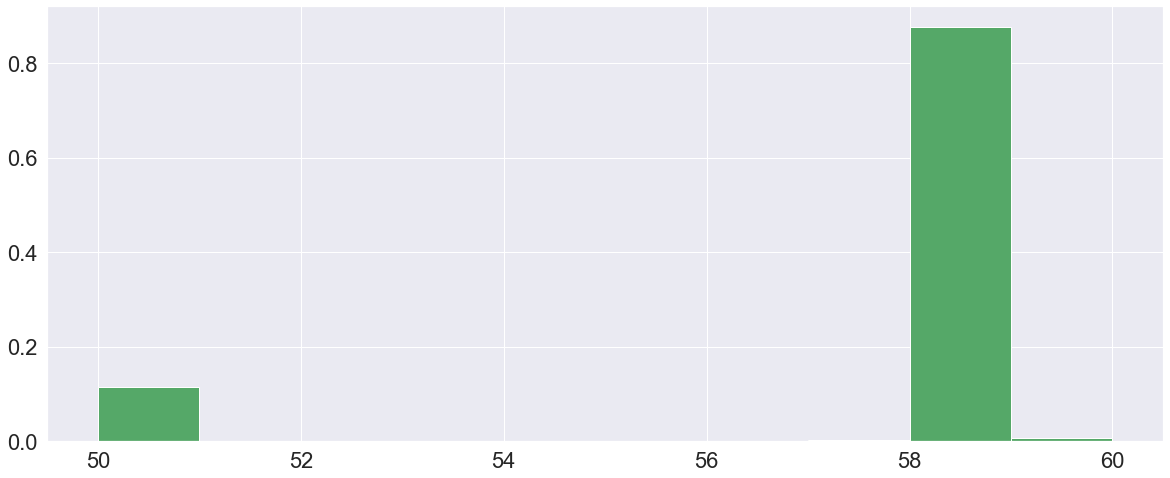

(' FOOT                 ', ' REJCT ')


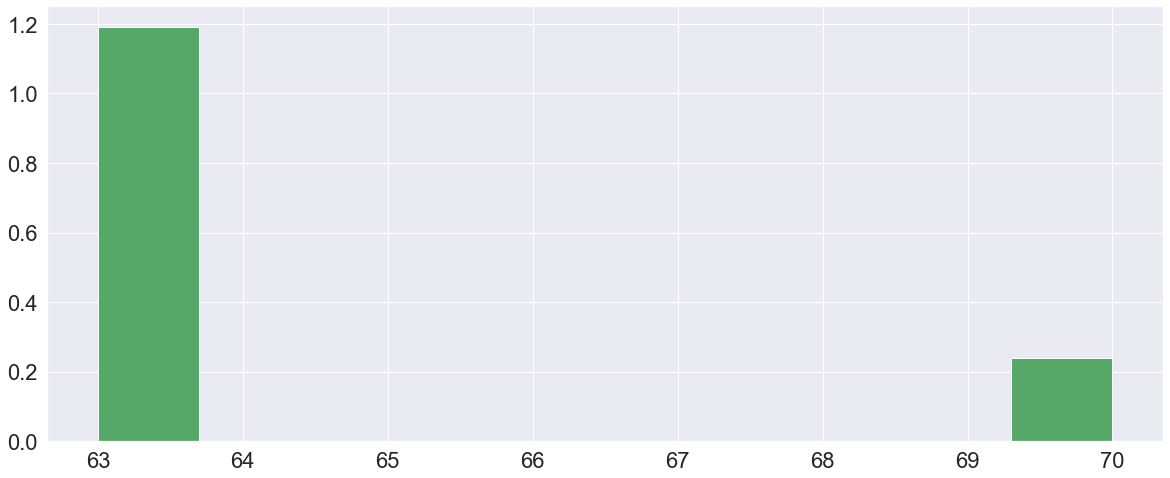

(' FOOT                 ', ' VALID ')


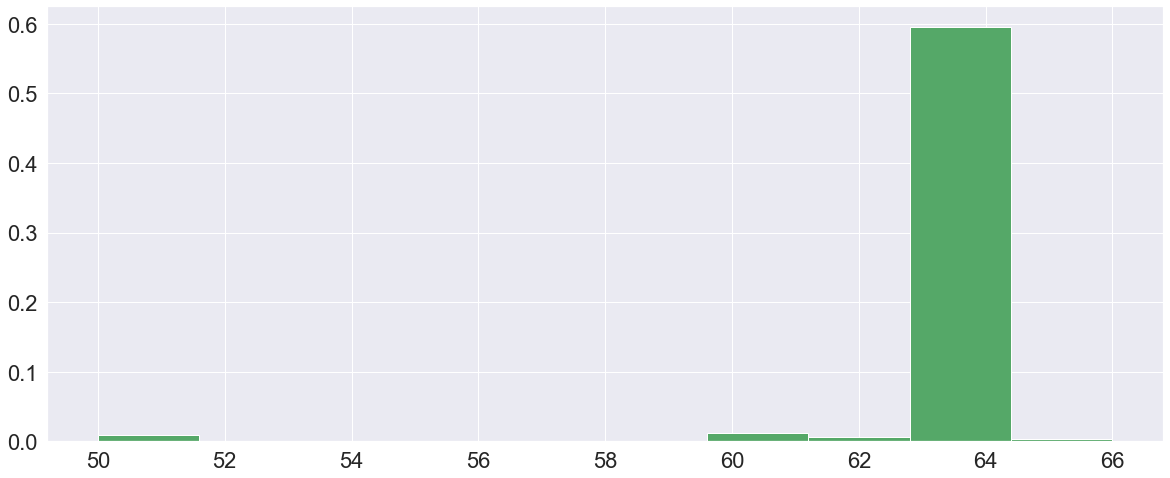

(' HAND                 ', ' REJCT ')


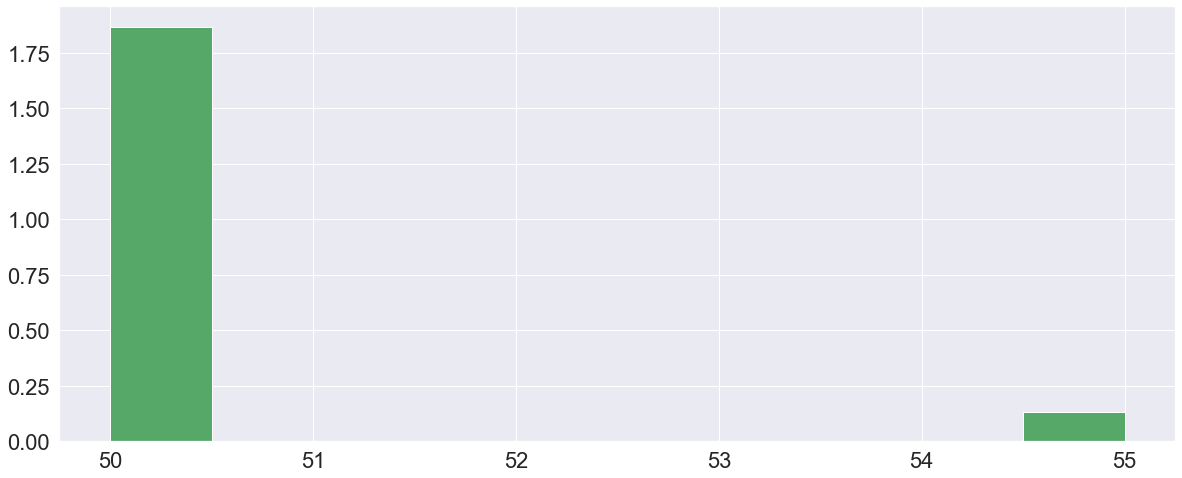

(' HAND                 ', ' VALID ')


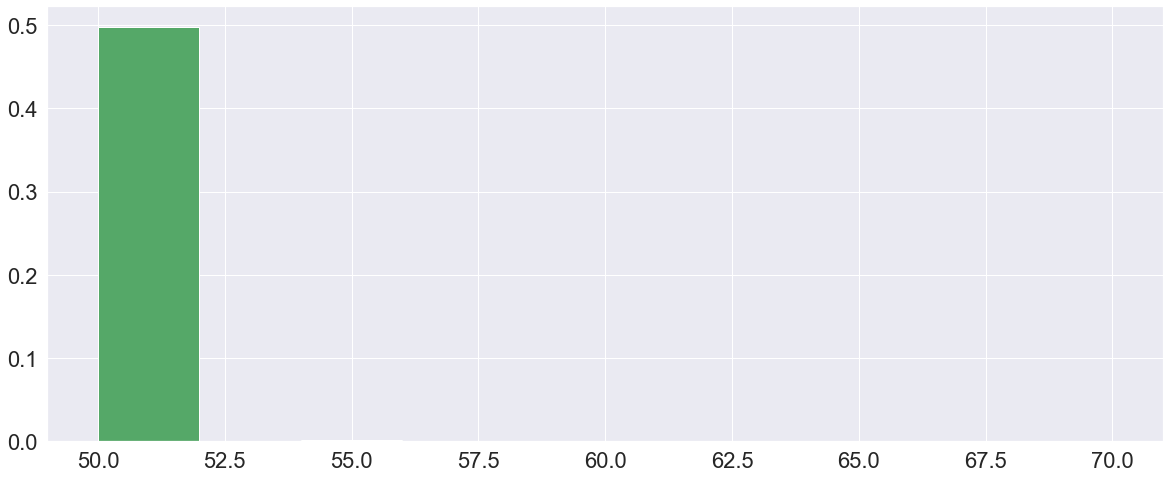

(' HIP                  ', ' REJCT ')


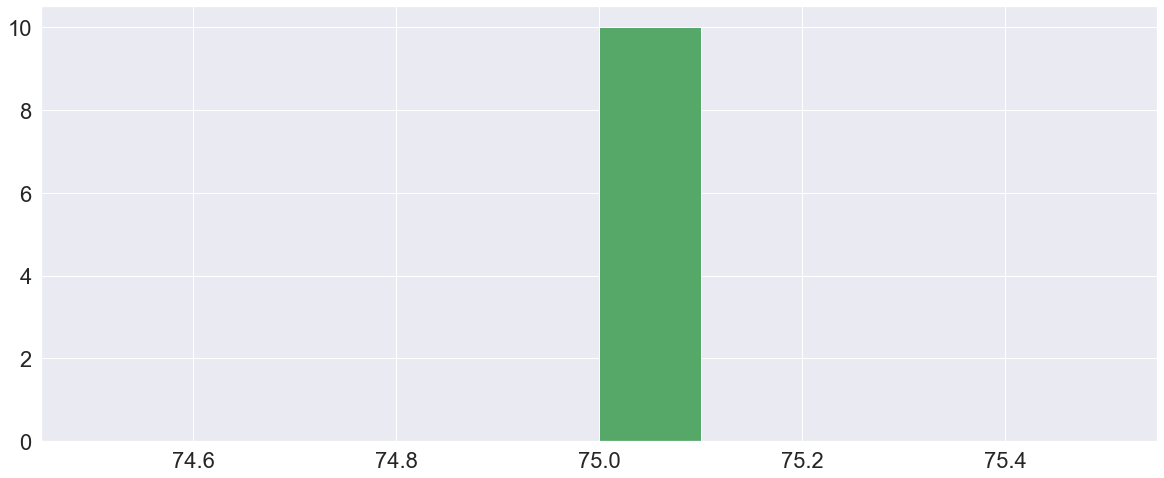

(' HIP                  ', ' VALID ')


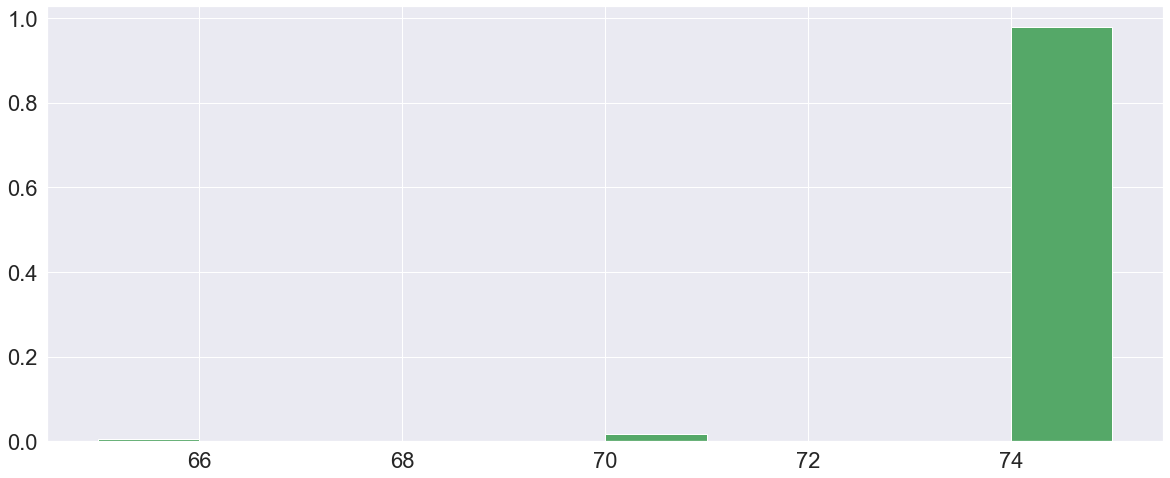

(' KNEE                 ', ' REJCT ')


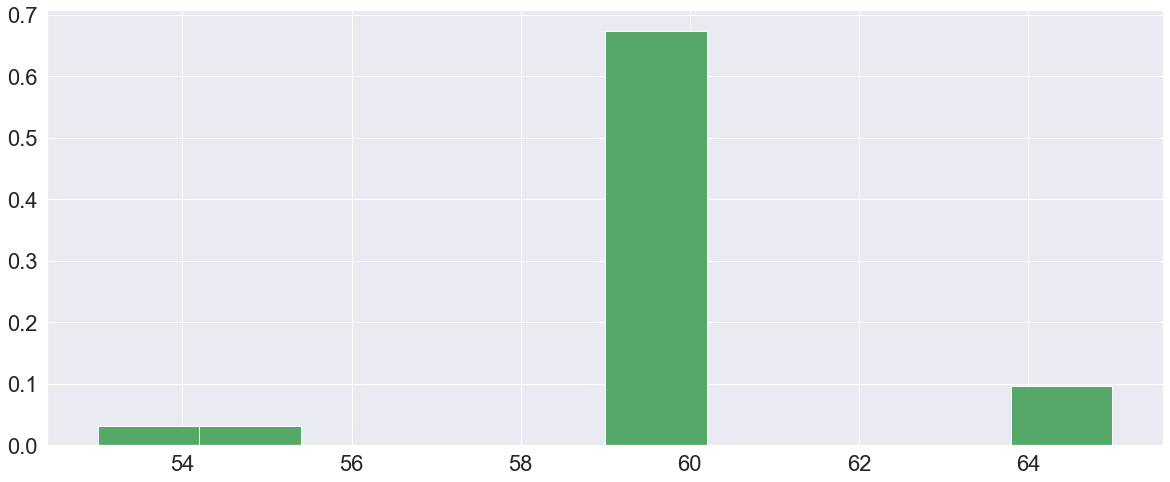

(' KNEE                 ', ' VALID ')


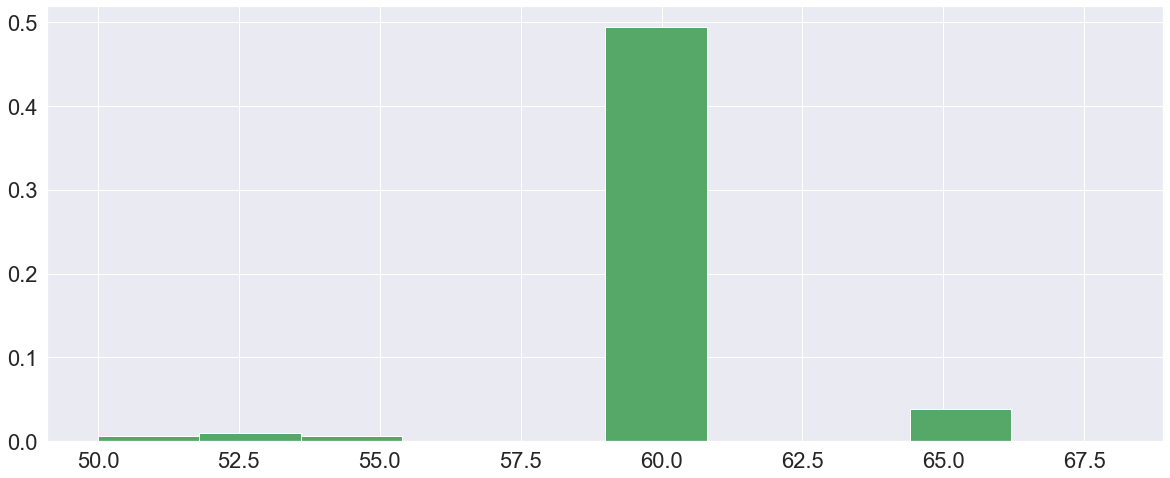

(' LEG                  ', ' VALID ')


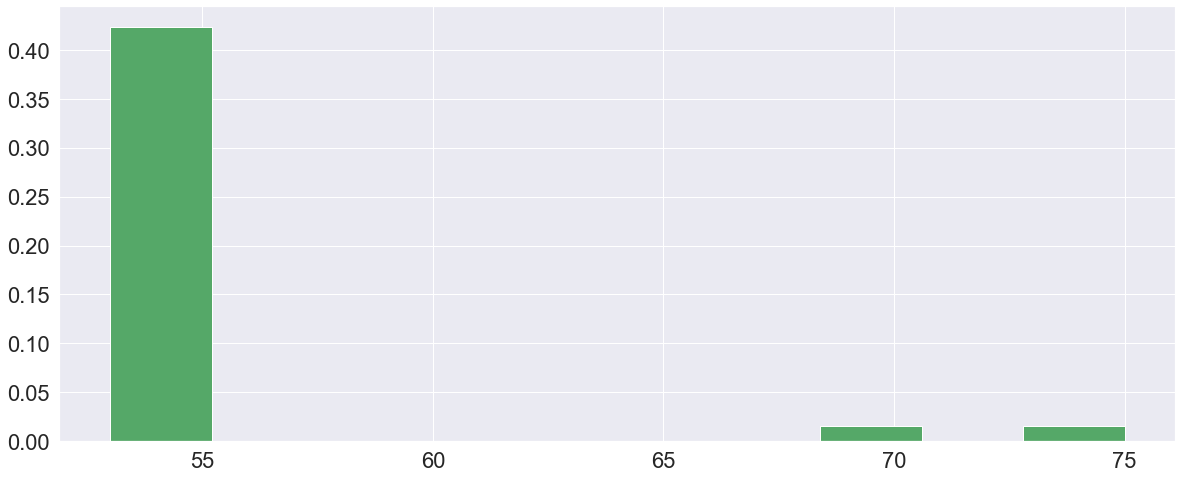

(' LSPINE               ', ' REJCT ')


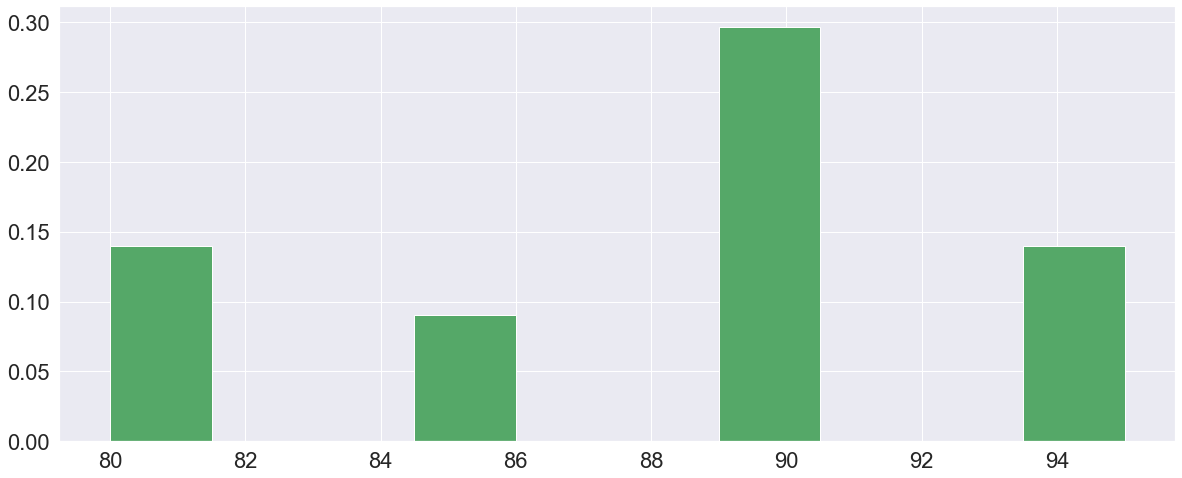

(' LSPINE               ', ' VALID ')


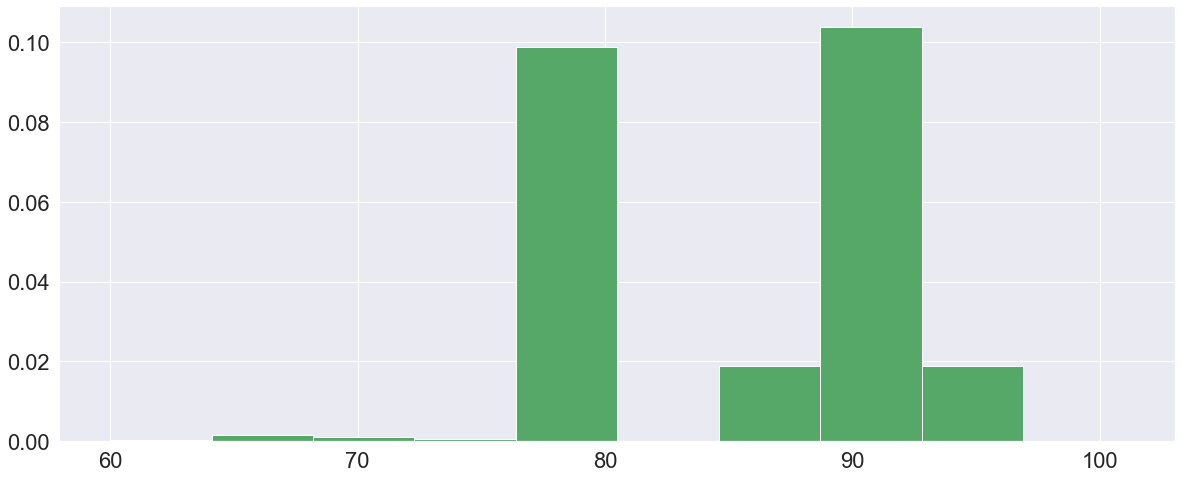

(' PELVIS               ', ' REJCT ')


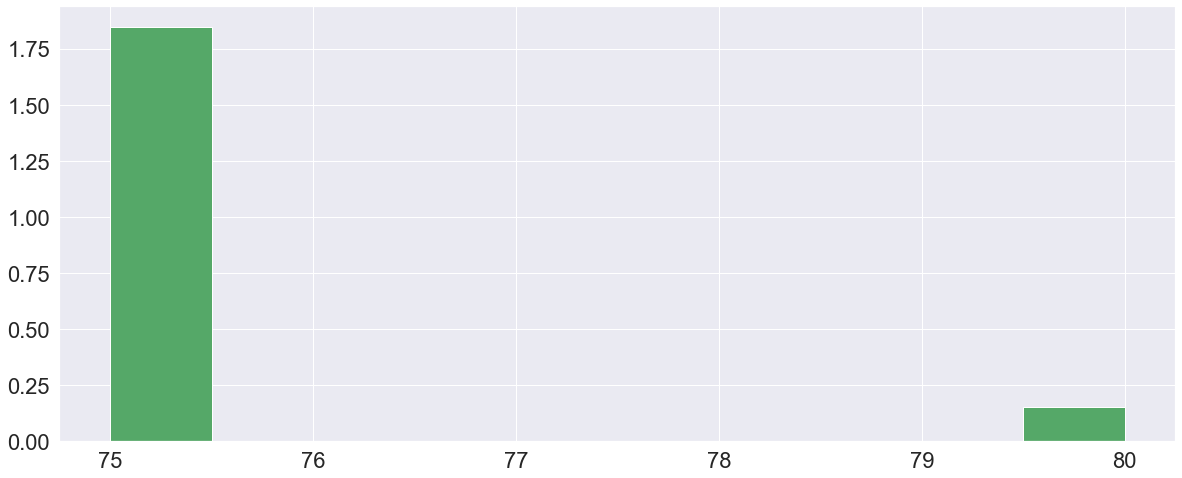

(' PELVIS               ', ' VALID ')


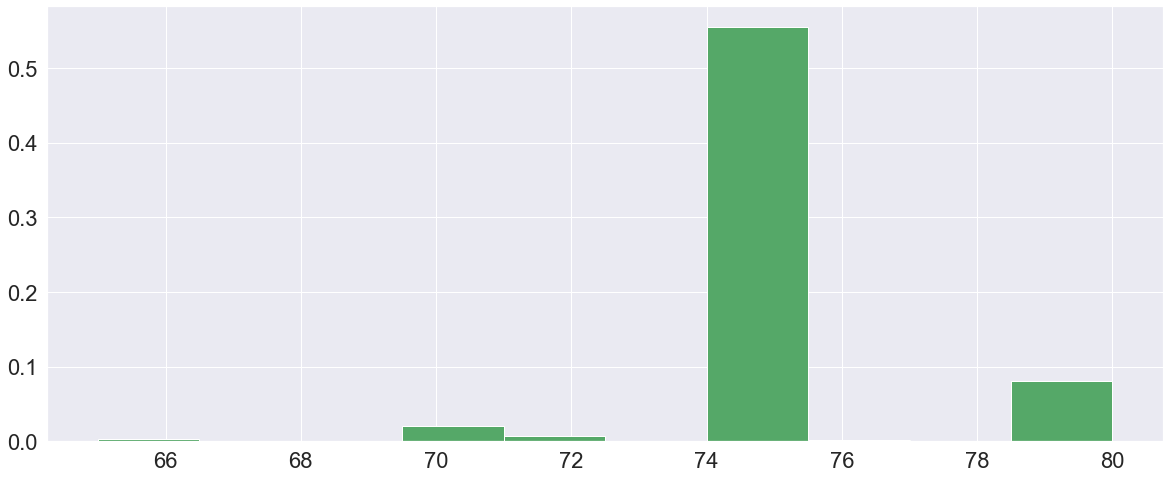

(' SHOULDER             ', ' REJCT ')


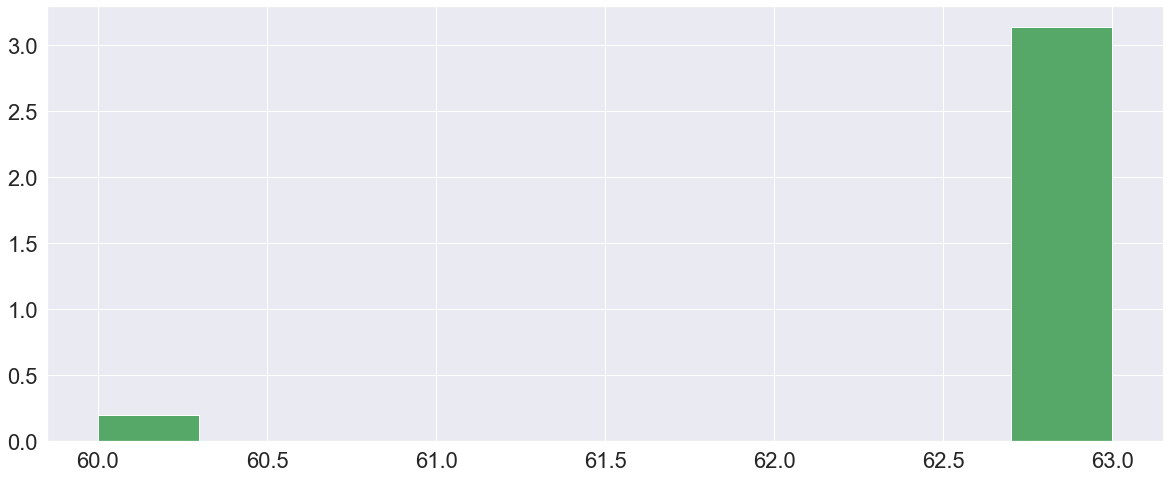

(' SHOULDER             ', ' VALID ')


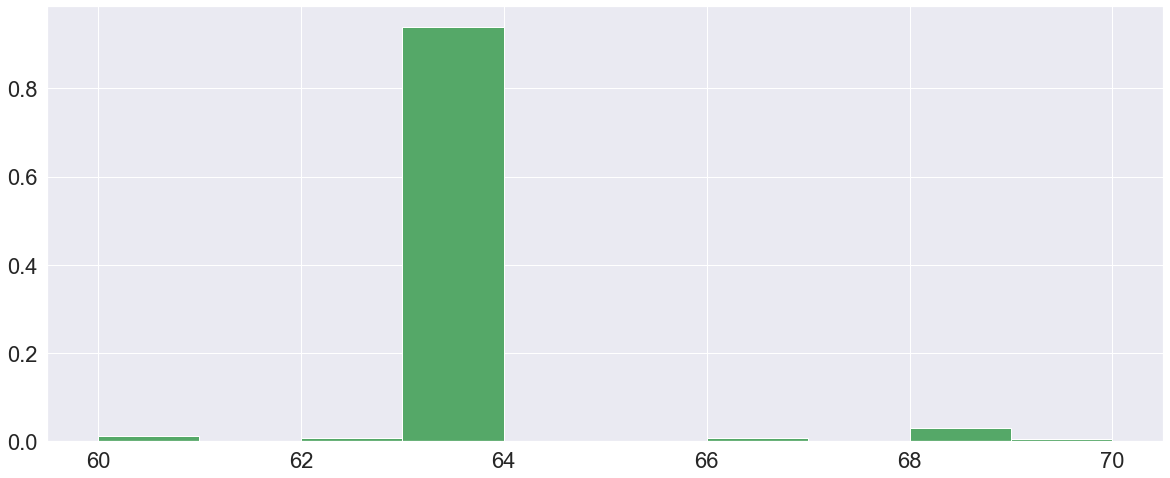

(' SKULL                ', ' VALID ')


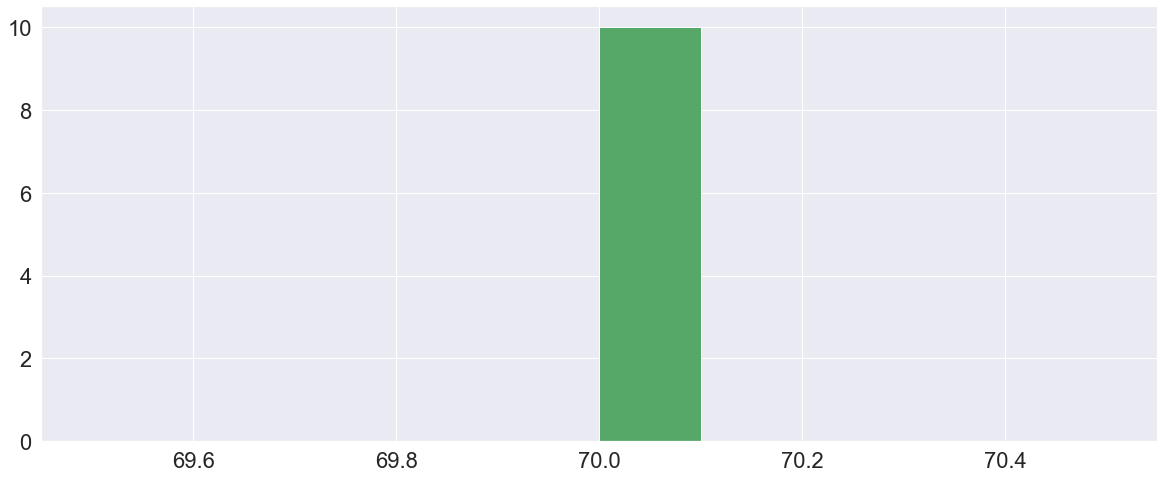

(' TSPINE               ', ' REJCT ')


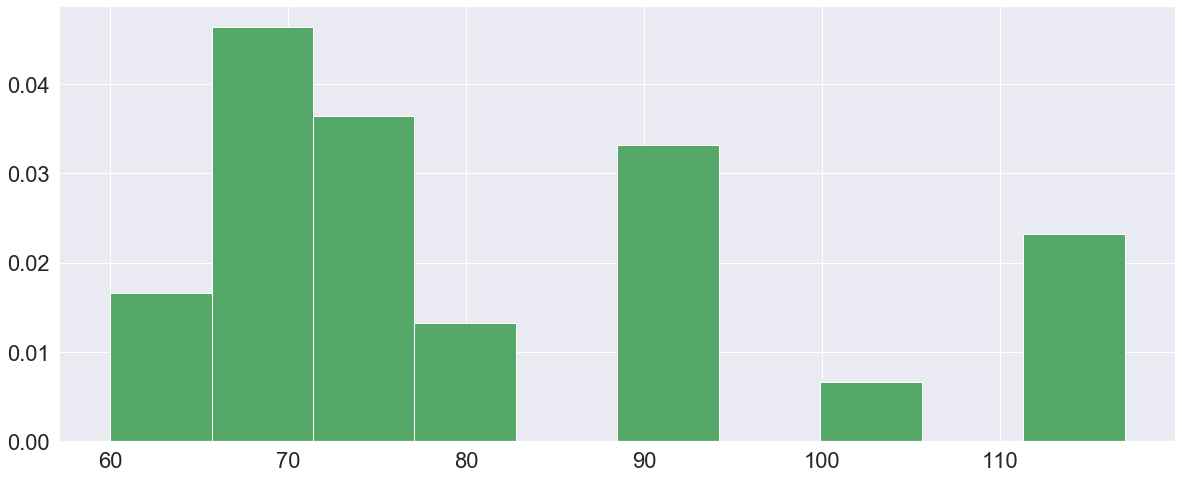

(' TSPINE               ', ' VALID ')


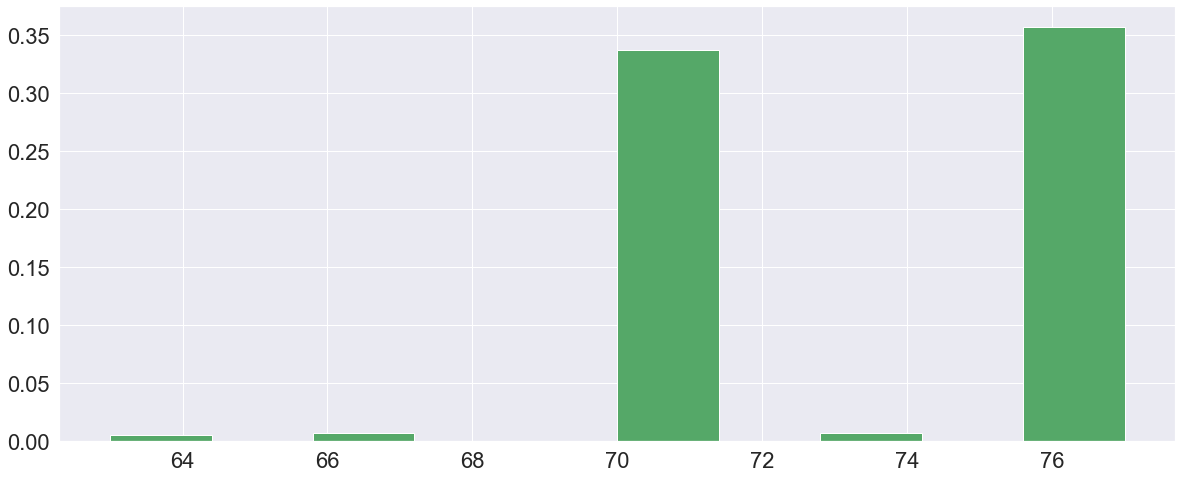

(' WRIST                ', ' REJCT ')


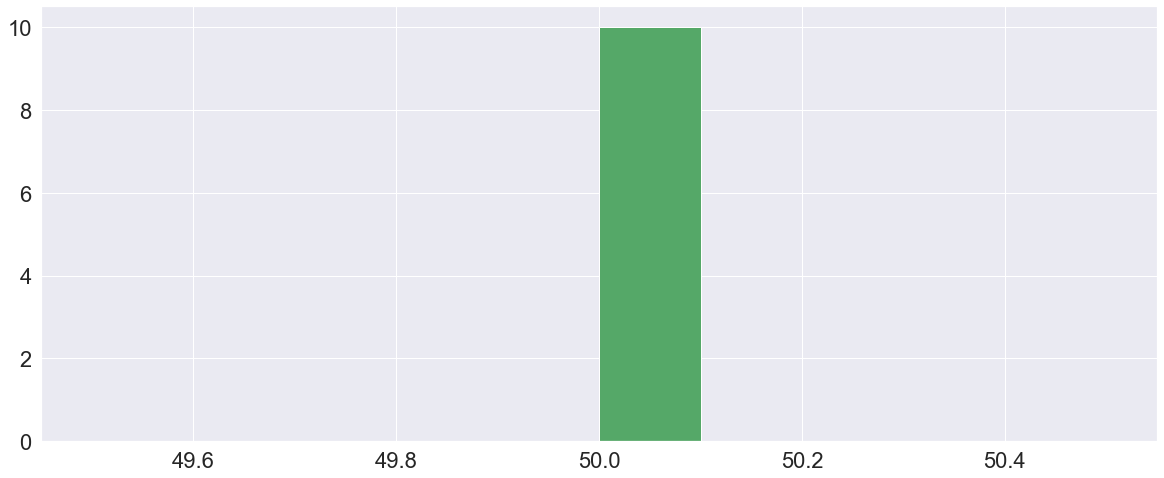

(' WRIST                ', ' VALID ')


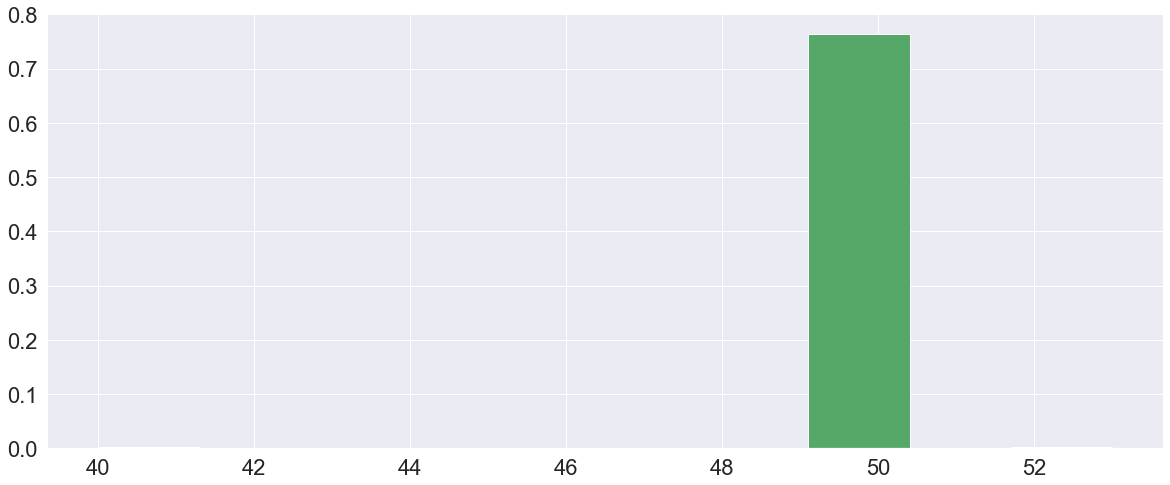

In [50]:
for i in range(34):
    if i!=20 and i!=28:
        print(group_anat_v_r.iloc[i].name)
        plt.hist(group_anat_v_r.iloc[i]["kVp"], 10, density=1, facecolor='g', alpha=1)
        plt.show()

('                      ', ' REJCT ')


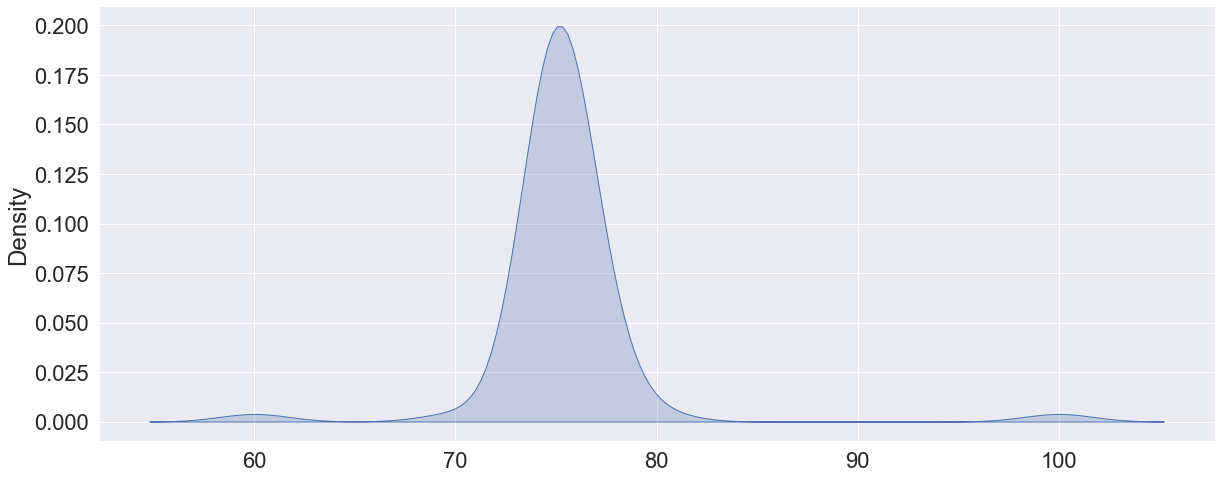

('                      ', ' VALID ')


C:\Users\Nevena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


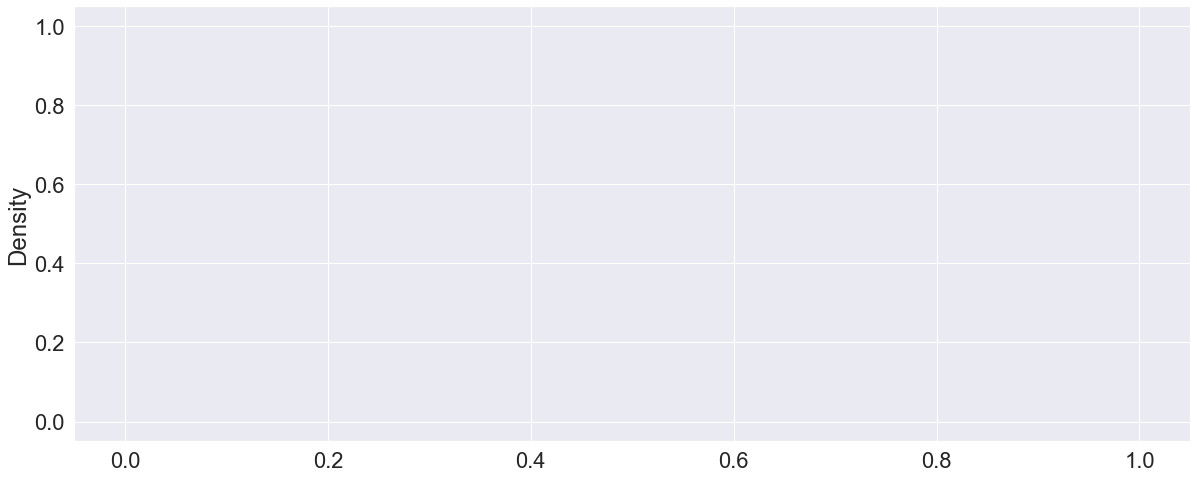

(' ANKLE                ', ' REJCT ')


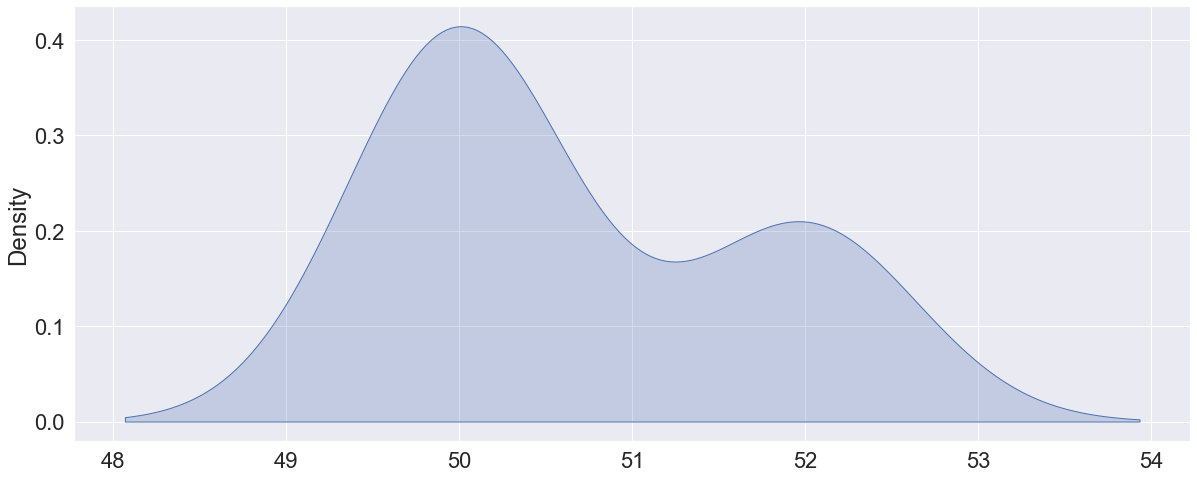

(' ANKLE                ', ' VALID ')


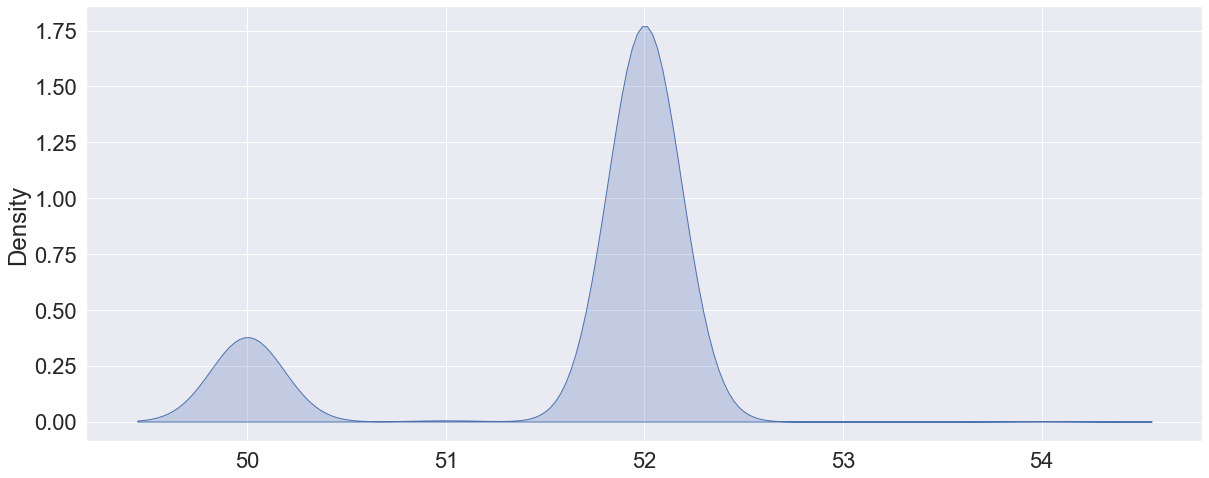

(' ARM                  ', ' REJCT ')


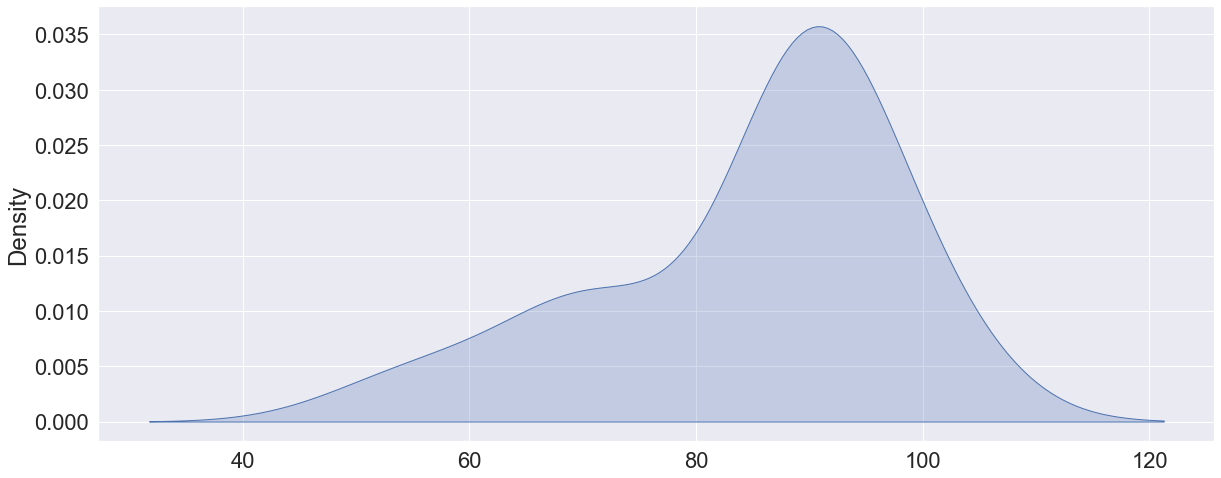

(' ARM                  ', ' VALID ')


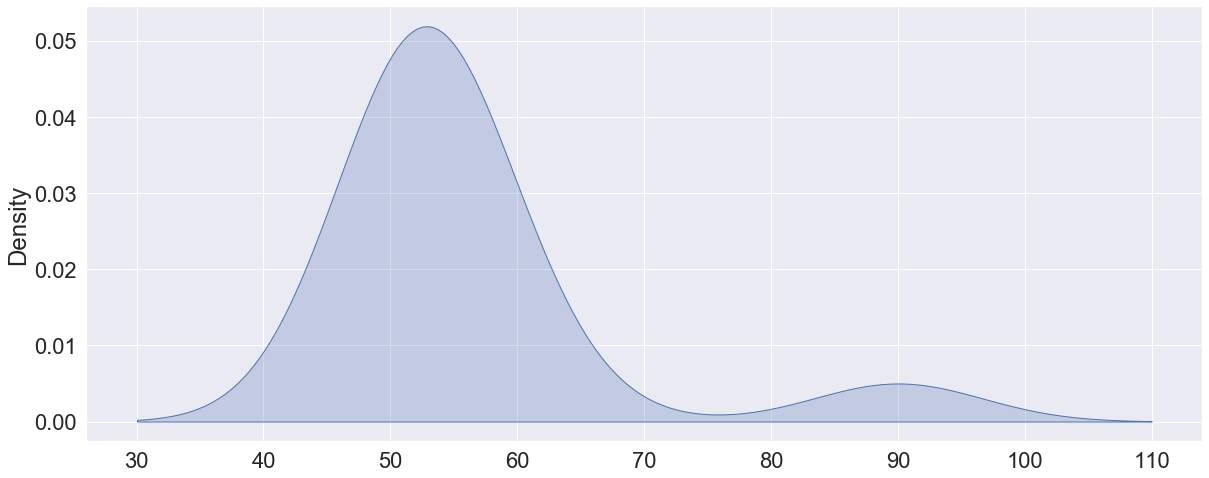

(' CHEST                ', ' REJCT ')


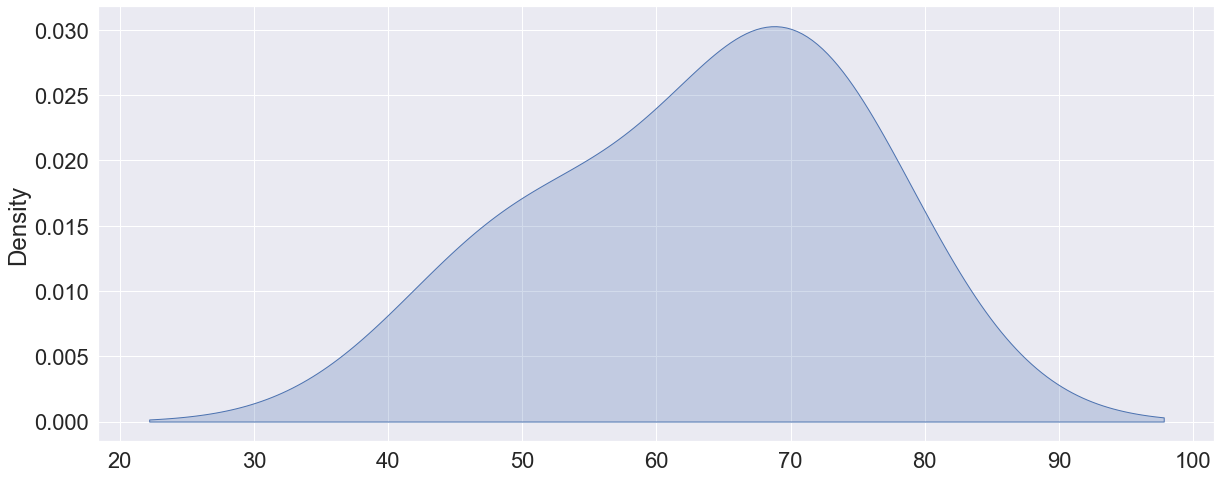

(' CHEST                ', ' VALID ')


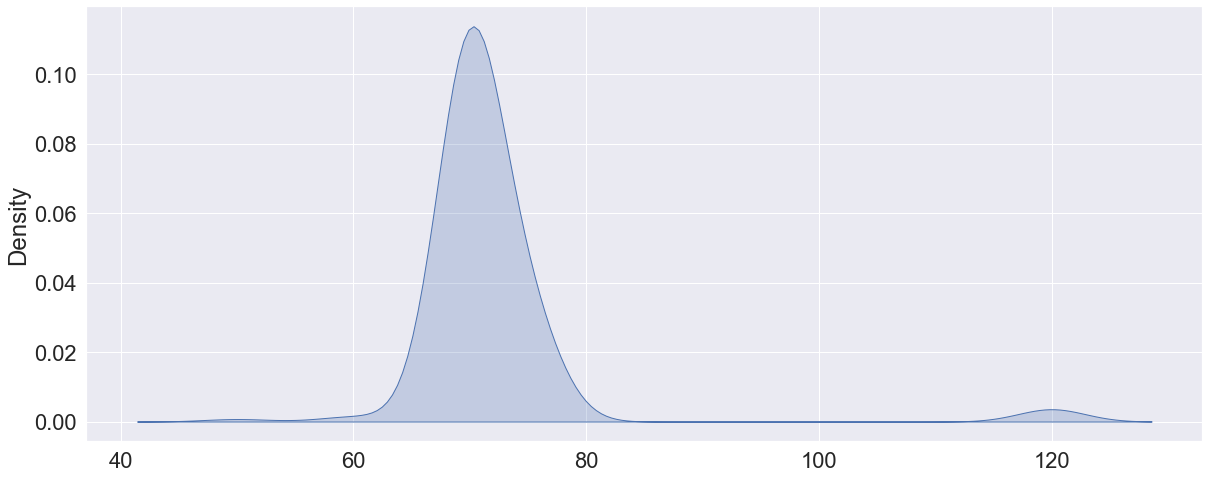

(' CSPINE               ', ' REJCT ')


C:\Users\Nevena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


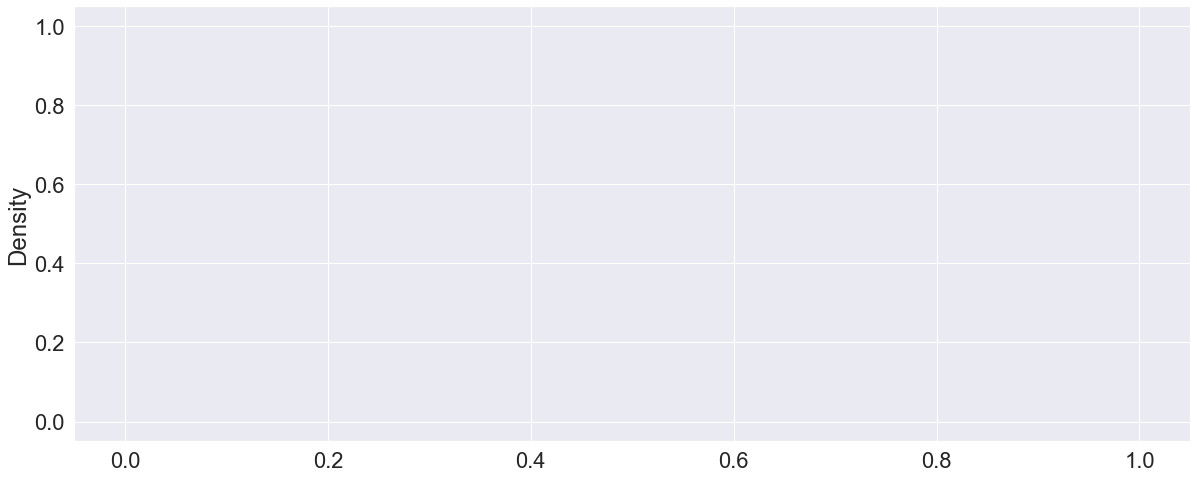

(' CSPINE               ', ' VALID ')


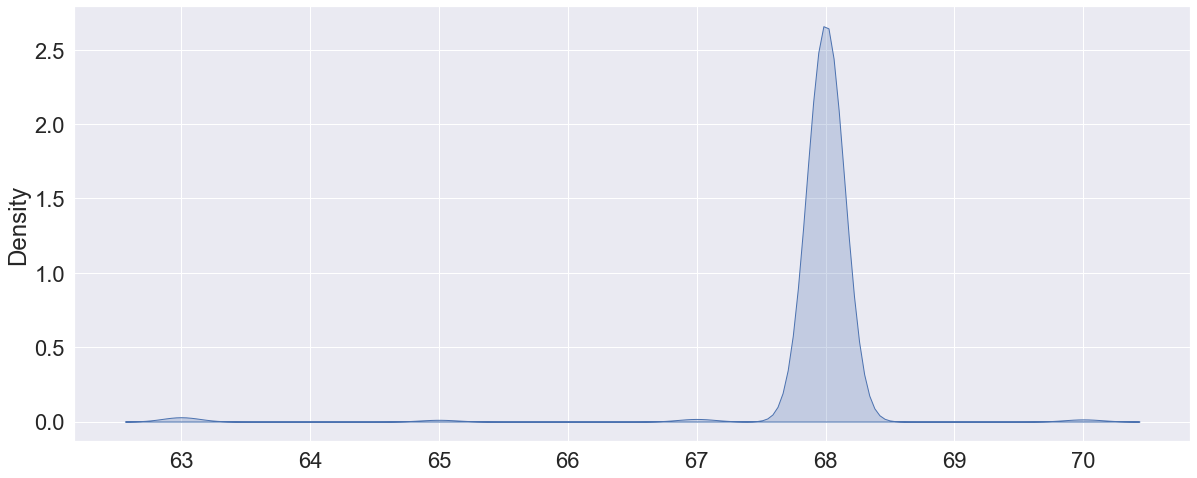

(' ELBOW                ', ' REJCT ')


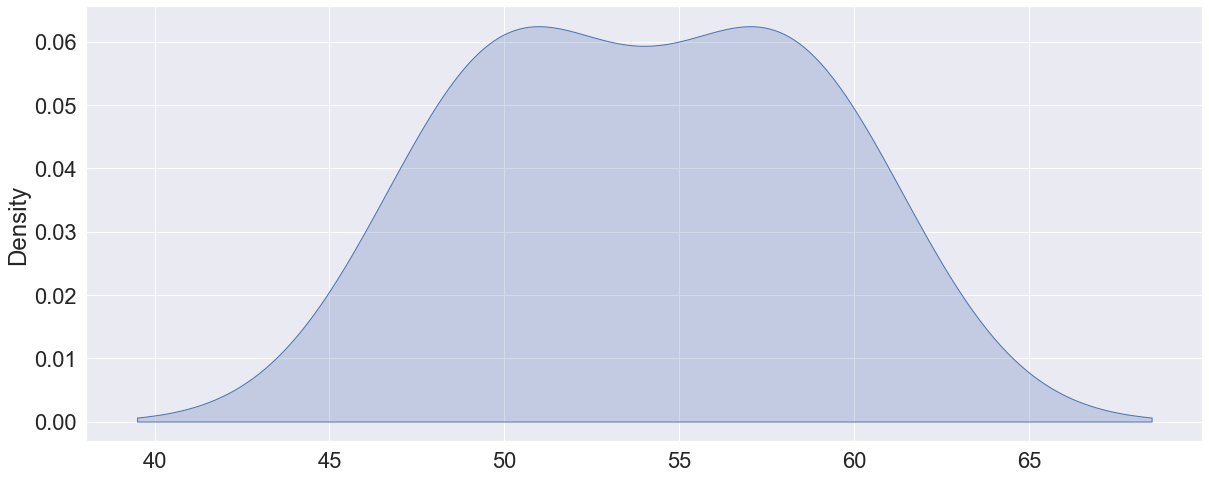

(' ELBOW                ', ' VALID ')


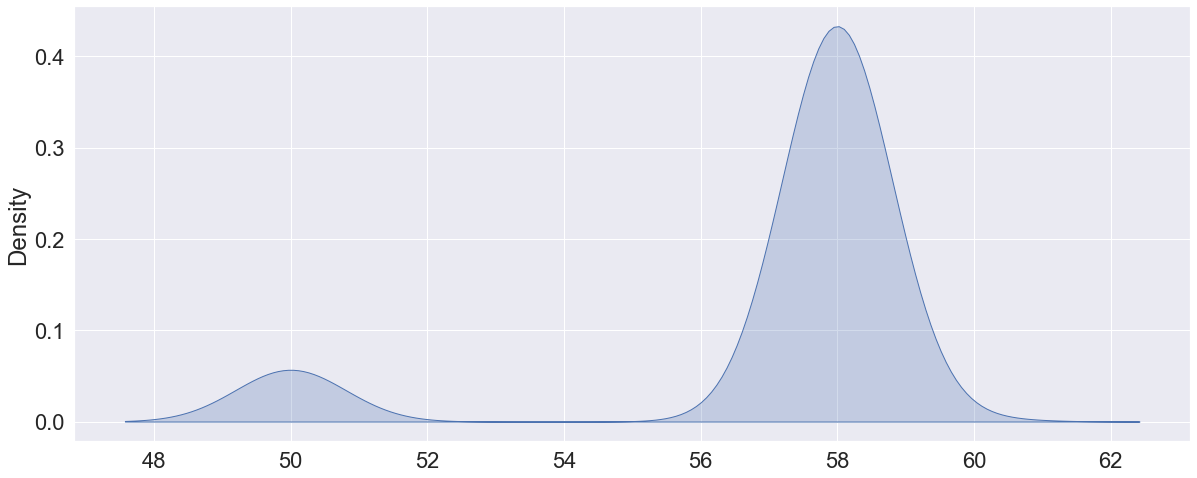

(' FOOT                 ', ' REJCT ')


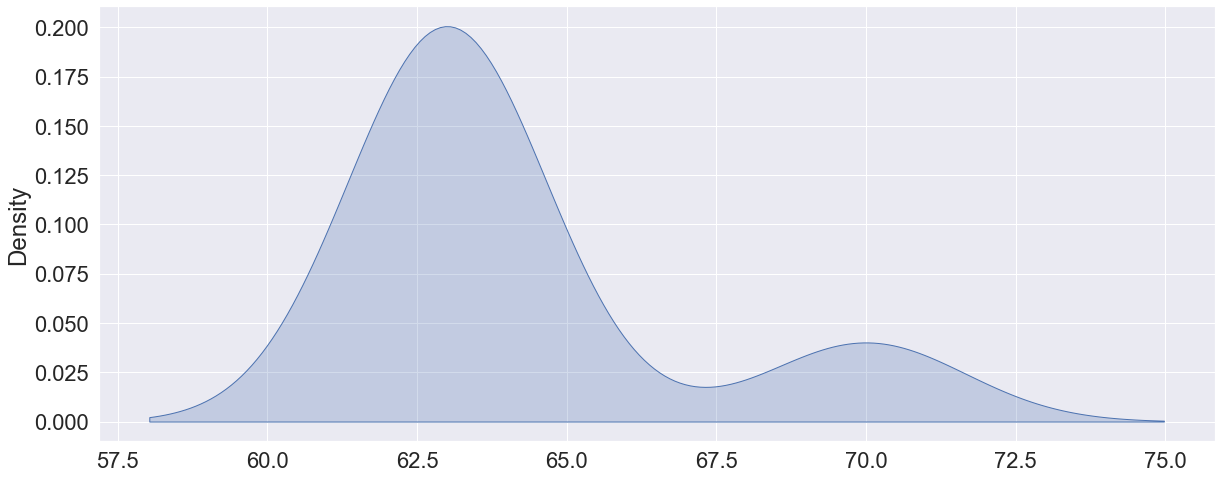

(' FOOT                 ', ' VALID ')


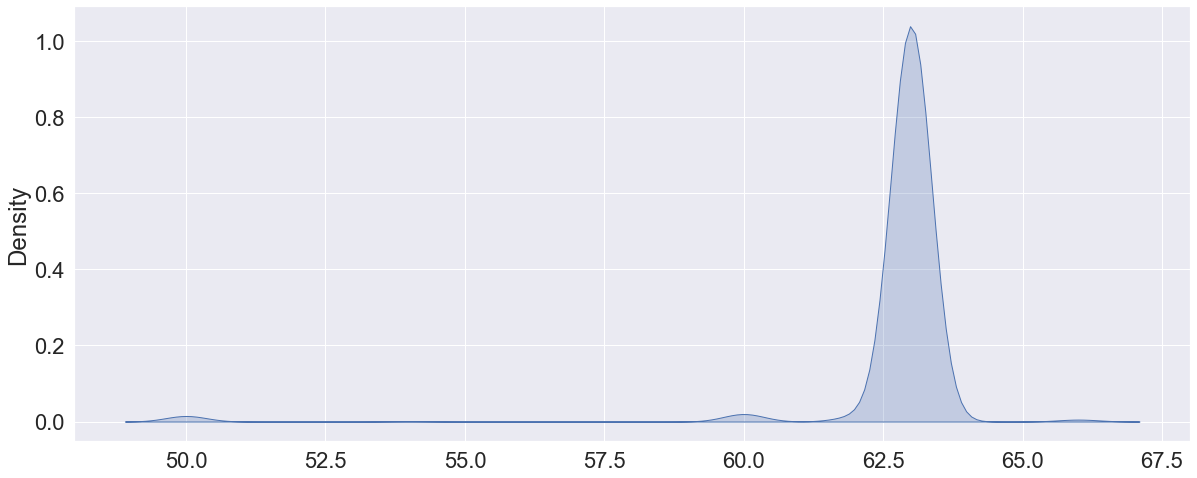

(' HAND                 ', ' REJCT ')


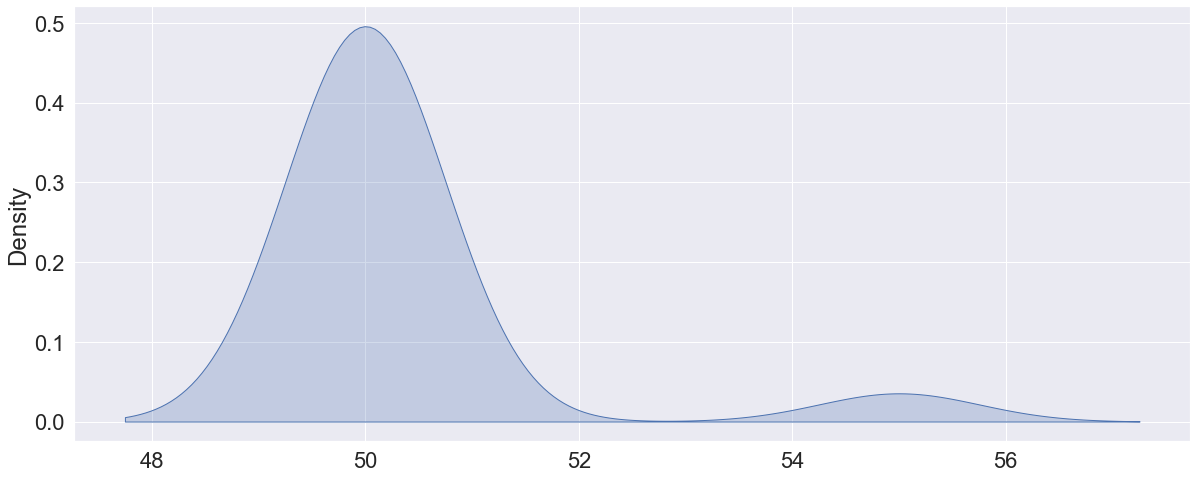

(' HAND                 ', ' VALID ')


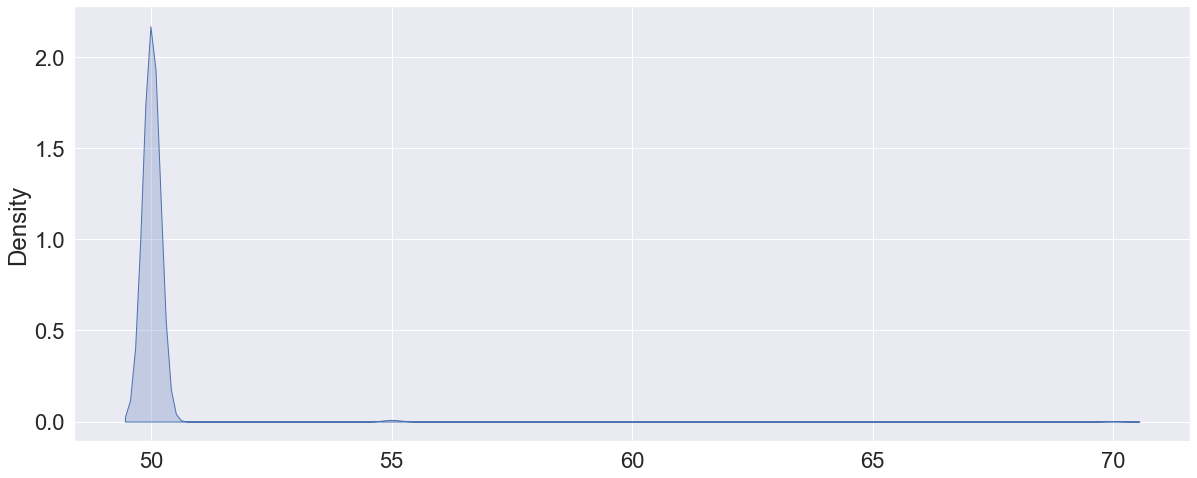

(' HIP                  ', ' REJCT ')


C:\Users\Nevena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


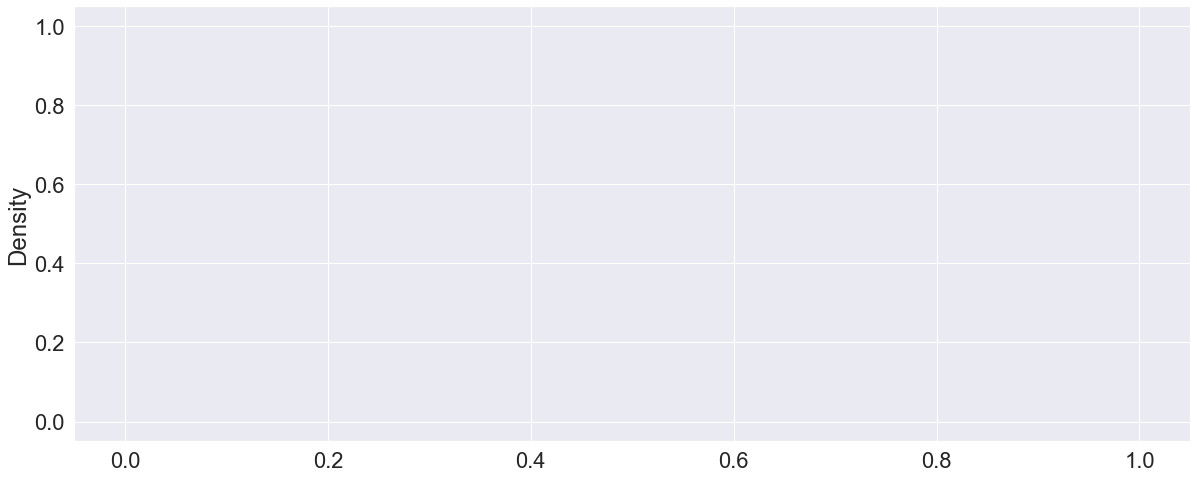

(' HIP                  ', ' VALID ')


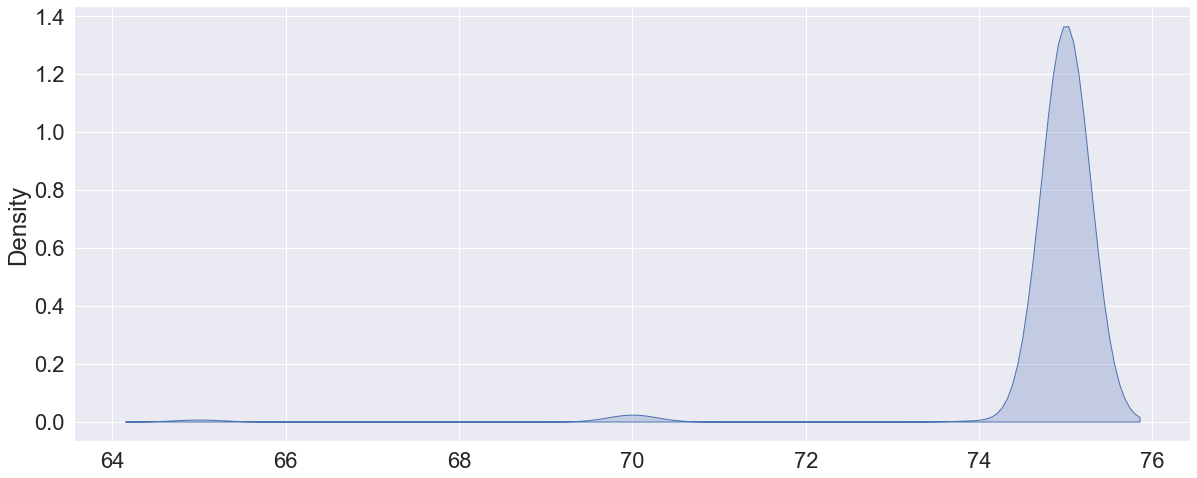

(' KNEE                 ', ' REJCT ')


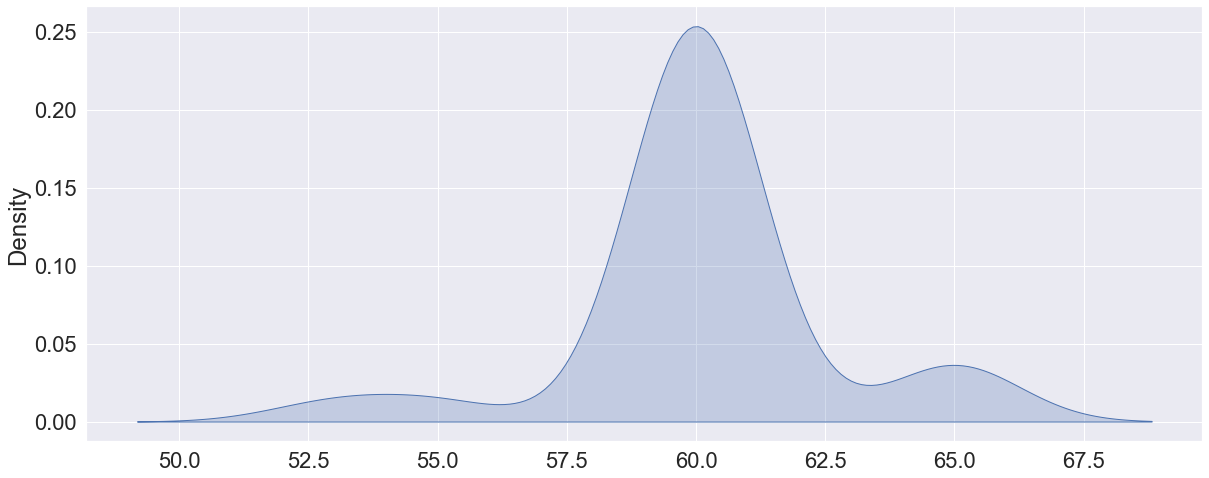

(' KNEE                 ', ' VALID ')


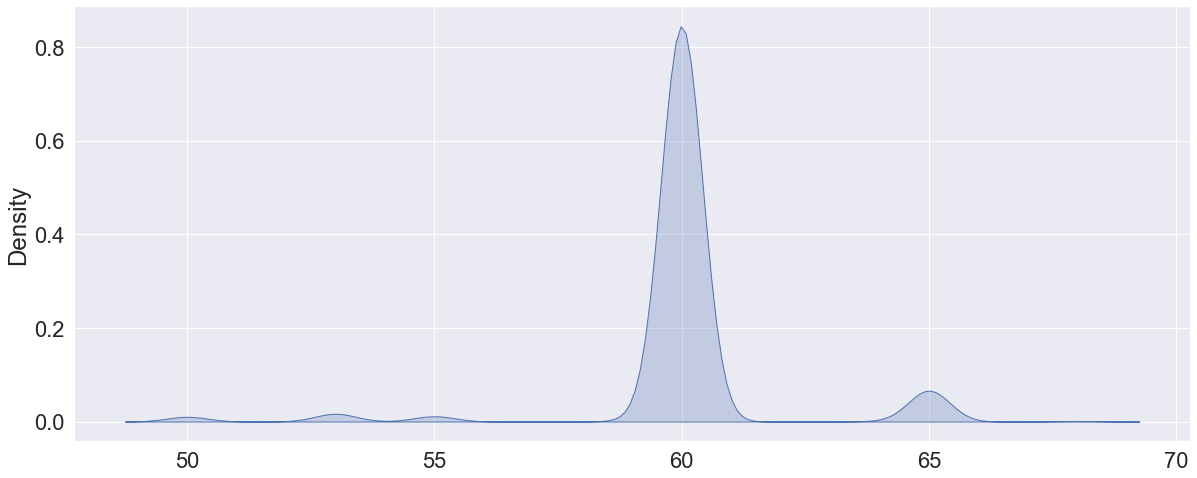

(' LEG                  ', ' VALID ')


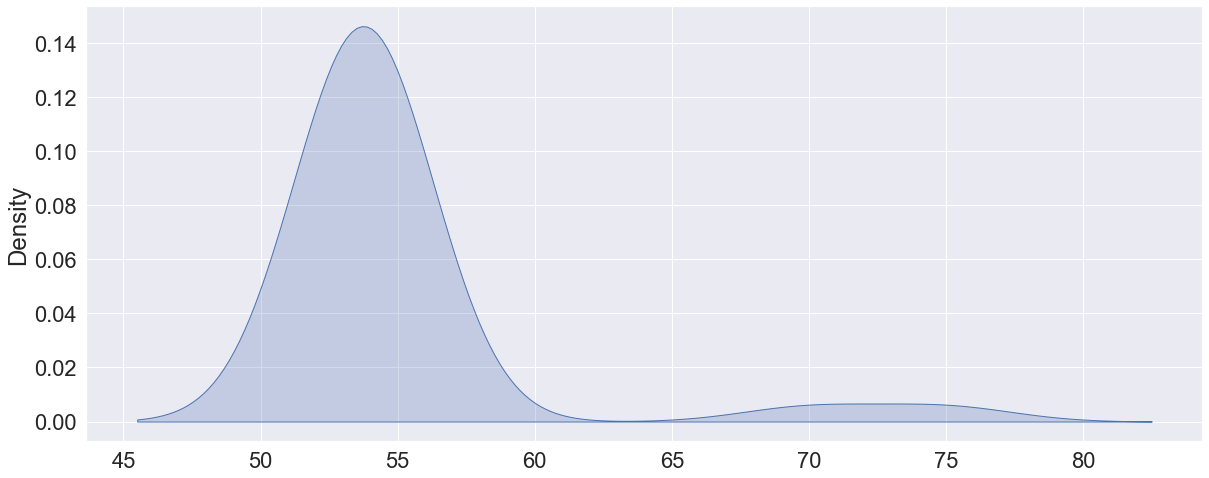

(' LSPINE               ', ' REJCT ')


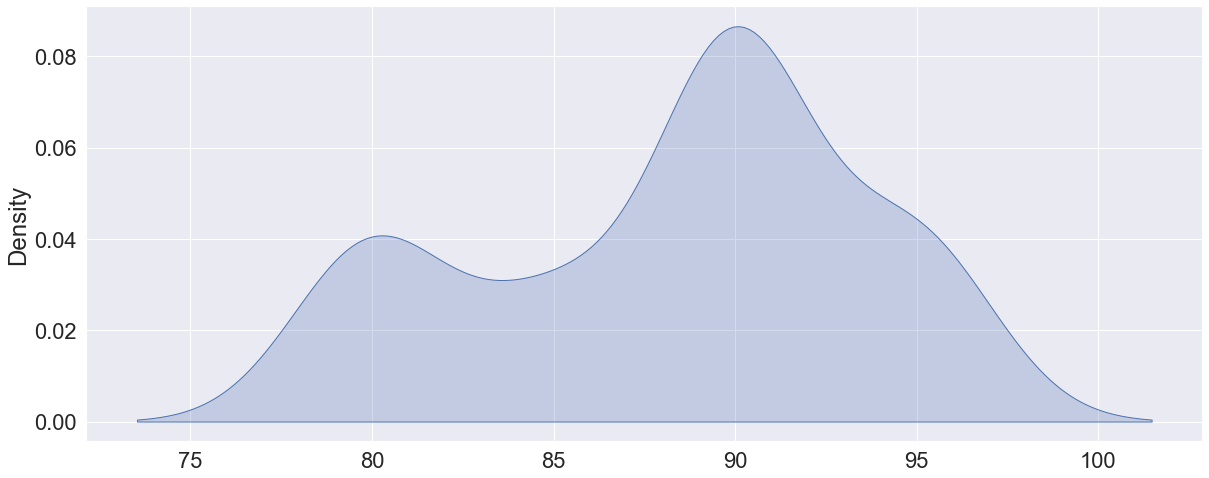

(' LSPINE               ', ' VALID ')


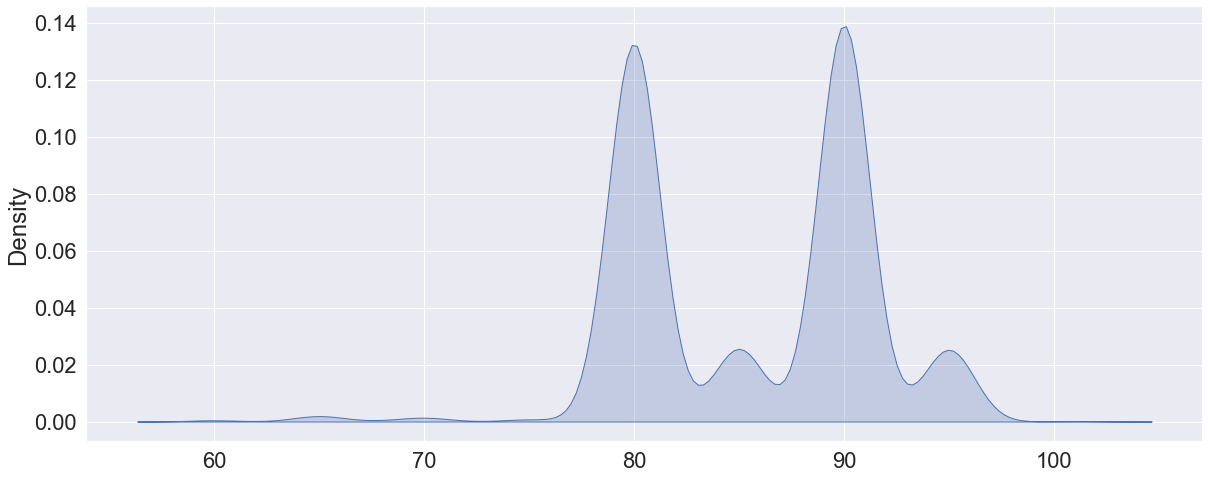

(' PELVIS               ', ' REJCT ')


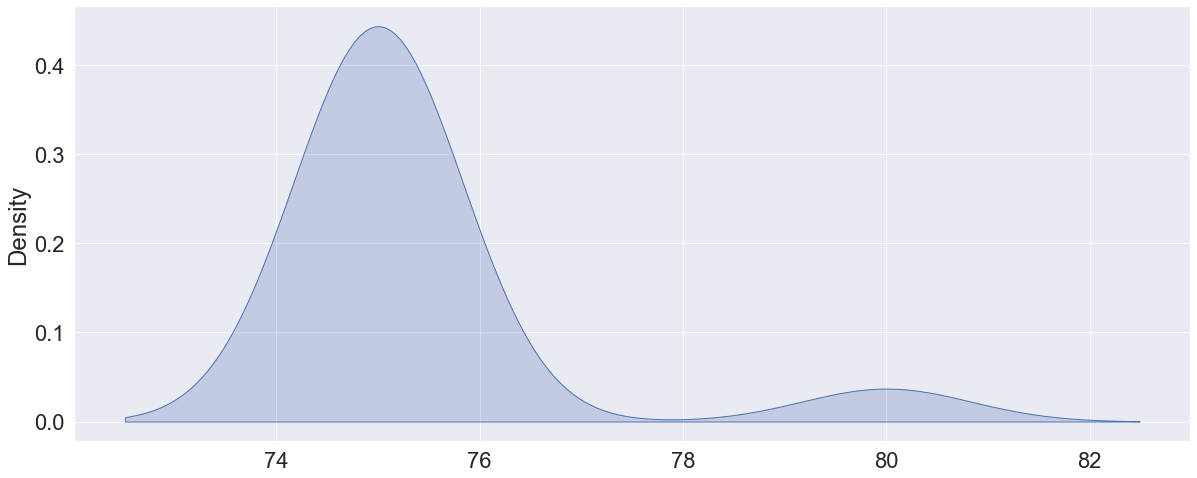

(' PELVIS               ', ' VALID ')


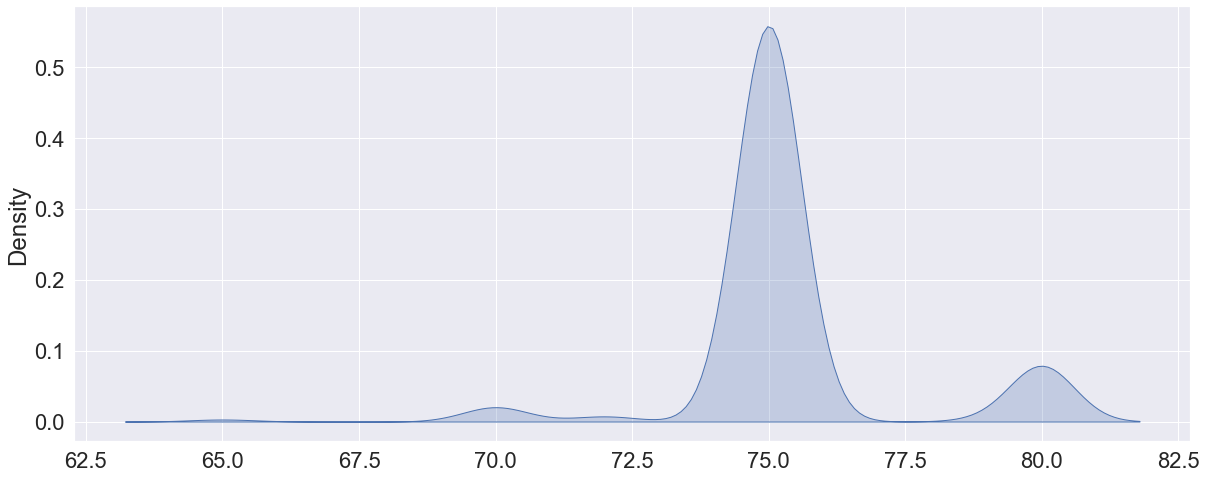

(' SHOULDER             ', ' REJCT ')


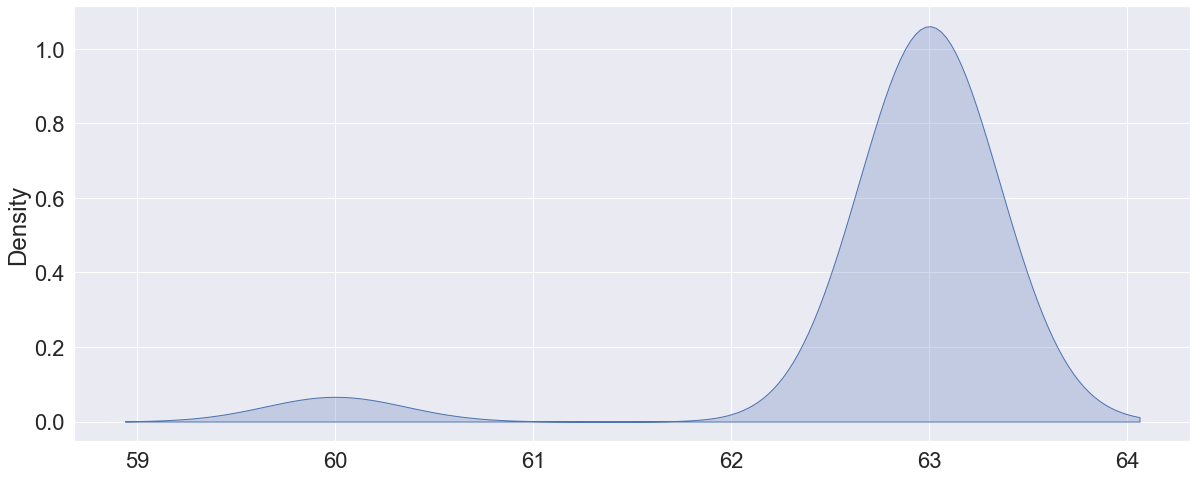

(' SHOULDER             ', ' VALID ')


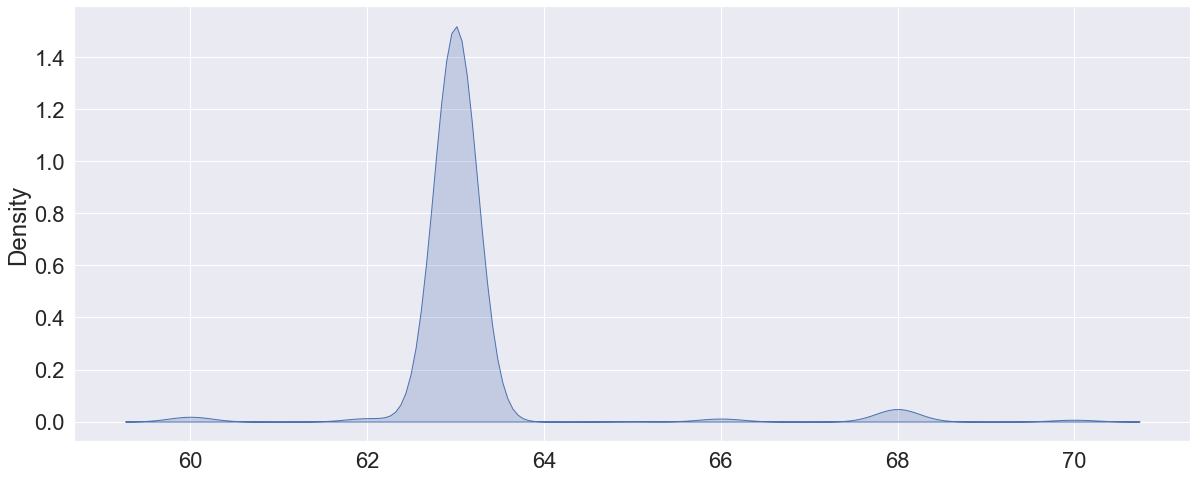

(' SKULL                ', ' VALID ')


C:\Users\Nevena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


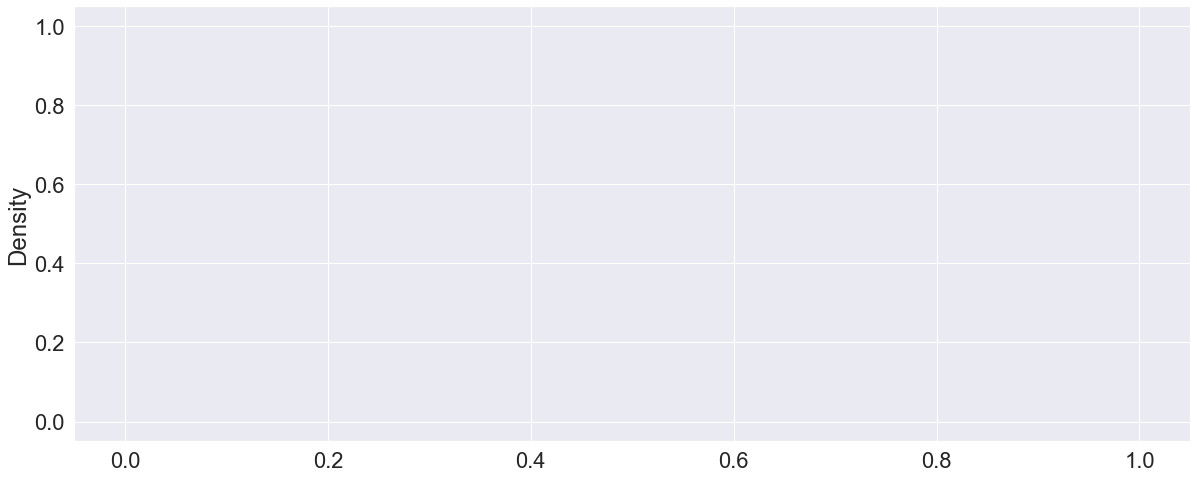

(' TSPINE               ', ' REJCT ')


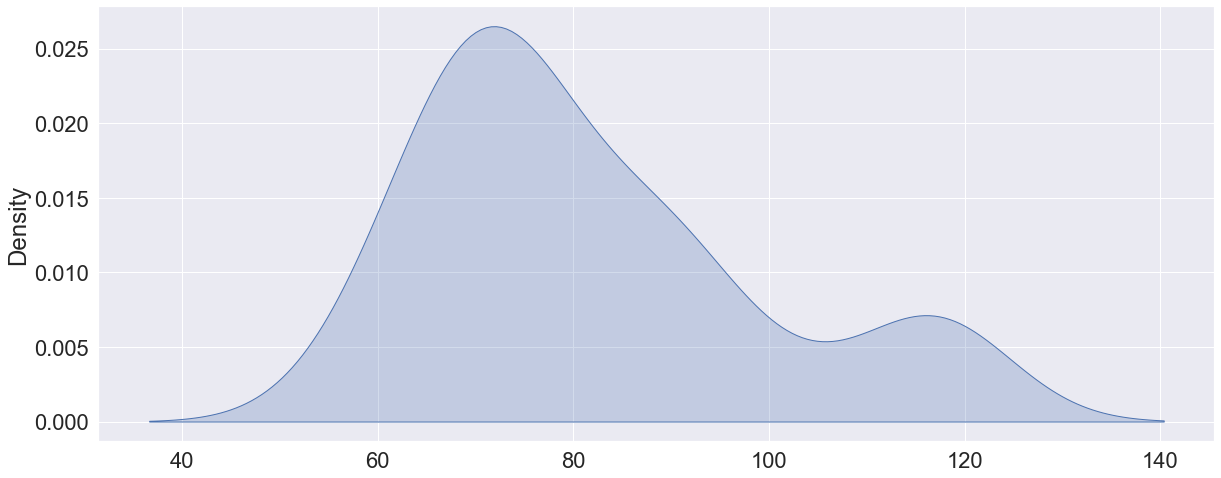

(' TSPINE               ', ' VALID ')


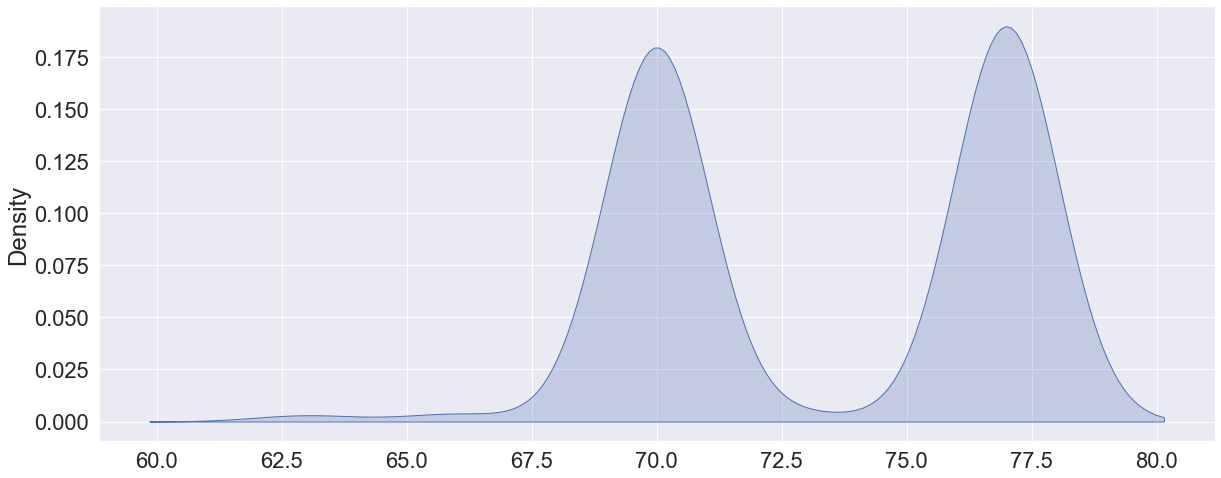

(' WRIST                ', ' REJCT ')


C:\Users\Nevena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  after removing the cwd from sys.path.


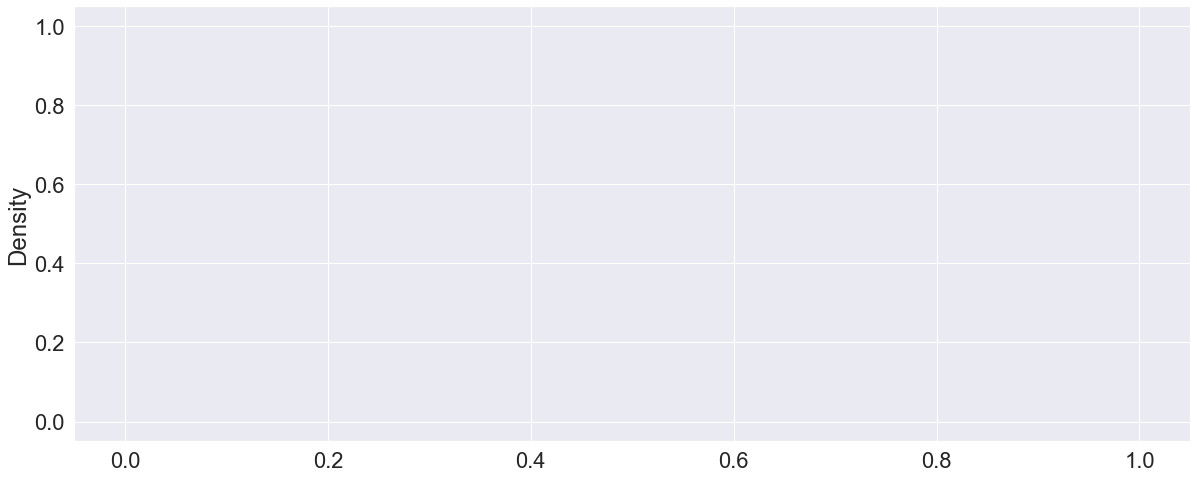

(' WRIST                ', ' VALID ')


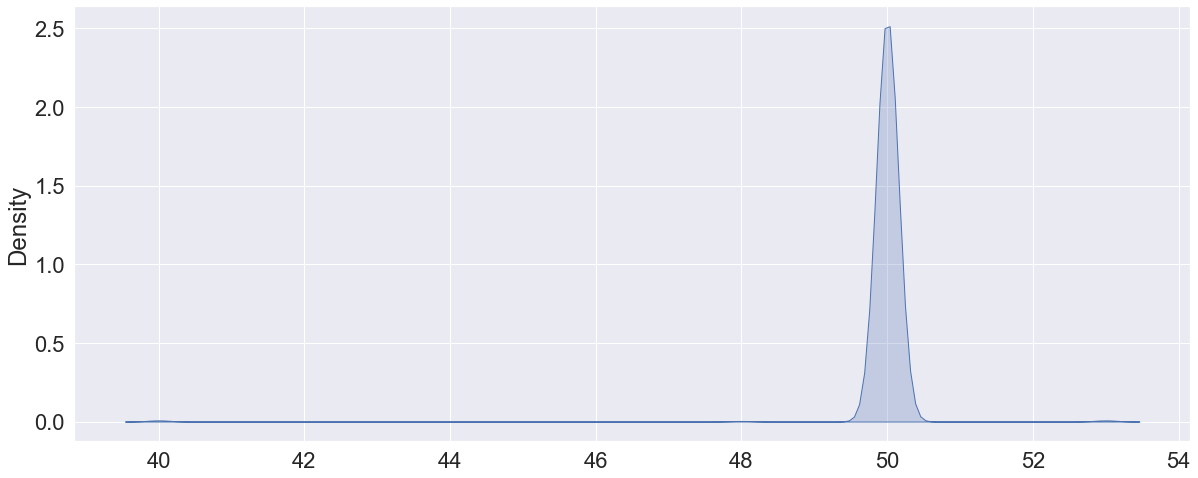

In [51]:
for i in range(34):
    if i!=20 and i!=28:
        print(group_anat_v_r.iloc[i].name)
        sns.kdeplot(group_anat_v_r.iloc[i]["kVp"], fill=True)
        plt.show()

('                      ', ' REJCT ')
('                      ', ' VALID ')


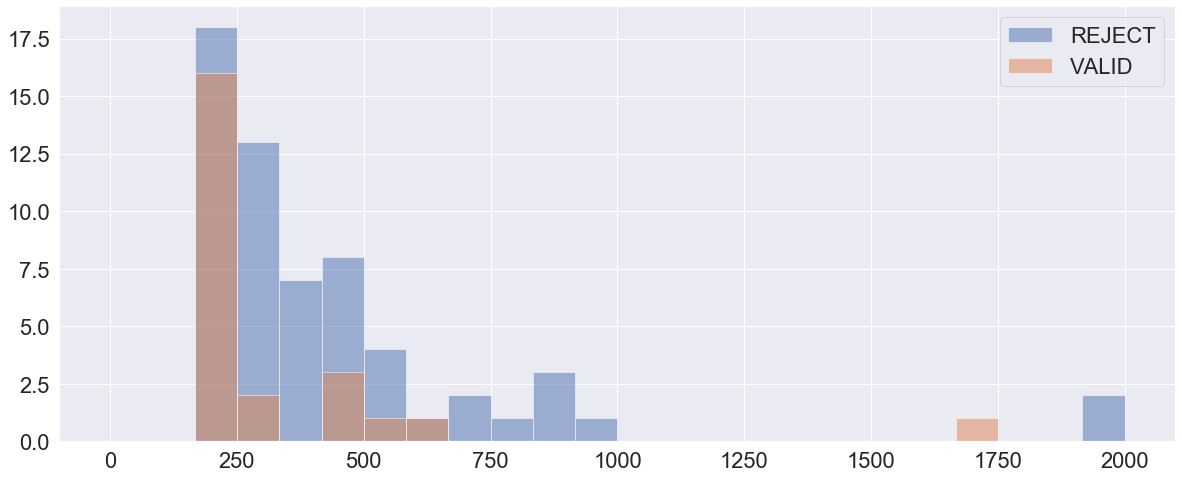

(' ANKLE                ', ' REJCT ')
(' ANKLE                ', ' VALID ')


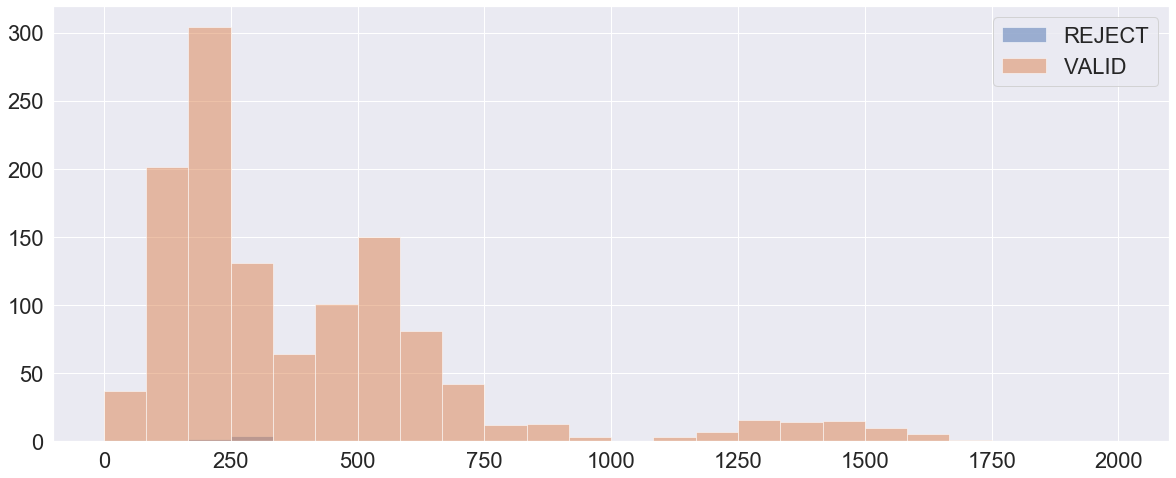

(' ARM                  ', ' REJCT ')
(' ARM                  ', ' VALID ')


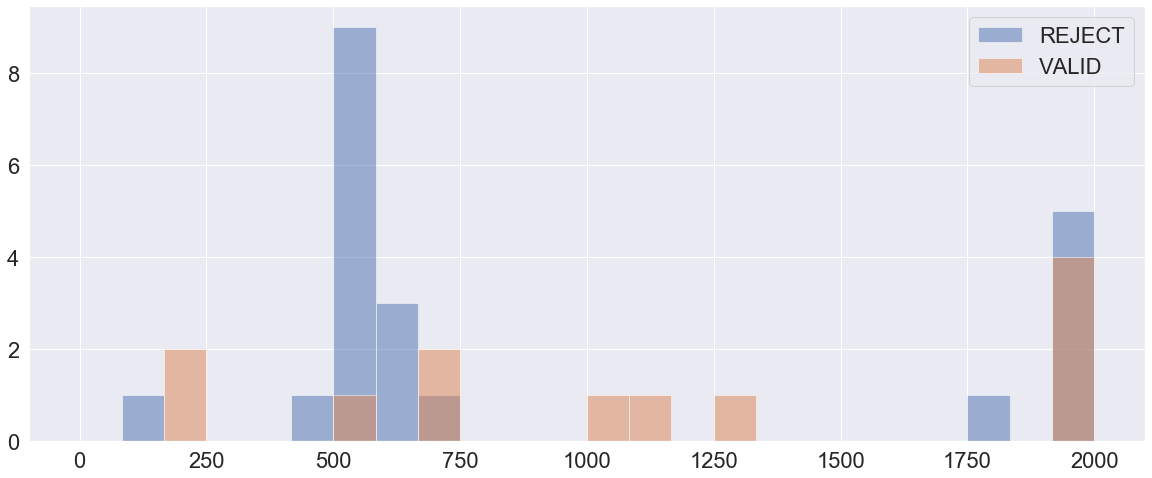

(' CHEST                ', ' REJCT ')
(' CHEST                ', ' VALID ')


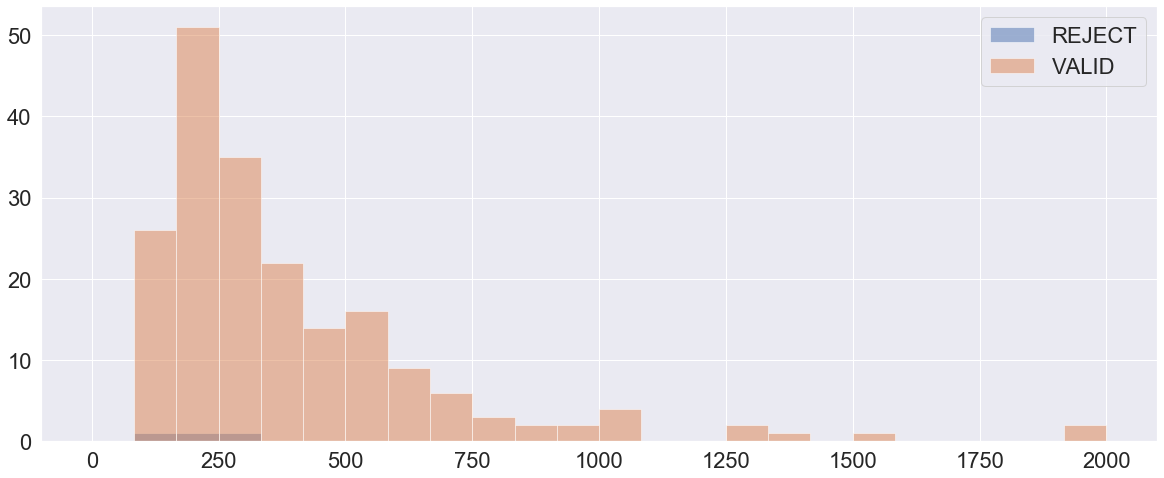

(' CSPINE               ', ' REJCT ')
(' CSPINE               ', ' VALID ')


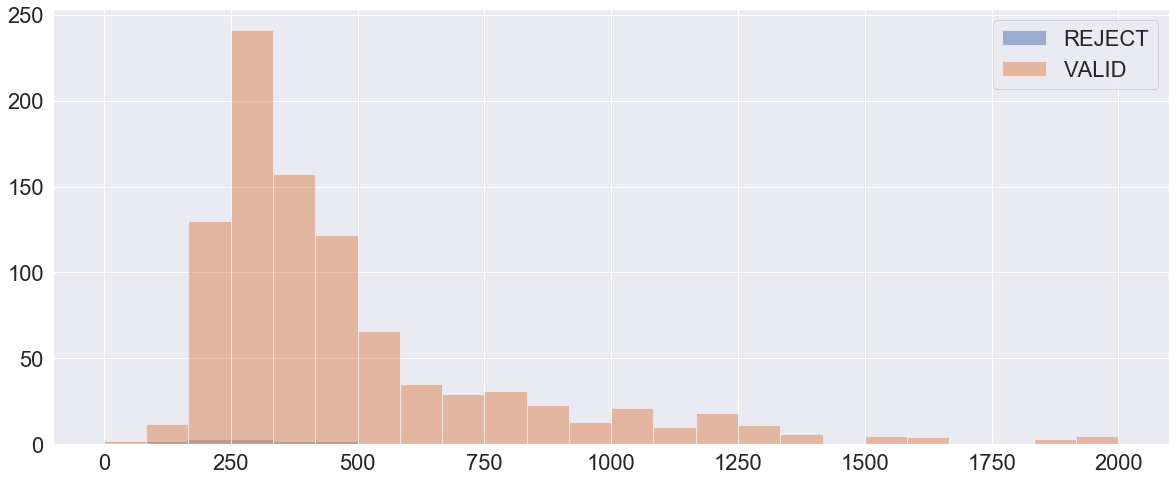

(' ELBOW                ', ' REJCT ')
(' ELBOW                ', ' VALID ')


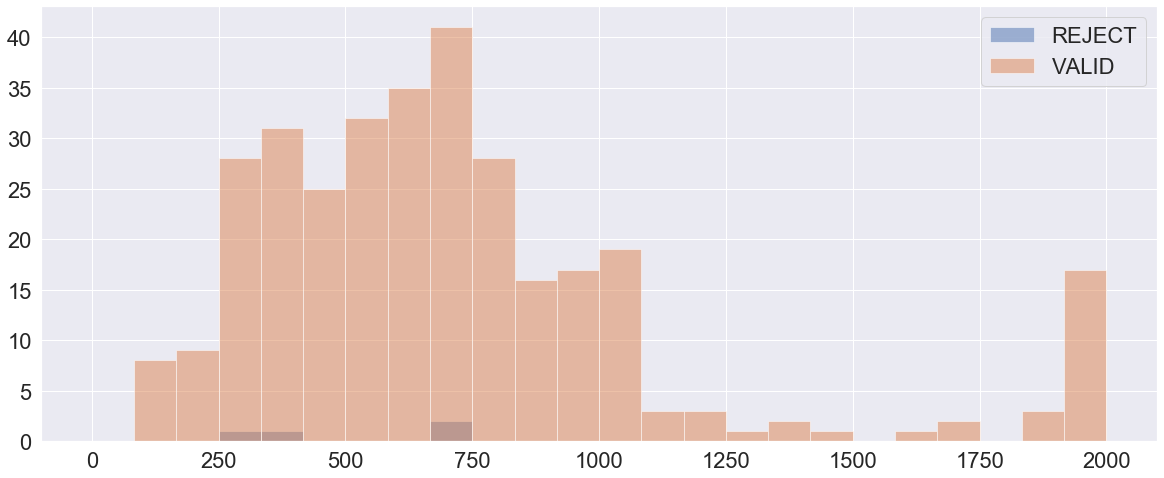

(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')


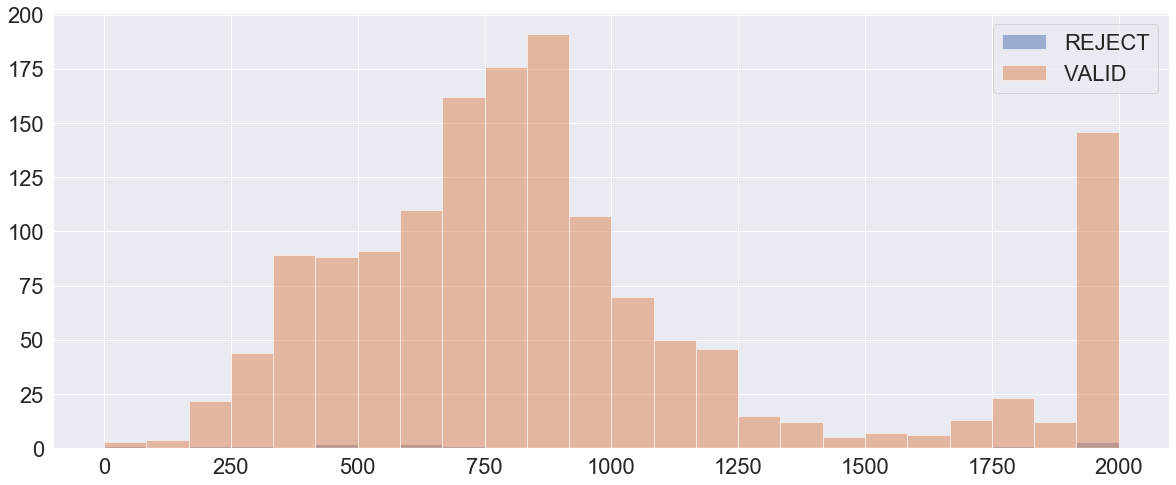

(' HAND                 ', ' REJCT ')
(' HAND                 ', ' VALID ')


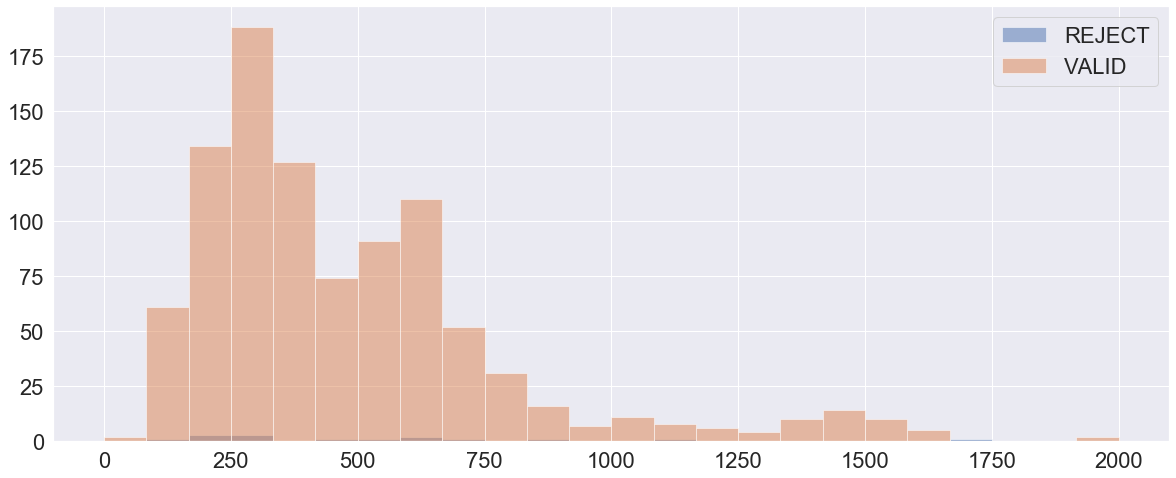

(' HIP                  ', ' REJCT ')
(' HIP                  ', ' VALID ')


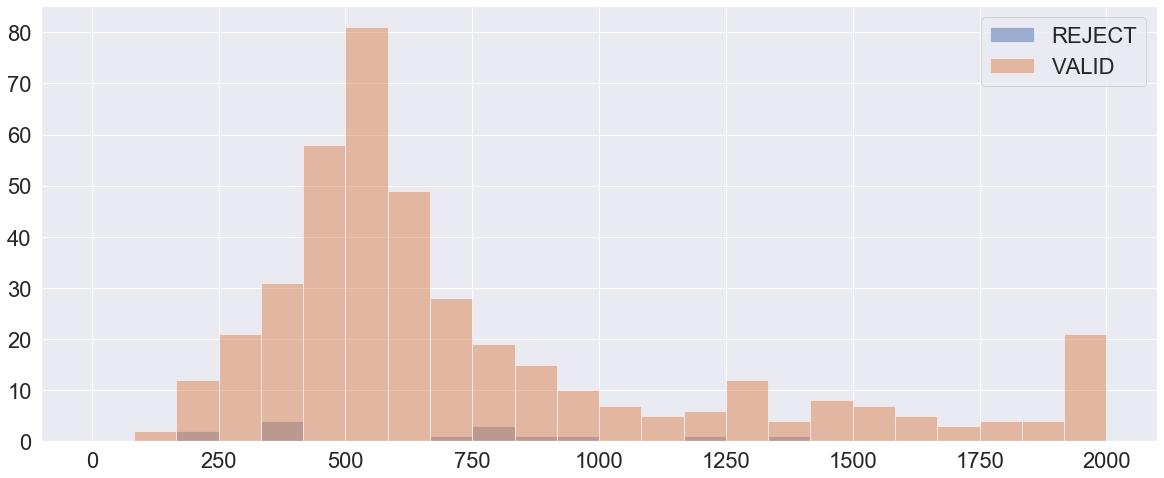

(' KNEE                 ', ' REJCT ')
(' KNEE                 ', ' VALID ')


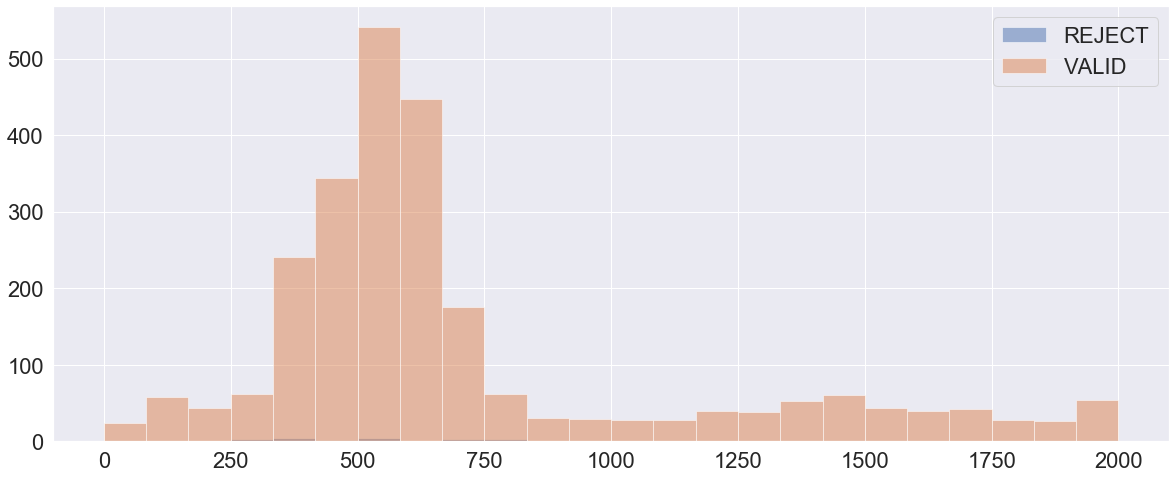

(' LEG                  ', ' REJCT ')
(' LEG                  ', ' VALID ')


C:\Users\Nevena\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Nevena\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


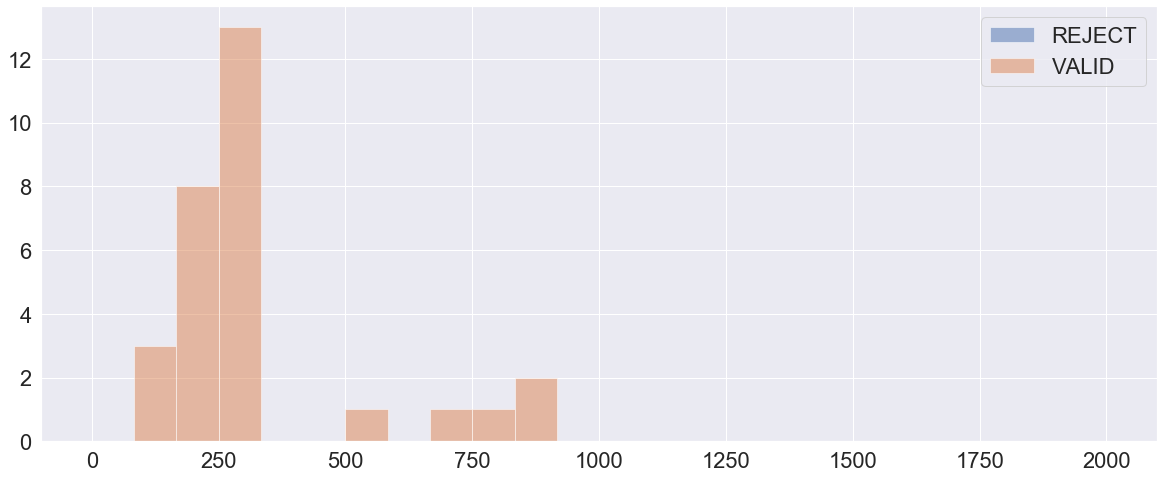

(' LSPINE               ', ' REJCT ')
(' LSPINE               ', ' VALID ')


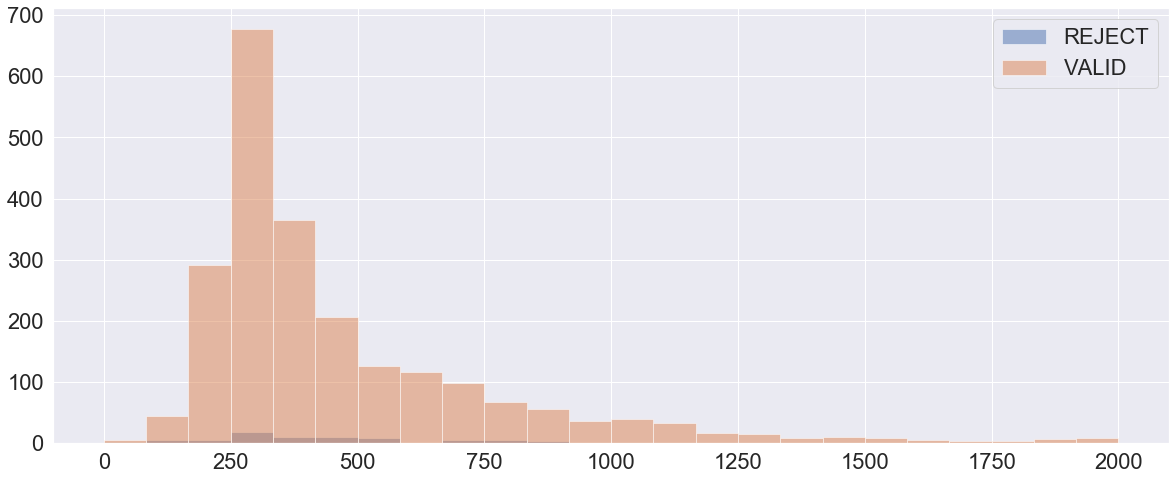

(' PELVIS               ', ' REJCT ')
(' PELVIS               ', ' VALID ')


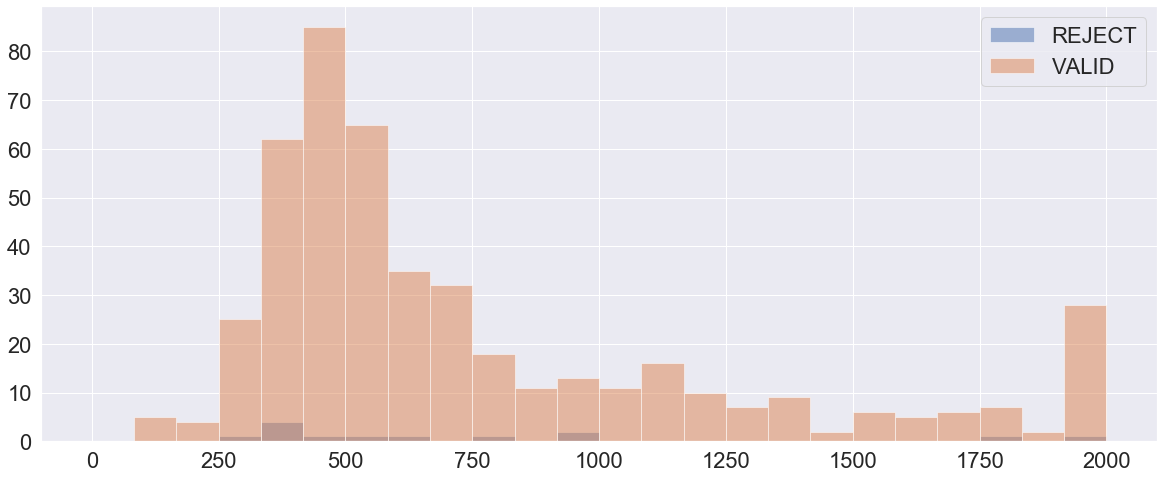

(' SHOULDER             ', ' REJCT ')
(' SHOULDER             ', ' VALID ')


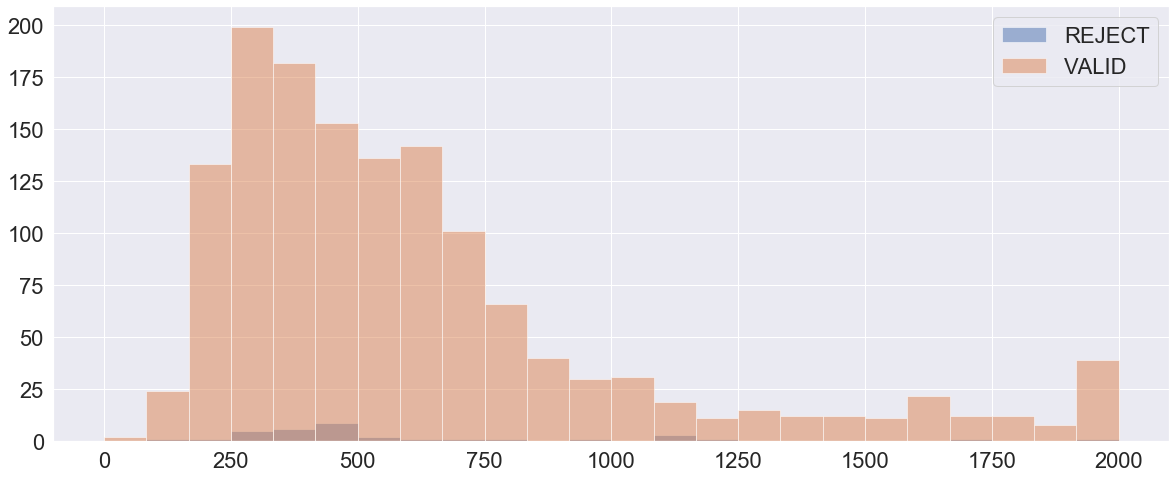

(' SKULL                ', ' REJCT ')
(' SKULL                ', ' VALID ')


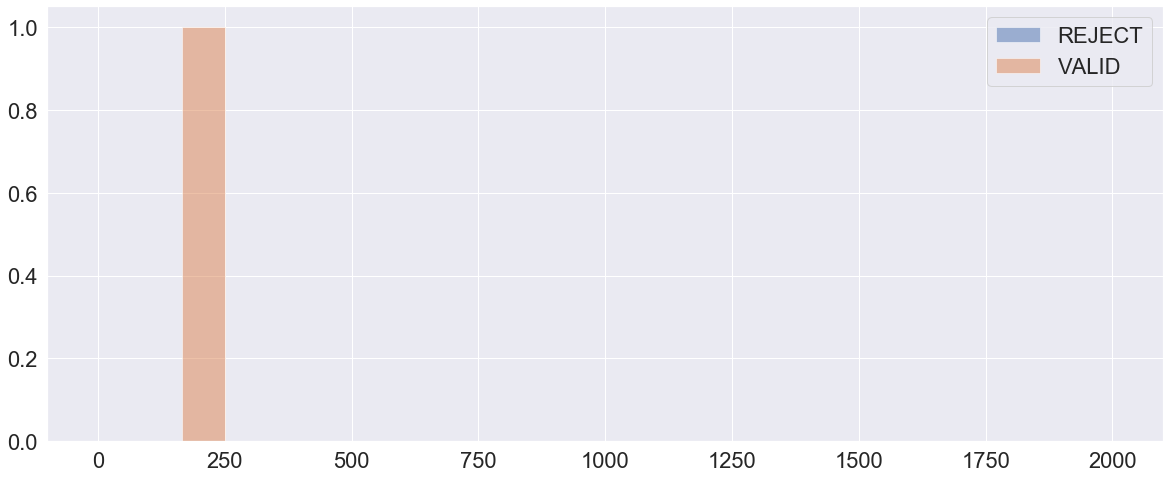

(' TSPINE               ', ' REJCT ')
(' TSPINE               ', ' VALID ')


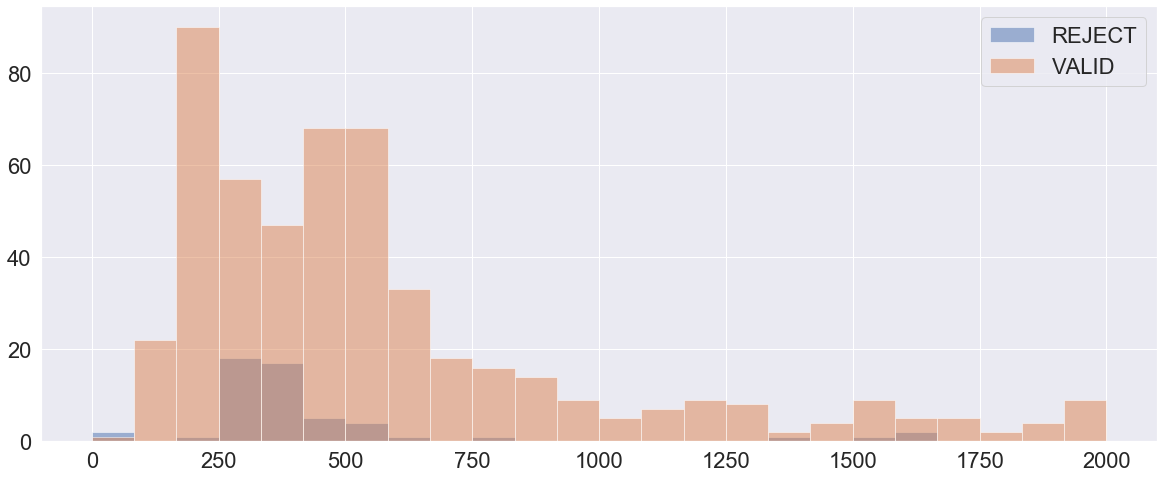

(' WRIST                ', ' REJCT ')
(' WRIST                ', ' VALID ')


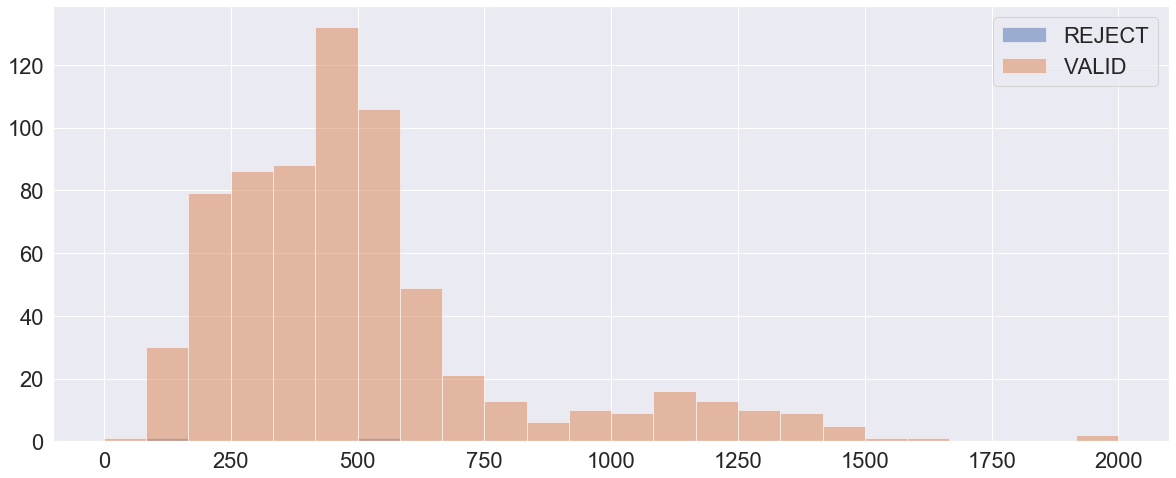

In [52]:
for i in range(0,34,2):
    bins = np.linspace(0, 2000, 25)
    print(group_anat_v_r.iloc[i].name)
    print(group_anat_v_r.iloc[i+1].name)
    plt.hist(group_anat_v_r.iloc[i]["EI"], bins, alpha=0.5, label='REJECT')
    plt.hist(group_anat_v_r.iloc[i+1]["EI"], bins, alpha=0.5, label='VALID')
    plt.legend(loc='upper right')
    plt.show()

In [53]:
for i in range(0,17,2):
    if i!=20 and i!=28:
        print(group_anat_v_r.iloc[i+1].name)
        valid_mean =np.array(group_anat_v_r.iloc[i+1]["EI"]).mean()
        reject_mean=np.array(group_anat_v_r.iloc[i]["EI"]).mean()
        print("Srednja vrednost EI prihvaćenih slika:", valid_mean)
        print(group_anat_v_r.iloc[i].name)
        print("Srednja vrednost EI odbačenih slika:", reject_mean)
        if valid_mean < reject_mean:
            print("Odbačene slike imaju veći EI u proseku")
        print(" ")

('                      ', ' VALID ')
Srednja vrednost EI prihvaćenih slika: 334.1560314098993
('                      ', ' REJCT ')
Srednja vrednost EI odbačenih slika: 445.15843993028005
Odbačene slike imaju veći EI u proseku
 
(' ANKLE                ', ' VALID ')
Srednja vrednost EI prihvaćenih slika: 396.89576225832474
(' ANKLE                ', ' REJCT ')
Srednja vrednost EI odbačenih slika: 255.20488023757966
 
(' ARM                  ', ' VALID ')
Srednja vrednost EI prihvaćenih slika: 1155.4431994756058
(' ARM                  ', ' REJCT ')
Srednja vrednost EI odbačenih slika: 946.2209111168271
 
(' CHEST                ', ' VALID ')
Srednja vrednost EI prihvaćenih slika: 392.91523330065667
(' CHEST                ', ' REJCT ')
Srednja vrednost EI odbačenih slika: 206.0105403264363
 
(' CSPINE               ', ' VALID ')
Srednja vrednost EI prihvaćenih slika: 485.0751891070642
(' CSPINE               ', ' REJCT ')
Srednja vrednost EI odbačenih slika: 476.3315271586178
 
(' ELB

# kVp i mAs deskriptivna statistika

In [54]:
mAs=np.array(data["mAs"])
kVp=np.array(data["kVp"])

In [55]:
mAs.mean()

24.900925390399074

In [56]:
kVp.mean()

65.37883169462117

In [57]:
print("[", mAs.min(),",", mAs.max(), "]")

[ 0.56 , 320.0 ]


In [58]:
print("[", kVp.min(),",", kVp.max(), "]")

[ 40 , 120 ]


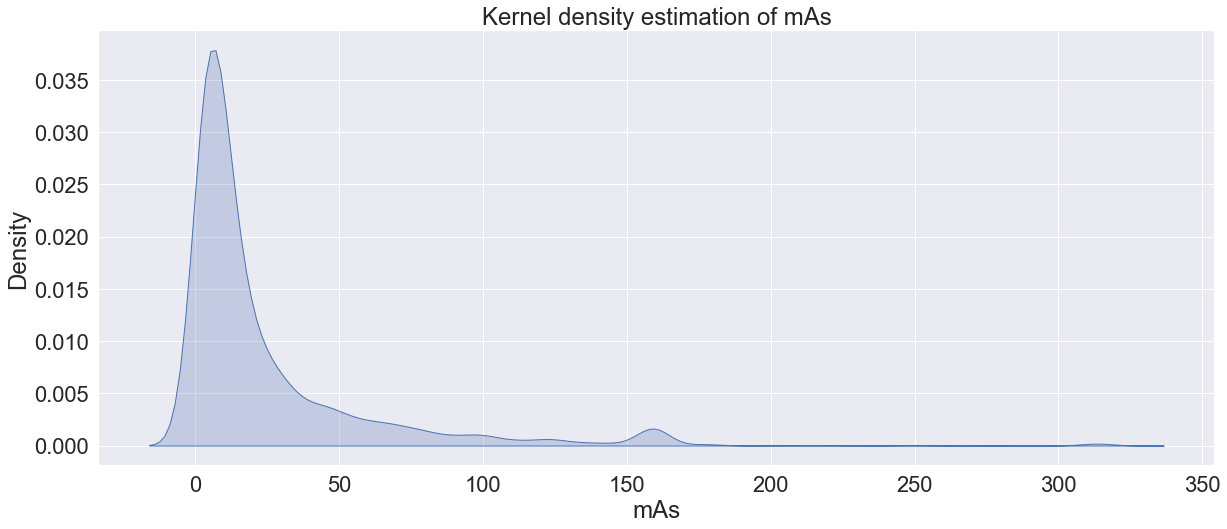

In [59]:
plt.title('Kernel density estimation of mAs')
sns.kdeplot(data['mAs'], fill=True)
plt.show()

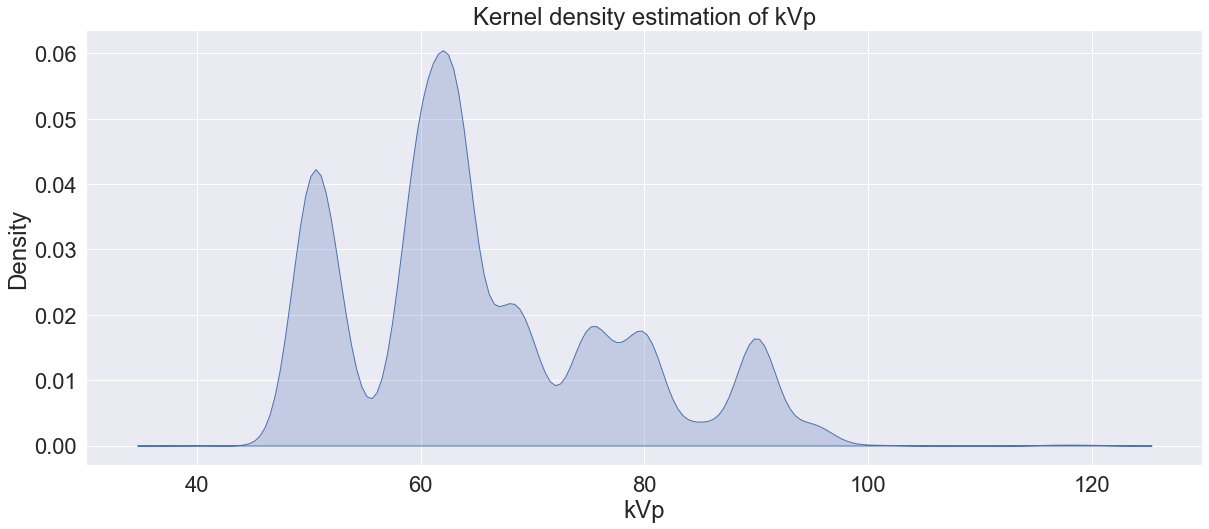

In [60]:
plt.title('Kernel density estimation of kVp')
sns.kdeplot(data['kVp'], fill=True)
plt.show()

In [61]:
Q1=data["mAs"].quantile(0.25)
Q3=data["mAs"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

4.21
27.5
23.29
-30.725 62.435


In [62]:
Q1=data["kVp"].quantile(0.25)
Q3=data["kVp"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

60.0
75.0
15.0
37.5 97.5


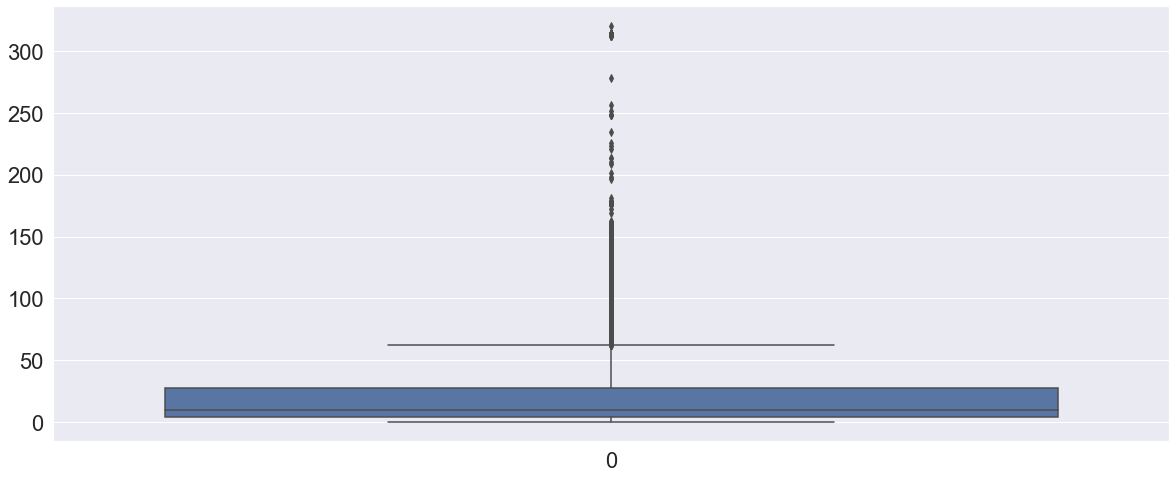

In [63]:
sns.boxplot(data["mAs"])
plt.show()

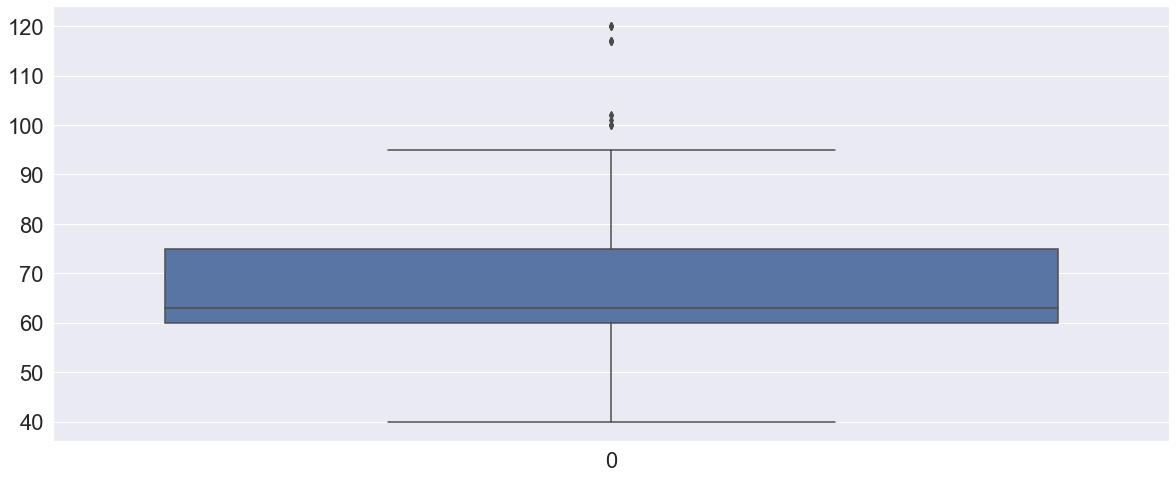

In [64]:
sns.boxplot(data["kVp"])
plt.show()

# Statistički testovi

In [65]:
from scipy.stats import ttest_ind
import statistics 
from scipy import stats as st
import math

In [66]:
for i in range(0,34,2):
    if i!=20 and i!=28:
        print(group_anat_v_r.iloc[i].name)
        print(group_anat_v_r.iloc[i+1].name)
        niz_reject=np.array(group_anat_v_r.iloc[i]["EI"])
        niz_valid=np.array(group_anat_v_r.iloc[i+1]["EI"])
        
        reject_mean=statistics.mean(niz_reject)
        valid_mean =statistics.mean(niz_valid)
        
        reject_st_deviation=statistics.stdev(niz_reject)
        valid_st_deviation=statistics.stdev(niz_valid)
        
        #The standardized mean difference:
        zbir_kvadrata = math.pow(reject_st_deviation,2)+math.pow(valid_st_deviation,2)
        apsolutna = abs(reject_mean-valid_mean)
        SMD = apsolutna/(math.sqrt(zbir_kvadrata)/2)
        print("The standardized mean difference:",SMD)
        #SMD = np.abs(reject_mean-valid_mean)/np.sqrt((np.power(reject_st_deviation,2) + np.power(valid_st_deviation,2)/2)


('                      ', ' REJCT ')
('                      ', ' VALID ')
The standardized mean difference: 0.46970197401203917
(' ANKLE                ', ' REJCT ')
(' ANKLE                ', ' VALID ')
The standardized mean difference: 0.8402607565865066
(' ARM                  ', ' REJCT ')
(' ARM                  ', ' VALID ')
The standardized mean difference: 0.42839994874730936
(' CHEST                ', ' REJCT ')
(' CHEST                ', ' VALID ')
The standardized mean difference: 1.2340388930838506
(' CSPINE               ', ' REJCT ')
(' CSPINE               ', ' VALID ')
The standardized mean difference: 0.030763742207869288
(' ELBOW                ', ' REJCT ')
(' ELBOW                ', ' VALID ')
The standardized mean difference: 0.8474923139197763
(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')
The standardized mean difference: 0.068034338621
(' HAND                 ', ' REJCT ')
(' HAND                 ', ' VALID ')
The standardized mean

In [67]:
from statsmodels.stats.weightstats import ztest as ztest

In [68]:
#Z test:
for i in range(0,34,2):
    if i!=20 and i!=28:
        print(group_anat_v_r.iloc[i].name)
        print(group_anat_v_r.iloc[i+1].name)
        niz_reject=np.array(group_anat_v_r.iloc[i]["EI"])
        niz_valid=np.array(group_anat_v_r.iloc[i+1]["EI"])
        
        Z=ztest(niz_reject, niz_valid, value=0) 
        print("The result of Z test:",Z, "(the first value is test statistic and the second is p-value)")
        print(" ")

('                      ', ' REJCT ')
('                      ', ' VALID ')
The result of Z test: (1.3429891500888154, 0.1792754871196537) (the first value is test statistic and the second is p-value)
 
(' ANKLE                ', ' REJCT ')
(' ANKLE                ', ' VALID ')
The result of Z test: (-1.347658812985604, 0.17776814493131332) (the first value is test statistic and the second is p-value)
 
(' ARM                  ', ' REJCT ')
(' ARM                  ', ' VALID ')
The result of Z test: (-0.8428412034469935, 0.39931726051406025) (the first value is test statistic and the second is p-value)
 
(' CHEST                ', ' REJCT ')
(' CHEST                ', ' VALID ')
The result of Z test: (-1.079908047969275, 0.28018312909344467) (the first value is test statistic and the second is p-value)
 
(' CSPINE               ', ' REJCT ')
(' CSPINE               ', ' VALID ')
The result of Z test: (-0.10765422429538393, 0.9142699821202778) (the first value is test statistic and the 

# Kako se doza (EI) menja prema vremenu u toku dana(new_time)

In [69]:
data["time"]

0        07:33:04
1        07:32:24
2        08:41:26
3        08:40:50
4        09:18:36
           ...   
13827    16:20:19
13828    16:52:37
13829    16:52:06
13830    16:51:22
13831    16:50:56
Name: time, Length: 13832, dtype: object

In [70]:
import matplotlib.dates

C:\Users\Nevena\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


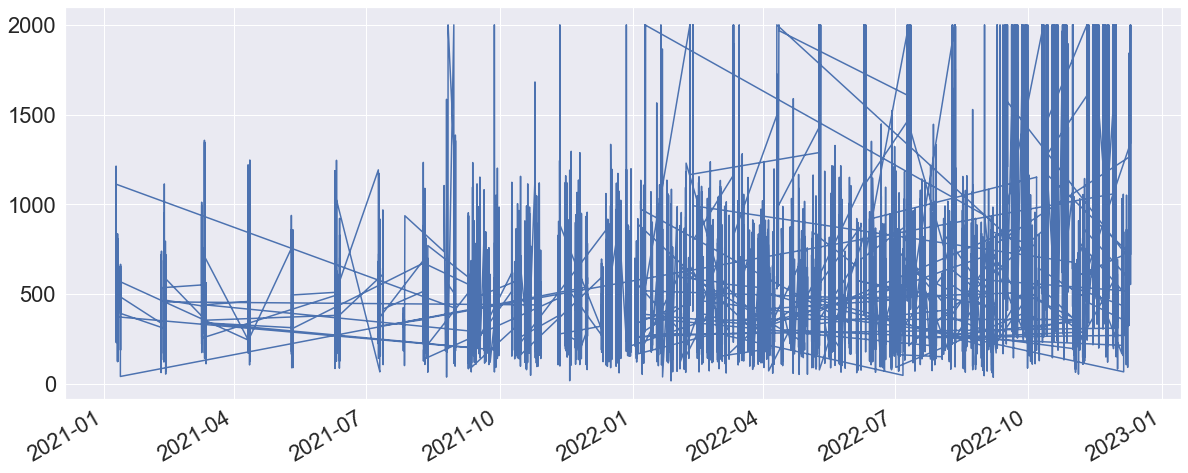

In [71]:
x = data["date_time2"]
y = data["EI"]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [72]:
data["sat"]=[d.hour for d in data['date_time2']]

In [73]:
group_by_hour=data.groupby('sat').agg(list)

In [74]:
group_by_hour["EI"]

sat
7     [2000.0, 2000.0, 571.990966796875, 281.0880661...
8     [1011.0696792602499, 1839.7354125976601, 103.0...
9     [1553.13520431519, 2000.0, 930.625438690186, 9...
10    [1532.52334594727, 1715.9694671630898, 650.627...
11    [1291.83969497681, 446.475744247437, 1246.6495...
12    [1379.1912078857401, 1263.23671340942, 632.511...
13    [211.515736579895, 325.757431983948, 211.22236...
14    [425.234222412109, 184.09129381179798, 388.841...
15    [936.703968048096, 145.603704452515, 341.02568...
16    [183.581757545471, 190.71772098541302, 190.674...
17    [736.64698600769, 950.691699981689, 1104.81395...
18    [366.208934783936, 535.549306869507, 626.29871...
Name: EI, dtype: object

In [75]:
srednje_vrednosti_EI_po_satu=[]
for i in range(len(group_by_hour)):
    niz_vrednosti_EI=np.array(group_by_hour.iloc[i]["EI"])
    #print(group_by_hour.name)
    srednja_vrednost=niz_vrednosti_EI.mean()
    #print(srednja_vrednost)
    srednje_vrednosti_EI_po_satu.append(srednja_vrednost)

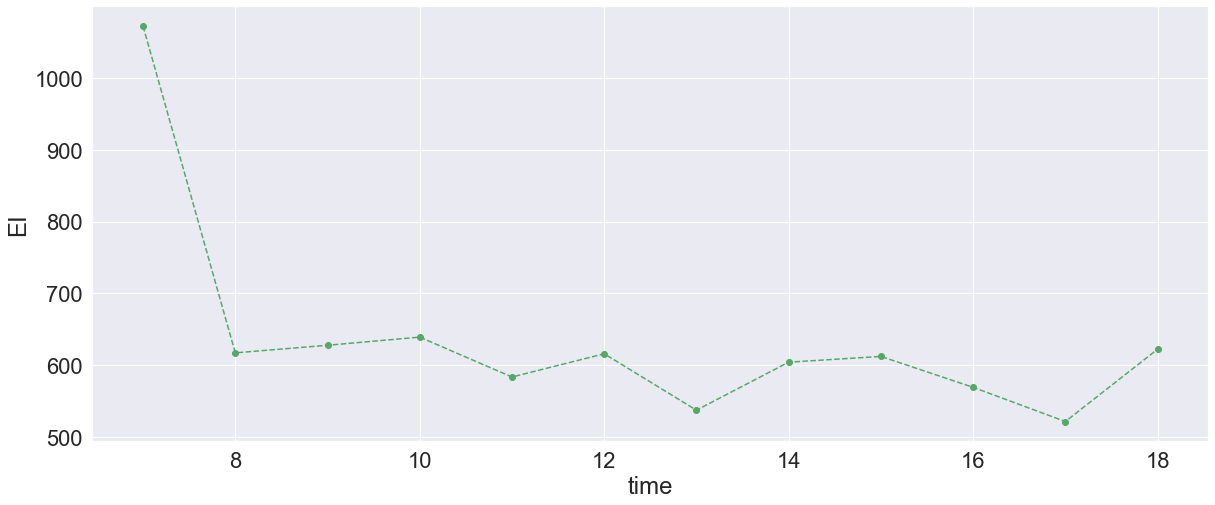

In [76]:
x=srednje_vrednosti_EI_po_satu
y=[7,8,9,10,11,12,13,14,15,16,17,18]
plt.xlabel("time")
plt.ylabel("EI")
plt.plot(y,x,"go--")
plt.show()

In [77]:
group_time=data.groupby('time').agg(list)

In [78]:
group_time

date_time1             date_time2 VALID/REJECT  \
time                                                                        
07:32:24  [2022/11/30-07:34:18.4969 ]  [2022-11-30 07:32:24]    [ VALID ]   
07:33:04  [2022/11/30-07:34:18.4519 ]  [2022-11-30 07:33:04]    [ VALID ]   
07:52:51  [2022/02/03-07:52:55.3869 ]  [2022-03-02 07:52:51]    [ VALID ]   
07:55:30  [2021/12/10-07:56:45.0582 ]  [2021-10-12 07:55:30]    [ VALID ]   
07:56:18  [2022/11/23-07:57:23.4869 ]  [2022-11-23 07:56:18]    [ REJCT ]   
...                               ...                    ...          ...   
18:19:47  [2022/01/13-18:20:13.2916 ]  [2022-01-13 18:19:47]    [ VALID ]   
18:20:19  [2022/01/20-18:22:08.2827 ]  [2022-01-20 18:20:19]    [ VALID ]   
18:25:56  [2021/10/21-18:26:33.5949 ]  [2021-10-21 18:25:56]    [ VALID ]   
18:41:52  [2022/11/04-18:43:38.6702 ]  [2022-04-11 18:41:52]    [ VALID ]   
18:43:12  [2022/11/04-18:43:38.5905 ]  [2022-04-11 18:43:12]    [ VALID ]   

                               operator         patient_num  \
time                                                          
07:32:24  [ Operator                  ]             [54278]   
07:33:04  [ Operator                  ]             [54278]   
07:52:51  [ Operator                  ]             [28910]   
07:55:30  [ Operator                  ]  [ 8391           ]   
07:56:18  [ Operator                  ]  [ 61057          ]   
...                                 ...                 ...   
18:19:47  [ Operator                  ]  [ 41624          ]   
18:20:19  [ Operator                  ]  [ 18335          ]   
18:25:56  [ Operator                  ]  [ 77259          ]   
18:41:52  [ Operator                  ]  [ 75133          ]   
18:43:12  [ Operator                  ]  [ 75133          ]   

                           patient_num2                  anatomy1  \
time                                                                
07:32:24  [                           ]  [ FOOT                 ]   
07:33:04  [                           ]  [ FOOT                 ]   
07:52:51  [ Testpatient^Test          ]  [ HAND                 ]   
07:55:30  [ Egger^Karoline            ]  [ LSPINE               ]   
07:56:18  [                           ]  [ HAND                 ]   
...                                 ...                       ...   
18:19:47  [ Gebhart^Florian           ]  [ ELBOW                ]   
18:20:19  [ König^Tanja               ]  [ ANKLE                ]   
18:25:56  [ Mamatova^Margarita        ]  [ LSPINE               ]   
18:41:52  [                           ]  [ FOOT                 ]   
18:43:12  [                           ]  [ FOOT                 ]   

                                        anatomy_AP/LAT   kVp        mA  ...  \
time                                                                    ...   
07:32:24  [ Fuss-AP                                  ]  [63]   [201.5]  ...   
07:33:04  [ Fuss-LAT                                 ]  [63]   [200.5]  ...   
07:52:51  [ Hand-PA                                  ]  [50]  [208.12]  ...   
07:55:30  [ L_Spine-AP                               ]  [80]  [354.44]  ...   
07:56:18  [ Hand-PA                                  ]  [50]  [203.12]  ...   
...                                                ...   ...       ...  ...   
18:19:47  [ Ellenbogen-AP                            ]  [58]   [215.2]  ...   
18:20:19  [ OSG-LAT                                  ]  [52]  [218.75]  ...   
18:25:56  [ L_Spine-AP                               ]  [65]  [363.57]  ...   
18:41:52  [ Fuss-AP                                  ]  [63]   [202.5]  ...   
18:43:12  [ Fuss-LAT                                 ]  [63]   [202.0]  ...   

                   22   IN/OUT       24       VisionU         26           27  \
time                                                                            
07:32:24  [         ]  [ OUT ]    [   ]  [ Vision U ]      [8.1]      [27.71]   
07:33:04  [         ]  [ OUT ]    [ 

In [79]:
visoke_doze=[]
vremena_viskih_doza=[]
srednje_vrednosti_EI_po_momentu=[]

for i in range(len(group_time)):
    niz_vrednosti_EI=np.array(group_time.iloc[i]["EI"])
    srednja_vrednost=niz_vrednosti_EI.mean()
    #print(srednja_vrednost)
    srednje_vrednosti_EI_po_momentu.append(srednja_vrednost)
    if srednja_vrednost>1500:
        visoke_doze.append(srednja_vrednost)
        vremena_viskih_doza.append(group_time.iloc[i].name)

In [80]:
vremena=[]
for i in range(len(group_time)):
    vremena.append(group_time.iloc[i].name)
    

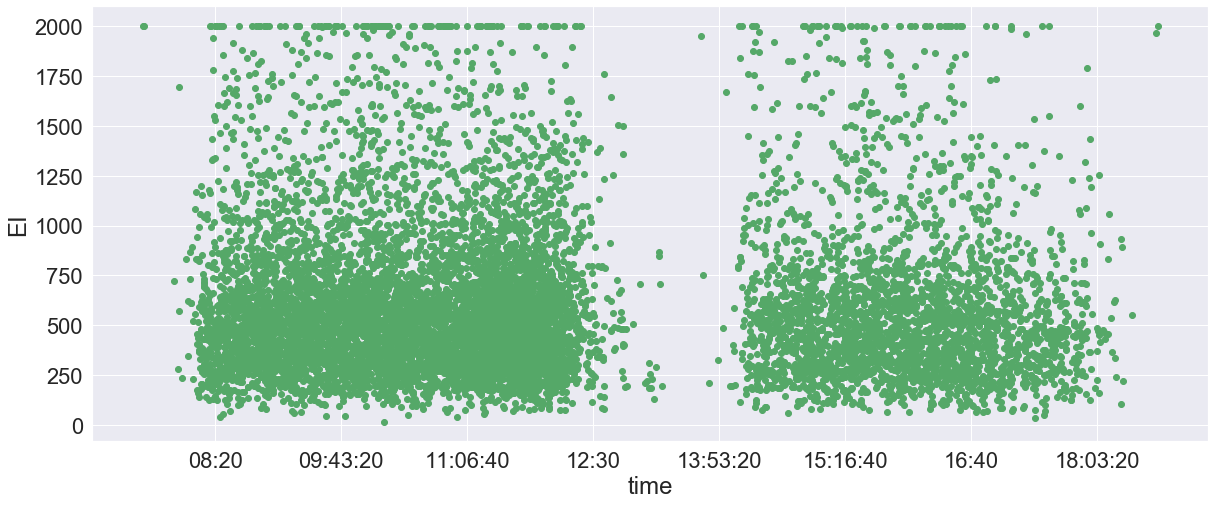

In [81]:
plt.scatter(vremena,srednje_vrednosti_EI_po_momentu,color='g') 
plt.ylabel("EI")
plt.show()

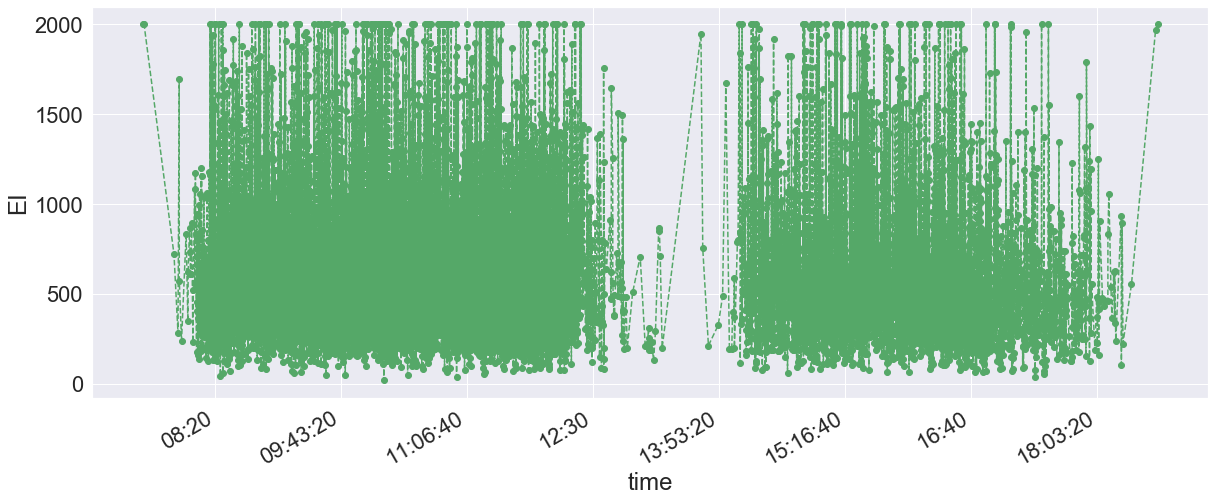

In [82]:
#x=srednje_vrednosti_EI_po_momentu
#plt.figure(figsize=(60, 30), dpi=50)
plt.plot(vremena,srednje_vrednosti_EI_po_momentu,'go--')
plt.gcf().autofmt_xdate()
plt.ylabel("EI")
plt.show()

In [83]:
a= data["EI"][data["sat"] == 18]
print(a)
print(len(a))

335       366.208935
336       535.549307
1867      626.298714
1868      619.066381
1869      554.061747
2121      159.574628
2122      484.481096
3291      430.535221
3292      476.301813
4265      934.955215
4266      894.405651
4458      238.441515
4459      337.796450
4460      223.035455
4461      105.395603
4665      224.387932
4666      184.766006
7198      373.169374
7199      417.578888
9561      457.334900
11673     470.468950
12250     462.700415
12251     451.477289
12921    1058.170986
12922     834.015369
12929    2000.000000
12930    1968.106461
13177     906.289959
13178    1252.904320
Name: EI, dtype: float64
29


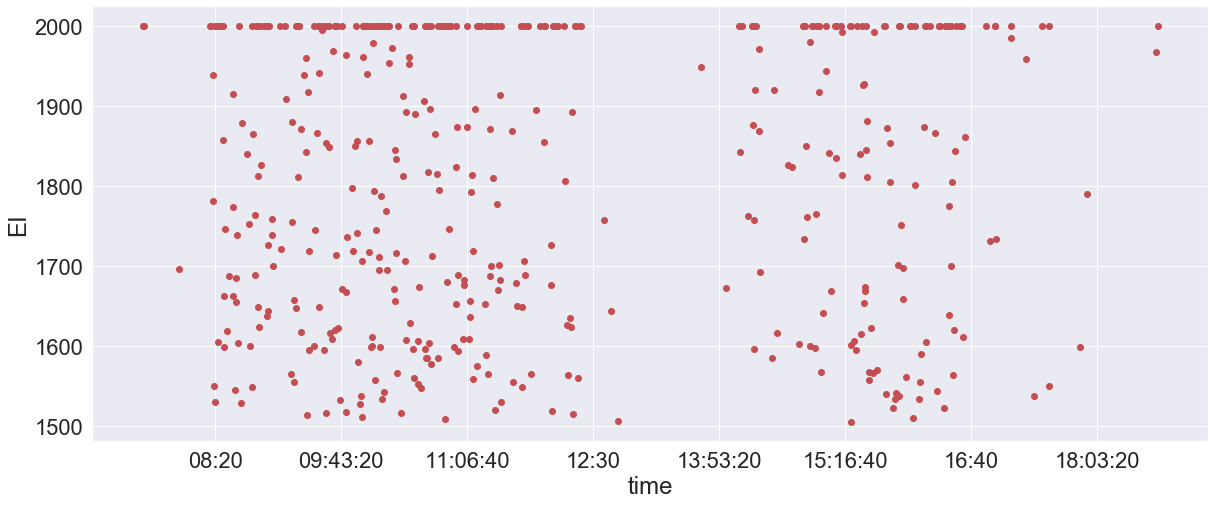

In [84]:
plt.scatter(vremena_viskih_doza,visoke_doze,color="r") 
plt.ylabel("EI")
plt.show()

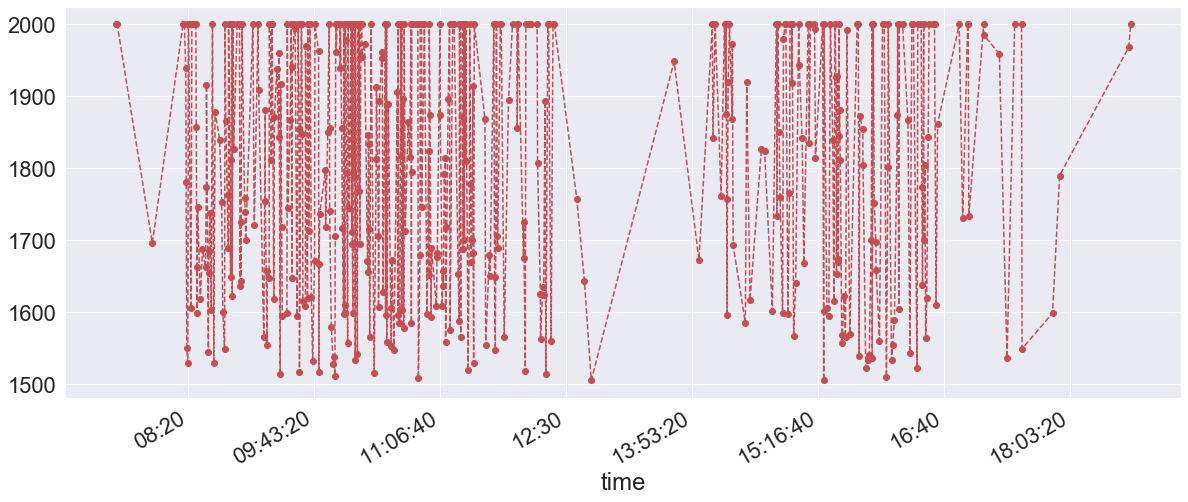

In [85]:
plt.plot(vremena_viskih_doza,visoke_doze,'ro--')
plt.gcf().autofmt_xdate()

plt.show()

In [86]:
len(vremena_viskih_doza)

459

In [87]:
len(vremena)

10362

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

C:\Users\Nevena\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Nevena\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [89]:
vrm=[]
#mapping time to integers:
for i in range(len(vremena)):
    print(vremena[i])
    integer= vremena[i].hour*10000 + vremena[i].minute*100 + vremena[i].second*1
    print(integer)
    vrm.append(integer)

07:32:24
73224
07:33:04
73304
07:52:51
75251
07:55:30
75530
07:56:18
75618
07:56:22
75622
07:57:50
75750
08:00:53
80053
08:02:01
80201
08:02:14
80214
08:03:09
80309
08:03:27
80327
08:03:46
80346
08:03:56
80356
08:04:31
80431
08:05:23
80523
08:05:35
80535
08:06:30
80630
08:06:39
80639
08:07:02
80702
08:07:08
80708
08:07:47
80747
08:07:56
80756
08:08:02
80802
08:08:18
80818
08:08:25
80825
08:08:34
80834
08:08:39
80839
08:08:50
80850
08:08:54
80854
08:08:59
80859
08:09:00
80900
08:09:08
80908
08:09:09
80909
08:09:13
80913
08:09:31
80931
08:09:33
80933
08:09:36
80936
08:09:48
80948
08:10:10
81010
08:10:16
81016
08:10:17
81017
08:10:28
81028
08:10:36
81036
08:10:39
81039
08:10:45
81045
08:10:48
81048
08:10:57
81057
08:11:02
81102
08:11:06
81106
08:11:07
81107
08:11:15
81115
08:11:19
81119
08:11:26
81126
08:11:31
81131
08:11:35
81135
08:11:36
81136
08:11:38
81138
08:11:39
81139
08:11:50
81150
08:12:16
81216
08:12:20
81220
08:12:22
81222
08:12:23
81223
08:12:28
81228
08:12:29
81229
08:12:30
8

In [90]:
v=np.array(vrm)
the_time=v.reshape(-1, 1)
smm=np.array(srednje_vrednosti_EI_po_momentu)
EI_mean_by_moment=smm.reshape(-1, 1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(the_time, EI_mean_by_moment , test_size=0.2, random_state=0) 
model = LinearRegression().fit(X_train,y_train)
r_sq = model.score(X_train,y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.0022974360271222904


In [92]:
y_pred = model.predict(X_test)

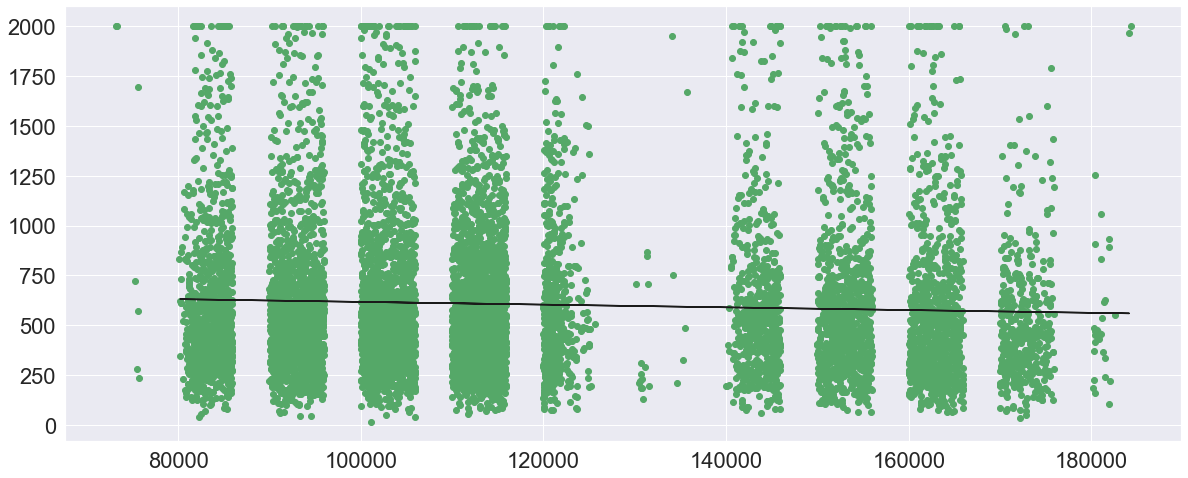

In [93]:
plt.scatter(the_time, EI_mean_by_moment,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()

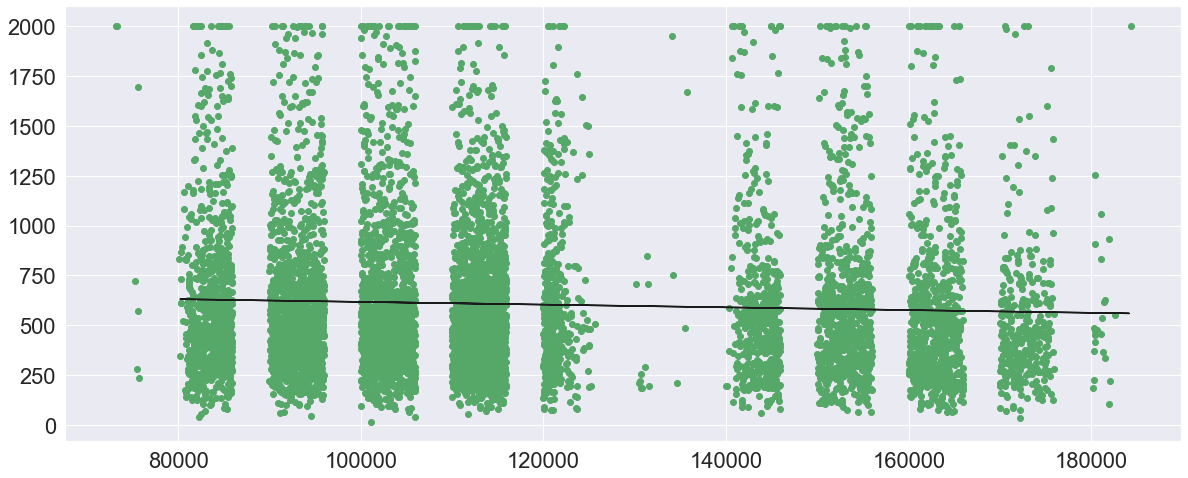

In [94]:
plt.scatter(X_train, y_train,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()

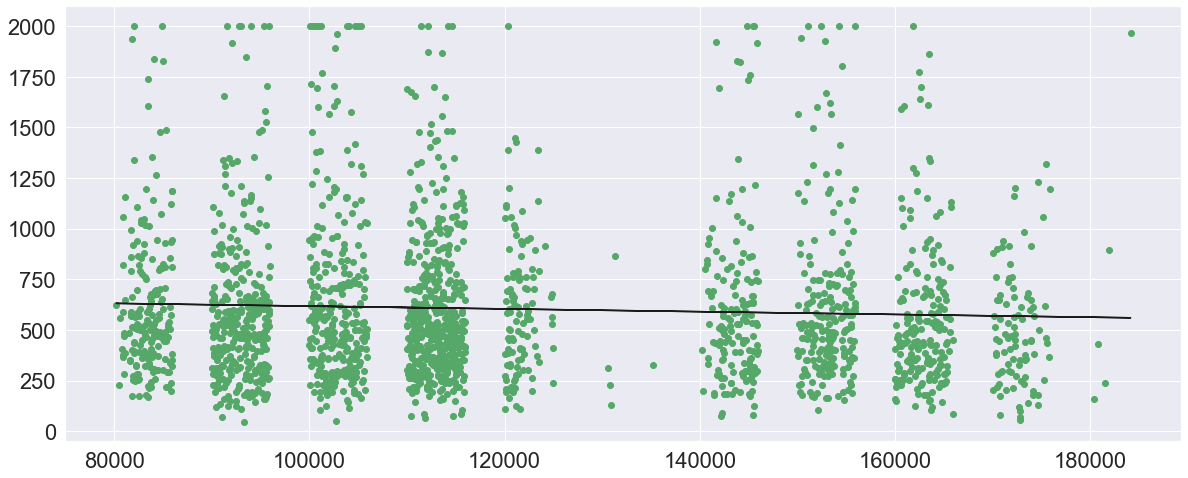

In [95]:
plt.scatter(X_test, y_test,color='g') 
plt.plot(X_test, y_pred,color='k') 
plt.show()

In [96]:
#drugačije mapiranje vremena. 
m=[]
for i in range(len(vremena)):
    m.append(i)
mm=np.array(m)
tm=mm.reshape(-1, 1)

In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(tm, EI_mean_by_moment , test_size=0.2, random_state=0) 
model2 = LinearRegression().fit(X_train2,y_train2)
r_sq2 = model2.score(X_train2,y_train2)
print(f"coefficient of determination: {r_sq2}")
y_pred2 = model2.predict(X_test2)

coefficient of determination: 0.0024511322594605867


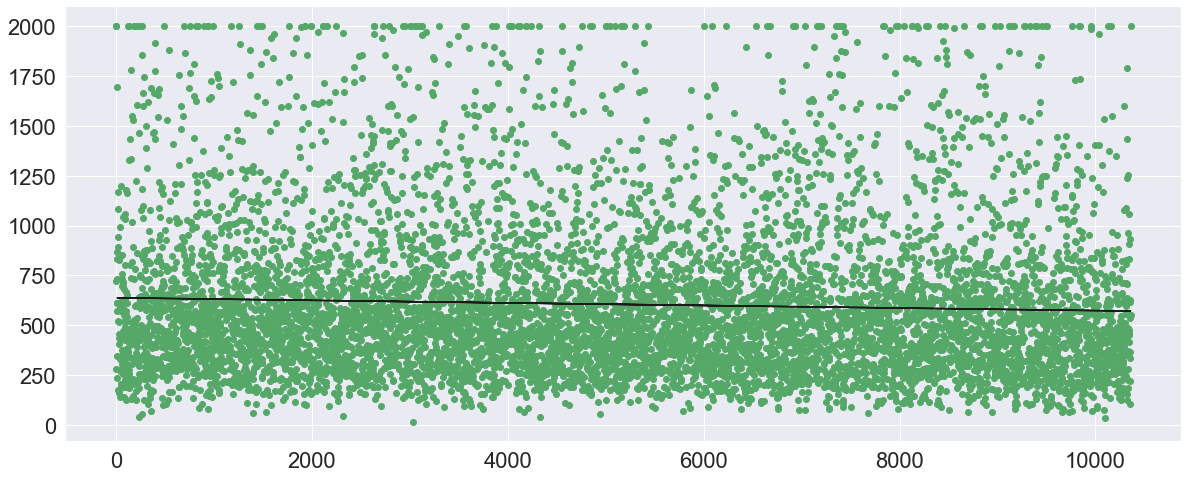

In [98]:
plt.scatter(X_train2, y_train2,color='g') 
plt.plot(X_test2, y_pred2,color='k') 
plt.show()

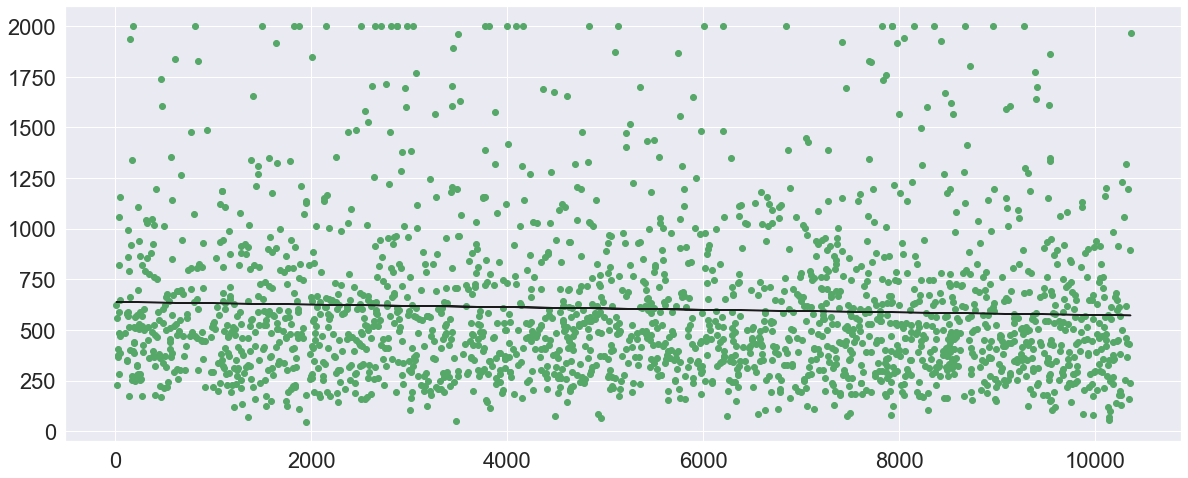

In [99]:
plt.scatter(X_test2, y_test2,color='g') 
plt.plot(X_test2, y_pred2,color='k') 
plt.show()

zaključak: razlika izmedju modela je minimalna

In [100]:
EI=np.array(data["EI"])

EI.min()

16.4859011769295

In [101]:
EI.max()

2000.0

Plotting correlation plot


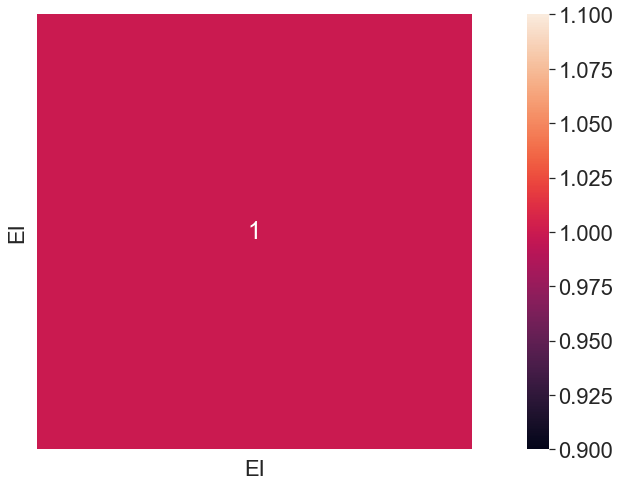

In [102]:
print('Plotting correlation plot')
sns.set_context(rc={"figure.figsize": (2, 2)})
corrmat = data[['EI','time']].corr()
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

In [103]:
data['mapirano_vreme'] = [d.hour*10000 + d.minute*100 + d.second*1 for d in data['date_time2']]

Plotting correlation plot


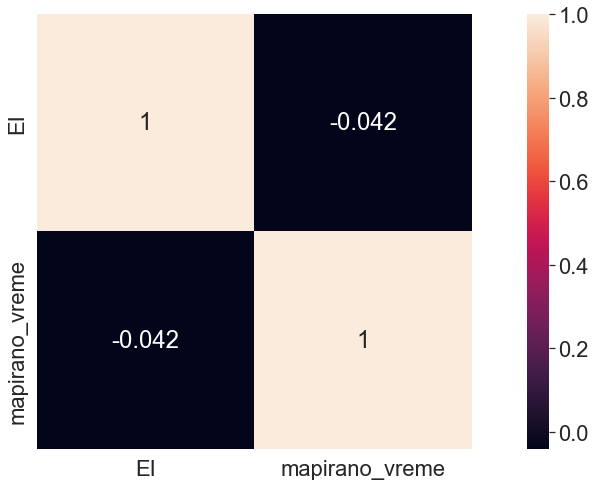

In [104]:
print('Plotting correlation plot')
sns.set_context(rc={"figure.figsize": (2, 2)})
corrmat = data[['EI','mapirano_vreme']].corr()
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

In [105]:
np.corrcoef(data['EI'],data['mapirano_vreme'])

array([[ 1.        , -0.04183596],
       [-0.04183596,  1.        ]])

# Deskripcija EI atributa (doze)

In [106]:
niz_EI=np.array(data["EI"])

In [107]:
np.median(niz_EI)

499.69563484191895

In [108]:
niz_EI.mean()

604.339268138448

In [109]:
print("[", niz_EI.min(),",", niz_EI.max(), "]")

[ 16.4859011769295 , 2000.0 ]


In [110]:
print(st.mode(niz_EI)) 
#ovo je bilo glupo racunati jer vrednosti svih osim 2000 koji je max nisu dati kao celi broj. Vredi racunati samo sa zaokruzenim vrednostima, a tad se gubi svrha

ModeResult(mode=array([2000.]), count=array([294]))


In [111]:
#kvarntili za EI: tj. kvantili 
print(np.quantile(niz_EI, 0.25))
print(np.quantile(niz_EI, 0.5))
print(np.quantile(niz_EI, 0.75))
print(np.quantile(niz_EI, 1))

314.8173928260805
499.69563484191895
718.7985777854923
2000.0


In [112]:
718.7985777854923-314.8173928260805 #IQR

403.9811849594118

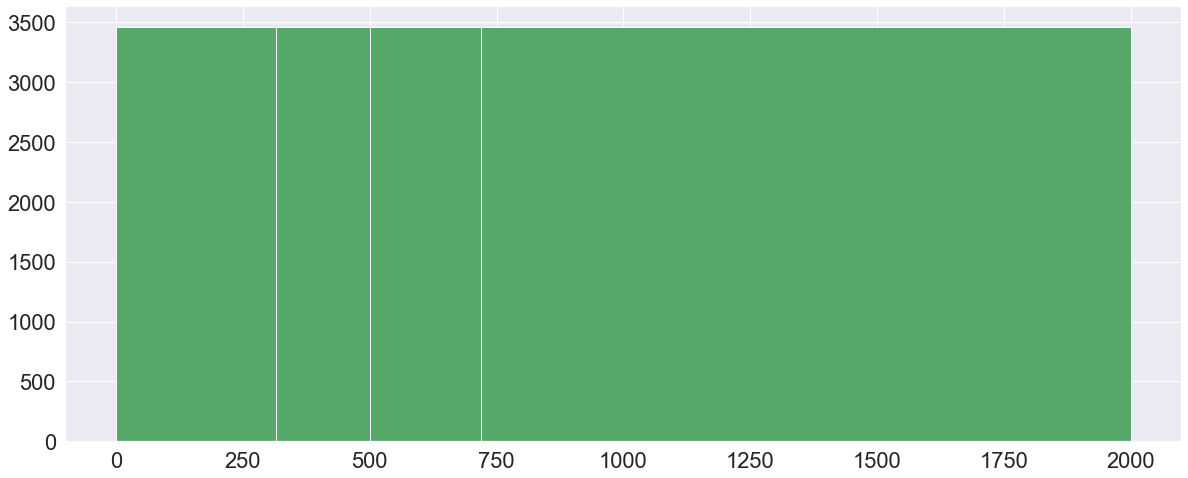

In [113]:
plt.hist(niz_EI, bins=[0, 314.8173928260805, 499.69563484191895, 718.7985777854923,2000.0], facecolor='g', alpha=1)
plt.show()

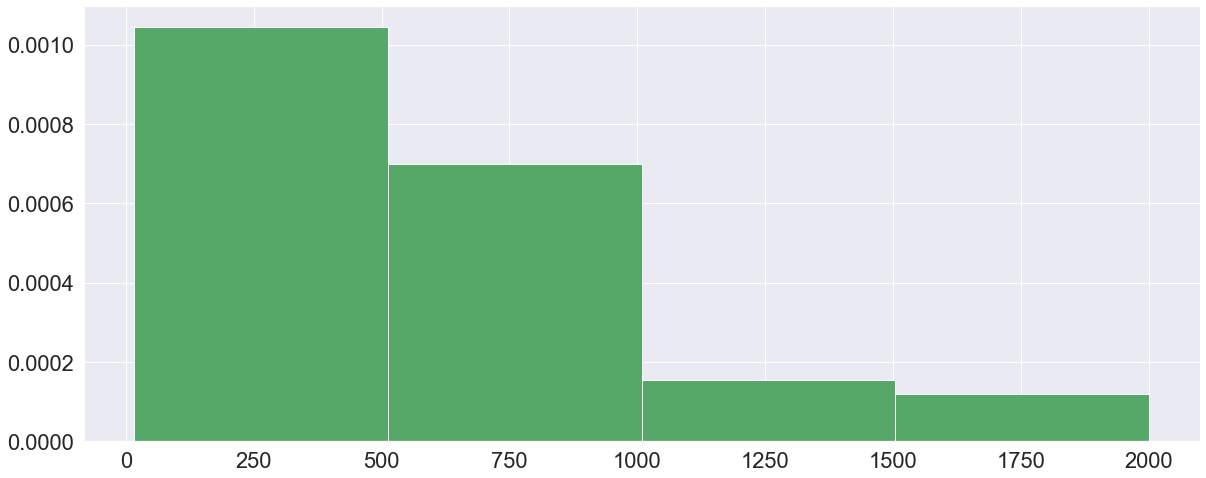

In [114]:
plt.hist(niz_EI, 4, density=1, facecolor='g', alpha=1)
plt.show()

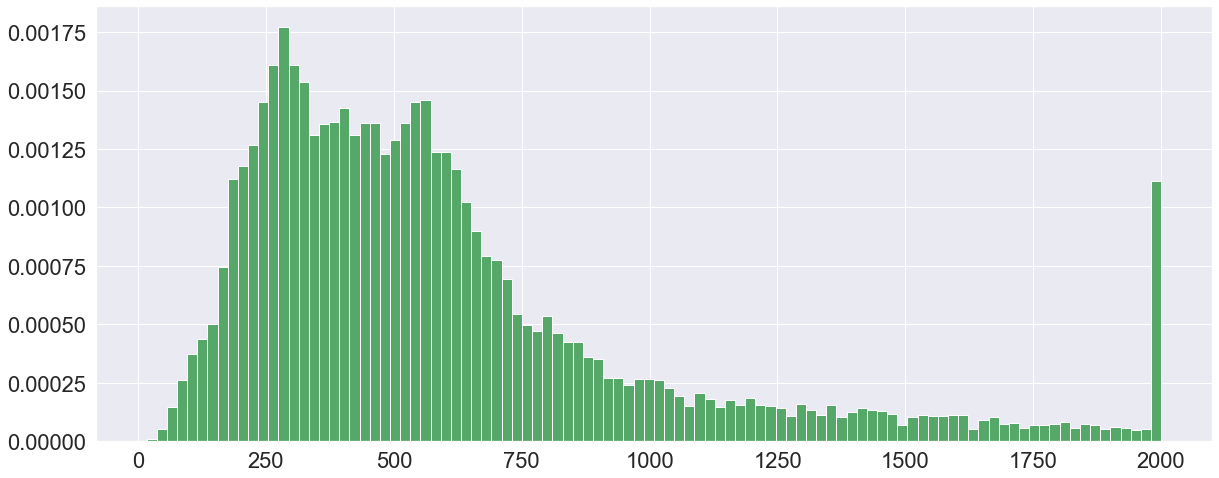

In [115]:
plt.hist(niz_EI, 100, density=1, facecolor='g', alpha=1)
plt.show()

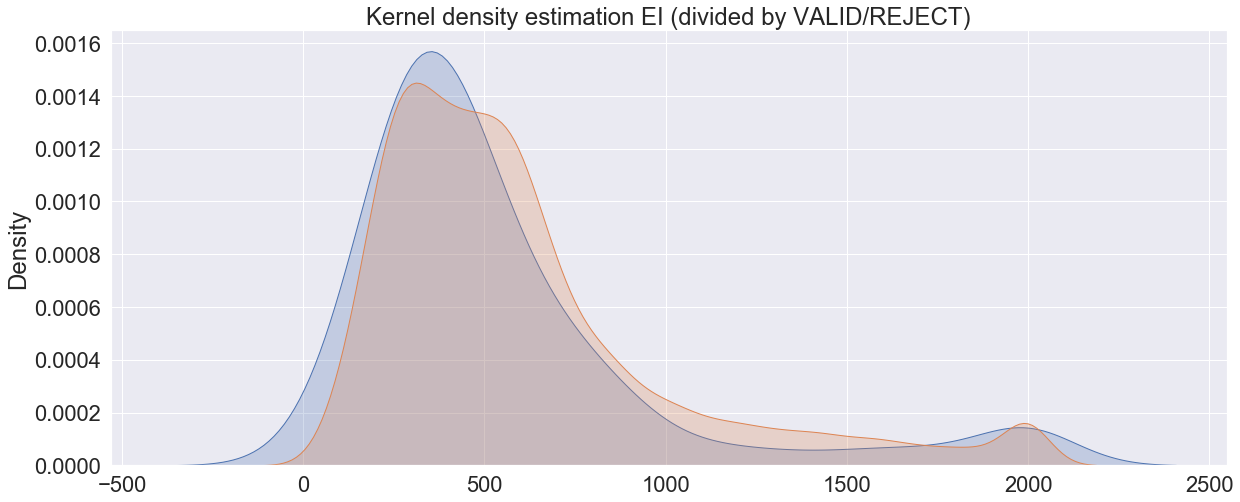

In [116]:
plt.title('Kernel density estimation EI (divided by VALID/REJECT)')
sns.kdeplot(group_v_r.iloc[0]["EI"], fill=True)
sns.kdeplot(group_v_r.iloc[1]["EI"], fill=True)
plt.show()

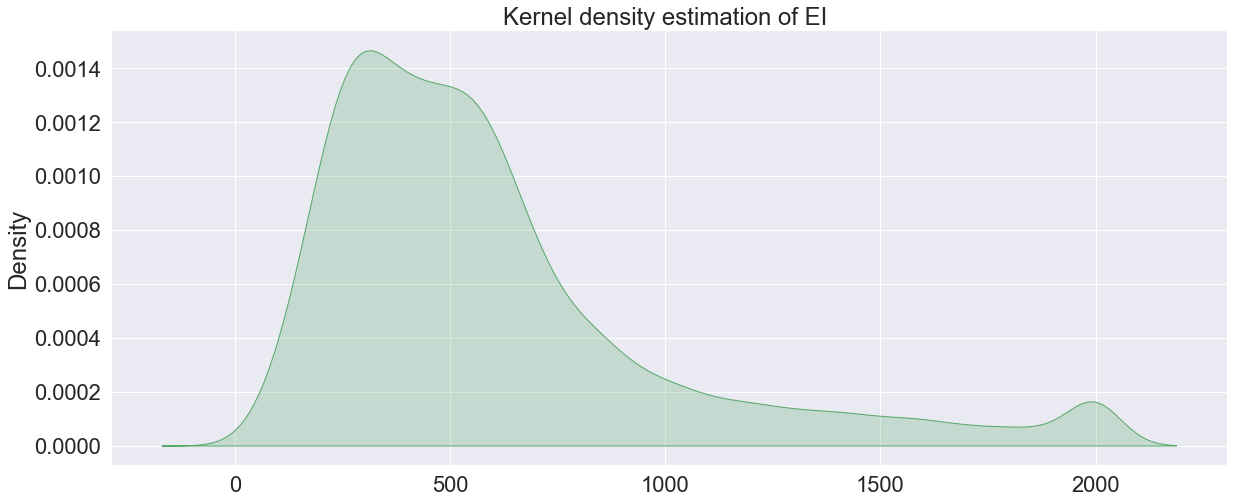

In [117]:
plt.title('Kernel density estimation of EI ')
sns.kdeplot(niz_EI, fill=True, color="g")
plt.show()

In [118]:
suma=0
for i in niz_EI:
    broj=i-niz_EI.mean()
    suma = suma + np.power(broj, 2)
disperzija= suma/len(niz_EI)
print(disperzija)

175654.69690621982


In [119]:
statistics.stdev(niz_EI)

419.12694613720095

In [120]:
#VALID
suma=0
mean=np.array(group_v_r.iloc[1]["EI"]).mean()
for i in group_v_r.iloc[1]["EI"]:
    broj=i-mean
    suma = suma + np.power(broj, 2)
disperzija= suma/len(group_v_r.iloc[1]["EI"])
print("VALID")
print(disperzija)

VALID
175057.88532850295


In [121]:
#Standardna devijacija za Valid EI
statistics.stdev(group_v_r.iloc[1]["EI"])

418.4147265447113

In [122]:
#REJECT
suma=0
mean=np.array(group_v_r.iloc[0]["EI"]).mean()
for i in group_v_r.iloc[0]["EI"]:
    broj=i-mean
    suma = suma + np.power(broj, 2)
disperzija= suma/len(group_v_r.iloc[0]["EI"])
print("REJECT")
print(disperzija)

REJECT
194814.2622669476


In [123]:
#Standardna devijacija za Rejected EI
statistics.stdev(group_v_r.iloc[0]["EI"])

441.9869038924531

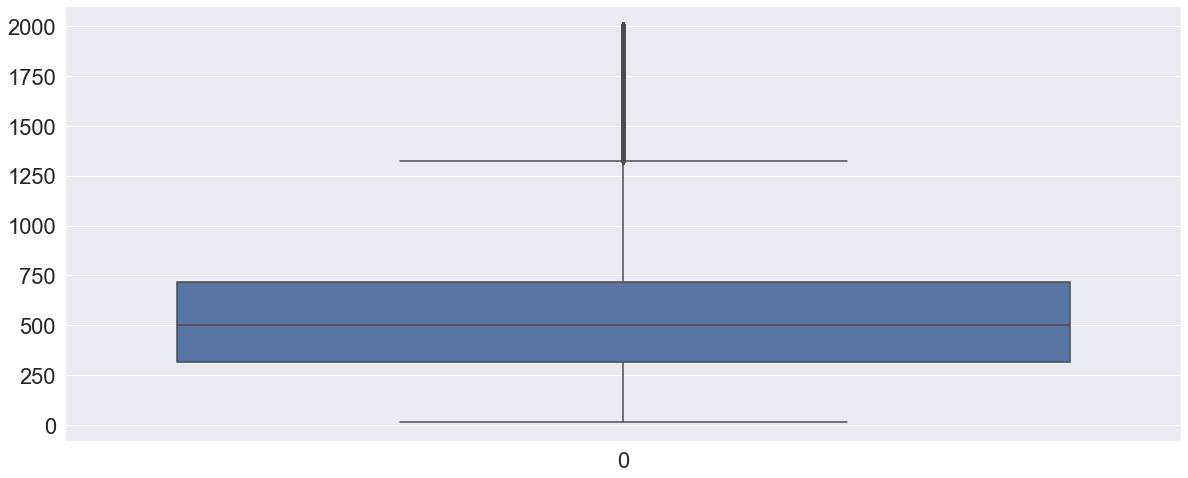

In [124]:
sns.boxplot(data["EI"])
plt.show()

# Statistički t-test

In [125]:
stats.ttest_ind(data['EI'][data['VALID/REJECT'] == ' VALID '],
                data['EI'][data['VALID/REJECT'] == ' REJCT '])

Ttest_indResult(statistic=2.484028826876062, pvalue=0.013002276686998165)

Since p-value is 0.013<0.05 we have sufficient evidence to reject the null hypothesis.

In [126]:
stats.ttest_ind(data['mAs'][data['VALID/REJECT'] == ' VALID '],
                data['mAs'][data['VALID/REJECT'] == ' REJCT '])

Ttest_indResult(statistic=-7.479199776608547, pvalue=7.927463597413456e-14)

Since p-value is 7.927>0.05 we don't have sufficient evidence to reject the null hypothesis(which is that both groups have the same mean for attribute "mAs")

In [127]:
stats.ttest_ind(data['kVp'][data['VALID/REJECT'] == ' VALID '],
                data['kVp'][data['VALID/REJECT'] == ' REJCT '])

Ttest_indResult(statistic=-14.93522743996825, pvalue=4.771448162905725e-50)

Since p-value is 4.77>0.05 we don't have sufficient evidence to reject the null hypothesis(which is that both groups have the same mean for attribute "kVp")

In [128]:
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    stat= stats.ttest_ind(data['kVp'][data['VALID/REJECT'] == ' VALID '][data['anatomy1'] == str(name)],
                          data['kVp'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)])
    print(name)
    print(stat)
    print("  ")

                      
Ttest_indResult(statistic=-0.5354312239408748, pvalue=0.5938009222701544)
  
 ANKLE                
Ttest_indResult(statistic=3.833058049466607, pvalue=0.00013303017667964495)
  
 ARM                  
Ttest_indResult(statistic=-6.387795523951101, pvalue=4.090530715996121e-07)
  
 CHEST                
Ttest_indResult(statistic=1.801634939335835, pvalue=0.07313187664149987)
  
 CSPINE               
Ttest_indResult(statistic=-0.42904451257547255, pvalue=0.6679870931676768)
  
 ELBOW                
Ttest_indResult(statistic=2.370938584930967, pvalue=0.018327613089686317)
  
 FOOT                 
Ttest_indResult(statistic=-3.038333626263643, pvalue=0.0024199443887128335)
  
 HAND                 
Ttest_indResult(statistic=-1.5338948258777516, pvalue=0.12537960488872044)
  
 HIP                  
Ttest_indResult(statistic=-0.5365727610917363, pvalue=0.5918441773048482)
  
 KNEE                 
Ttest_indResult(statistic=-0.11409143949413822, pvalue=0.9091742479022

In [129]:
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    stat= stats.ttest_ind(data['mAs'][data['VALID/REJECT'] == ' VALID '][data['anatomy1'] == str(name)],
                          data['mAs'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)])
    print(name)
    print(stat)
    print("  ")

                      
Ttest_indResult(statistic=1.8814413239790995, pvalue=0.0634605146659798)
  
 ANKLE                
Ttest_indResult(statistic=0.5640302030561086, pvalue=0.572837500004415)
  
 ARM                  
Ttest_indResult(statistic=-0.2981664659060817, pvalue=0.7675654908757372)
  
 CHEST                
Ttest_indResult(statistic=0.8551312265817028, pvalue=0.3935172920440362)
  
 CSPINE               
Ttest_indResult(statistic=0.7209042911399081, pvalue=0.47114391393318844)
  
 ELBOW                
Ttest_indResult(statistic=1.030357240110626, pvalue=0.30361086964082684)
  
 FOOT                 
Ttest_indResult(statistic=0.46866167790726426, pvalue=0.6393794917794029)
  
 HAND                 
Ttest_indResult(statistic=-1.5621181918678286, pvalue=0.11858431754550593)
  
 HIP                  
Ttest_indResult(statistic=0.19134368758786377, pvalue=0.8483479286803806)
  
 KNEE                 
Ttest_indResult(statistic=0.9869192911758653, pvalue=0.3237753999029107)
  
 LEG 

In [130]:
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    print(name)
    
    stat= stats.ttest_ind(data['EI'][data['VALID/REJECT'] == ' VALID '][data['anatomy1'] == str(name)],
                          data['EI'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)])
    print("T-test:",stat)
    print("  ")
    
    #if name!=' LEG                  ' and name!=' SKULL                ':
    if len(data['EI'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)])>30 and len(data['EI'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)])>30:
        Z=ztest(data['EI'][data['VALID/REJECT'] == ' VALID '][data['anatomy1'] == str(name)],
                        data['EI'][data['VALID/REJECT'] == ' REJCT '][data['anatomy1'] == str(name)], value=0) 
        print("Z-test:",Z, "(test statistic, p-value)")
        print(" ")
    
    

                      
T-test: Ttest_indResult(statistic=-1.3429891500888154, pvalue=0.18298099698981246)
  
Z-test: (-1.3429891500888154, 0.1792754871196537) (test statistic, p-value)
 
 ANKLE                
T-test: Ttest_indResult(statistic=1.347658812985604, pvalue=0.1780189638433711)
  
 ARM                  
T-test: Ttest_indResult(statistic=0.8428412034469935, pvalue=0.4057735375521486)
  
 CHEST                
T-test: Ttest_indResult(statistic=1.079908047969275, pvalue=0.28150346646329855)
  
 CSPINE               
T-test: Ttest_indResult(statistic=0.10765422429538393, pvalue=0.9142924763180287)
  
 ELBOW                
T-test: Ttest_indResult(statistic=0.9195014887919398, pvalue=0.35851737688910745)
  
 FOOT                 
T-test: Ttest_indResult(statistic=-0.22172148831828384, pvalue=0.8245608414508426)
  
 HAND                 
T-test: Ttest_indResult(statistic=-0.8611469522725997, pvalue=0.3893686167519005)
  
 HIP                  
T-test: Ttest_indResult(statistic=0.6

In [131]:
for n in range(len(lista_po_anatomiji)):
    print(lista_po_anatomiji.iloc[n].name)

                      
 ANKLE                
 ARM                  
 CHEST                
 CSPINE               
 ELBOW                
 FOOT                 
 HAND                 
 HIP                  
 KNEE                 
 LEG                  
 LSPINE               
 PELVIS               
 SHOULDER             
 SKULL                
 TSPINE               
 WRIST                


# Parametri zračenja na slikama sa najvećim dozama

In [132]:
visoke_dozeEI=[]
kVp_za_visok_EI=[]
mAs_za_visok_EI=[]
kVp_mali_EI=[]
mAs_mali_EI=[]
for i in range(len(data)):
    EI=data.iloc[i]["EI"]
    if EI>1600:
        visoke_dozeEI.append(EI)
        kVp_za_visok_EI.append(data.iloc[i]["kVp"])
        mAs_za_visok_EI.append(data.iloc[i]["mAs"])
    else:
        kVp_mali_EI.append(data.iloc[i]["kVp"])
        mAs_mali_EI.append(data.iloc[i]["mAs"])
#print(kVp_za_visok_EI)
#print(mAs_za_visok_EI)


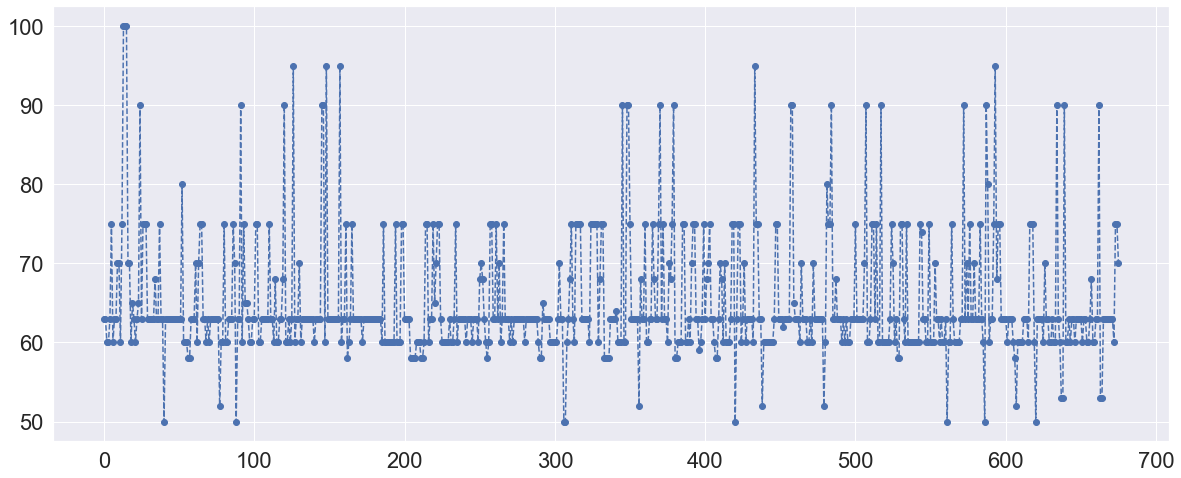

In [133]:
plt.plot(kVp_za_visok_EI,"bo--")
plt.show()

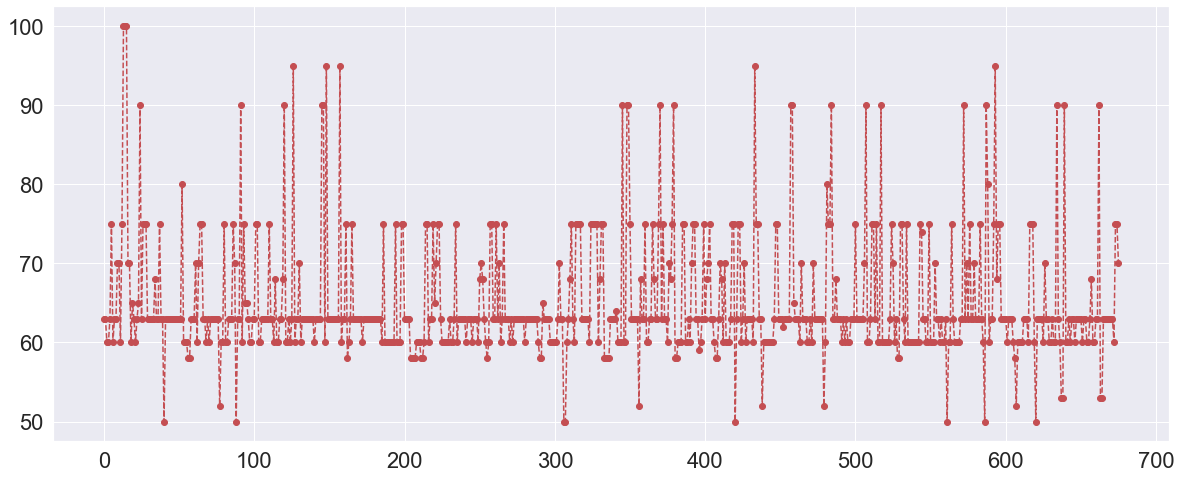

In [134]:
plt.plot(kVp_za_visok_EI,"ro--")
plt.show()

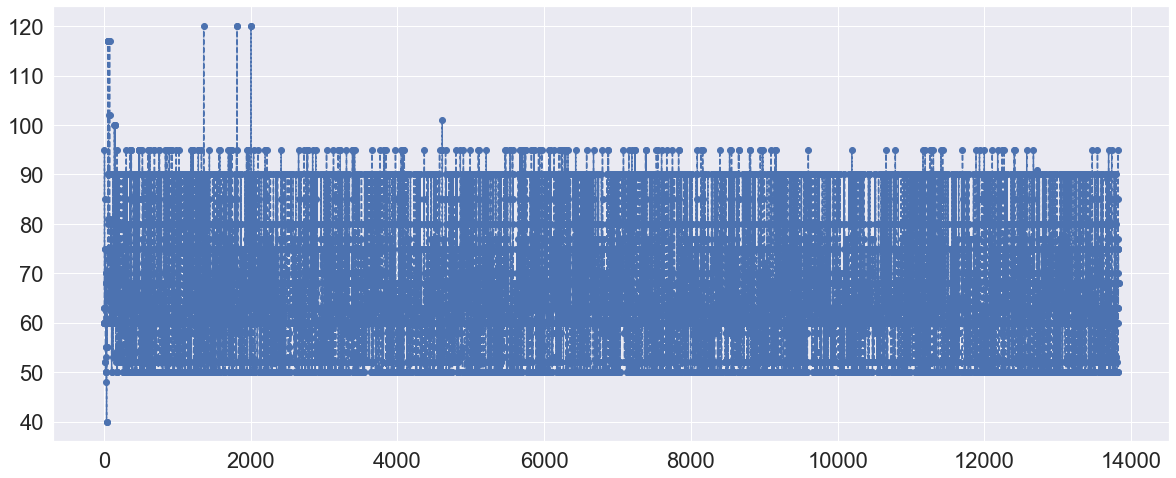

In [135]:
plt.plot(data["kVp"],"bo--")
plt.show()

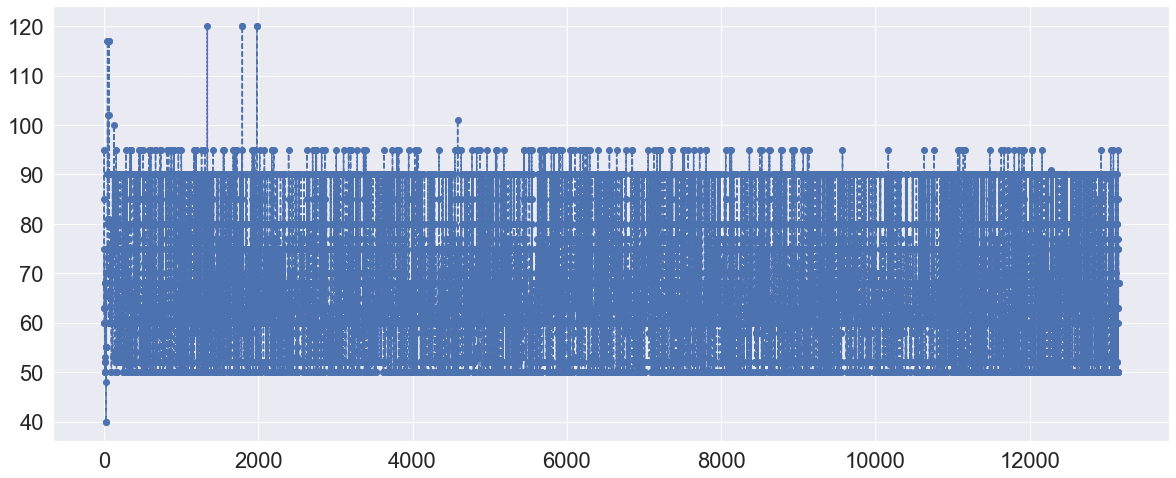

In [136]:
plt.plot(kVp_mali_EI, "bo--")
plt.show()

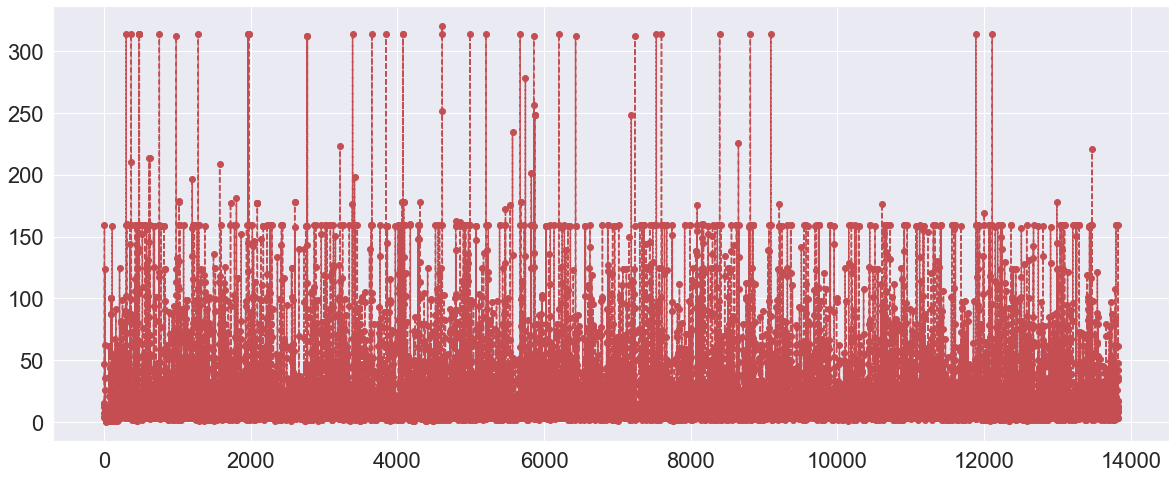

In [137]:
plt.plot(data["mAs"],"ro--")
plt.show()

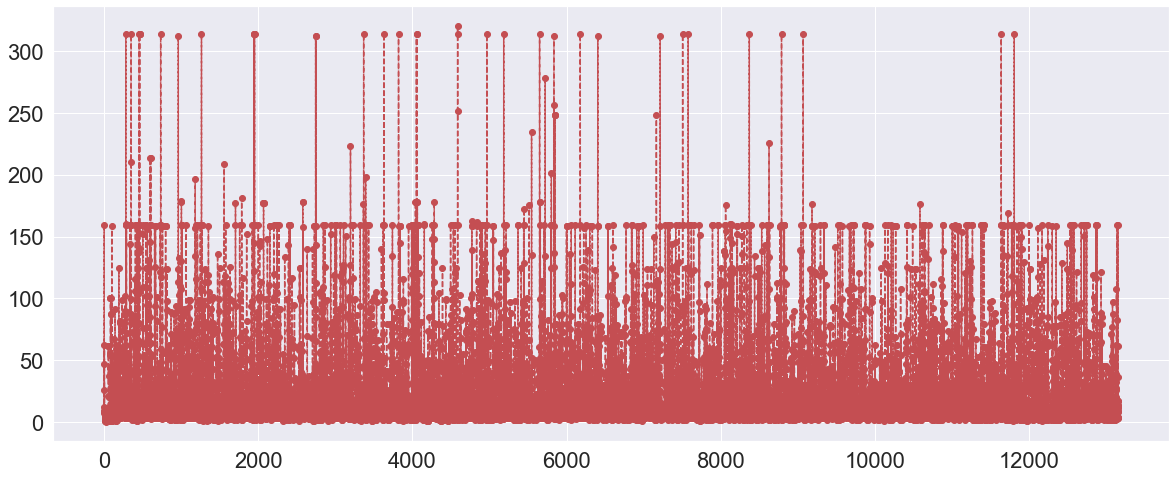

In [138]:
plt.plot(mAs_mali_EI,"ro--")
plt.show()

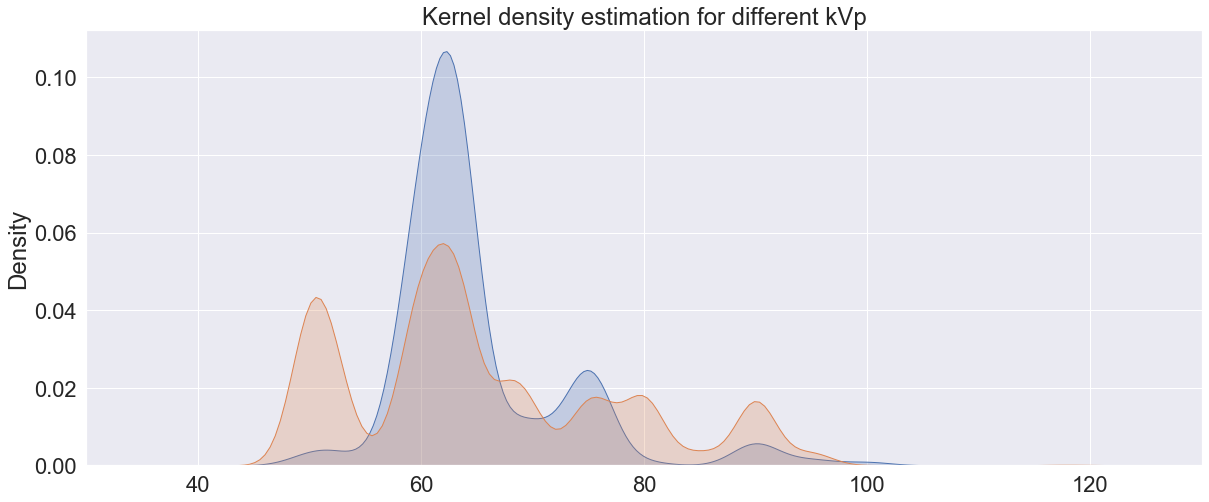

In [139]:
plt.title('Kernel density estimation for different kVp')
sns.kdeplot(kVp_za_visok_EI, fill=True)
sns.kdeplot(kVp_mali_EI, fill=True)
plt.show()

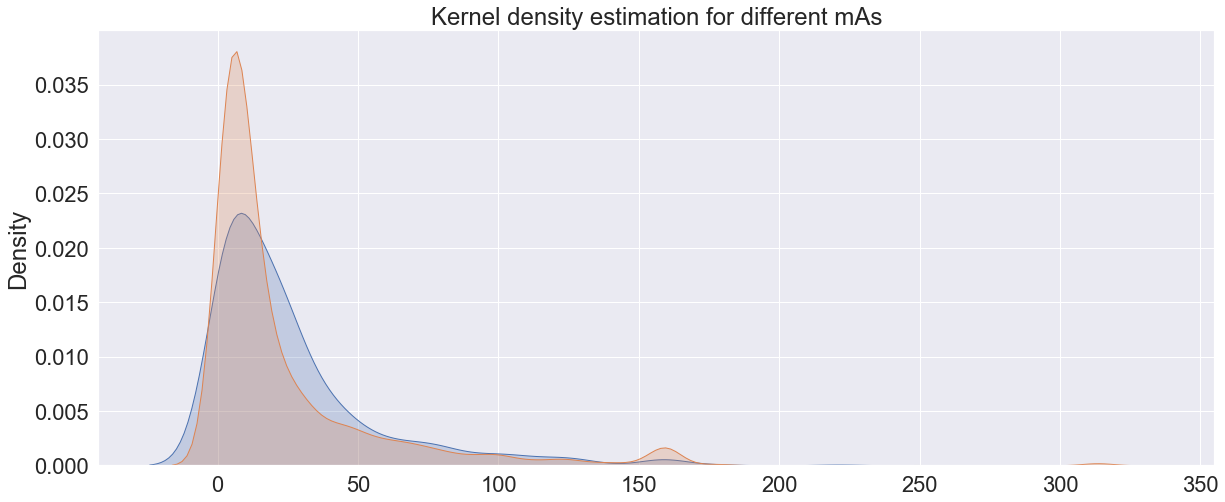

In [140]:
plt.title('Kernel density estimation for different mAs')
sns.kdeplot(mAs_za_visok_EI, fill=True)
sns.kdeplot(mAs_mali_EI, fill=True)
plt.show()

In [141]:
stats.ttest_ind(kVp_za_visok_EI,kVp_mali_EI)

Ttest_indResult(statistic=-0.9164744247885425, pvalue=0.3594340957894884)

In [142]:
stats.ttest_ind(mAs_za_visok_EI,mAs_mali_EI)

Ttest_indResult(statistic=0.9186972738686442, pvalue=0.35826995795073024)

[63, 63, 60, 75, 63, 63, 70, 70, 60, 75, 100, 100, 70, 70, 60, 65, 60, 63, 65, 63, 75, 75, 75, 63, 63, 63, 63, 68, 63, 75, 63, 63, 50, 63, 63, 63, 63, 63, 60, 60, 58, 58, 63, 70, 70, 75, 63, 63, 63, 60, 60, 63, 75, 63, 63, 75, 63, 63, 63, 63, 63, 75, 63, 63, 68, 63, 60, 63, 63, 63, 63, 63, 63, 63, 63, 90, 90, 95, 63, 63, 63, 63, 63, 63, 63, 63, 75, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 60, 75, 60, 75, 75, 63, 63, 58, 60, 60, 58, 58, 63, 70, 60, 63, 63, 63, 60, 63, 63, 63, 63, 68, 70, 75, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 58, 63, 63, 63, 63, 50, 50, 75, 75, 63, 63, 63, 60, 75, 75, 75, 75, 75, 75, 58, 58, 63, 63, 64, 90, 90, 63, 68, 63, 60, 63, 63, 63, 75, 58, 58, 75, 75, 60, 63, 70, 75, 63, 63, 58, 58, 70, 60, 63, 63, 75, 75, 60, 63, 60, 63, 63, 75, 63, 60, 60, 75, 63, 63, 63, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 75, 63, 63, 63, 63, 60, 60, 63, 60, 63, 75, 63, 63, 63, 75, 75, 90, 60, 60, 60, 63, 58, 58, 75, 60, 60, 60, 75, 63, 75, 63, 75, 6

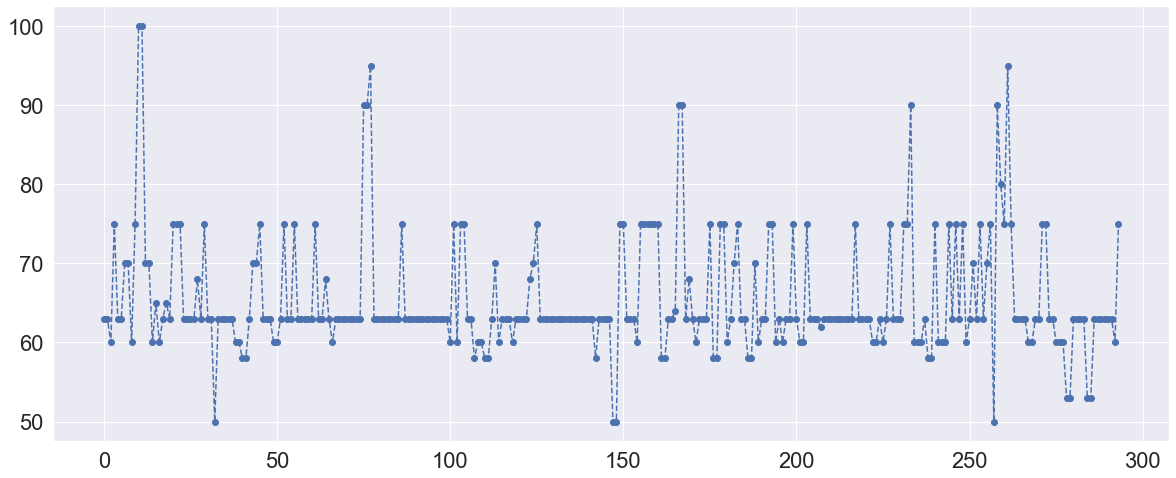

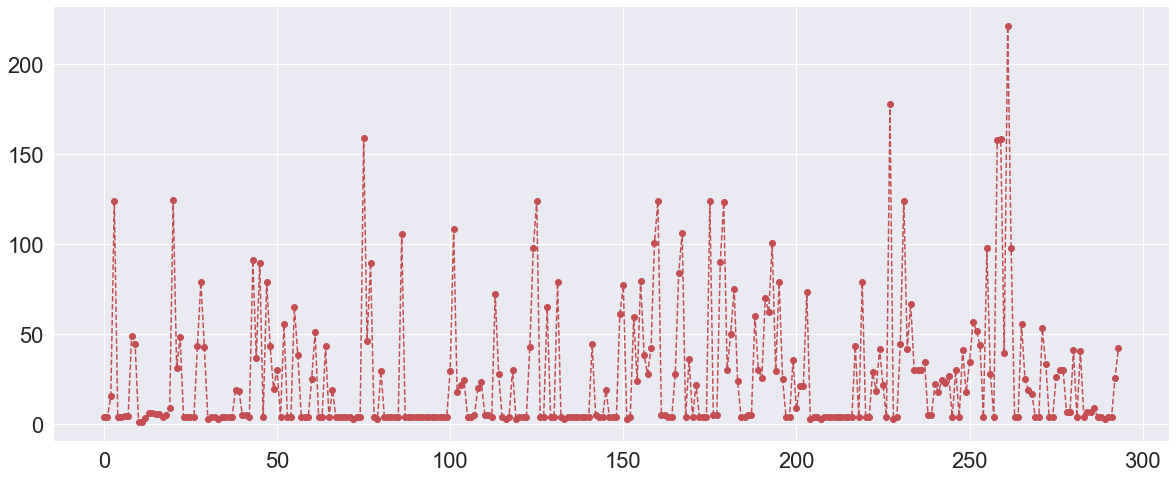

In [143]:
veoma_visoke_dozeEI=[]
kVp_za_EI2000=[]
kVp_za_EImanjeod2000=[]
mAs_za_EI2000=[]
mAs_za_EImanjeod2000=[]
for i in range(len(data)):
    EI=data.iloc[i]["EI"]
    if EI==2000:
        veoma_visoke_dozeEI.append(EI)
        kVp_za_EI2000.append(data.iloc[i]["kVp"])
        mAs_za_EI2000.append(data.iloc[i]["mAs"])
    else:
        kVp_za_EImanjeod2000.append(data.iloc[i]["kVp"])
        mAs_za_EImanjeod2000.append(data.iloc[i]["mAs"])
print(kVp_za_EI2000)
print(mAs_za_EI2000)
plt.plot(kVp_za_EI2000,"bo--")
plt.show()
plt.plot(mAs_za_EI2000,"ro--")
plt.show()

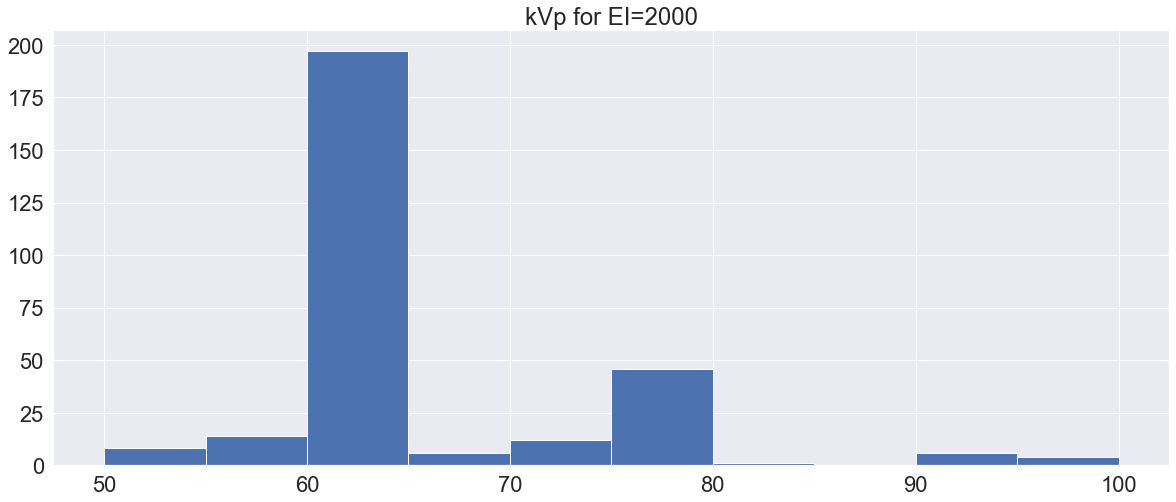

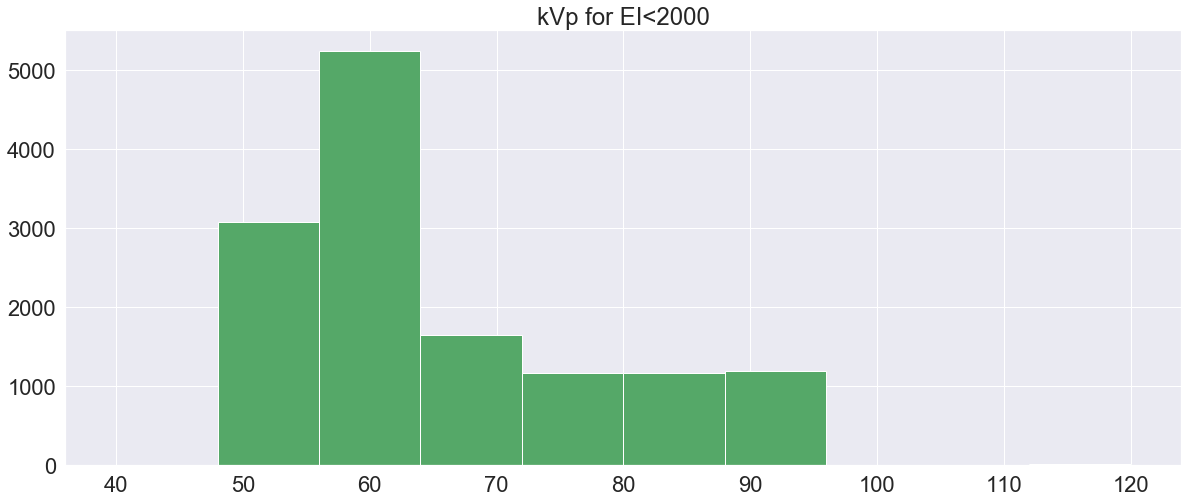

In [144]:
plt.hist(kVp_za_EI2000, color="b")
plt.title("kVp for EI=2000")
plt.show()
plt.title("kVp for EI<2000")
plt.hist(kVp_za_EImanjeod2000, color="g")
plt.show()

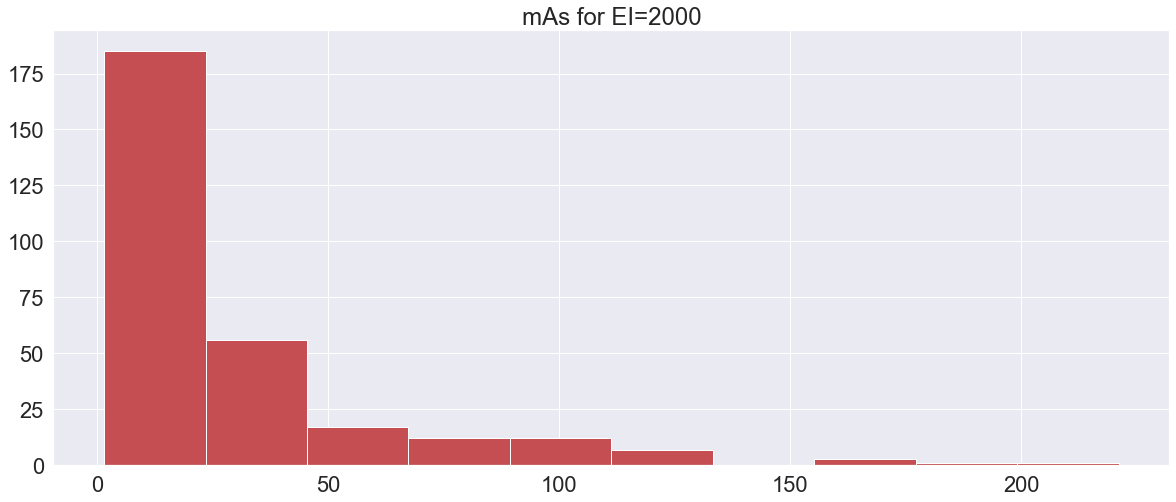

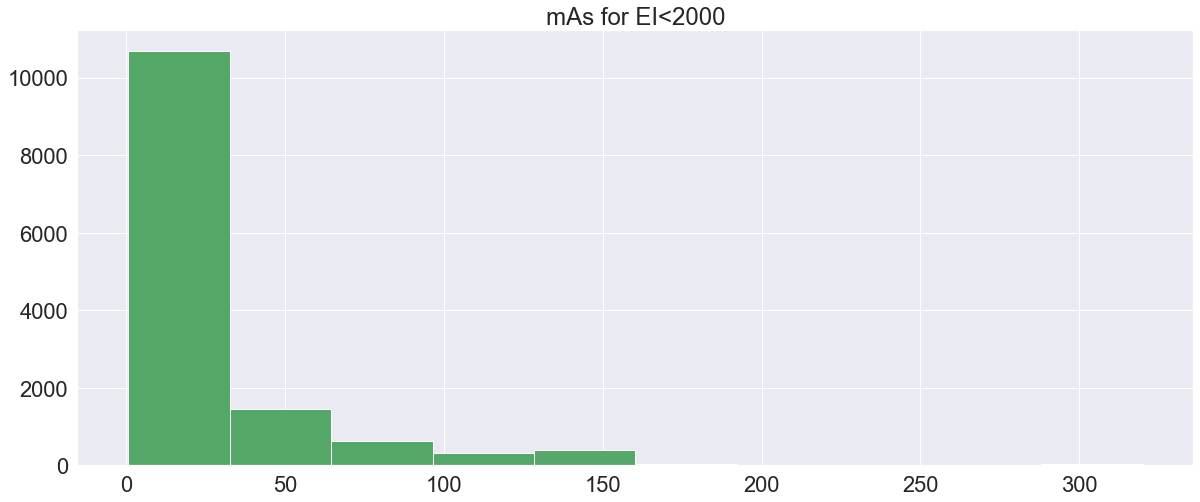

In [145]:
plt.hist(mAs_za_EI2000, color="r")
plt.title("mAs for EI=2000")
plt.show()
plt.title("mAs for EI<2000")
plt.hist(mAs_za_EImanjeod2000, color="g")
plt.show()

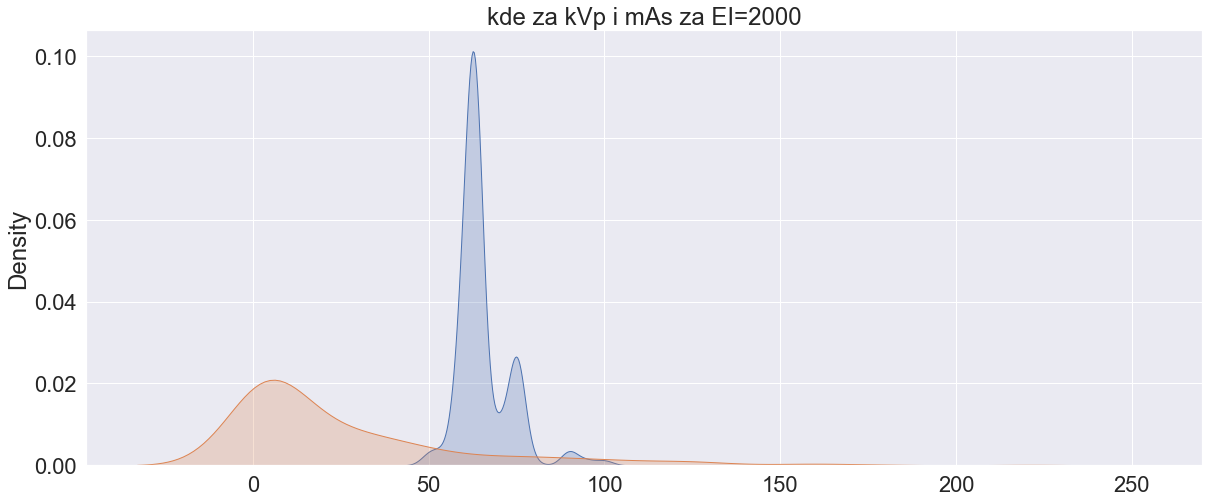

In [146]:
plt.title('kde za kVp i mAs za EI=2000')
sns.kdeplot(kVp_za_EI2000, fill=True)
sns.kdeplot(mAs_za_EI2000, fill=True)
plt.show()

In [147]:
kVp2000niz=np.array(kVp_za_EI2000)
mAs2000niz=np.array(mAs_za_EI2000)
print("KVp and mAs where EI=2000 have these properties:")
print("Range kVp: [", kVp2000niz.min(),",", kVp2000niz.max(), "]")
print("Range mAs: [", mAs2000niz.min(),",", mAs2000niz.max(), "]")
print("Mean value for kVp:",kVp2000niz.mean())
print("Mean value for mAs:",mAs2000niz.mean())

KVp and mAs where EI=2000 have these properties:
Range kVp: [ 50 , 100 ]
Range mAs: [ 1.56 , 221.1 ]
Mean value for kVp: 65.37414965986395
Mean value for mAs: 26.603537414965988


In [148]:
kVpmanjeod2000niz=np.array(kVp_za_EImanjeod2000)
mAsmanjeod2000niz=np.array(mAs_za_EImanjeod2000)
print("KVp and mAs where EI<2000 have these properties:")
print("Range kVp: [", kVpmanjeod2000niz.min(),",", kVpmanjeod2000niz.max(), "]")
print("Range mAs: [", mAsmanjeod2000niz.min(),",", mAsmanjeod2000niz.max(), "]")
print("Mean value for kVp:",kVpmanjeod2000niz.mean())
print("Mean value for mAs:",mAsmanjeod2000niz.mean())

KVp and mAs where EI<2000 have these properties:
Range kVp: [ 40 , 120 ]
Range mAs: [ 0.56 , 320.0 ]
Mean value for kVp: 65.37893337272861
Mean value for mAs: 24.863950361944156


In [149]:
data['mAs'][data['VALID/REJECT'] == ' VALID '][data['anatomy1'] == str(name)]

31       1.09
34       0.97
35       1.00
299      4.77
300      4.77
         ... 
13763    4.10
13785    4.10
13786    4.09
13808    4.09
13809    4.10
Name: mAs, Length: 687, dtype: float64

In [150]:
print(data["anatomy1"][data['EI'] == 2000])

0         FOOT                 
1         FOOT                 
5         KNEE                 
13        PELVIS               
16        FOOT                 
                  ...          
13812     FOOT                 
13813     FOOT                 
13815     FOOT                 
13817     KNEE                 
13819     PELVIS               
Name: anatomy1, Length: 294, dtype: category
Categories (17, object): [, ANKLE, ARM, CHEST, ..., SHOULDER, SKULL, TSPINE, WRIST]


In [151]:
data["anatomy1"][data['EI'] == 2000].value_counts()

 FOOT                     131
 KNEE                      39
 SHOULDER                  29
 PELVIS                    27
 HIP                       18
 ELBOW                     14
 ARM                        9
 LSPINE                     9
 TSPINE                     7
 CSPINE                     4
 WRIST                      2
 HAND                       2
                            2
 CHEST                      1
 LEG                        0
 SKULL                      0
 ANKLE                      0
Name: anatomy1, dtype: int64

In [152]:
anatomy_list=[]
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    anatomy_list.append(name)
print(anatomy_list)

['                      ', ' ANKLE                ', ' ARM                  ', ' CHEST                ', ' CSPINE               ', ' ELBOW                ', ' FOOT                 ', ' HAND                 ', ' HIP                  ', ' KNEE                 ', ' LEG                  ', ' LSPINE               ', ' PELVIS               ', ' SHOULDER             ', ' SKULL                ', ' TSPINE               ', ' WRIST                ']


                      
75    1
60    1
Name: kVp, dtype: int64


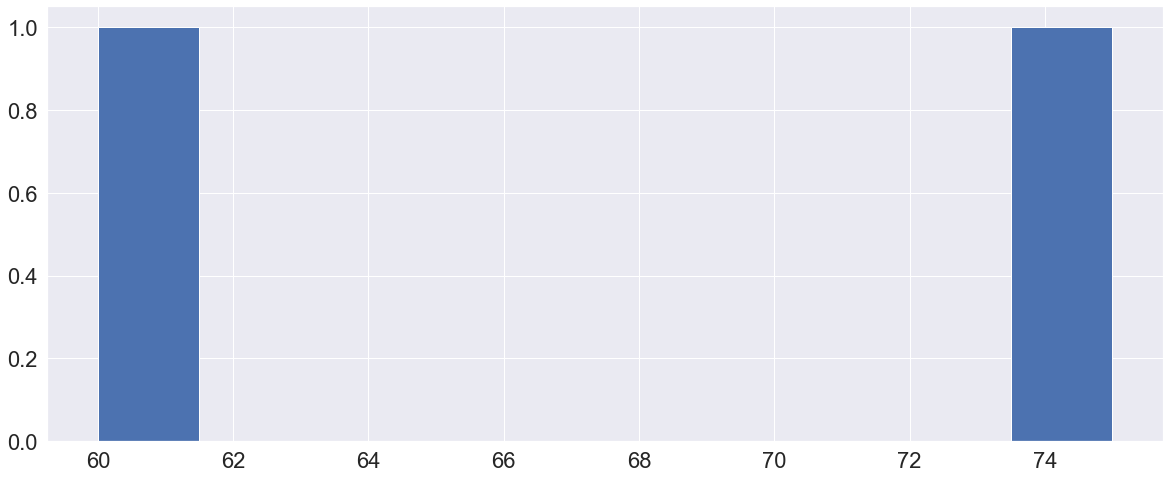

 ANKLE                
Series([], Name: kVp, dtype: int64)


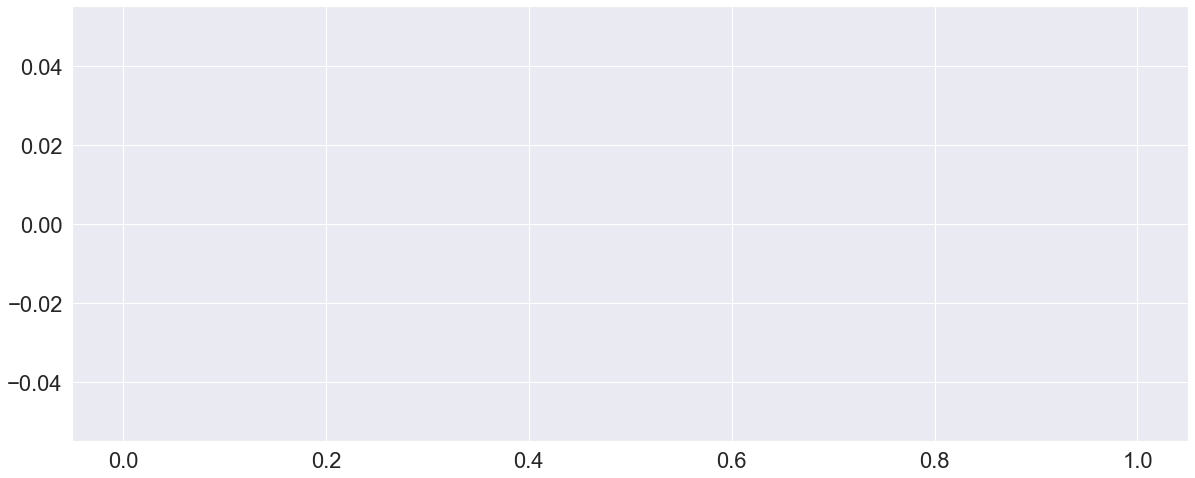

 ARM                  
53     4
70     2
100    2
60     1
Name: kVp, dtype: int64


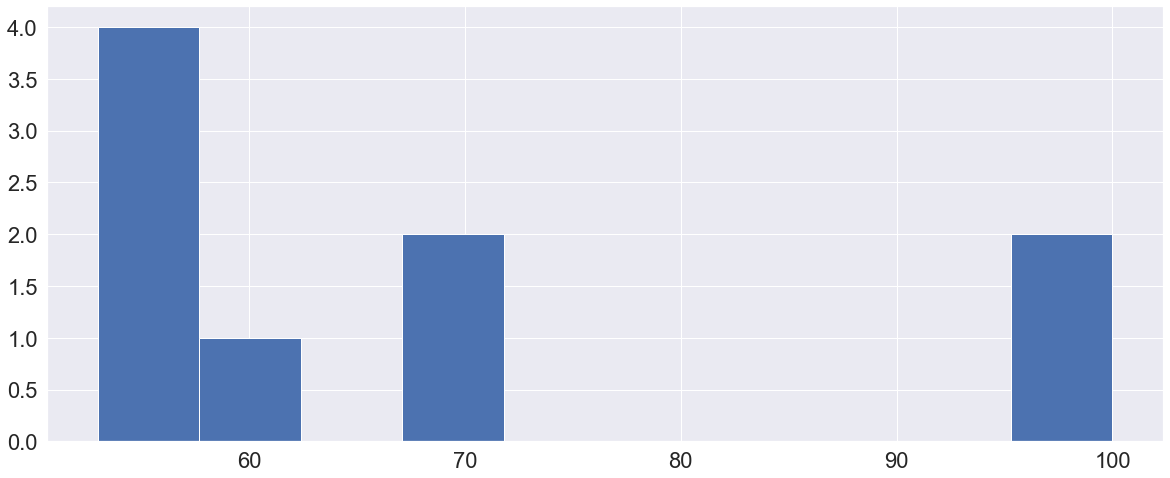

 CHEST                
70    1
Name: kVp, dtype: int64


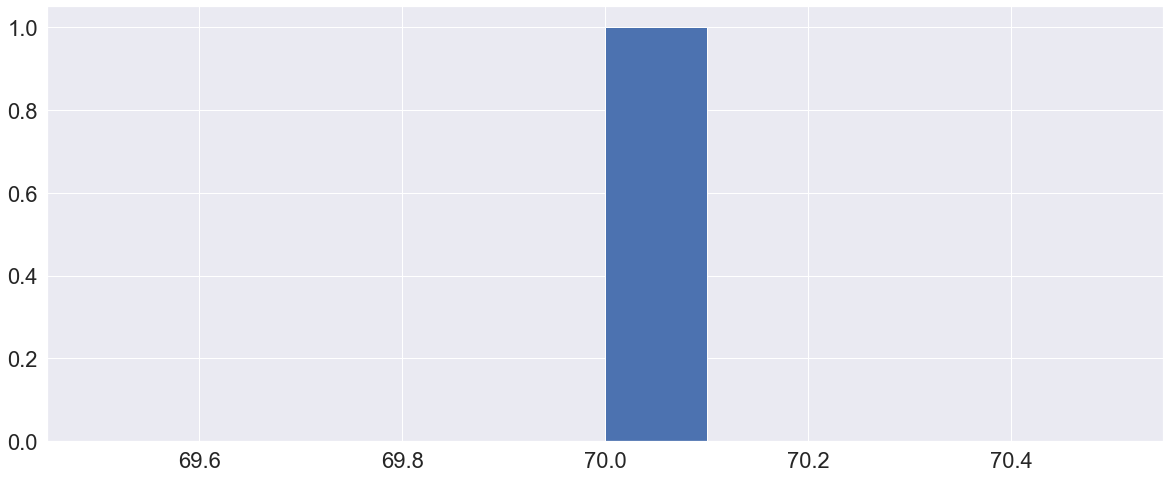

 CSPINE               
68    4
Name: kVp, dtype: int64


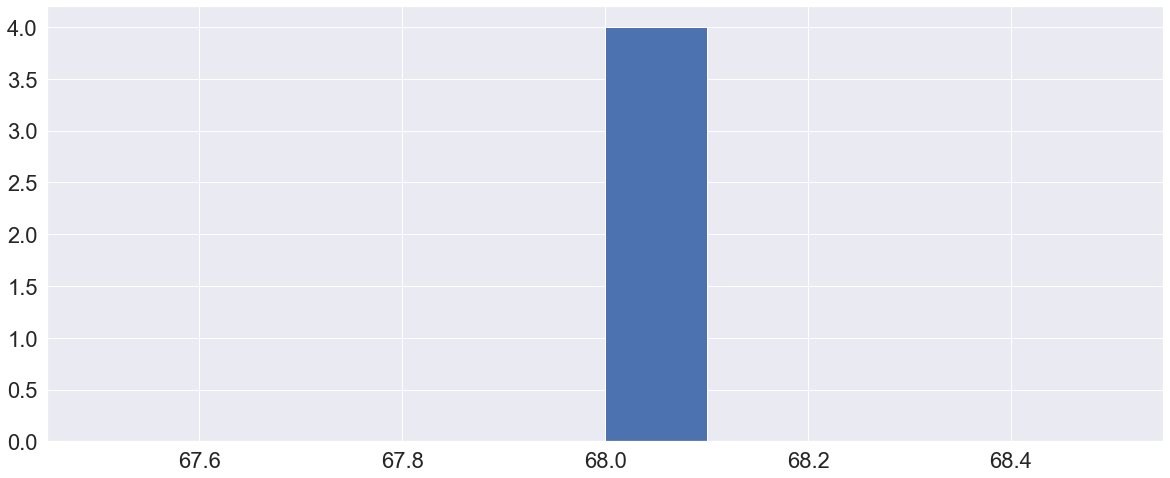

 ELBOW                
58    14
Name: kVp, dtype: int64


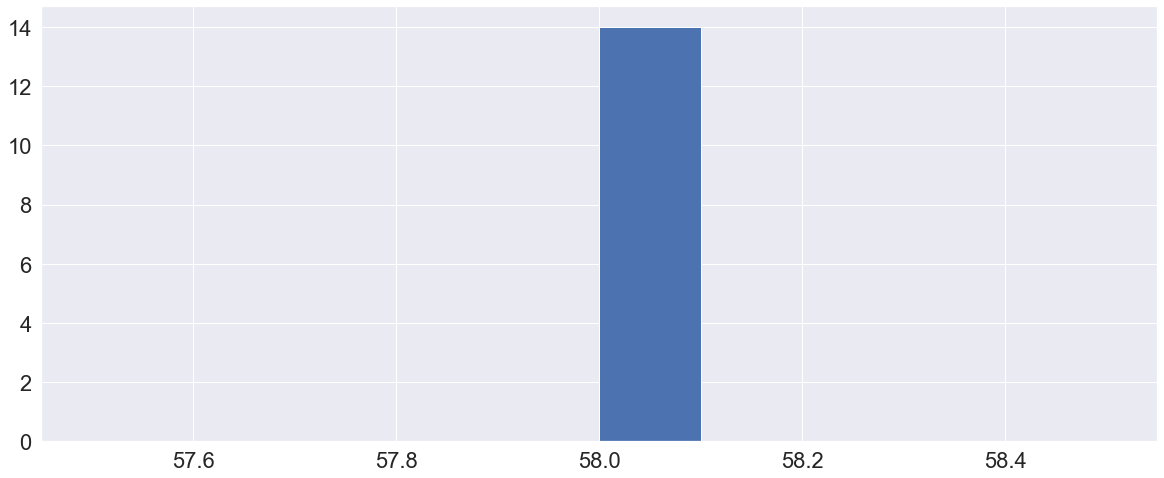

 FOOT                 
63    128
70      2
62      1
Name: kVp, dtype: int64


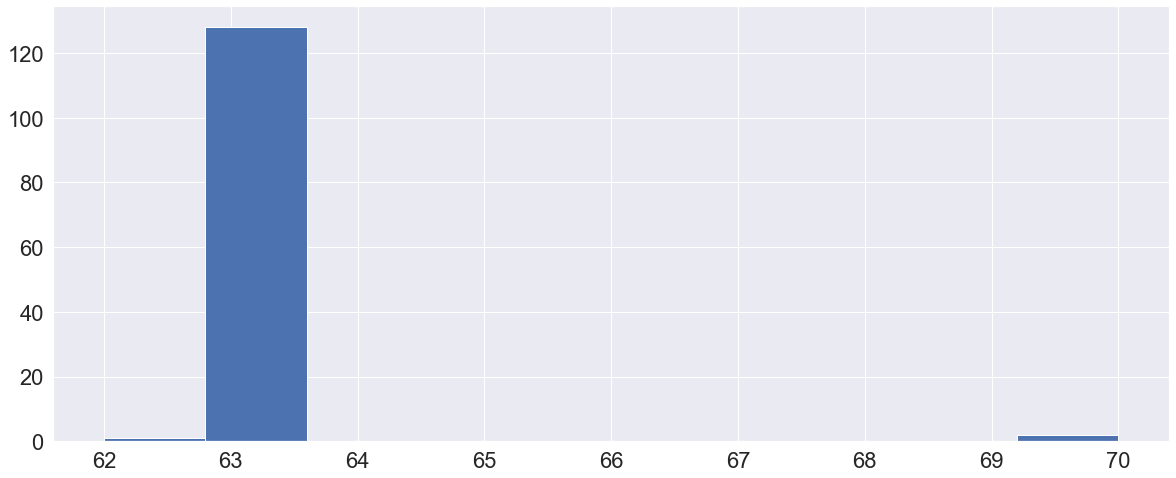

 HAND                 
50    2
Name: kVp, dtype: int64


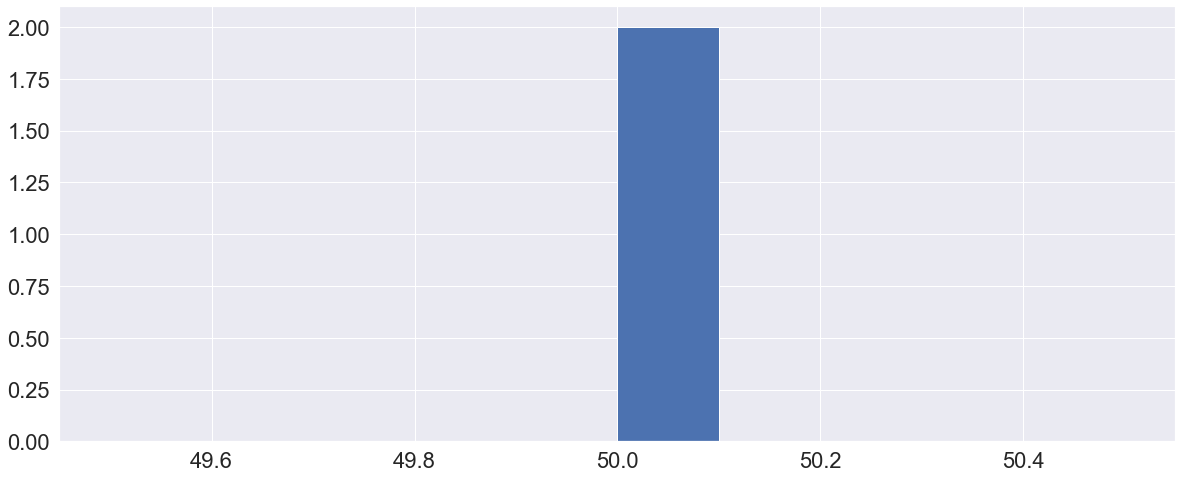

 HIP                  
75    18
Name: kVp, dtype: int64


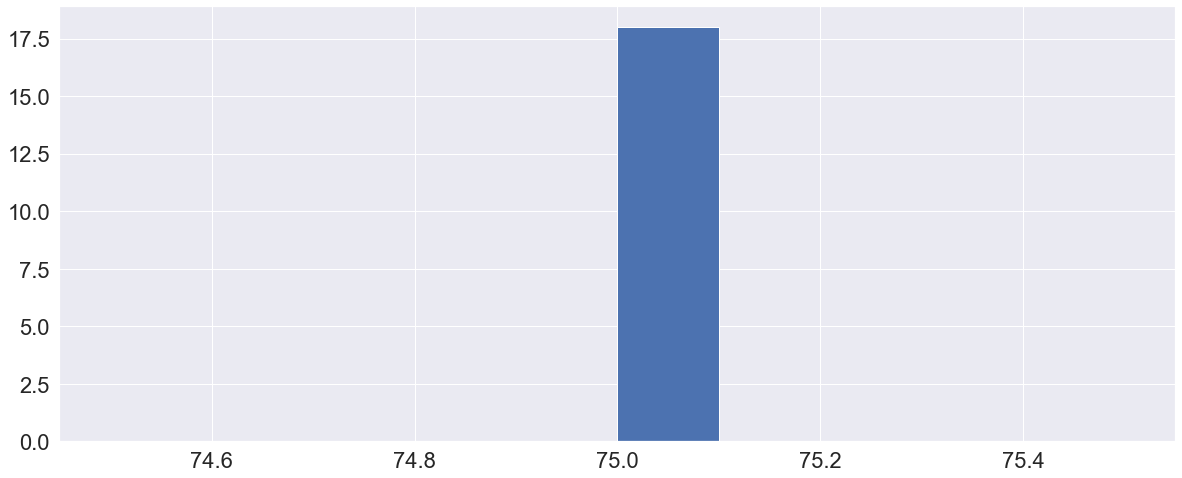

 KNEE                 
60    36
65     2
64     1
Name: kVp, dtype: int64


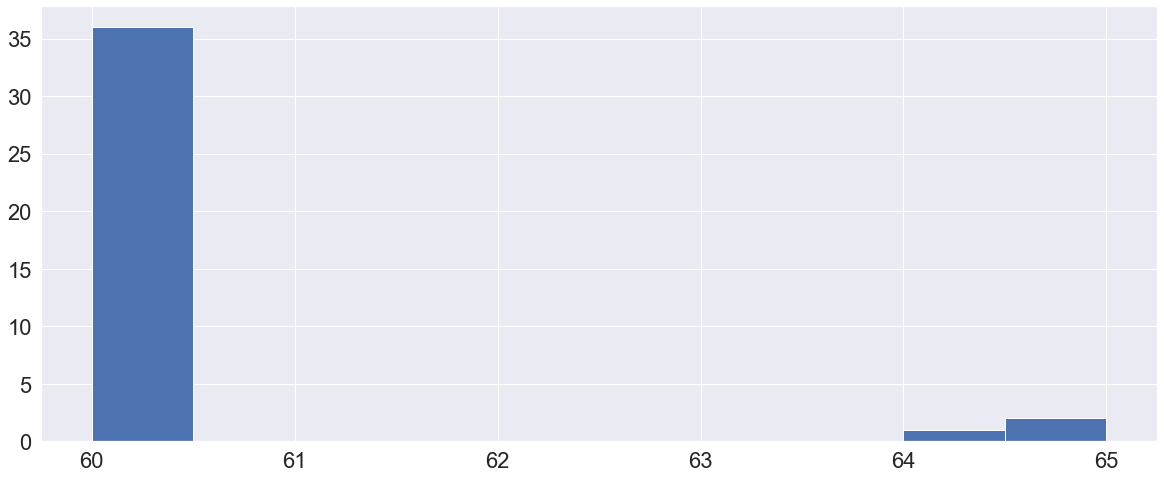

 LEG                  
Series([], Name: kVp, dtype: int64)


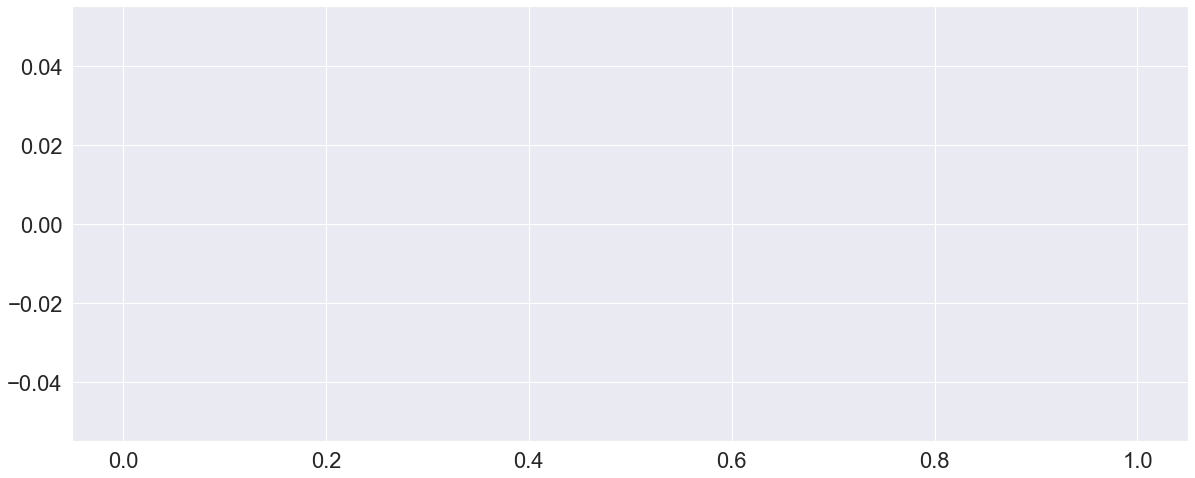

 LSPINE               
90    6
95    2
80    1
Name: kVp, dtype: int64


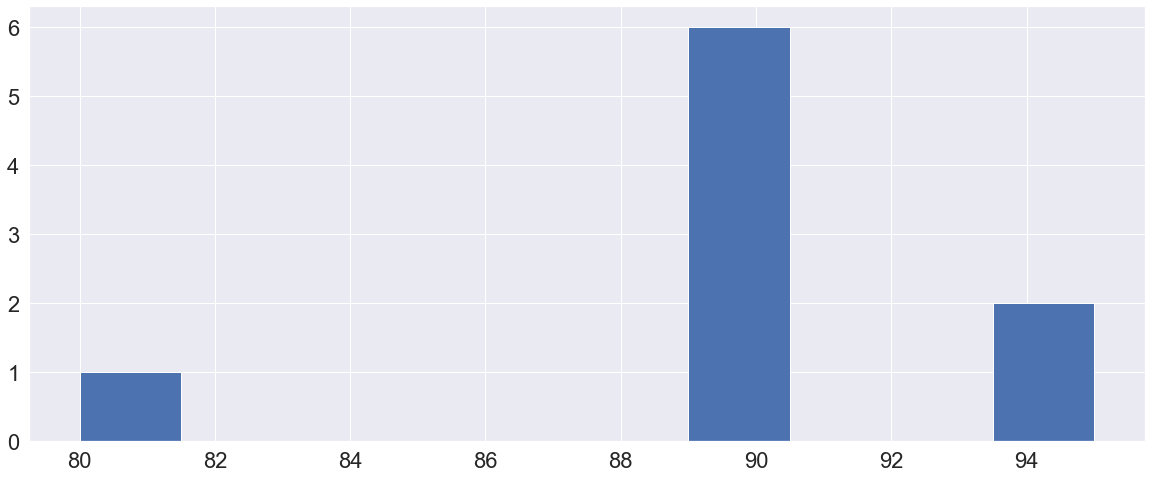

 PELVIS               
75    27
Name: kVp, dtype: int64


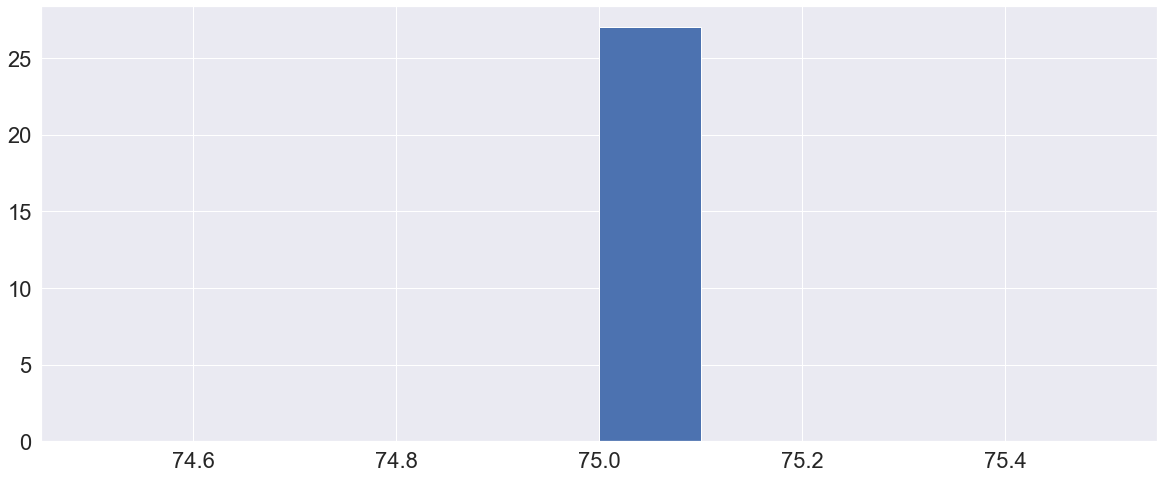

 SHOULDER             
63    28
60     1
Name: kVp, dtype: int64


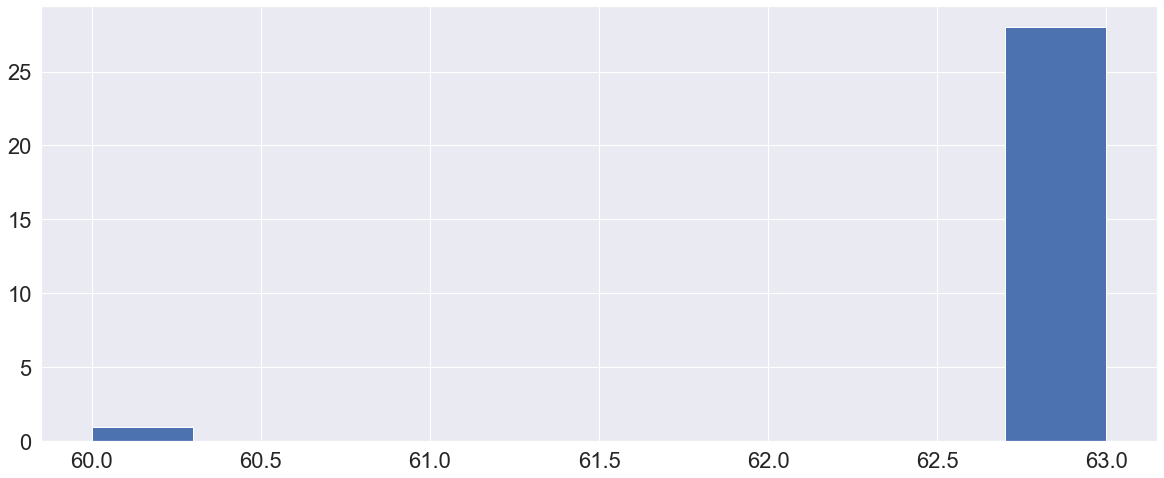

 SKULL                
Series([], Name: kVp, dtype: int64)


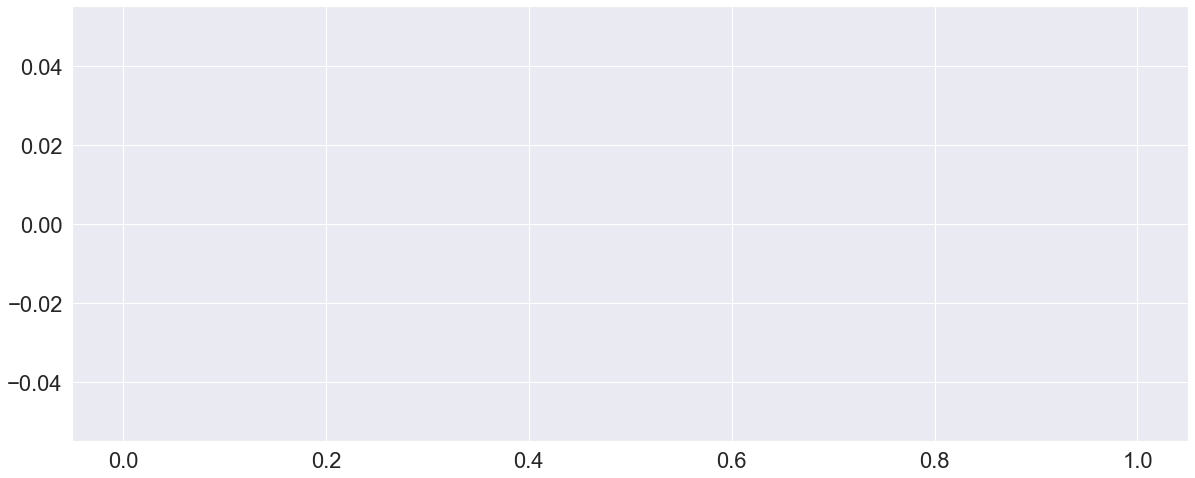

 TSPINE               
70    7
Name: kVp, dtype: int64


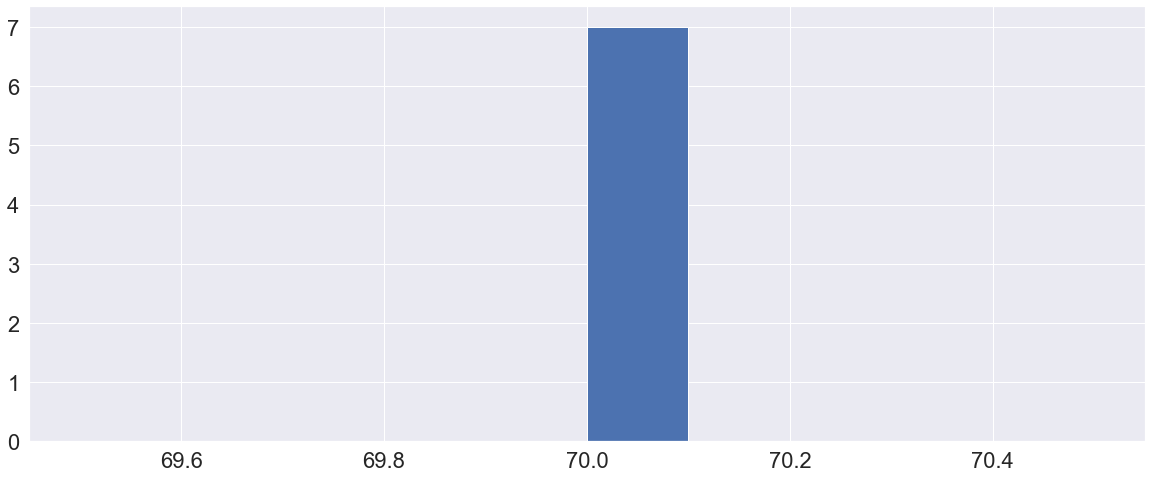

 WRIST                
50    2
Name: kVp, dtype: int64


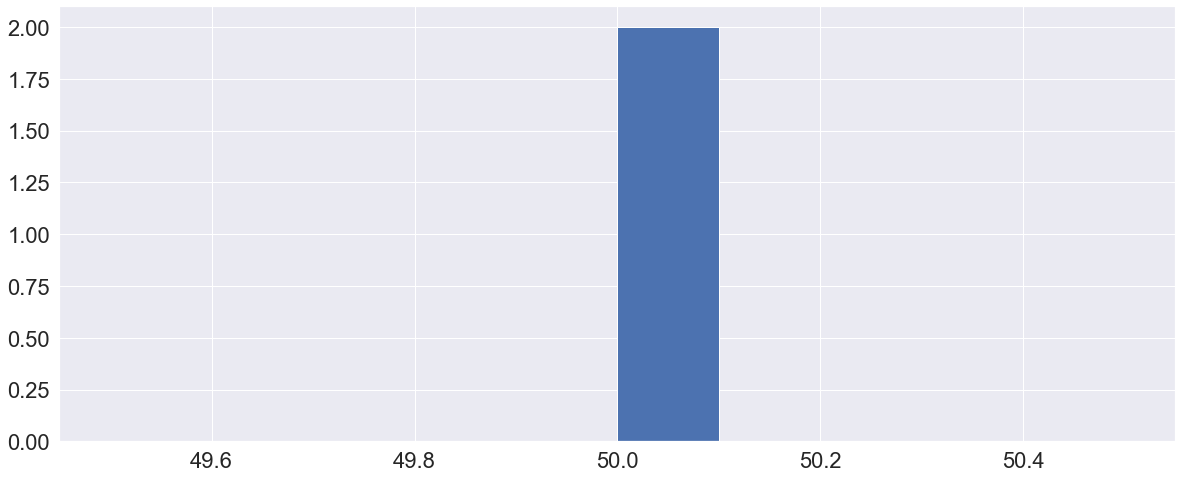

In [153]:
for i in range(len(anatomy_list)):
    print(anatomy_list[i])
    print(data["kVp"][data["anatomy1"]==str(anatomy_list[i])][data['EI'] == 2000].value_counts())   
    plt.hist(data["kVp"][data["anatomy1"]==str(anatomy_list[i])][data['EI'] == 2000])
    plt.show()
    

                      
49.1    1
44.7    1
Name: mAs, dtype: int64


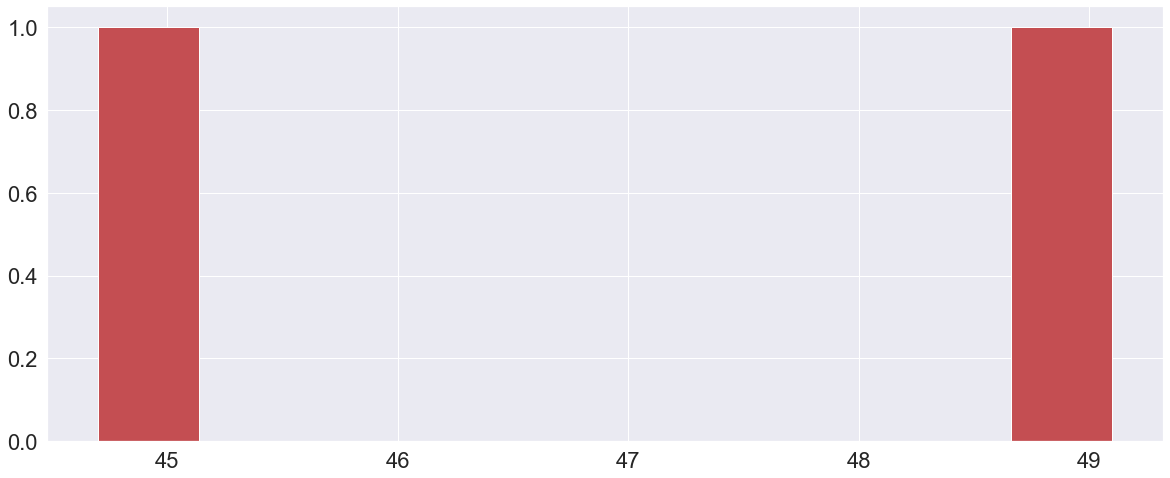

 ANKLE                
Series([], Name: mAs, dtype: int64)


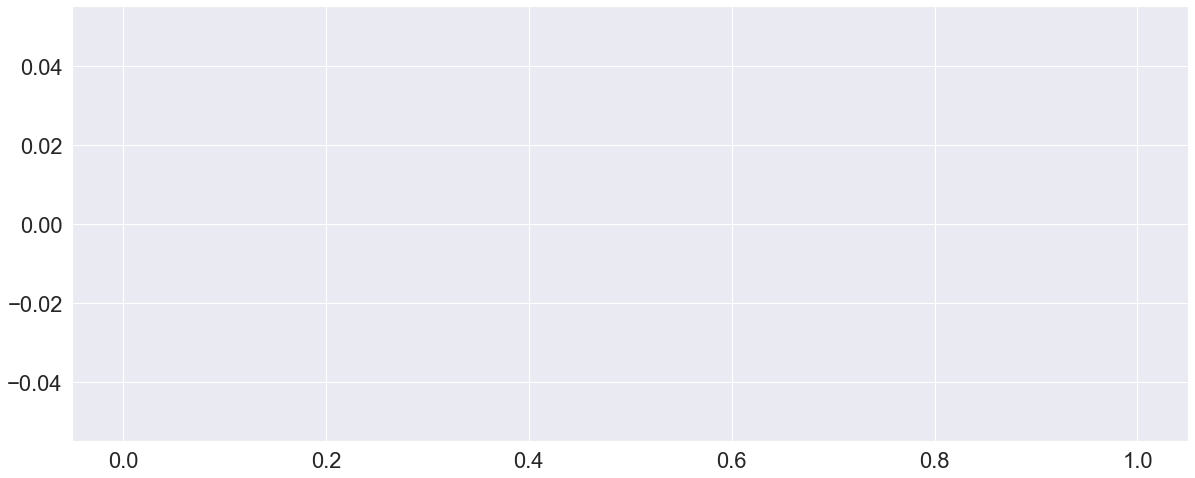

 ARM                  
6.23    1
6.74    1
6.20    1
6.76    1
1.56    1
3.72    1
1.57    1
6.72    1
6.75    1
Name: mAs, dtype: int64


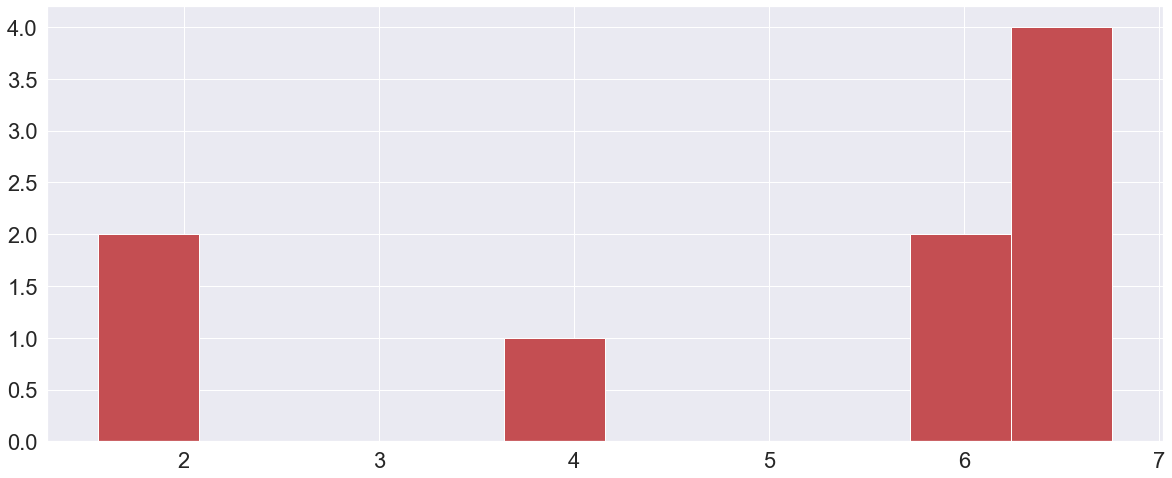

 CHEST                
37.0    1
Name: mAs, dtype: int64


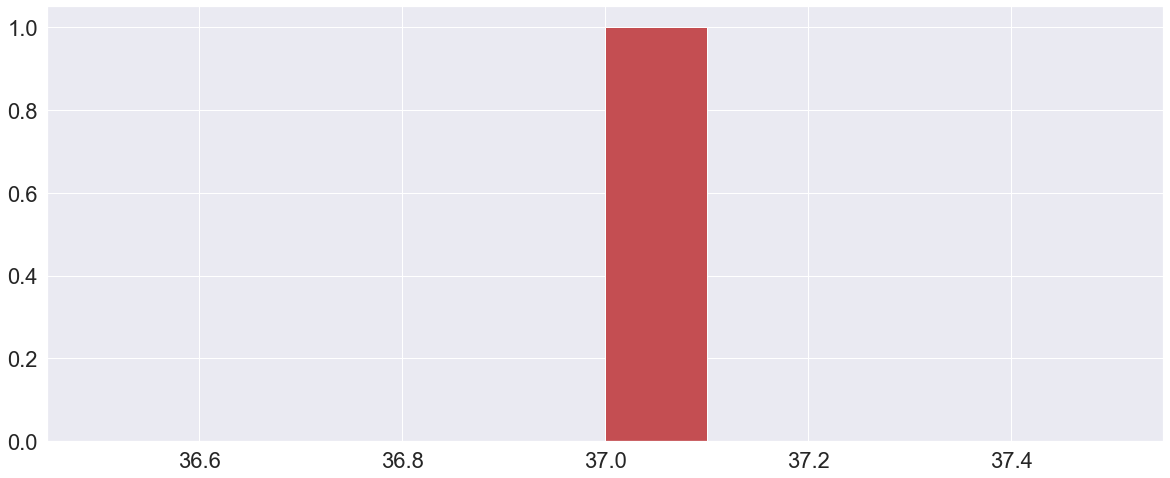

 CSPINE               
43.3    2
42.7    1
36.5    1
Name: mAs, dtype: int64


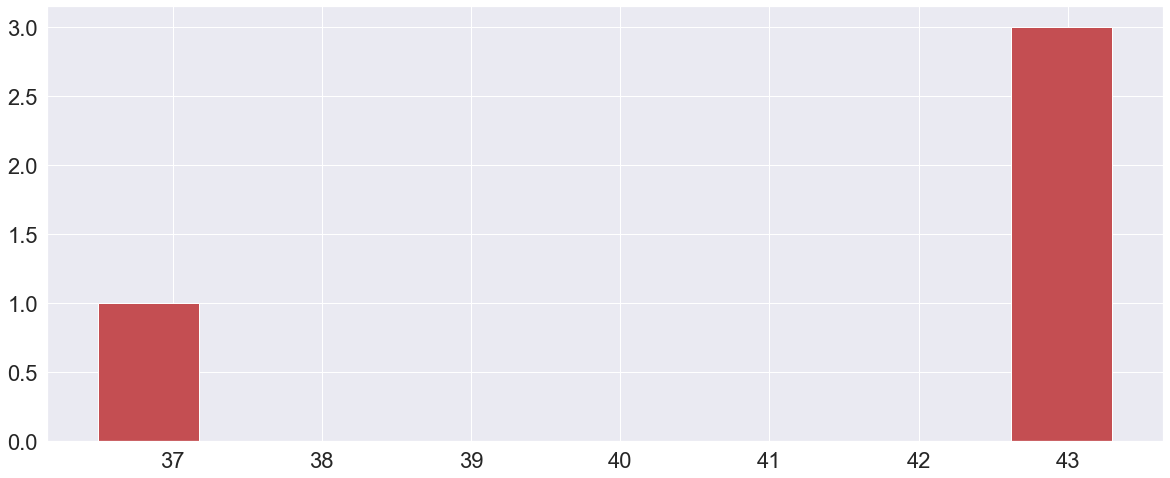

 ELBOW                
5.19    3
5.17    2
5.15    2
5.22    1
5.20    1
5.13    1
5.12    1
5.21    1
5.14    1
5.18    1
Name: mAs, dtype: int64


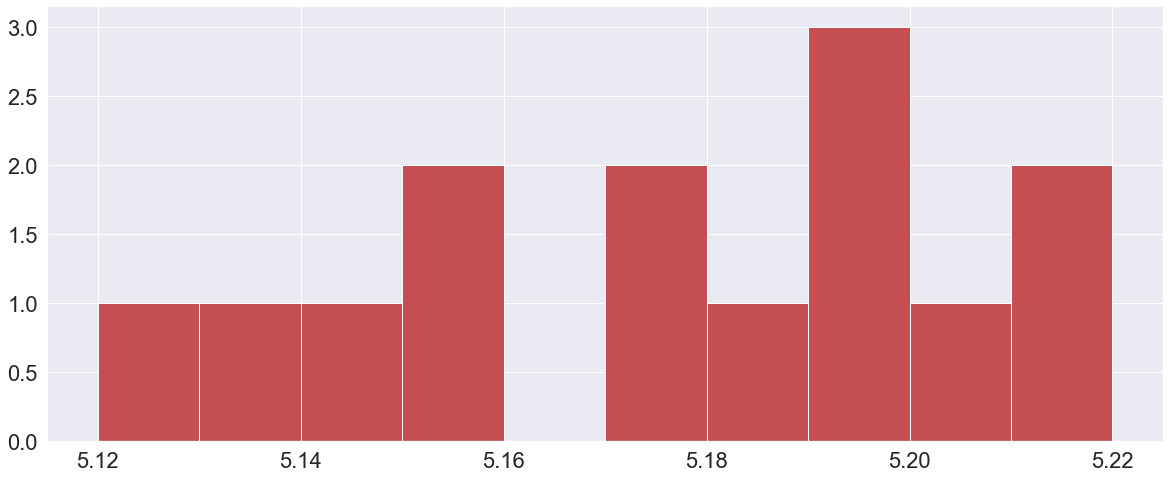

 FOOT                 
4.05    26
4.04    25
4.06    24
4.07    13
4.03     9
4.08     9
3.21     4
3.20     4
4.01     3
4.02     3
4.09     3
4.84     2
3.23     2
3.24     1
4.10     1
3.19     1
4.25     1
Name: mAs, dtype: int64


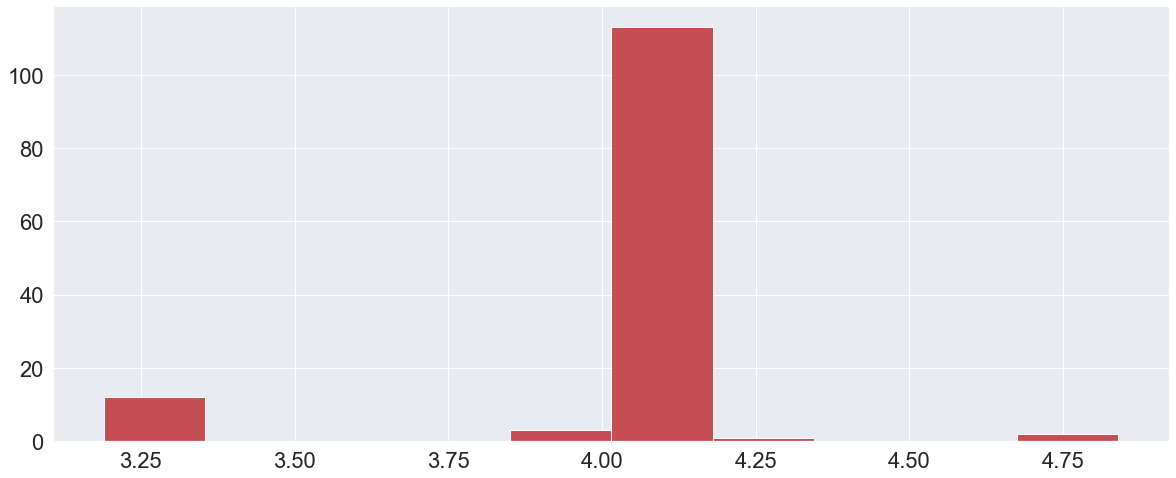

 HAND                 
4.29    1
4.27    1
Name: mAs, dtype: int64


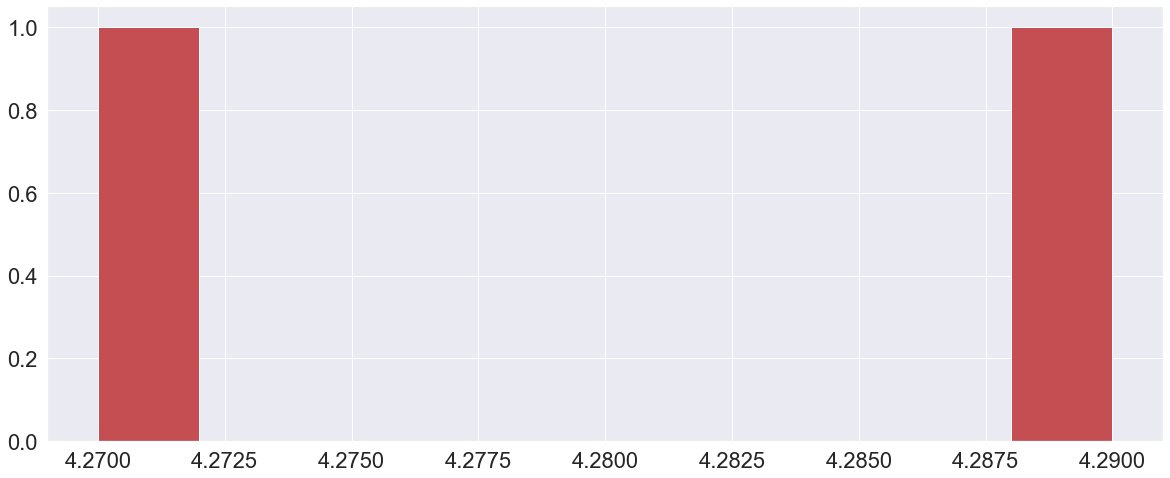

 HIP                  
27.8     1
177.7    1
61.5     1
33.5     1
26.9     1
79.7     1
53.3     1
22.2     1
51.1     1
41.2     1
27.7     1
89.9     1
38.6     1
31.4     1
100.9    1
21.9     1
100.6    1
43.0     1
Name: mAs, dtype: int64


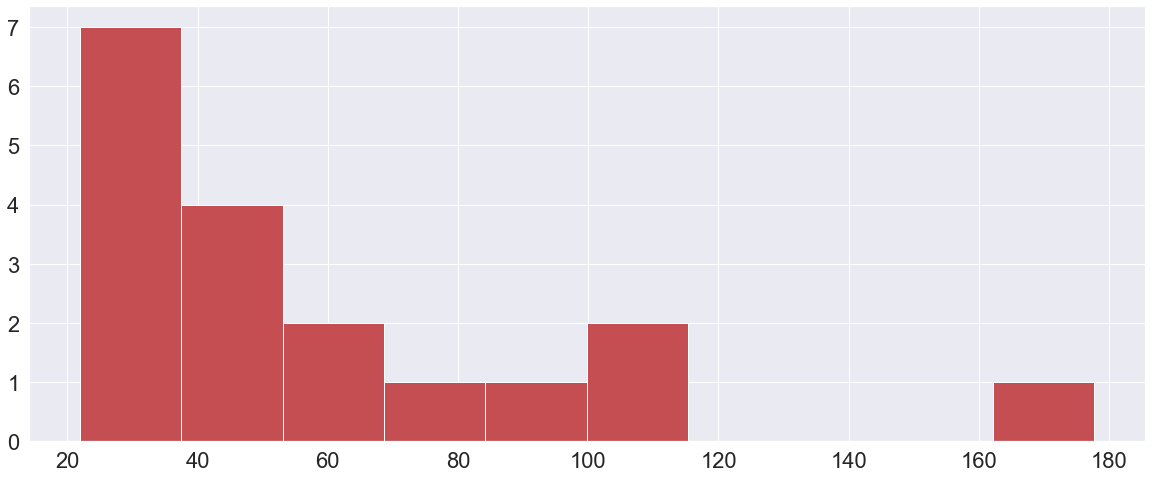

 KNEE                 
30.20    7
19.20    2
17.70    2
30.10    2
26.20    1
28.00    1
5.72     1
29.70    1
25.00    1
5.31     1
21.50    1
18.70    1
21.30    1
22.80    1
15.70    1
18.90    1
27.70    1
23.40    1
23.90    1
28.80    1
16.80    1
21.90    1
25.90    1
19.70    1
18.30    1
21.80    1
24.60    1
18.20    1
29.80    1
20.00    1
Name: mAs, dtype: int64


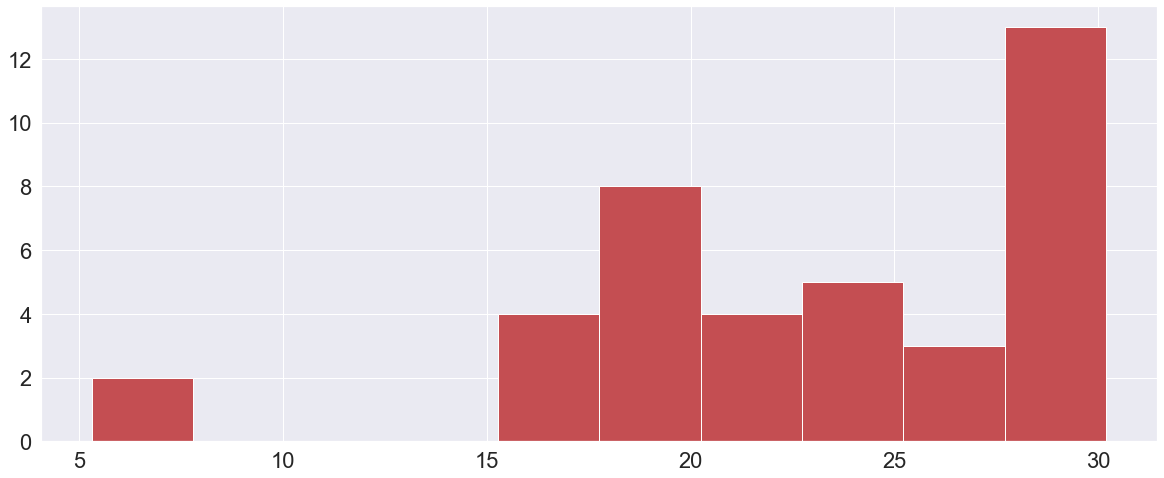

 LEG                  
Series([], Name: mAs, dtype: int64)


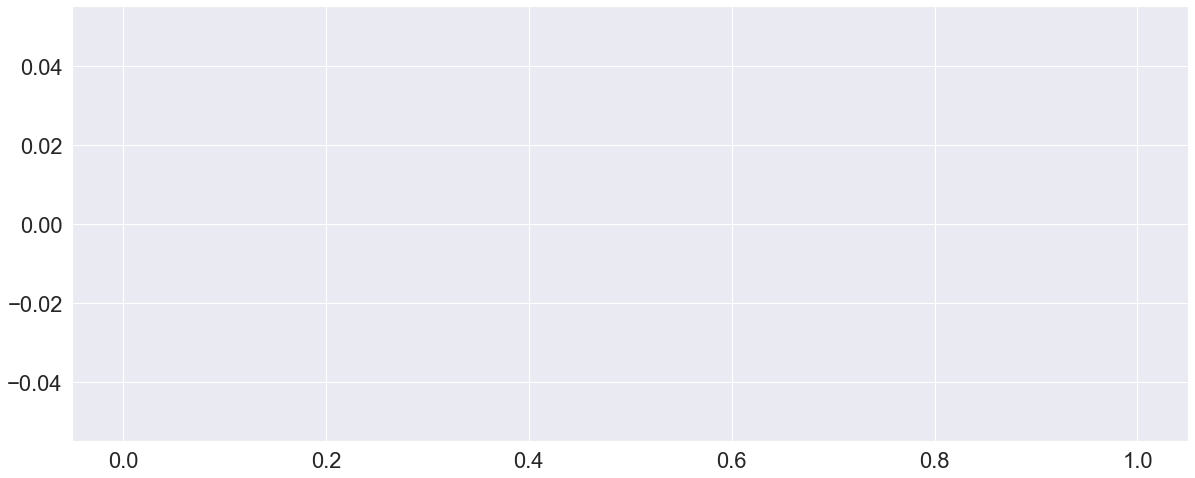

 LSPINE               
158.1    1
158.9    1
89.8     1
221.1    1
67.1     1
46.2     1
84.1     1
158.6    1
106.4    1
Name: mAs, dtype: int64


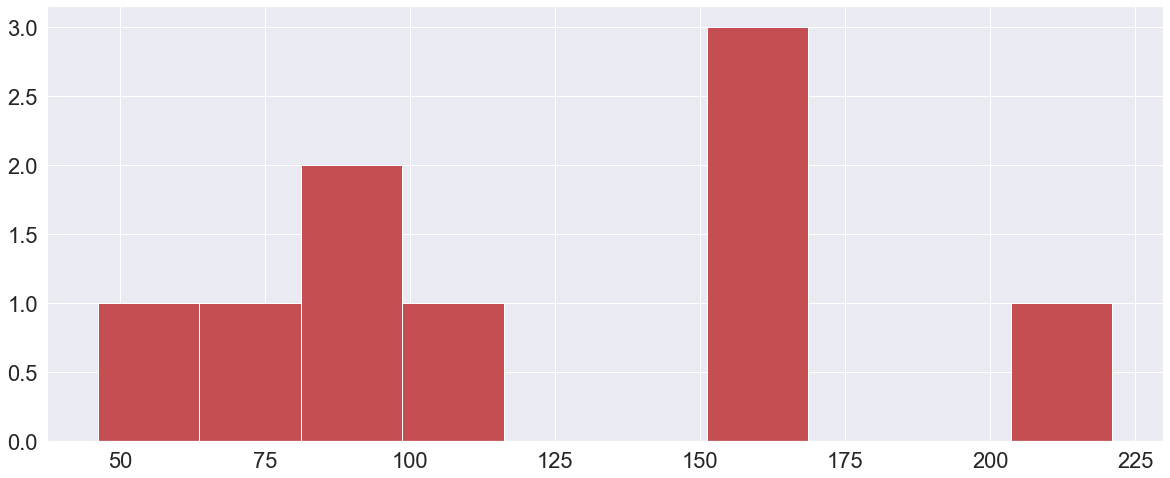

 PELVIS               
124.2    5
42.2     2
24.8     1
77.2     1
123.5    1
43.5     1
44.0     1
89.7     1
98.2     1
24.1     1
105.8    1
62.4     1
39.4     1
55.6     1
73.3     1
48.3     1
65.4     1
124.7    1
35.6     1
30.4     1
41.7     1
108.5    1
Name: mAs, dtype: int64


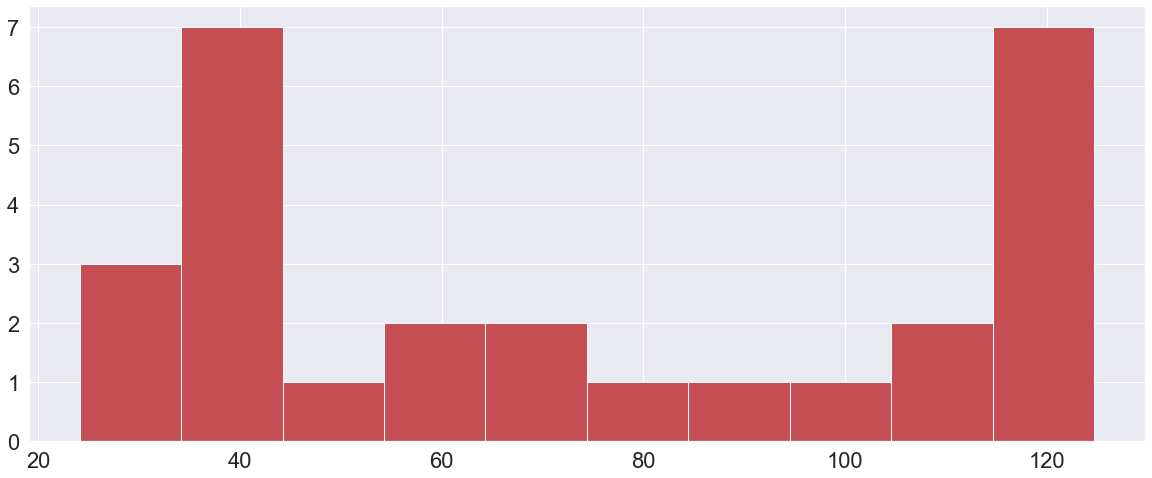

 SHOULDER             
79.00    2
8.93     2
79.10    2
41.80    1
59.50    1
34.50    1
50.20    1
9.11     1
40.70    1
70.10    1
25.60    1
5.74     1
43.30    1
51.90    1
79.20    1
18.90    1
44.80    1
64.90    1
25.20    1
29.80    1
34.80    1
38.40    1
55.80    1
25.10    1
44.40    1
41.20    1
Name: mAs, dtype: int64


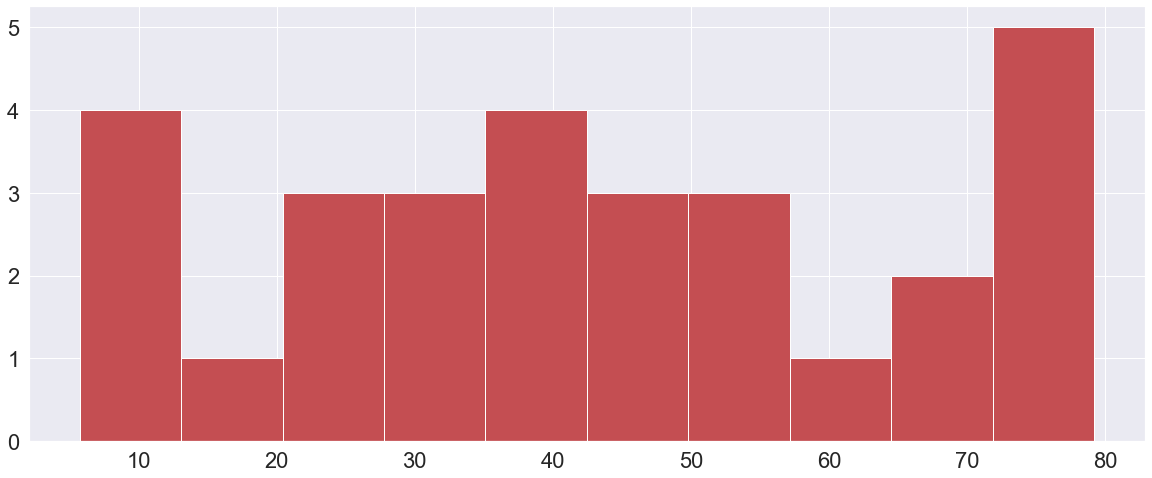

 SKULL                
Series([], Name: mAs, dtype: int64)


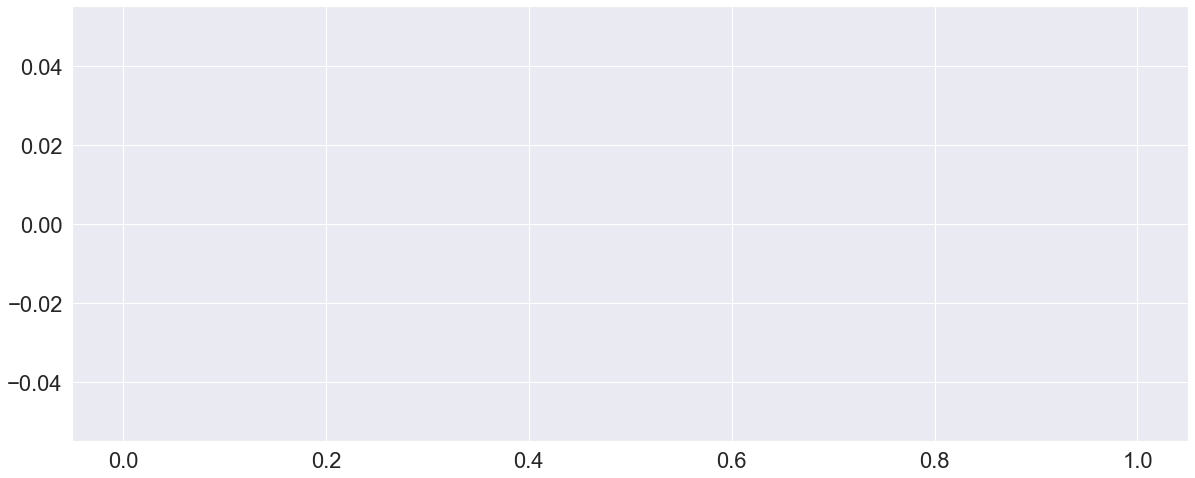

 TSPINE               
98.0    2
91.4    1
75.1    1
60.1    1
57.1    1
72.4    1
Name: mAs, dtype: int64


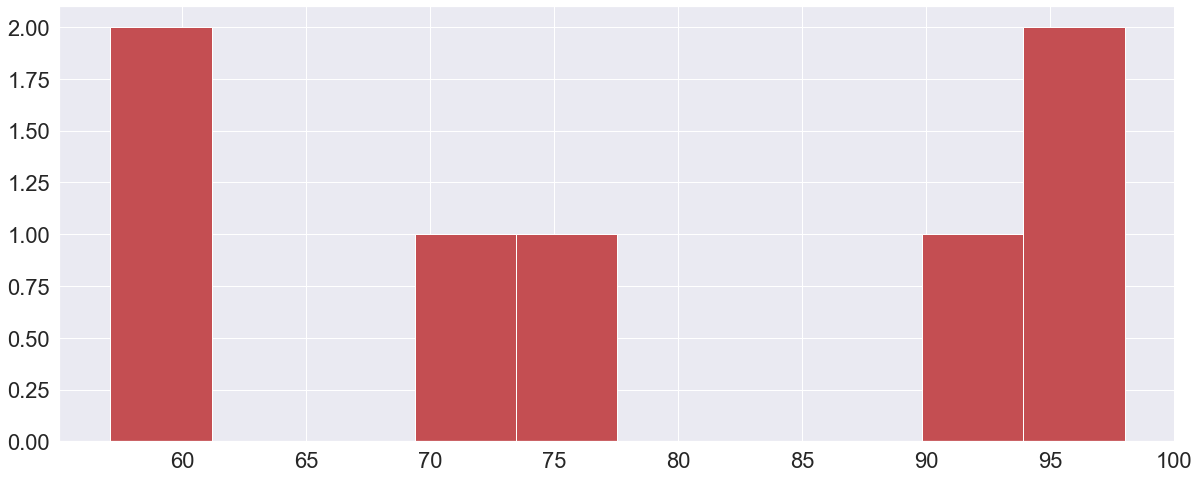

 WRIST                
4.12    1
4.10    1
Name: mAs, dtype: int64


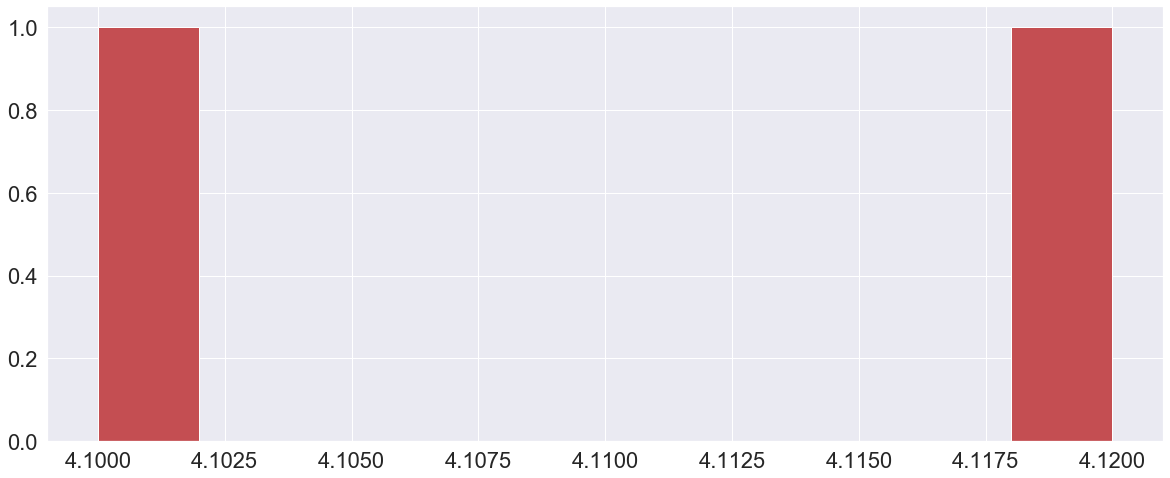

In [154]:
for i in range(len(anatomy_list)):
    print(anatomy_list[i])
    print(data["mAs"][data["anatomy1"]==str(anatomy_list[i])][data['EI'] == 2000].value_counts()) 
    plt.hist(data["mAs"][data["anatomy1"]==str(anatomy_list[i])][data['EI'] == 2000], color="r")
    plt.show()

('                      ', ' REJCT ')
('                      ', ' VALID ')


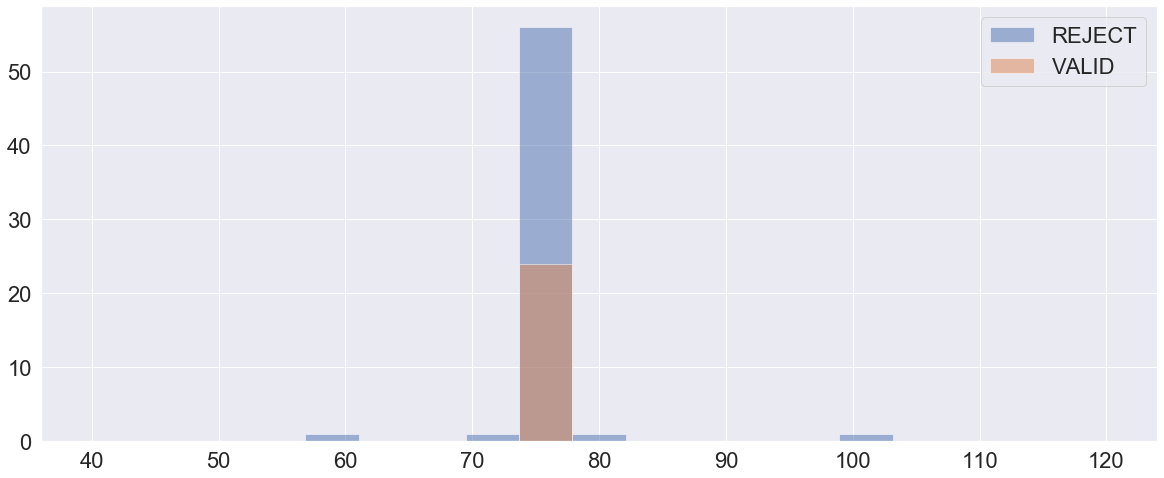

(' ANKLE                ', ' REJCT ')
(' ANKLE                ', ' VALID ')


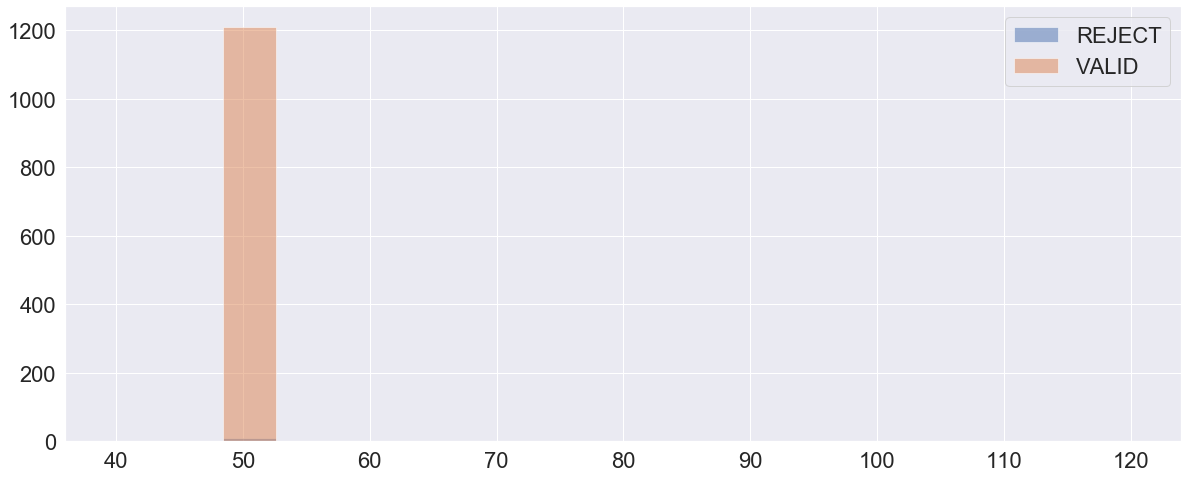

(' ARM                  ', ' REJCT ')
(' ARM                  ', ' VALID ')


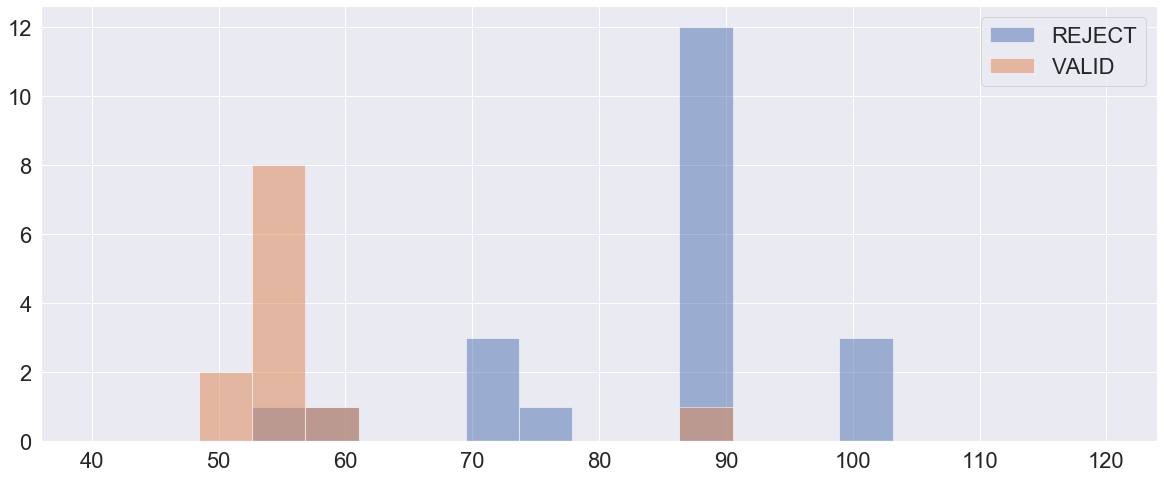

(' CHEST                ', ' REJCT ')
(' CHEST                ', ' VALID ')


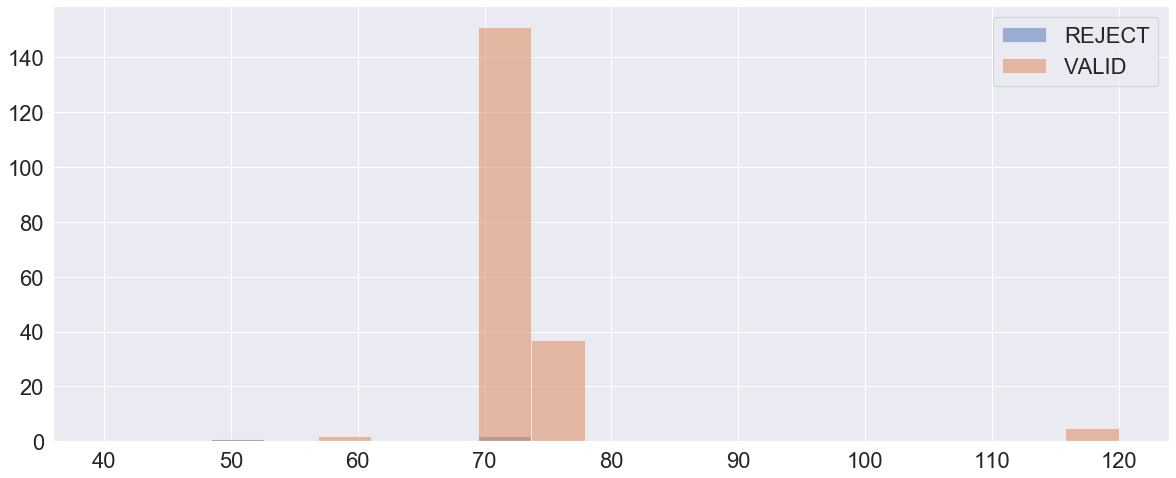

(' CSPINE               ', ' REJCT ')
(' CSPINE               ', ' VALID ')


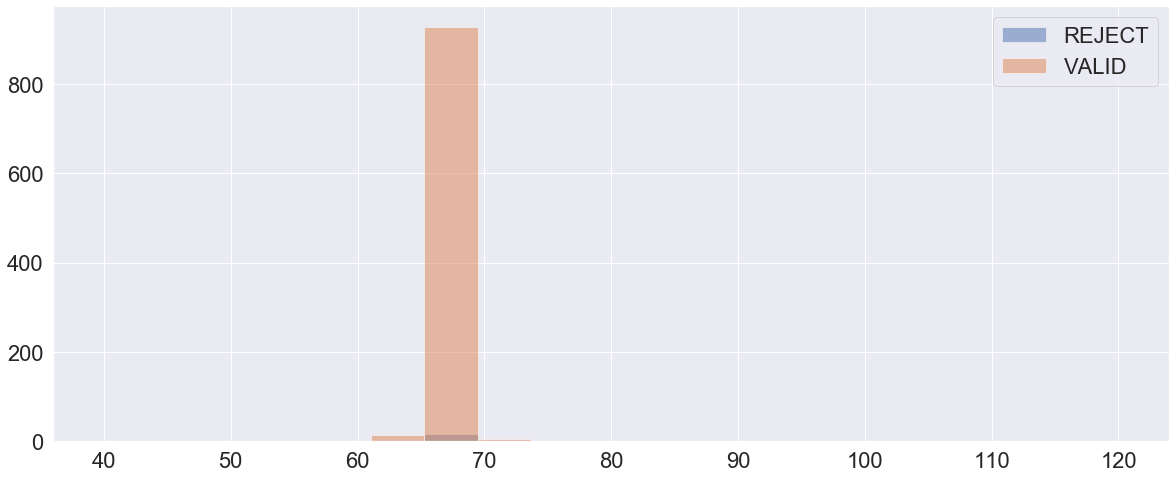

(' ELBOW                ', ' REJCT ')
(' ELBOW                ', ' VALID ')


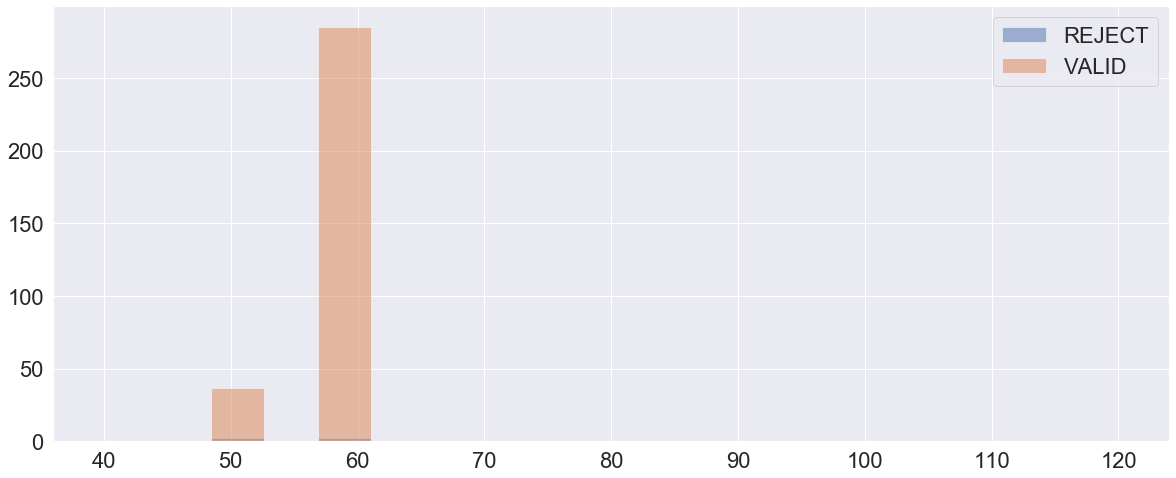

(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')


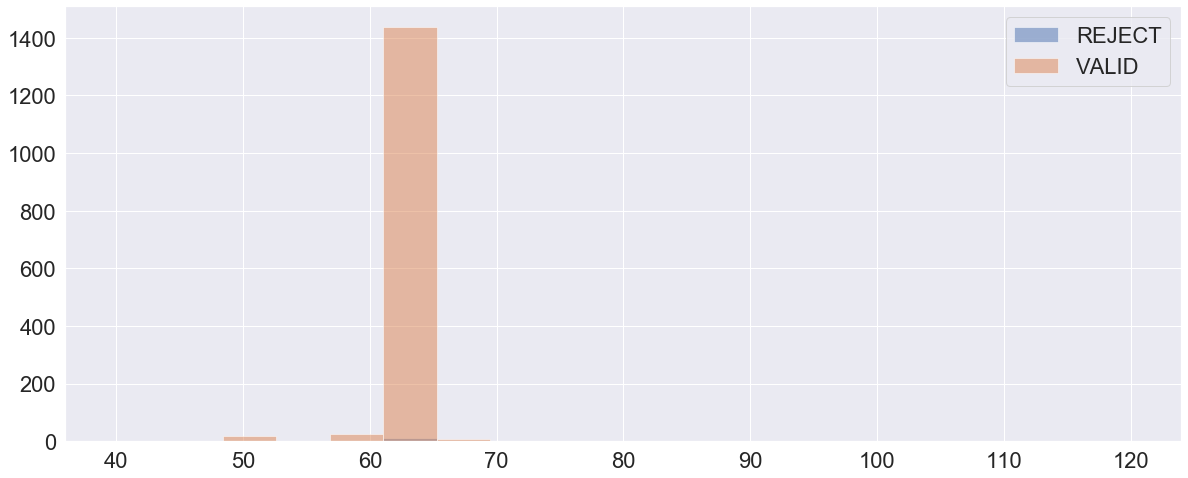

(' HAND                 ', ' REJCT ')
(' HAND                 ', ' VALID ')


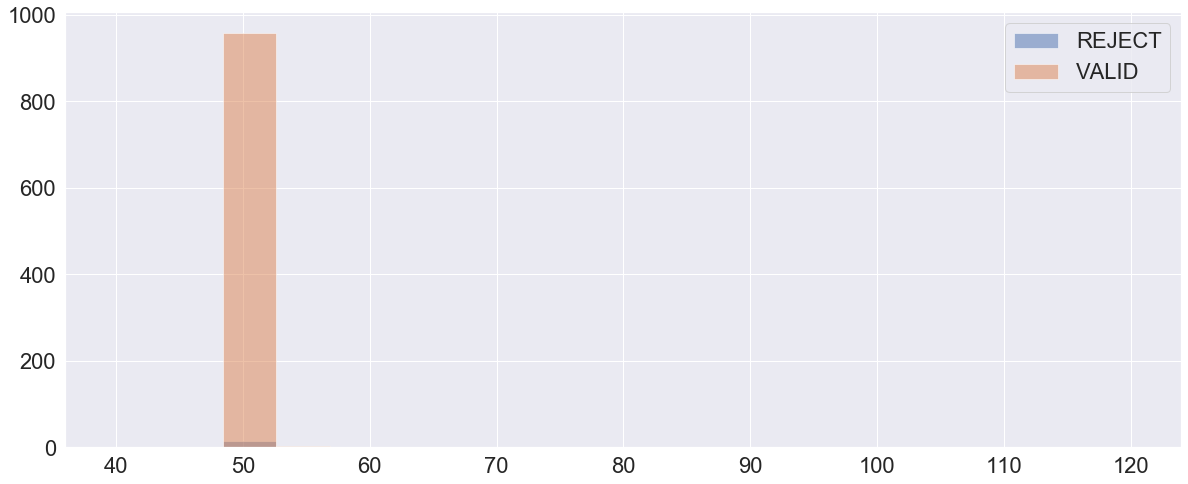

(' HIP                  ', ' REJCT ')
(' HIP                  ', ' VALID ')


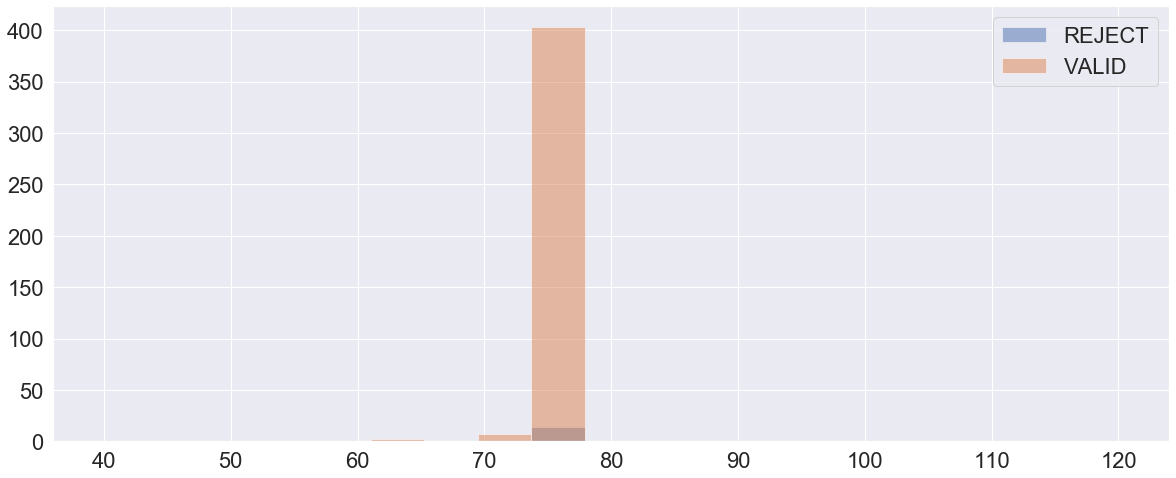

(' KNEE                 ', ' REJCT ')
(' KNEE                 ', ' VALID ')


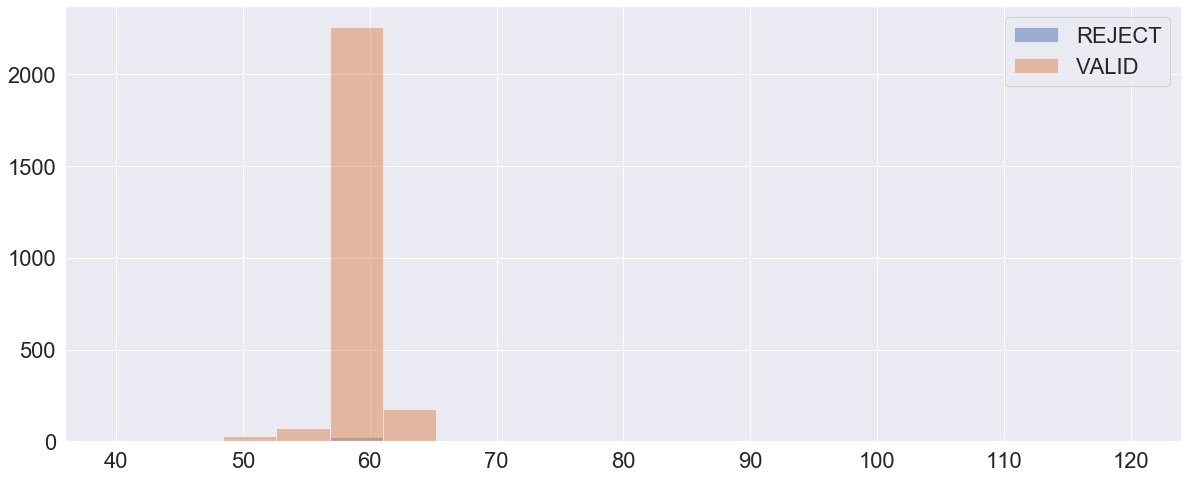

(' LEG                  ', ' REJCT ')
(' LEG                  ', ' VALID ')


C:\Users\Nevena\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Nevena\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


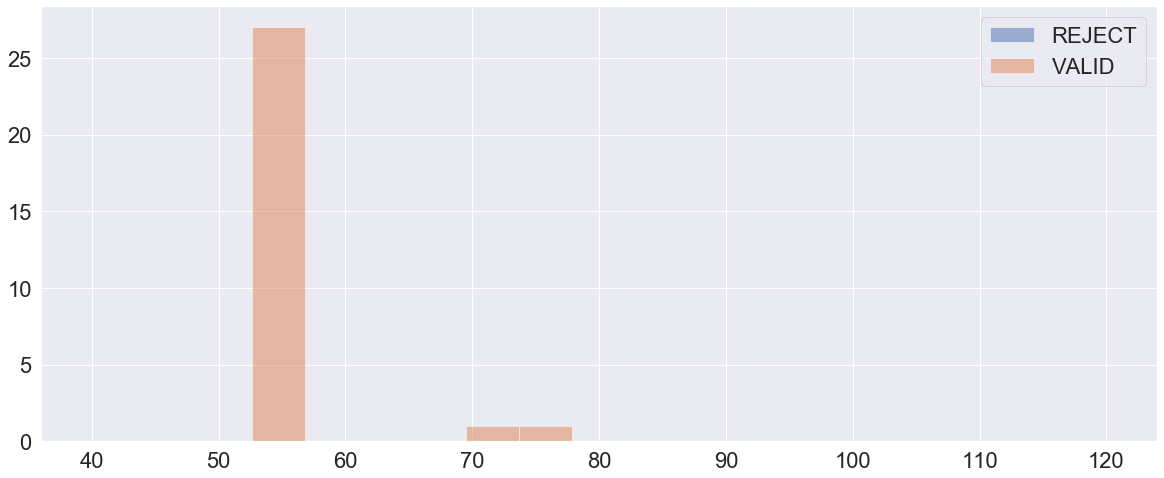

(' LSPINE               ', ' REJCT ')
(' LSPINE               ', ' VALID ')


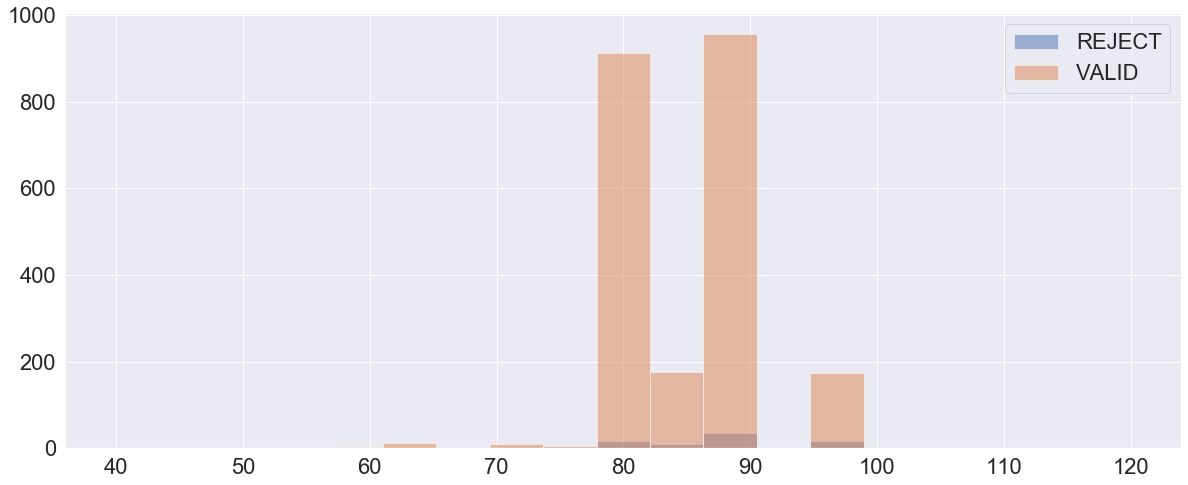

(' PELVIS               ', ' REJCT ')
(' PELVIS               ', ' VALID ')


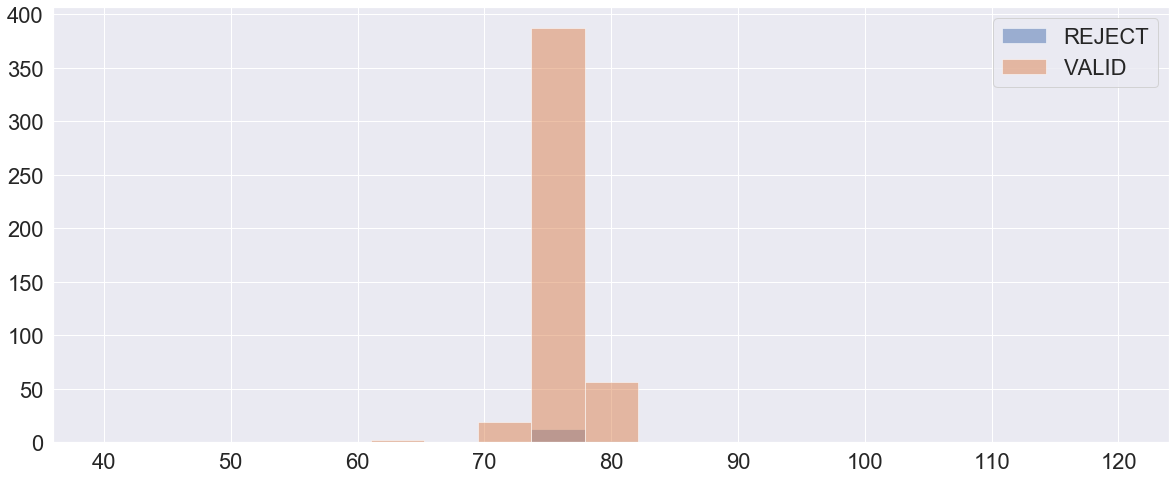

(' SHOULDER             ', ' REJCT ')
(' SHOULDER             ', ' VALID ')


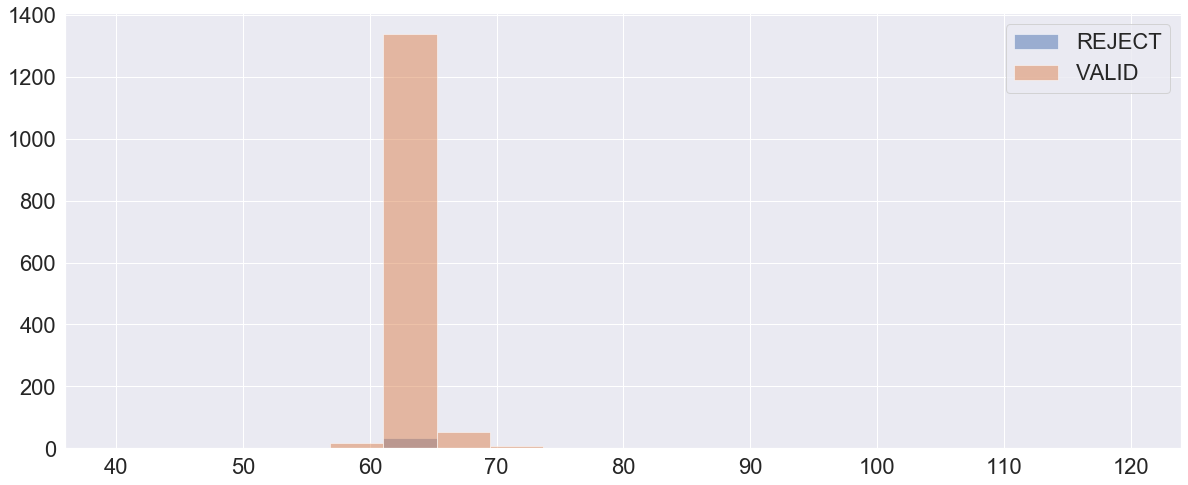

(' SKULL                ', ' REJCT ')
(' SKULL                ', ' VALID ')


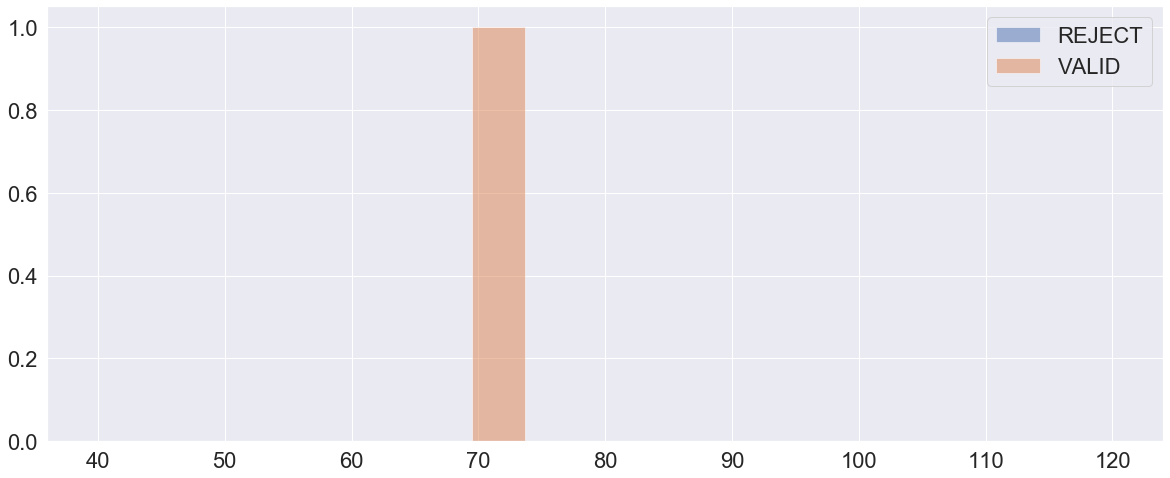

(' TSPINE               ', ' REJCT ')
(' TSPINE               ', ' VALID ')


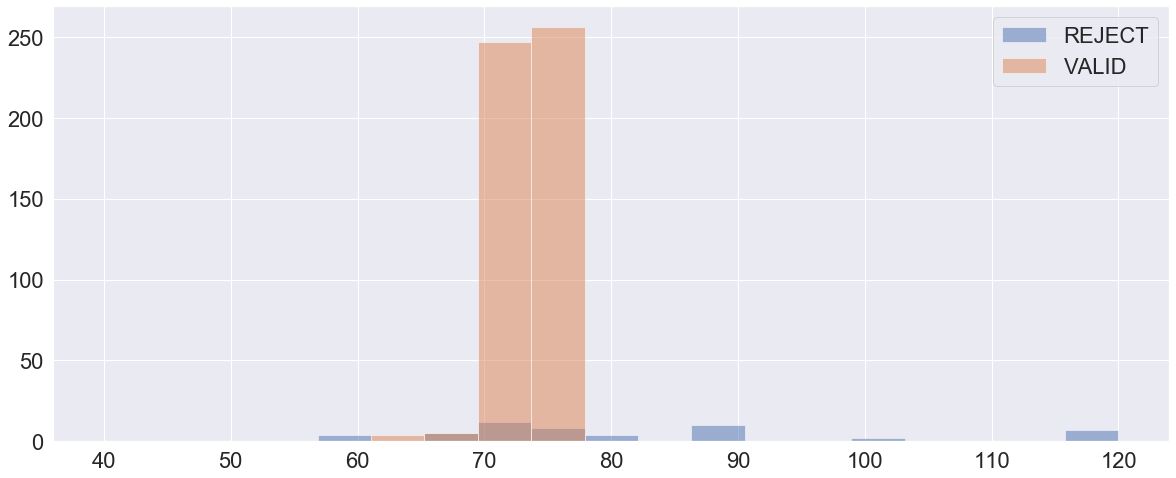

(' WRIST                ', ' REJCT ')
(' WRIST                ', ' VALID ')


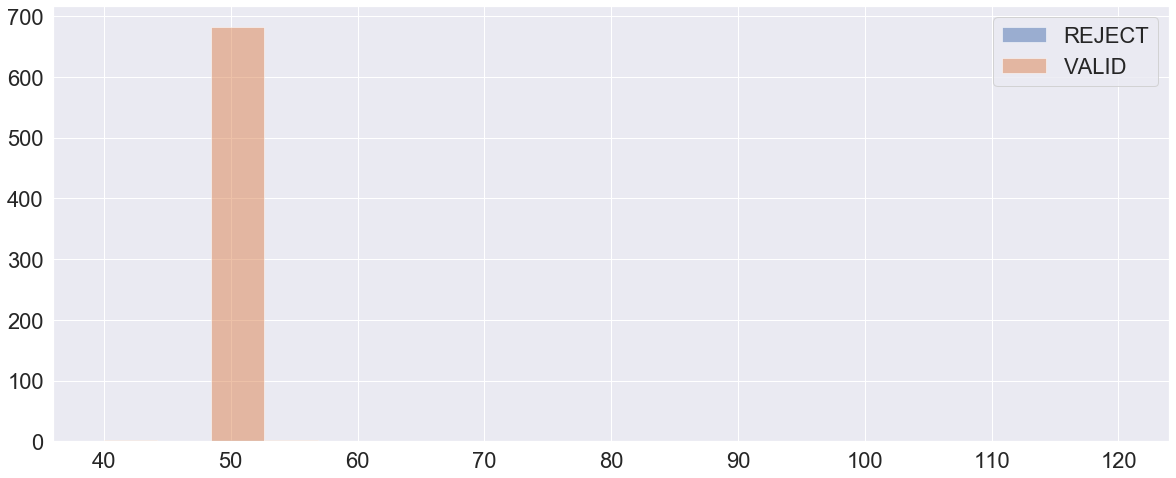

In [155]:
for i in range(0,34,2):
    bins = np.linspace(40, 120, 20)
    print(group_anat_v_r.iloc[i].name)
    print(group_anat_v_r.iloc[i+1].name)
    plt.hist(group_anat_v_r.iloc[i]["kVp"], bins, alpha=0.5, label='REJECT')
    plt.hist(group_anat_v_r.iloc[i+1]["kVp"], bins, alpha=0.5, label='VALID')
    plt.legend(loc='upper right')
    plt.show()

('                      ', ' REJCT ')
('                      ', ' VALID ')


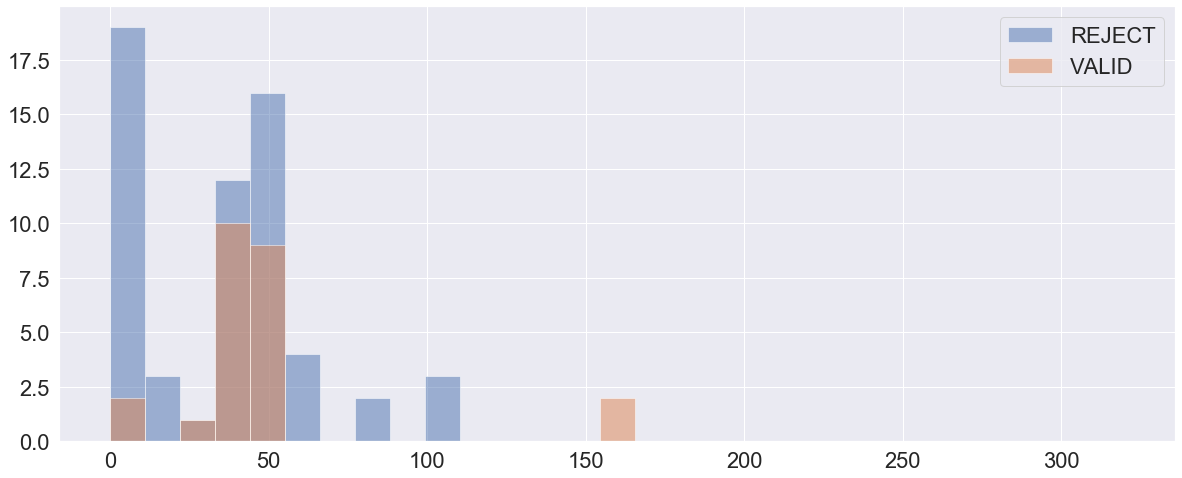

(' ANKLE                ', ' REJCT ')
(' ANKLE                ', ' VALID ')


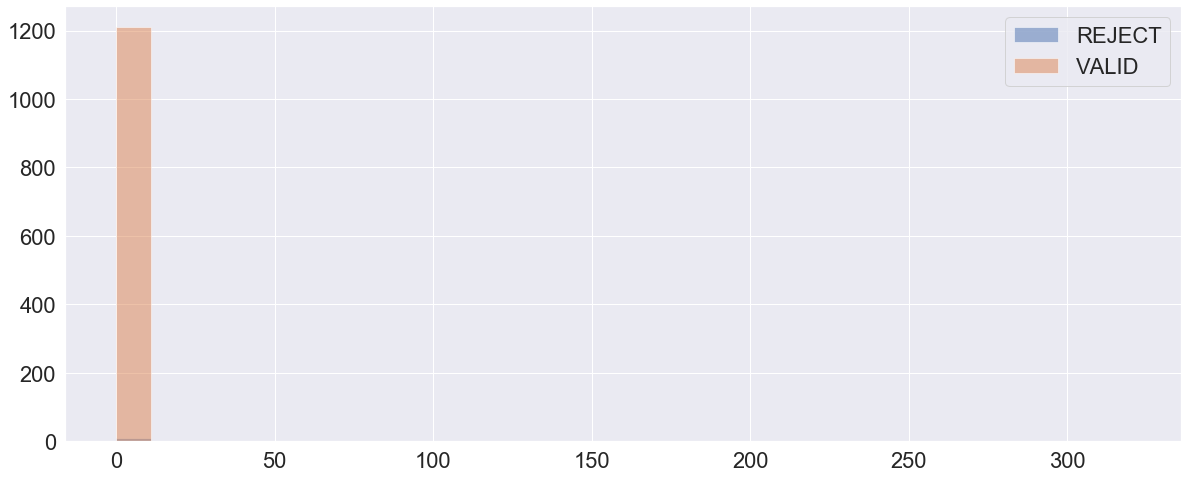

(' ARM                  ', ' REJCT ')
(' ARM                  ', ' VALID ')


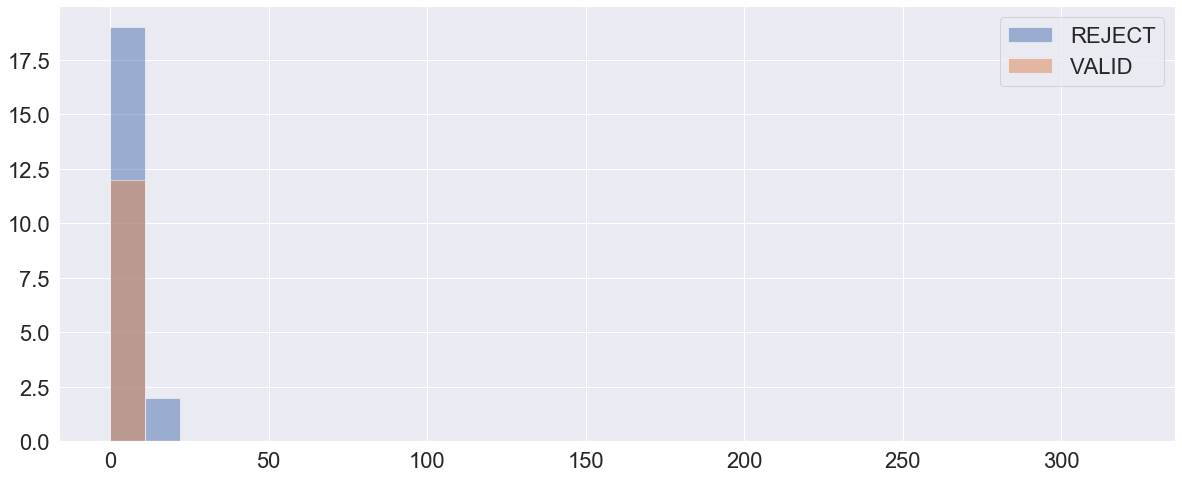

(' CHEST                ', ' REJCT ')
(' CHEST                ', ' VALID ')


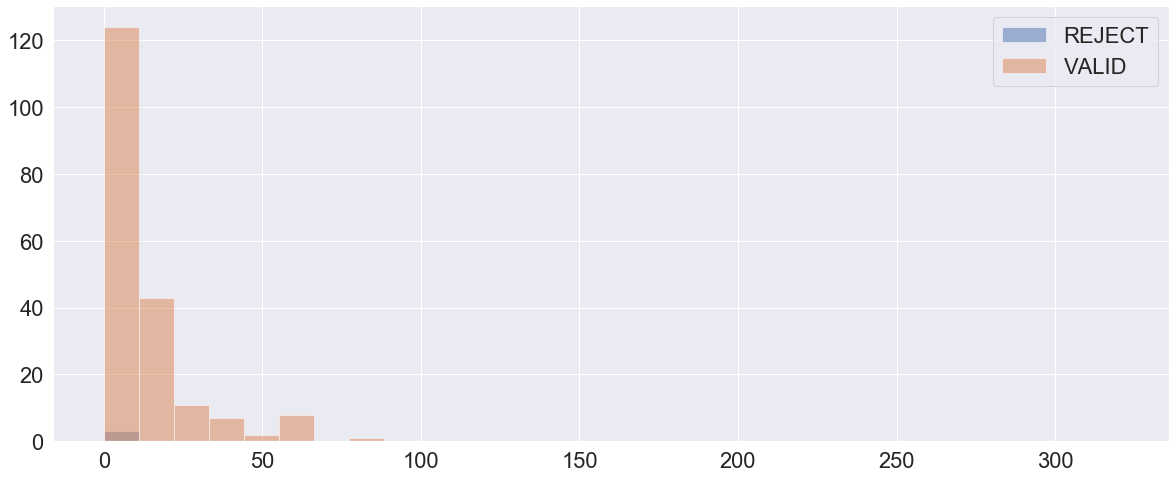

(' CSPINE               ', ' REJCT ')
(' CSPINE               ', ' VALID ')


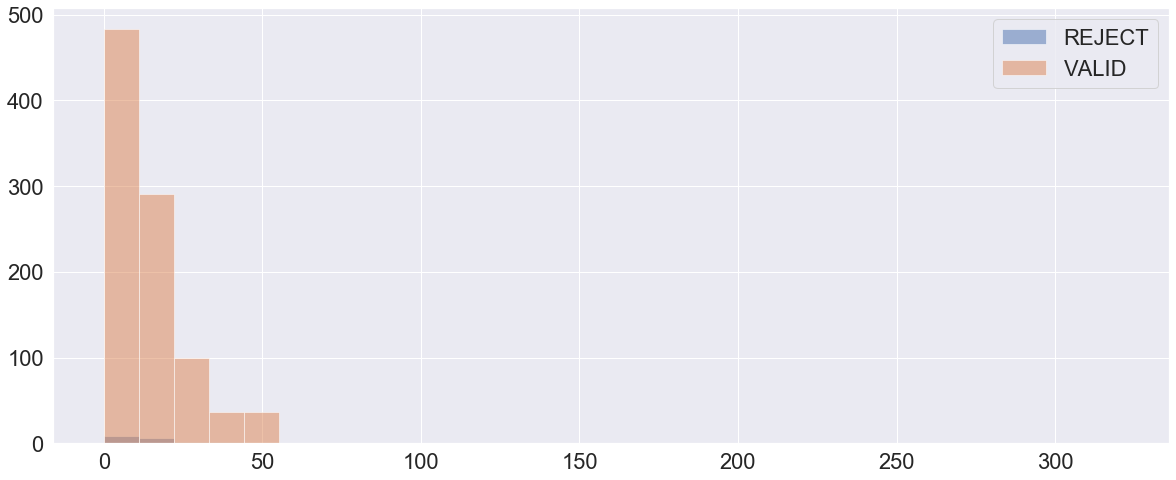

(' ELBOW                ', ' REJCT ')
(' ELBOW                ', ' VALID ')


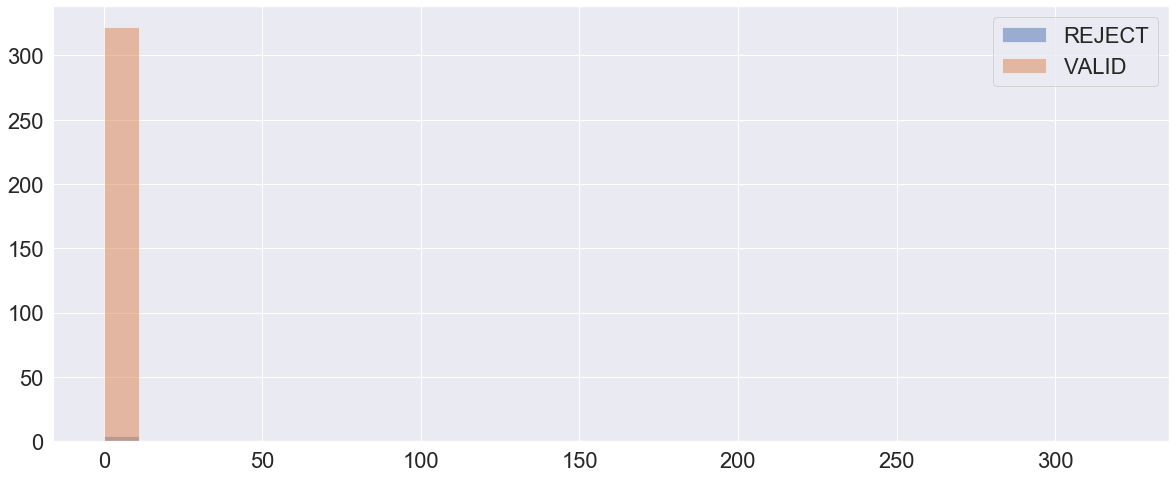

(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')


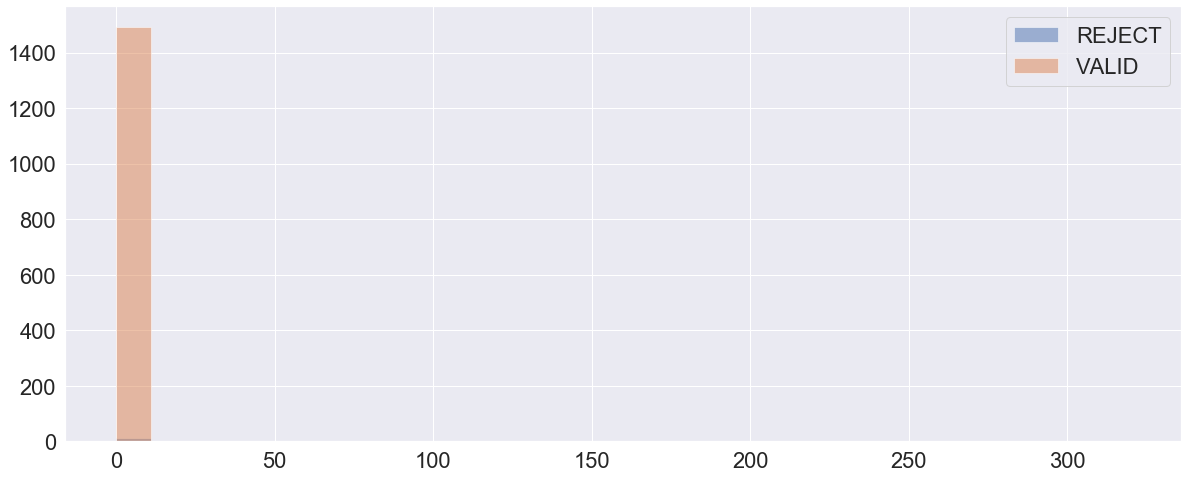

(' HAND                 ', ' REJCT ')
(' HAND                 ', ' VALID ')


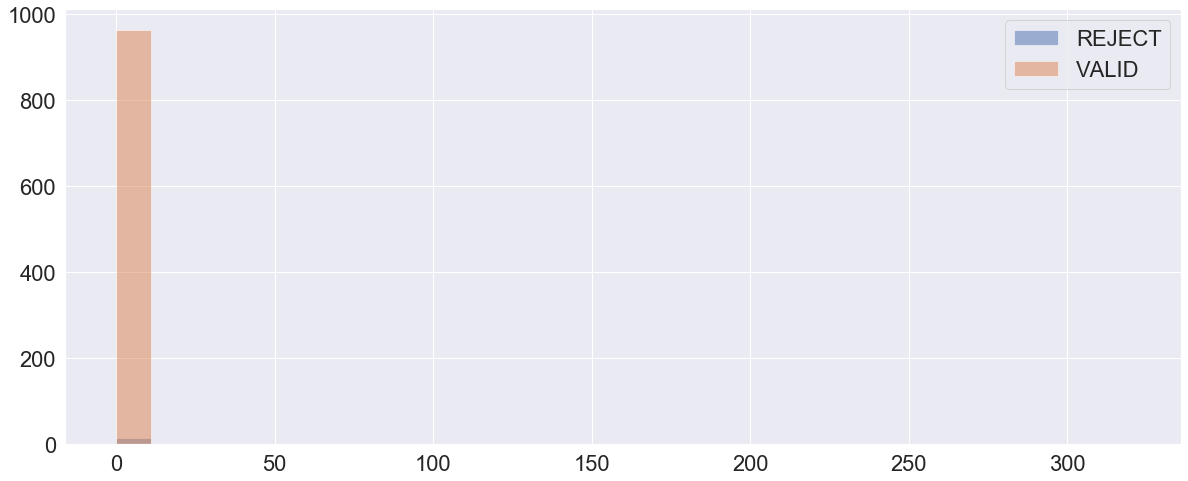

(' HIP                  ', ' REJCT ')
(' HIP                  ', ' VALID ')


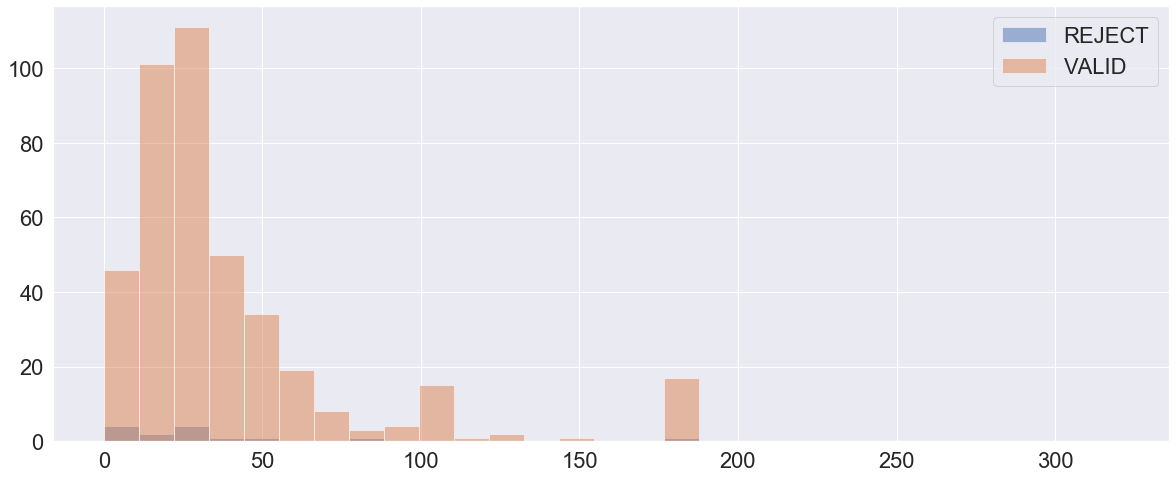

(' KNEE                 ', ' REJCT ')
(' KNEE                 ', ' VALID ')


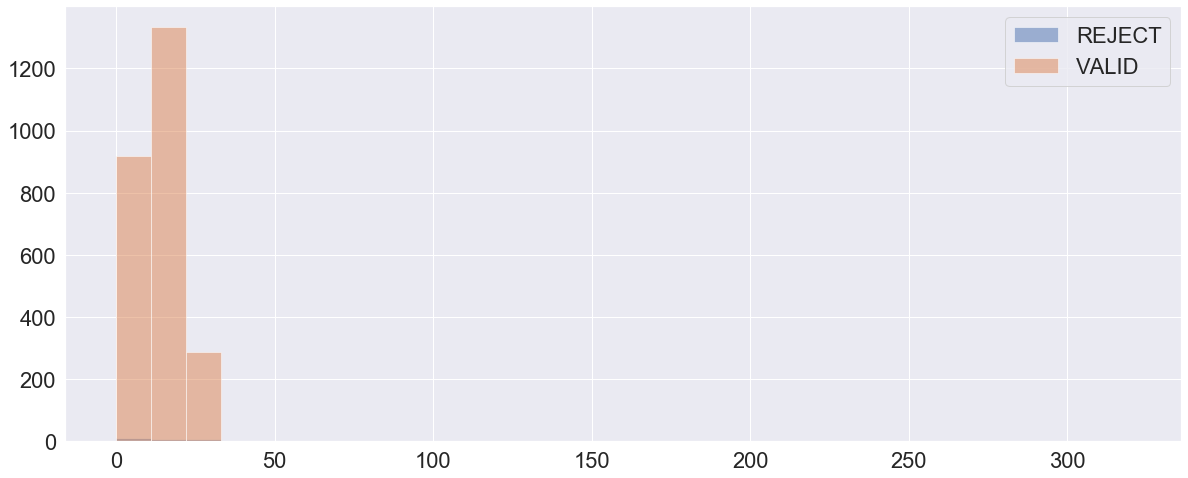

(' LEG                  ', ' REJCT ')
(' LEG                  ', ' VALID ')


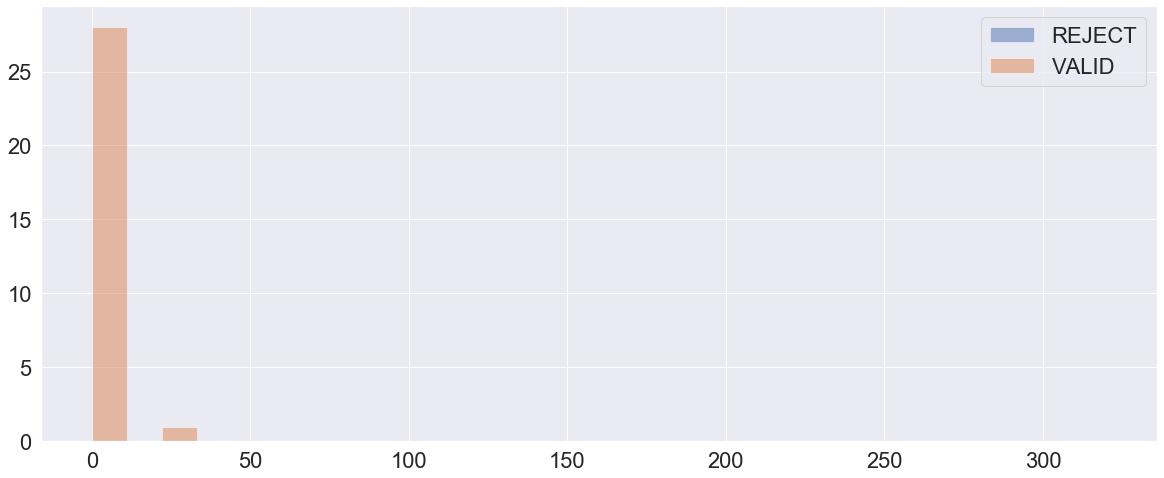

(' LSPINE               ', ' REJCT ')
(' LSPINE               ', ' VALID ')


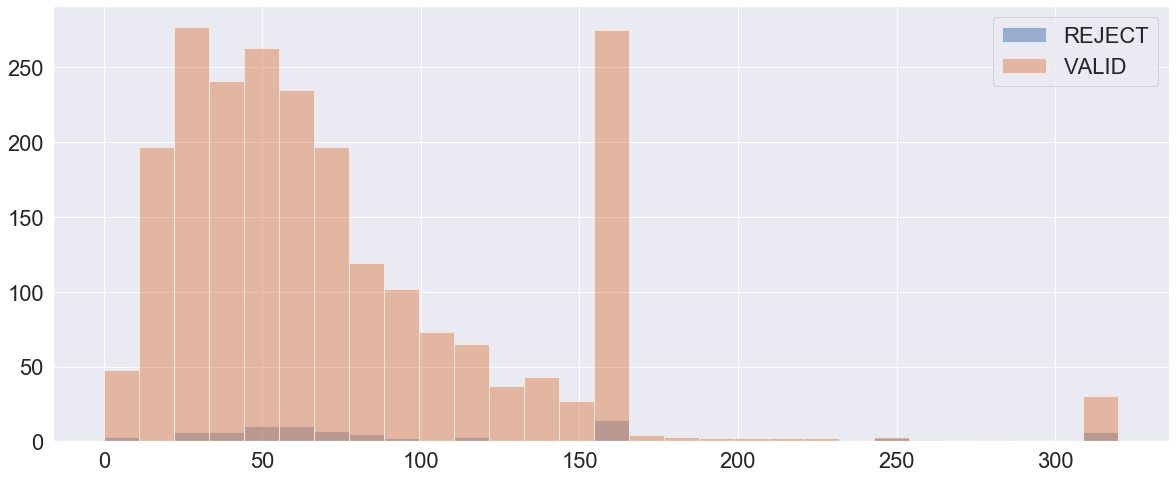

(' PELVIS               ', ' REJCT ')
(' PELVIS               ', ' VALID ')


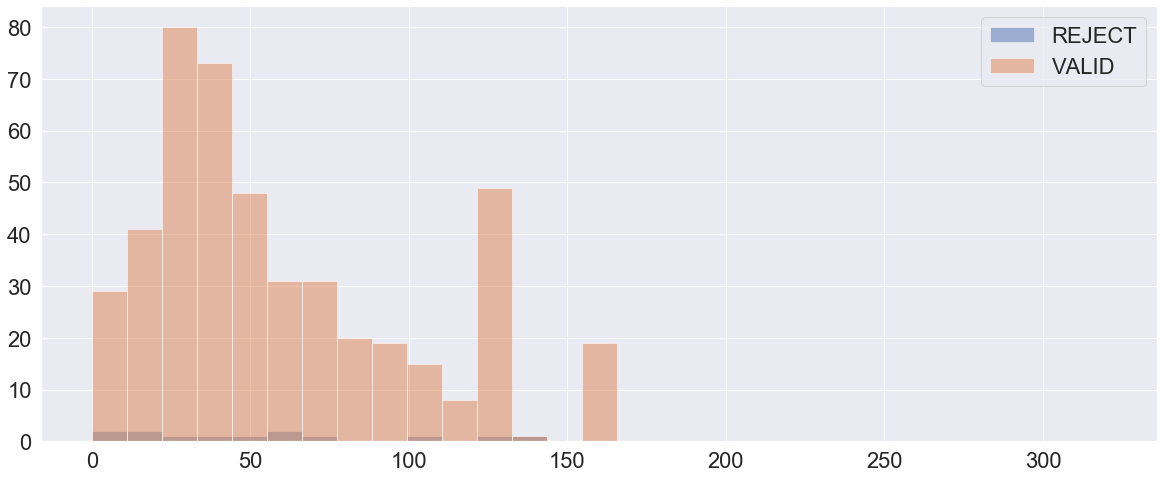

(' SHOULDER             ', ' REJCT ')
(' SHOULDER             ', ' VALID ')


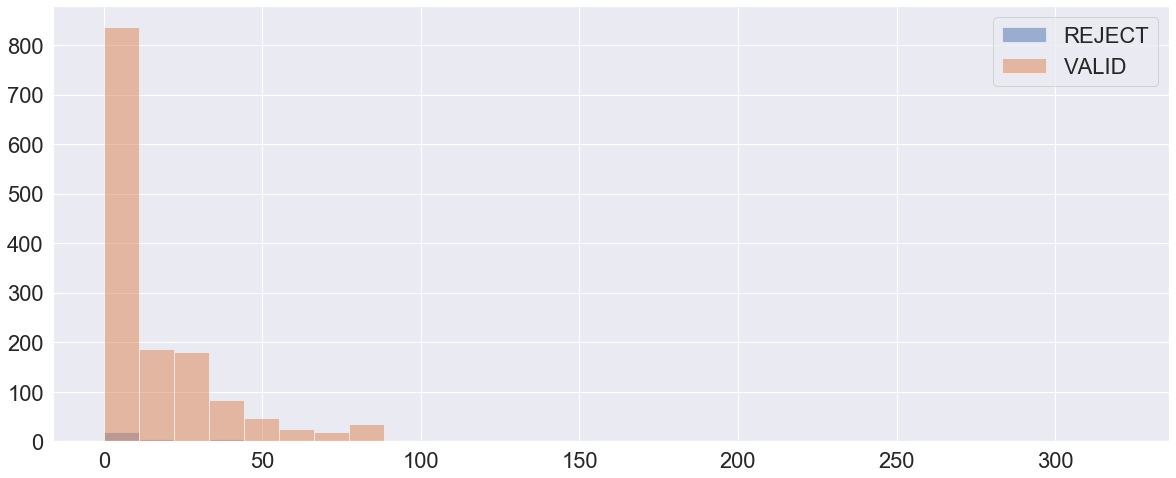

(' SKULL                ', ' REJCT ')
(' SKULL                ', ' VALID ')


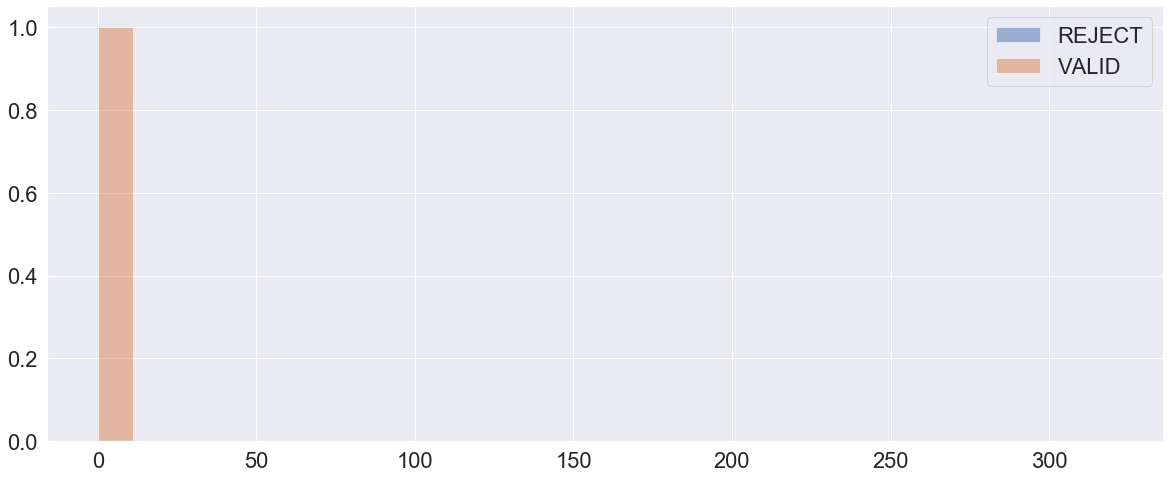

(' TSPINE               ', ' REJCT ')
(' TSPINE               ', ' VALID ')


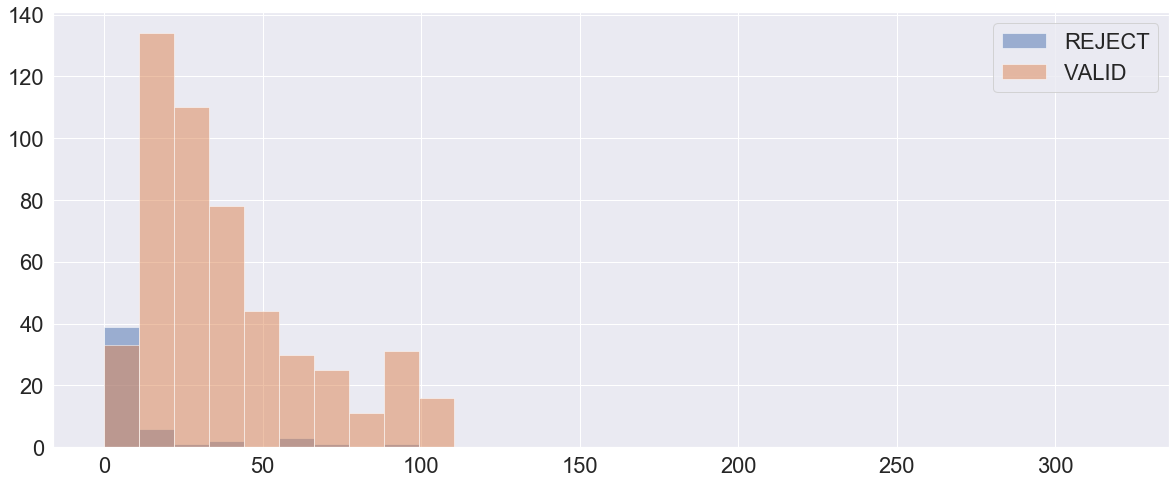

(' WRIST                ', ' REJCT ')
(' WRIST                ', ' VALID ')


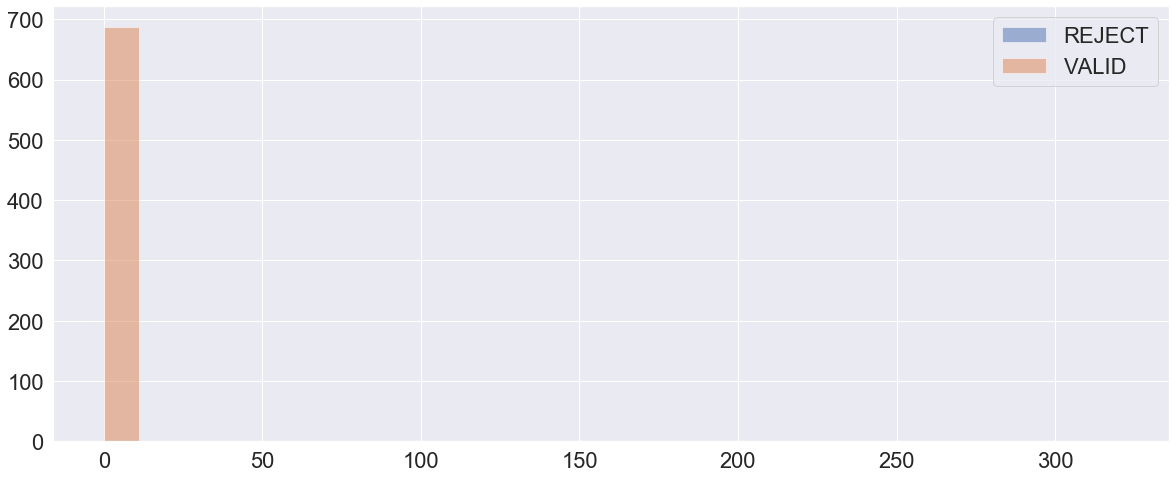

In [156]:
for i in range(0,34,2):
    bins = np.linspace(0, 320, 30)
    print(group_anat_v_r.iloc[i].name)
    print(group_anat_v_r.iloc[i+1].name)
    plt.hist(group_anat_v_r.iloc[i]["mAs"], bins, alpha=0.5, label='REJECT')
    plt.hist(group_anat_v_r.iloc[i+1]["mAs"], bins, alpha=0.5, label='VALID')
    plt.legend(loc='upper right')
    plt.show()

(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')


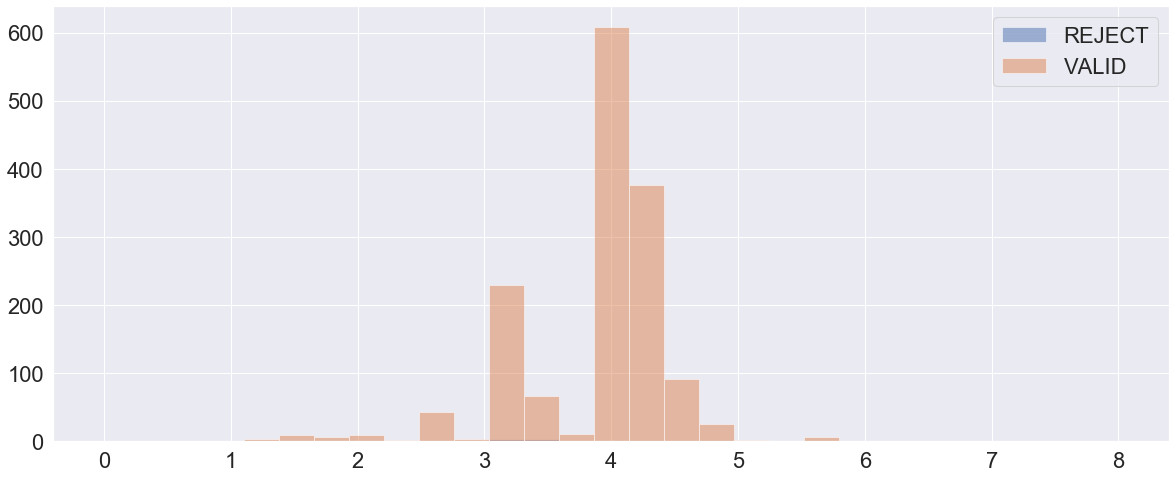

In [157]:
print(group_anat_v_r.iloc[12].name)
print(group_anat_v_r.iloc[12+1].name)
bins = np.linspace(0, 8, 30)
plt.hist(group_anat_v_r.iloc[12]["mAs"], bins, alpha=0.5, label='REJECT')
plt.hist(group_anat_v_r.iloc[12+1]["mAs"], bins, alpha=0.5, label='VALID')
plt.legend(loc='upper right')
plt.show()

(' FOOT                 ', ' REJCT ')
(' FOOT                 ', ' VALID ')


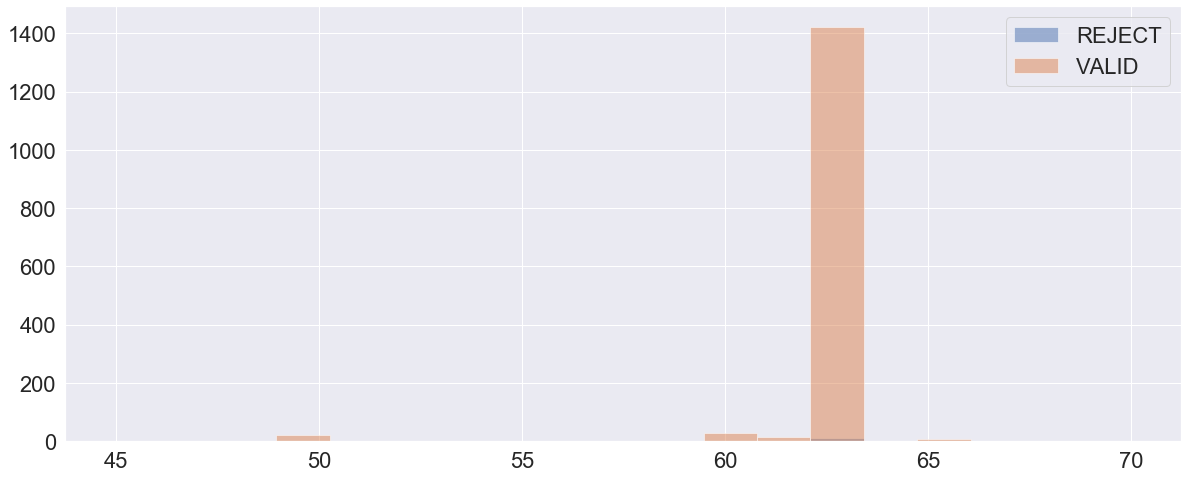

In [158]:
print(group_anat_v_r.iloc[12].name)
print(group_anat_v_r.iloc[12+1].name)
bins = np.linspace(45, 70, 20)
plt.hist(group_anat_v_r.iloc[12]["kVp"], bins, alpha=0.5, label='REJECT')
plt.hist(group_anat_v_r.iloc[12+1]["kVp"], bins, alpha=0.5, label='VALID')
plt.legend(loc='upper right')
plt.show()

In [159]:
foot_mAs = np.array(data["mAs"][data["anatomy1"] == ' FOOT                 '])
q3, q1 = np.percentile(foot_mAs, [75 ,25])
iqr = q3 - q1
    
print("[",q1,",",q3,"]")
print(iqr)

[ 3.56 , 4.2 ]
0.6400000000000001


In [160]:
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    stat= stats.ttest_ind(data['kVp'][data['EI'] == 2000][data['anatomy1'] == str(name)],
                          data['kVp'][data['EI'] < 2000][data['anatomy1'] == str(name)])
    print(name)
    print(stat)
    print("  ")

                      
Ttest_indResult(statistic=-3.5810122323694347, pvalue=0.0005787792443843044)
  
 ANKLE                
Ttest_indResult(statistic=nan, pvalue=nan)
  
 ARM                  
Ttest_indResult(statistic=-1.2092038814048958, pvalue=0.23572632991525205)
  
 CHEST                
Ttest_indResult(statistic=nan, pvalue=nan)
  
 CSPINE               
Ttest_indResult(statistic=0.21315906829230225, pvalue=0.8312481502813376)
  
 ELBOW                
Ttest_indResult(statistic=1.3915510365927184, pvalue=0.16501303083092783)
  
 FOOT                 
Ttest_indResult(statistic=2.406906514660287, pvalue=0.01620832770228678)
  
 HAND                 
Ttest_indResult(statistic=-0.08898940368373667, pvalue=0.9291085878900869)
  
 HIP                  
Ttest_indResult(statistic=0.6114534151763664, pvalue=0.5412271386532377)
  
 KNEE                 
Ttest_indResult(statistic=0.9020916859740038, pvalue=0.36709296322207885)
  
 LEG                  
Ttest_indResult(statistic=nan, pvalu

C:\Users\Nevena\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Nevena\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [161]:
for n in range(len(lista_po_anatomiji)):
    name=lista_po_anatomiji.iloc[n].name
    stat= stats.ttest_ind(data['mAs'][data['EI'] == 2000][data['anatomy1'] == str(name)],
                          data['mAs'][data['EI'] < 2000][data['anatomy1'] == str(name)])
    print(name)
    print(stat)
    print("  ")

                      
Ttest_indResult(statistic=0.3513298909814573, pvalue=0.7262419980305554)
  
 ANKLE                
Ttest_indResult(statistic=nan, pvalue=nan)
  
 ARM                  
Ttest_indResult(statistic=-1.5046485595762682, pvalue=0.14253593887874952)
  
 CHEST                
Ttest_indResult(statistic=nan, pvalue=nan)
  
 CSPINE               
Ttest_indResult(statistic=5.0583800126137, pvalue=5.064664463199981e-07)
  
 ELBOW                
Ttest_indResult(statistic=-0.10960433500415323, pvalue=0.9127910257973383)
  
 FOOT                 
Ttest_indResult(statistic=1.64783528028154, pvalue=0.0995956307716126)
  
 HAND                 
Ttest_indResult(statistic=2.9804873703787558, pvalue=0.0029492592679197854)
  
 HIP                  
Ttest_indResult(statistic=2.1181257061153245, pvalue=0.03474564650898367)
  
 KNEE                 
Ttest_indResult(statistic=9.321147016063945, pvalue=2.4048652819096094e-20)
  
 LEG                  
Ttest_indResult(statistic=nan, pvalue=